In [1]:
import os

# Add Git path to the PATH environment variable
os.environ['PATH'] += os.pathsep + r"C:\Users\boughrio\AppData\Local\Programs\Git\cmd"

# Now try installing the package again
!pip install git+https://github.com/SarraBoughriou/codecarbon.git


  Cloning https://github.com/SarraBoughriou/codecarbon.git to c:\users\boughrio\appdata\local\temp\pip-req-build-o22mrb_7
  Resolved https://github.com/SarraBoughriou/codecarbon.git to commit 45394c0f5a663031a19ec4cb55066501331a396c
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/SarraBoughriou/codecarbon.git 'C:\Users\boughrio\AppData\Local\Temp\pip-req-build-o22mrb_7'


In [2]:
!pip install opencv-python
!pip install tensorflow


[codecarbon WARNING @ 09:50:30] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 09:50:30] [setup] RAM Tracking...
[codecarbon INFO @ 09:50:30] [setup] GPU Tracking...
[codecarbon INFO @ 09:50:30] No GPU found.
[codecarbon INFO @ 09:50:30] [setup] CPU Tracking...
[codecarbon WARNING @ 09:50:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:50:32] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 09:50:32] >>> Tracker's metadata:
[codecarbon INFO @ 09:50:32]   Platform system: Windows-10-10.0.19045-SP0
[codecarbon INFO @ 09:50:32]   Python version: 3.11.7
[codecarbon INFO @ 09:50:32]   CodeCarbon version: 2.4.3rc1
[codecarbon INFO @ 09:50:32]   Available RAM : 15.690 GB
[codecarbon INFO @ 09:50:32]   CPU count: 12
[codecarbon INFO @ 09:50:32]   CPU model: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 09:50:32]   GPU count: None
[codecarbon INFO @ 09:50:32

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

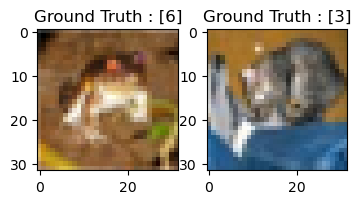

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from codecarbon import EmissionsTracker




trackerTot= EmissionsTracker()
trackerTot.start()

tracker= EmissionsTracker()
tracker.start()

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels)  = tf.keras.datasets.cifar10.load_data()

# Print shapes of training and testing data
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Display the first image in training and testing data
plt.figure(figsize=[4,2])
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))



Number of blurry images: 10


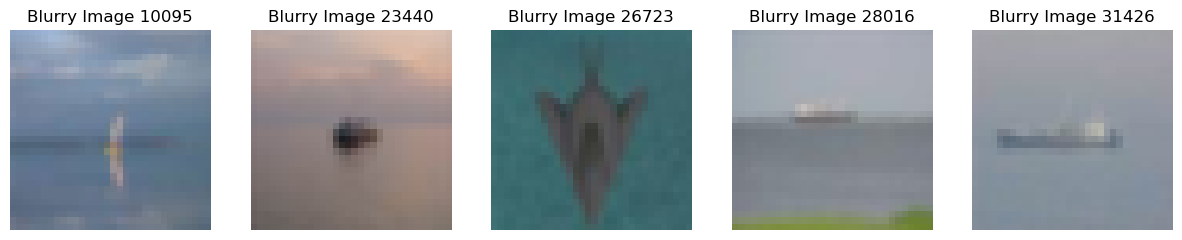

Shape of cleaned dataset: (49990, 32, 32, 3) (49990, 1)
Blurry images deleted.


In [4]:
import cv2
import matplotlib.pyplot as plt

# Function to check if an image is blurry
def is_blurry(image, threshold=100):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute the variance of Laplacian to determine blurriness
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()
    # Return True if the variance is below the threshold, indicating blur
    return variance < threshold

# Define a function to iterate through images and check for blur
def check_blur(images, threshold=100):
    blurry_images = []
    for i, image in enumerate(images):
        if is_blurry(image, threshold):
            blurry_images.append(i)
    return blurry_images


# Check for blurry images
blurry_indices = check_blur(train_images)

# Print the number of blurry images
print("Number of blurry images:", len(blurry_indices))

# Display the first five blurry images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(blurry_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[idx])
    plt.title(f"Blurry Image {idx}")
    plt.axis('off')
plt.show()

# Remove blurry images from the dataset using their indices
train_images = np.delete(train_images, blurry_indices, axis=0)
train_labels = np.delete(train_labels, blurry_indices, axis=0)

# Print the shape of the cleaned dataset
print("Shape of cleaned dataset:", train_images.shape, train_labels.shape)
print("Blurry images deleted.")



Number of black images: 1


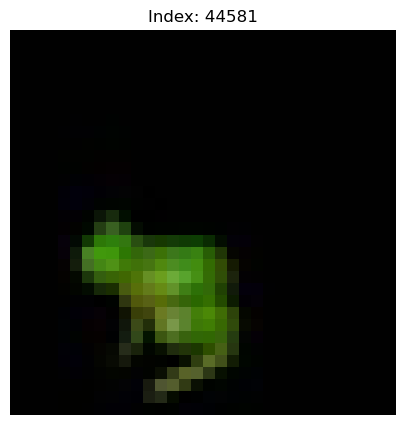

Shape of cleaned dataset: (49989, 32, 32, 3) (49989, 1)
Black images deleted.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check if an image is black
def is_black(image, threshold=10):
    # Compute the average pixel intensity
    avg_intensity = np.mean(image)
    # Return True if the average intensity is below the threshold, indicating a "black" image
    return avg_intensity < threshold

# Define a function to iterate through images and check for blackness
def check_black(images, threshold=10):
    black_indices = []
    for i, image in enumerate(images):
        if is_black(image, threshold):
            black_indices.append(i)
    return black_indices

# Function to display images with their indices
def display_images_with_indices(images, indices):
    plt.figure(figsize=(10, 5))
    num_images = len(indices)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx])
        plt.title(f"Index: {idx}")
        plt.axis('off')
    plt.show()

# Check for black images
black_indices = check_black(train_images)

# Print the number of black images
print("Number of black images:", len(black_indices))

# Display the black images along with their indices
display_images_with_indices(train_images, black_indices)


# Remove blurry images from the dataset using their indices
train_images = np.delete(train_images, black_indices, axis=0)
train_labels = np.delete(train_labels, black_indices, axis=0)

# Print the shape of the cleaned dataset
print("Shape of cleaned dataset:", train_images.shape, train_labels.shape)
print("Black images deleted.")





In [6]:
# Reshape and preprocess the training and testing data
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

print("Shape of final dataset:", train_data.shape, train_labels.shape)

emissions: float = tracker.stop()
print(f"PreProcessing Emissions:{emissions} Kg")

[codecarbon INFO @ 09:50:46] Energy consumed for RAM : 0.000008 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:50:46] Energy consumed for all CPUs : 0.000045 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:50:46] 0.00005326054357959954 kWh of electricity used since the beginning.


Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Shape of final dataset: (49989, 32, 32, 3) (49989, 1)
PreProcessing Emissions:2.1036024651439452e-06 Kg


In [7]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras import layers, models, datasets

def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)


    for _ in range(3):
        x = residual_block(x, 64)


    x = residual_block(x, 128, strides=2)
    for _ in range(3):
        x = residual_block(x, 128)


    x = residual_block(x, 256, strides=2)
    for _ in range(3):
        x = residual_block(x, 256)


    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)


    model = models.Model(inputs, outputs, name='resnet')
    return model


def residual_block(input_tensor, filters, strides=1):
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)


    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)


    if strides != 1 or input_tensor.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='valid')(input_tensor)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = input_tensor


    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x


# Build the ResNet model
model = build_resnet()


# Compile the model with weight decay
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Learning rate scheduler
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 75:
        lr *= 0.5e-3
    elif epoch > 50:
        lr *= 1e-3
    elif epoch > 25:
        lr *= 1e-2
    elif epoch > 10:
        lr *= 1e-1
    return lr


lr_scheduler = LearningRateScheduler(lr_schedule)


# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tracker= EmissionsTracker()
tracker.start()

# Train the model
history = model.fit(train_images, train_labels,
                    batch_size=256,
                    epochs=200,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_scheduler, early_stopping])


emissions: float = tracker.stop()
print(f"Training Emissions:{emissions} Kg")


[codecarbon WARNING @ 09:50:47] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 09:50:47] [setup] RAM Tracking...
[codecarbon INFO @ 09:50:47] [setup] GPU Tracking...
[codecarbon INFO @ 09:50:47] No GPU found.
[codecarbon INFO @ 09:50:47] [setup] CPU Tracking...
[codecarbon WARNING @ 09:50:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:50:49] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 09:50:49] >>> Tracker's metadata:
[codecarbon INFO @ 09:50:49]   Platform system: Windows-10-10.0.19045-SP0
[codecarbon INFO @ 09:50:49]   Python version: 3.11.7
[codecarbon INFO @ 09:50:49]   CodeCarbon version: 2.4.3rc1
[codecarbon INFO @ 09:50:49]   Available RAM : 15.690 GB
[codecarbon INFO @ 09:50:49]   CPU count: 12
[codecarbon INFO @ 09:50:49]   CPU model: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 09:50:49]   GPU count: None
[codecarbon INFO @ 09:50:49

Epoch 1/200


[codecarbon INFO @ 09:51:06] Energy consumed for RAM : 0.000049 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:51:06] Energy consumed for all CPUs : 0.000271 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:51:06] 0.00032006829293340156 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:51:07] Energy consumed for RAM : 0.000025 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:51:07] Energy consumed for all CPUs : 0.000136 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:51:07] 0.00016012311825520600 kWh of electricity used since the beginning.


  2/196 ━━━━━━━━━━━━━━━━━━━━ 15:01 5s/step - accuracy: 0.0898 - loss: 4.9225   

[codecarbon INFO @ 09:51:21] Energy consumed for RAM : 0.000074 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:51:21] Energy consumed for all CPUs : 0.000407 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:51:21] 0.00048052073133443216 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:51:22] Energy consumed for RAM : 0.000049 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:51:22] Energy consumed for all CPUs : 0.000271 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:51:22] 0.00032044975546107238 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 15:13 5s/step - accuracy: 0.1292 - loss: 4.7846

[codecarbon INFO @ 09:51:36] Energy consumed for RAM : 0.000098 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:51:36] Energy consumed for all CPUs : 0.000543 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:51:36] 0.00064068305546486671 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 15:20 5s/step - accuracy: 0.1373 - loss: 4.6693

[codecarbon INFO @ 09:51:37] Energy consumed for RAM : 0.000074 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:51:37] Energy consumed for all CPUs : 0.000407 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:51:37] 0.00048043413734936871 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 14:46 5s/step - accuracy: 0.1560 - loss: 4.3289

[codecarbon INFO @ 09:51:51] Energy consumed for RAM : 0.000123 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:51:51] Energy consumed for all CPUs : 0.000678 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:51:51] 0.00080094623239280939 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:51:52] Energy consumed for RAM : 0.000098 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:51:52] Energy consumed for all CPUs : 0.000542 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:51:52] 0.00064032388072262280 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 14:28 5s/step - accuracy: 0.1696 - loss: 4.0516

[codecarbon INFO @ 09:52:06] Energy consumed for RAM : 0.000147 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:52:06] Energy consumed for all CPUs : 0.000814 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:52:06] 0.00096123679614951607 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:52:07] Energy consumed for RAM : 0.000123 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:52:07] Energy consumed for all CPUs : 0.000678 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:52:07] 0.00080068169348950055 kWh of electricity used since the beginning.


 15/196 ━━━━━━━━━━━━━━━━━━━━ 14:14 5s/step - accuracy: 0.1823 - loss: 3.8260

[codecarbon INFO @ 09:52:21] Energy consumed for RAM : 0.000172 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:52:21] Energy consumed for all CPUs : 0.000950 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:52:21] 0.00112156767090489757 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:52:22] Energy consumed for RAM : 0.000147 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:52:22] Energy consumed for all CPUs : 0.000814 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:52:22] 0.00096093730900281545 kWh of electricity used since the beginning.


 18/196 ━━━━━━━━━━━━━━━━━━━━ 14:00 5s/step - accuracy: 0.1936 - loss: 3.6418

[codecarbon INFO @ 09:52:36] Energy consumed for RAM : 0.000196 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:52:36] Energy consumed for all CPUs : 0.001085 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:52:36] 0.00128177982338560908 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:52:37] Energy consumed for RAM : 0.000172 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:52:37] Energy consumed for all CPUs : 0.000950 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:52:37] 0.00112130763618572258 kWh of electricity used since the beginning.


 21/196 ━━━━━━━━━━━━━━━━━━━━ 13:51 5s/step - accuracy: 0.2032 - loss: 3.4906

[codecarbon INFO @ 09:52:51] Energy consumed for RAM : 0.000221 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:52:51] Energy consumed for all CPUs : 0.001221 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:52:51] 0.00144186070176086632 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 13:44 5s/step - accuracy: 0.2062 - loss: 3.4457

[codecarbon INFO @ 09:52:52] Energy consumed for RAM : 0.000196 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:52:52] Energy consumed for all CPUs : 0.001085 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:52:52] 0.00128132482902001662 kWh of electricity used since the beginning.


 25/196 ━━━━━━━━━━━━━━━━━━━━ 13:29 5s/step - accuracy: 0.2146 - loss: 3.3256

[codecarbon INFO @ 09:53:06] Energy consumed for RAM : 0.000245 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:53:06] Energy consumed for all CPUs : 0.001357 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:53:06] 0.00160187216432298085 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:53:07] Energy consumed for RAM : 0.000221 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:53:07] Energy consumed for all CPUs : 0.001221 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:53:07] 0.00144130756949327737 kWh of electricity used since the beginning.


 28/196 ━━━━━━━━━━━━━━━━━━━━ 13:15 5s/step - accuracy: 0.2222 - loss: 3.2224

[codecarbon INFO @ 09:53:21] Energy consumed for RAM : 0.000270 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:53:21] Energy consumed for all CPUs : 0.001492 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:53:21] 0.00176200394573425767 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:53:22] Energy consumed for RAM : 0.000245 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:53:22] Energy consumed for all CPUs : 0.001356 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:53:22] 0.00160148611071548653 kWh of electricity used since the beginning.


 31/196 ━━━━━━━━━━━━━━━━━━━━ 13:01 5s/step - accuracy: 0.2289 - loss: 3.1328

[codecarbon INFO @ 09:53:36] Energy consumed for RAM : 0.000294 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:53:36] Energy consumed for all CPUs : 0.001628 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:53:36] 0.00192203396044515599 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:53:37] Energy consumed for RAM : 0.000270 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:53:37] Energy consumed for all CPUs : 0.001492 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:53:37] 0.00176164826587477293 kWh of electricity used since the beginning.


 34/196 ━━━━━━━━━━━━━━━━━━━━ 12:46 5s/step - accuracy: 0.2350 - loss: 3.0538

[codecarbon INFO @ 09:53:51] Energy consumed for RAM : 0.000319 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:53:51] Energy consumed for all CPUs : 0.001763 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:53:51] 0.00208192643318542070 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:53:52] Energy consumed for RAM : 0.000294 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:53:52] Energy consumed for all CPUs : 0.001627 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:53:52] 0.00192177048039970390 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 12:32 5s/step - accuracy: 0.2408 - loss: 2.9832

[codecarbon INFO @ 09:54:06] Energy consumed for RAM : 0.000343 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:54:06] Energy consumed for all CPUs : 0.001899 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:54:06] 0.00224216497730025510 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:54:07] Energy consumed for RAM : 0.000319 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:54:07] Energy consumed for all CPUs : 0.001763 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:54:07] 0.00208198305675308696 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:18 5s/step - accuracy: 0.2464 - loss: 2.9199

[codecarbon INFO @ 09:54:21] Energy consumed for RAM : 0.000368 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:54:21] Energy consumed for all CPUs : 0.002034 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:54:21] 0.00240223534560151395 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 12:12 5s/step - accuracy: 0.2481 - loss: 2.9003

[codecarbon INFO @ 09:54:22] Energy consumed for RAM : 0.000343 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:54:22] Energy consumed for all CPUs : 0.001898 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:54:22] 0.00224173515882912554 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 11:58 5s/step - accuracy: 0.2533 - loss: 2.8453

[codecarbon INFO @ 09:54:36] Energy consumed for RAM : 0.000392 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:54:37] Energy consumed for all CPUs : 0.002170 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:54:37] 0.00256238135247097978 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:54:37] Energy consumed for RAM : 0.000368 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:54:37] Energy consumed for all CPUs : 0.002034 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:54:37] 0.00240190713446748099 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 11:44 5s/step - accuracy: 0.2582 - loss: 2.7950

[codecarbon INFO @ 09:54:52] Energy consumed for RAM : 0.000417 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:54:52] Energy consumed for all CPUs : 0.002305 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:54:52] 0.00272242371066321780 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:54:52] Energy consumed for RAM : 0.000392 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:54:52] Energy consumed for all CPUs : 0.002170 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:54:52] 0.00256197965821965351 kWh of electricity used since the beginning.


 50/196 ━━━━━━━━━━━━━━━━━━━━ 11:29 5s/step - accuracy: 0.2629 - loss: 2.7490

[codecarbon INFO @ 09:55:07] Energy consumed for RAM : 0.000442 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:55:07] Energy consumed for all CPUs : 0.002441 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:55:07] 0.00288291075215279255 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:55:07] Energy consumed for RAM : 0.000417 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:55:07] Energy consumed for all CPUs : 0.002305 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:55:07] 0.00272211415213067468 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 11:13 5s/step - accuracy: 0.2674 - loss: 2.7065

[codecarbon INFO @ 09:55:22] Energy consumed for RAM : 0.000466 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:55:22] Energy consumed for all CPUs : 0.002577 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:55:22] 0.00304318665407616587 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:55:22] Energy consumed for RAM : 0.000441 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:55:22] Energy consumed for all CPUs : 0.002441 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:55:22] 0.00288215337265263242 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 10:59 5s/step - accuracy: 0.2718 - loss: 2.6669

[codecarbon INFO @ 09:55:37] Energy consumed for RAM : 0.000491 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:55:37] Energy consumed for all CPUs : 0.002712 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:55:37] 0.00320289672600986659 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 10:55 5s/step - accuracy: 0.2732 - loss: 2.6544

[codecarbon INFO @ 09:55:37] Energy consumed for RAM : 0.000466 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:55:37] Energy consumed for all CPUs : 0.002576 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:55:37] 0.00304232038871388513 kWh of electricity used since the beginning.


 60/196 ━━━━━━━━━━━━━━━━━━━━ 10:40 5s/step - accuracy: 0.2773 - loss: 2.6184

[codecarbon INFO @ 09:55:52] Energy consumed for RAM : 0.000515 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:55:52] Energy consumed for all CPUs : 0.002848 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:55:52] 0.00336299400404005498 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:55:52] Energy consumed for RAM : 0.000491 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:55:52] Energy consumed for all CPUs : 0.002712 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:55:53] 0.00320235120507145112 kWh of electricity used since the beginning.


 63/196 ━━━━━━━━━━━━━━━━━━━━ 10:26 5s/step - accuracy: 0.2812 - loss: 2.5848

[codecarbon INFO @ 09:56:07] Energy consumed for RAM : 0.000540 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:56:07] Energy consumed for all CPUs : 0.002984 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:56:07] 0.00352317736385798948 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:56:08] Energy consumed for RAM : 0.000515 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:56:08] Energy consumed for all CPUs : 0.002847 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:56:08] 0.00336249353608446050 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 10:12 5s/step - accuracy: 0.2851 - loss: 2.5533

[codecarbon INFO @ 09:56:22] Energy consumed for RAM : 0.000564 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:56:22] Energy consumed for all CPUs : 0.003119 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:56:22] 0.00368336525031801119 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:56:23] Energy consumed for RAM : 0.000540 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:56:23] Energy consumed for all CPUs : 0.002983 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:56:23] 0.00352257838758960424 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 9:57 5s/step - accuracy: 0.2887 - loss: 2.5236 

[codecarbon INFO @ 09:56:37] Energy consumed for RAM : 0.000589 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:56:37] Energy consumed for all CPUs : 0.003255 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:56:37] 0.00384328988898886706 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 9:53 5s/step - accuracy: 0.2899 - loss: 2.5141

[codecarbon INFO @ 09:56:38] Energy consumed for RAM : 0.000564 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:56:38] Energy consumed for all CPUs : 0.003119 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:56:38] 0.00368278054630223834 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 9:38 5s/step - accuracy: 0.2935 - loss: 2.4866

[codecarbon INFO @ 09:56:52] Energy consumed for RAM : 0.000613 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:56:52] Energy consumed for all CPUs : 0.003390 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:56:52] 0.00400329519364871038 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:56:53] Energy consumed for RAM : 0.000589 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:56:53] Energy consumed for all CPUs : 0.003254 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:56:53] 0.00384267325398639096 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 9:24 5s/step - accuracy: 0.2969 - loss: 2.4606

[codecarbon INFO @ 09:57:07] Energy consumed for RAM : 0.000638 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:57:07] Energy consumed for all CPUs : 0.003526 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:57:07] 0.00416328776252169325 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:57:08] Energy consumed for RAM : 0.000613 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:57:08] Energy consumed for all CPUs : 0.003389 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:57:08] 0.00400263823540320321 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 9:10 5s/step - accuracy: 0.3002 - loss: 2.4360

[codecarbon INFO @ 09:57:22] Energy consumed for RAM : 0.000662 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:57:22] Energy consumed for all CPUs : 0.003661 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:57:22] 0.00432342534673700075 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:57:23] Energy consumed for RAM : 0.000638 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:57:23] Energy consumed for all CPUs : 0.003525 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:57:23] 0.00416307096907112071 kWh of electricity used since the beginning.


 82/196 ━━━━━━━━━━━━━━━━━━━━ 8:56 5s/step - accuracy: 0.3033 - loss: 2.4126

[codecarbon INFO @ 09:57:37] Energy consumed for RAM : 0.000687 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:57:37] Energy consumed for all CPUs : 0.003797 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:57:37] 0.00448414925364331619 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:57:38] Energy consumed for RAM : 0.000662 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:57:38] Energy consumed for all CPUs : 0.003661 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:57:38] 0.00432320852605746694 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 8:42 5s/step - accuracy: 0.3064 - loss: 2.3903

[codecarbon INFO @ 09:57:52] Energy consumed for RAM : 0.000711 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:57:52] Energy consumed for all CPUs : 0.003933 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:57:52] 0.00464398735863564942 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:57:53] Energy consumed for RAM : 0.000687 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:57:53] Energy consumed for all CPUs : 0.003797 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:57:53] 0.00448348841257829867 kWh of electricity used since the beginning.


 88/196 ━━━━━━━━━━━━━━━━━━━━ 8:28 5s/step - accuracy: 0.3094 - loss: 2.3691

[codecarbon INFO @ 09:58:07] Energy consumed for RAM : 0.000736 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:58:07] Energy consumed for all CPUs : 0.004068 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:58:07] 0.00480430847407518902 kWh of electricity used since the beginning.


 89/196 ━━━━━━━━━━━━━━━━━━━━ 8:24 5s/step - accuracy: 0.3104 - loss: 2.3622

[codecarbon INFO @ 09:58:08] Energy consumed for RAM : 0.000711 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:58:08] Energy consumed for all CPUs : 0.003932 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:58:08] 0.00464354155881775178 kWh of electricity used since the beginning.


 92/196 ━━━━━━━━━━━━━━━━━━━━ 8:09 5s/step - accuracy: 0.3133 - loss: 2.3422

[codecarbon INFO @ 09:58:22] Energy consumed for RAM : 0.000760 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:58:22] Energy consumed for all CPUs : 0.004204 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:58:22] 0.00496412539383518561 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:58:23] Energy consumed for RAM : 0.000736 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:58:23] Energy consumed for all CPUs : 0.004068 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:58:23] 0.00480349796095130496 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 7:55 5s/step - accuracy: 0.3161 - loss: 2.3230

[codecarbon INFO @ 09:58:37] Energy consumed for RAM : 0.000785 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:58:37] Energy consumed for all CPUs : 0.004339 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:58:37] 0.00512419339279776218 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:58:38] Energy consumed for RAM : 0.000760 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:58:38] Energy consumed for all CPUs : 0.004203 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:58:38] 0.00496363701933402127 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 7:41 5s/step - accuracy: 0.3189 - loss: 2.3046

[codecarbon INFO @ 09:58:52] Energy consumed for RAM : 0.000809 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:58:52] Energy consumed for all CPUs : 0.004475 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:58:52] 0.00528471454313567211 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:58:53] Energy consumed for RAM : 0.000785 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:58:53] Energy consumed for all CPUs : 0.004339 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:58:53] 0.00512383394321931467 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 7:27 5s/step - accuracy: 0.3216 - loss: 2.2869

[codecarbon INFO @ 09:59:07] Energy consumed for RAM : 0.000834 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:59:07] Energy consumed for all CPUs : 0.004611 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:59:07] 0.00544481979423921958 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:59:08] Energy consumed for RAM : 0.000809 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:59:08] Energy consumed for all CPUs : 0.004474 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:59:08] 0.00528378113469632742 kWh of electricity used since the beginning.


104/196 ━━━━━━━━━━━━━━━━━━━━ 7:13 5s/step - accuracy: 0.3243 - loss: 2.2699

[codecarbon INFO @ 09:59:22] Energy consumed for RAM : 0.000859 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:59:22] Energy consumed for all CPUs : 0.004746 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:59:22] 0.00560504690154702001 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:59:23] Energy consumed for RAM : 0.000834 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:59:23] Energy consumed for all CPUs : 0.004610 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:59:23] 0.00544412685008564563 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 6:59 5s/step - accuracy: 0.3269 - loss: 2.2534

[codecarbon INFO @ 09:59:37] Energy consumed for RAM : 0.000883 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:59:37] Energy consumed for all CPUs : 0.004882 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:59:37] 0.00576523278430663734 kWh of electricity used since the beginning.


108/196 ━━━━━━━━━━━━━━━━━━━━ 6:55 5s/step - accuracy: 0.3277 - loss: 2.2481

[codecarbon INFO @ 09:59:38] Energy consumed for RAM : 0.000858 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:59:38] Energy consumed for all CPUs : 0.004746 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:59:38] 0.00560420543083276716 kWh of electricity used since the beginning.


111/196 ━━━━━━━━━━━━━━━━━━━━ 6:40 5s/step - accuracy: 0.3303 - loss: 2.2324

[codecarbon INFO @ 09:59:52] Energy consumed for RAM : 0.000908 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:59:52] Energy consumed for all CPUs : 0.005018 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:59:52] 0.00592522188323075724 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:59:53] Energy consumed for RAM : 0.000883 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 09:59:53] Energy consumed for all CPUs : 0.004881 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 09:59:53] 0.00576405851340795836 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 6:26 5s/step - accuracy: 0.3328 - loss: 2.2173

[codecarbon INFO @ 10:00:07] Energy consumed for RAM : 0.000932 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:00:07] Energy consumed for all CPUs : 0.005153 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:00:07] 0.00608520094777861148 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:00:08] Energy consumed for RAM : 0.000908 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:00:08] Energy consumed for all CPUs : 0.005017 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:00:08] 0.00592466946811801357 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 6:12 5s/step - accuracy: 0.3352 - loss: 2.2028

[codecarbon INFO @ 10:00:22] Energy consumed for RAM : 0.000957 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:00:22] Energy consumed for all CPUs : 0.005289 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:00:22] 0.00624521725124802668 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:00:23] Energy consumed for RAM : 0.000932 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:00:23] Energy consumed for all CPUs : 0.005152 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:00:23] 0.00608448332111959783 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 5:58 5s/step - accuracy: 0.3376 - loss: 2.1886

[codecarbon INFO @ 10:00:37] Energy consumed for RAM : 0.000981 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:00:37] Energy consumed for all CPUs : 0.005424 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:00:37] 0.00640567421640942259 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:00:38] Energy consumed for RAM : 0.000957 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:00:38] Energy consumed for all CPUs : 0.005288 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:00:38] 0.00624486207703718686 kWh of electricity used since the beginning.


123/196 ━━━━━━━━━━━━━━━━━━━━ 5:44 5s/step - accuracy: 0.3399 - loss: 2.1750

[codecarbon INFO @ 10:00:52] Energy consumed for RAM : 0.001006 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:00:52] Energy consumed for all CPUs : 0.005560 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:00:52] 0.00656579749227325250 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 5:39 5s/step - accuracy: 0.3407 - loss: 2.1705

[codecarbon INFO @ 10:00:53] Energy consumed for RAM : 0.000981 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:00:53] Energy consumed for all CPUs : 0.005424 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:00:53] 0.00640497205721925981 kWh of electricity used since the beginning.


127/196 ━━━━━━━━━━━━━━━━━━━━ 5:25 5s/step - accuracy: 0.3430 - loss: 2.1574

[codecarbon INFO @ 10:01:07] Energy consumed for RAM : 0.001030 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:01:07] Energy consumed for all CPUs : 0.005696 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:01:07] 0.00672577941369660853 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:01:08] Energy consumed for RAM : 0.001006 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:01:08] Energy consumed for all CPUs : 0.005560 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:01:08] 0.00656519670478552565 kWh of electricity used since the beginning.


130/196 ━━━━━━━━━━━━━━━━━━━━ 5:11 5s/step - accuracy: 0.3452 - loss: 2.1446

[codecarbon INFO @ 10:01:22] Energy consumed for RAM : 0.001055 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:01:22] Energy consumed for all CPUs : 0.005831 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:01:22] 0.00688597437840409062 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:01:23] Energy consumed for RAM : 0.001030 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:01:23] Energy consumed for all CPUs : 0.005695 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:01:23] 0.00672543589326891119 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 4:57 5s/step - accuracy: 0.3474 - loss: 2.1322

[codecarbon INFO @ 10:01:37] Energy consumed for RAM : 0.001079 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:01:37] Energy consumed for all CPUs : 0.005967 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:01:37] 0.00704597245492015814 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:01:38] Energy consumed for RAM : 0.001055 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:01:38] Energy consumed for all CPUs : 0.005831 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:01:38] 0.00688543257458012082 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 4:43 5s/step - accuracy: 0.3496 - loss: 2.1202

[codecarbon INFO @ 10:01:52] Energy consumed for RAM : 0.001104 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:01:52] Energy consumed for all CPUs : 0.006102 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:01:52] 0.00720591098411235351 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:01:53] Energy consumed for RAM : 0.001079 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:01:53] Energy consumed for all CPUs : 0.005966 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:01:53] 0.00704561585206542416 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 4:29 5s/step - accuracy: 0.3518 - loss: 2.1084

[codecarbon INFO @ 10:02:07] Energy consumed for RAM : 0.001128 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:02:07] Energy consumed for all CPUs : 0.006238 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:02:07] 0.00736606557292482020 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:02:08] Energy consumed for RAM : 0.001104 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:02:08] Energy consumed for all CPUs : 0.006102 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:02:08] 0.00720595683594242066 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 4:15 5s/step - accuracy: 0.3539 - loss: 2.0970

[codecarbon INFO @ 10:02:22] Energy consumed for RAM : 0.001153 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:02:22] Energy consumed for all CPUs : 0.006373 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:02:22] 0.00752589960753131774 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:02:23] Energy consumed for RAM : 0.001128 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:02:23] Energy consumed for all CPUs : 0.006238 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:02:23] 0.00736591793240508330 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 4:00 5s/step - accuracy: 0.3560 - loss: 2.0859

[codecarbon INFO @ 10:02:37] Energy consumed for RAM : 0.001177 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:02:37] Energy consumed for all CPUs : 0.006509 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:02:37] 0.00768641948778957858 kWh of electricity used since the beginning.


146/196 ━━━━━━━━━━━━━━━━━━━━ 3:56 5s/step - accuracy: 0.3567 - loss: 2.0822

[codecarbon INFO @ 10:02:38] Energy consumed for RAM : 0.001153 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:02:38] Energy consumed for all CPUs : 0.006373 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:02:38] 0.00752574583510539491 kWh of electricity used since the beginning.


149/196 ━━━━━━━━━━━━━━━━━━━━ 3:41 5s/step - accuracy: 0.3587 - loss: 2.0715

[codecarbon INFO @ 10:02:52] Energy consumed for RAM : 0.001202 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:02:52] Energy consumed for all CPUs : 0.006645 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:02:52] 0.00784637166048054308 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:02:53] Energy consumed for RAM : 0.001177 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:02:53] Energy consumed for all CPUs : 0.006509 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:02:53] 0.00768587802906226230 kWh of electricity used since the beginning.


152/196 ━━━━━━━━━━━━━━━━━━━━ 3:27 5s/step - accuracy: 0.3608 - loss: 2.0610

[codecarbon INFO @ 10:03:07] Energy consumed for RAM : 0.001226 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:03:07] Energy consumed for all CPUs : 0.006780 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:03:07] 0.00800662241490457394 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:03:08] Energy consumed for RAM : 0.001202 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:03:08] Energy consumed for all CPUs : 0.006644 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:03:08] 0.00784626412410707741 kWh of electricity used since the beginning.


155/196 ━━━━━━━━━━━━━━━━━━━━ 3:13 5s/step - accuracy: 0.3628 - loss: 2.0508

[codecarbon INFO @ 10:03:22] Energy consumed for RAM : 0.001251 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:03:22] Energy consumed for all CPUs : 0.006916 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:03:22] 0.00816678934824209384 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:03:23] Energy consumed for RAM : 0.001226 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:03:23] Energy consumed for all CPUs : 0.006780 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:03:23] 0.00800635253803229190 kWh of electricity used since the beginning.


158/196 ━━━━━━━━━━━━━━━━━━━━ 2:59 5s/step - accuracy: 0.3648 - loss: 2.0408

[codecarbon INFO @ 10:03:37] Energy consumed for RAM : 0.001275 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:03:37] Energy consumed for all CPUs : 0.007051 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:03:37] 0.00832681502905288466 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:03:38] Energy consumed for RAM : 0.001251 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:03:38] Energy consumed for all CPUs : 0.006915 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:03:38] 0.00816613428567599005 kWh of electricity used since the beginning.


161/196 ━━━━━━━━━━━━━━━━━━━━ 2:45 5s/step - accuracy: 0.3667 - loss: 2.0310

[codecarbon INFO @ 10:03:52] Energy consumed for RAM : 0.001300 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:03:52] Energy consumed for all CPUs : 0.007187 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:03:52] 0.00848665499243295152 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 2:40 5s/step - accuracy: 0.3673 - loss: 2.0278

[codecarbon INFO @ 10:03:53] Energy consumed for RAM : 0.001275 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:03:53] Energy consumed for all CPUs : 0.007051 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:03:53] 0.00832634162630970127 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 2:26 5s/step - accuracy: 0.3693 - loss: 2.0183

[codecarbon INFO @ 10:04:07] Energy consumed for RAM : 0.001324 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:04:07] Energy consumed for all CPUs : 0.007322 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:04:07] 0.00864674622561019748 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:04:08] Energy consumed for RAM : 0.001300 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:04:08] Energy consumed for all CPUs : 0.007186 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:04:08] 0.00848639126477846242 kWh of electricity used since the beginning.


168/196 ━━━━━━━━━━━━━━━━━━━━ 2:12 5s/step - accuracy: 0.3711 - loss: 2.0090

[codecarbon INFO @ 10:04:22] Energy consumed for RAM : 0.001349 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:04:22] Energy consumed for all CPUs : 0.007458 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:04:22] 0.00880686833232965233 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:04:23] Energy consumed for RAM : 0.001325 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:04:23] Energy consumed for all CPUs : 0.007322 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:04:23] 0.00864673226633535554 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 1:57 5s/step - accuracy: 0.3730 - loss: 1.9999

[codecarbon INFO @ 10:04:37] Energy consumed for RAM : 0.001373 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:04:37] Energy consumed for all CPUs : 0.007594 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:04:37] 0.00896724150685138457 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:04:38] Energy consumed for RAM : 0.001349 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:04:38] Energy consumed for all CPUs : 0.007458 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:04:38] 0.00880707047916584260 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 1:43 5s/step - accuracy: 0.3748 - loss: 1.9910

[codecarbon INFO @ 10:04:52] Energy consumed for RAM : 0.001398 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:04:52] Energy consumed for all CPUs : 0.007729 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:04:52] 0.00912723944333750960 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:04:53] Energy consumed for RAM : 0.001374 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:04:53] Energy consumed for all CPUs : 0.007594 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:04:53] 0.00896717597104473851 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 1:29 5s/step - accuracy: 0.3766 - loss: 1.9823

[codecarbon INFO @ 10:05:08] Energy consumed for RAM : 0.001422 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:05:08] Energy consumed for all CPUs : 0.007865 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:05:08] 0.00928741466458088416 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 1:24 5s/step - accuracy: 0.3772 - loss: 1.9794

[codecarbon INFO @ 10:05:08] Energy consumed for RAM : 0.001398 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:05:08] Energy consumed for all CPUs : 0.007729 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:05:08] 0.00912738142723948029 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1:10 5s/step - accuracy: 0.3790 - loss: 1.9709

[codecarbon INFO @ 10:05:23] Energy consumed for RAM : 0.001447 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:05:23] Energy consumed for all CPUs : 0.008000 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:05:23] 0.00944707653675508179 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:05:23] Energy consumed for RAM : 0.001423 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:05:23] Energy consumed for all CPUs : 0.007865 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:05:23] 0.00928749190725214162 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.3808 - loss: 1.9626 

[codecarbon INFO @ 10:05:38] Energy consumed for RAM : 0.001472 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:05:38] Energy consumed for all CPUs : 0.008136 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:05:38] 0.00960740856583570078 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:05:38] Energy consumed for RAM : 0.001447 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:05:38] Energy consumed for all CPUs : 0.008000 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:05:38] 0.00944748237287262350 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.3825 - loss: 1.9545

[codecarbon INFO @ 10:05:53] Energy consumed for RAM : 0.001496 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:05:53] Energy consumed for all CPUs : 0.008272 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:05:53] 0.00976763150238630327 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:05:54] Energy consumed for RAM : 0.001472 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:05:54] Energy consumed for all CPUs : 0.008136 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:05:54] 0.00960786253878726133 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.3842 - loss: 1.9465

[codecarbon INFO @ 10:06:08] Energy consumed for RAM : 0.001521 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:06:08] Energy consumed for all CPUs : 0.008407 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:06:08] 0.00992782859966331692 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:06:09] Energy consumed for RAM : 0.001496 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:06:09] Energy consumed for all CPUs : 0.008271 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:06:09] 0.00976747528244079934 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.3859 - loss: 1.9387

[codecarbon INFO @ 10:06:23] Energy consumed for RAM : 0.001545 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:06:23] Energy consumed for all CPUs : 0.008543 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:06:23] 0.01008816569297104303 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:06:24] Energy consumed for RAM : 0.001521 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:06:24] Energy consumed for all CPUs : 0.008407 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:06:24] 0.00992761872827198182 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3876 - loss: 1.9310

[codecarbon INFO @ 10:06:38] Energy consumed for RAM : 0.001570 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:06:38] Energy consumed for all CPUs : 0.008679 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:06:38] 0.01024847735667834200 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:06:39] Energy consumed for RAM : 0.001545 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:06:39] Energy consumed for all CPUs : 0.008542 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:06:39] 0.01008779149267748435 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:06:53] Energy consumed for RAM : 0.001594 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:06:53] Energy consumed for all CPUs : 0.008814 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:06:53] 0.01040866804697068888 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:06:54] Energy consumed for RAM : 0.001570 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 980s 5s/step - accuracy: 0.3881 - loss: 1.9285 - val_accuracy: 0.4849 - val_loss: 1.5298 - learning_rate: 0.0010
Epoch 2/200
  2/196 ━━━━━━━━━━━━━━━━━━━━ 16:37 5s/step - accuracy: 0.6387 - loss: 0.9499

[codecarbon INFO @ 10:07:23] Energy consumed for RAM : 0.001643 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:07:23] Energy consumed for all CPUs : 0.009085 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:07:23] 0.01072877090924668000 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:07:24] Energy consumed for RAM : 0.001619 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:07:24] Energy consumed for all CPUs : 0.008949 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:07:24] 0.01056806240651873667 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 15:13 5s/step - accuracy: 0.6464 - loss: 0.9551

[codecarbon INFO @ 10:07:38] Energy consumed for RAM : 0.001668 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:07:38] Energy consumed for all CPUs : 0.009221 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:07:38] 0.01088874365245477184 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:07:39] Energy consumed for RAM : 0.001643 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:07:39] Energy consumed for all CPUs : 0.009085 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:07:39] 0.01072808075298539200 kWh of electricity used since the beginning.


  8/196 ━━━━━━━━━━━━━━━━━━━━ 14:44 5s/step - accuracy: 0.6438 - loss: 0.9688

[codecarbon INFO @ 10:07:53] Energy consumed for RAM : 0.001692 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:07:53] Energy consumed for all CPUs : 0.009357 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:07:53] 0.01104917732343455722 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:07:54] Energy consumed for RAM : 0.001668 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:07:54] Energy consumed for all CPUs : 0.009220 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:07:54] 0.01088797632107957152 kWh of electricity used since the beginning.


 11/196 ━━━━━━━━━━━━━━━━━━━━ 14:30 5s/step - accuracy: 0.6426 - loss: 0.9748

[codecarbon INFO @ 10:08:08] Energy consumed for RAM : 0.001717 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:08:08] Energy consumed for all CPUs : 0.009492 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:08:08] 0.01120940981390194588 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:08:09] Energy consumed for RAM : 0.001692 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:08:09] Energy consumed for all CPUs : 0.009356 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:08:09] 0.01104831552719063269 kWh of electricity used since the beginning.


 14/196 ━━━━━━━━━━━━━━━━━━━━ 14:16 5s/step - accuracy: 0.6433 - loss: 0.9782

[codecarbon INFO @ 10:08:23] Energy consumed for RAM : 0.001741 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:08:23] Energy consumed for all CPUs : 0.009628 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:08:23] 0.01136944713748814714 kWh of electricity used since the beginning.


 15/196 ━━━━━━━━━━━━━━━━━━━━ 14:12 5s/step - accuracy: 0.6436 - loss: 0.9788

[codecarbon INFO @ 10:08:24] Energy consumed for RAM : 0.001717 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:08:24] Energy consumed for all CPUs : 0.009491 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:08:24] 0.01120843490832601833 kWh of electricity used since the beginning.


 18/196 ━━━━━━━━━━━━━━━━━━━━ 13:56 5s/step - accuracy: 0.6444 - loss: 0.9790

[codecarbon INFO @ 10:08:38] Energy consumed for RAM : 0.001766 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:08:38] Energy consumed for all CPUs : 0.009764 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:08:38] 0.01152959099800609025 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:08:39] Energy consumed for RAM : 0.001742 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:08:39] Energy consumed for all CPUs : 0.009627 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:08:39] 0.01136879234851803297 kWh of electricity used since the beginning.


 21/196 ━━━━━━━━━━━━━━━━━━━━ 13:42 5s/step - accuracy: 0.6458 - loss: 0.9781

[codecarbon INFO @ 10:08:53] Energy consumed for RAM : 0.001791 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:08:53] Energy consumed for all CPUs : 0.009899 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:08:53] 0.01168980727050354662 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:08:54] Energy consumed for RAM : 0.001766 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:08:54] Energy consumed for all CPUs : 0.009763 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:08:54] 0.01152914042433689397 kWh of electricity used since the beginning.


 24/196 ━━━━━━━━━━━━━━━━━━━━ 13:29 5s/step - accuracy: 0.6471 - loss: 0.9765

[codecarbon INFO @ 10:09:08] Energy consumed for RAM : 0.001815 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:09:08] Energy consumed for all CPUs : 0.010035 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:09:08] 0.01184996108797122145 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:09:09] Energy consumed for RAM : 0.001791 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:09:09] Energy consumed for all CPUs : 0.009898 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:09:09] 0.01168898298273333622 kWh of electricity used since the beginning.


 27/196 ━━━━━━━━━━━━━━━━━━━━ 13:17 5s/step - accuracy: 0.6486 - loss: 0.9744

[codecarbon INFO @ 10:09:23] Energy consumed for RAM : 0.001840 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:09:23] Energy consumed for all CPUs : 0.010171 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:09:23] 0.01201041616415313151 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:09:24] Energy consumed for RAM : 0.001815 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:09:24] Energy consumed for all CPUs : 0.010034 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:09:24] 0.01184906497708120877 kWh of electricity used since the beginning.


 30/196 ━━━━━━━━━━━━━━━━━━━━ 13:03 5s/step - accuracy: 0.6498 - loss: 0.9723

[codecarbon INFO @ 10:09:38] Energy consumed for RAM : 0.001864 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:09:38] Energy consumed for all CPUs : 0.010306 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:09:38] 0.01217053578050703543 kWh of electricity used since the beginning.


 31/196 ━━━━━━━━━━━━━━━━━━━━ 12:57 5s/step - accuracy: 0.6501 - loss: 0.9718

[codecarbon INFO @ 10:09:39] Energy consumed for RAM : 0.001840 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:09:39] Energy consumed for all CPUs : 0.010170 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:09:39] 0.01200915277964703654 kWh of electricity used since the beginning.


 34/196 ━━━━━━━━━━━━━━━━━━━━ 12:43 5s/step - accuracy: 0.6511 - loss: 0.9698

[codecarbon INFO @ 10:09:53] Energy consumed for RAM : 0.001889 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:09:53] Energy consumed for all CPUs : 0.010442 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:09:53] 0.01233035754076213138 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:09:54] Energy consumed for RAM : 0.001864 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:09:54] Energy consumed for all CPUs : 0.010305 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:09:54] 0.01216894417601400991 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 12:29 5s/step - accuracy: 0.6521 - loss: 0.9680

[codecarbon INFO @ 10:10:08] Energy consumed for RAM : 0.001913 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:10:08] Energy consumed for all CPUs : 0.010577 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:10:08] 0.01249033385697130745 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:10:09] Energy consumed for RAM : 0.001889 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:10:09] Energy consumed for all CPUs : 0.010441 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:10:09] 0.01232928432012296745 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:15 5s/step - accuracy: 0.6530 - loss: 0.9664

[codecarbon INFO @ 10:10:23] Energy consumed for RAM : 0.001938 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:10:23] Energy consumed for all CPUs : 0.010713 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:10:23] 0.01265055746522960982 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:10:24] Energy consumed for RAM : 0.001913 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:10:24] Energy consumed for all CPUs : 0.010576 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:10:24] 0.01248964435511427766 kWh of electricity used since the beginning.


 43/196 ━━━━━━━━━━━━━━━━━━━━ 12:02 5s/step - accuracy: 0.6539 - loss: 0.9647

[codecarbon INFO @ 10:10:38] Energy consumed for RAM : 0.001962 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:10:38] Energy consumed for all CPUs : 0.010848 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:10:38] 0.01281057244372597187 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:10:39] Energy consumed for RAM : 0.001938 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:10:39] Energy consumed for all CPUs : 0.010712 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:10:39] 0.01264962823301725436 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 11:50 5s/step - accuracy: 0.6547 - loss: 0.9629

[codecarbon INFO @ 10:10:53] Energy consumed for RAM : 0.001987 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:10:53] Energy consumed for all CPUs : 0.010984 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:10:53] 0.01297078476013615624 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:10:54] Energy consumed for RAM : 0.001962 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:10:54] Energy consumed for all CPUs : 0.010848 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:10:54] 0.01280980621397494190 kWh of electricity used since the beginning.


 49/196 ━━━━━━━━━━━━━━━━━━━━ 11:35 5s/step - accuracy: 0.6556 - loss: 0.9610

[codecarbon INFO @ 10:11:08] Energy consumed for RAM : 0.002011 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:11:08] Energy consumed for all CPUs : 0.011120 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:11:08] 0.01313106595128668216 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:11:09] Energy consumed for RAM : 0.001987 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:11:09] Energy consumed for all CPUs : 0.010983 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:11:09] 0.01296996342375301113 kWh of electricity used since the beginning.


 52/196 ━━━━━━━━━━━━━━━━━━━━ 11:20 5s/step - accuracy: 0.6565 - loss: 0.9590

[codecarbon INFO @ 10:11:23] Energy consumed for RAM : 0.002036 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:11:23] Energy consumed for all CPUs : 0.011255 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:11:23] 0.01329125310796988417 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 11:17 5s/step - accuracy: 0.6568 - loss: 0.9583

[codecarbon INFO @ 10:11:24] Energy consumed for RAM : 0.002011 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:11:24] Energy consumed for all CPUs : 0.011119 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:11:24] 0.01312998250288056369 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 11:02 5s/step - accuracy: 0.6576 - loss: 0.9563

[codecarbon INFO @ 10:11:38] Energy consumed for RAM : 0.002060 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:11:38] Energy consumed for all CPUs : 0.011391 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:11:38] 0.01345132571100786552 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:11:39] Energy consumed for RAM : 0.002036 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:11:39] Energy consumed for all CPUs : 0.011254 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:11:39] 0.01328992330447287956 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 10:47 5s/step - accuracy: 0.6584 - loss: 0.9543

[codecarbon INFO @ 10:11:53] Energy consumed for RAM : 0.002085 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:11:53] Energy consumed for all CPUs : 0.011527 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:11:53] 0.01361164918400652353 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:11:54] Energy consumed for RAM : 0.002060 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:11:54] Energy consumed for all CPUs : 0.011390 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:11:54] 0.01345018725627780860 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 10:32 5s/step - accuracy: 0.6592 - loss: 0.9524

[codecarbon INFO @ 10:12:08] Energy consumed for RAM : 0.002110 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:12:08] Energy consumed for all CPUs : 0.011663 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:12:08] 0.01377203647294677862 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:12:09] Energy consumed for RAM : 0.002085 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:12:09] Energy consumed for all CPUs : 0.011525 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:12:09] 0.01361030830454072575 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 10:18 5s/step - accuracy: 0.6600 - loss: 0.9506

[codecarbon INFO @ 10:12:23] Energy consumed for RAM : 0.002134 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:12:23] Energy consumed for all CPUs : 0.011798 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:12:23] 0.01393242465385351528 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 10:14 5s/step - accuracy: 0.6602 - loss: 0.9500

[codecarbon INFO @ 10:12:24] Energy consumed for RAM : 0.002109 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:12:24] Energy consumed for all CPUs : 0.011661 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:12:24] 0.01377039149234721843 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 9:59 5s/step - accuracy: 0.6609 - loss: 0.9483 

[codecarbon INFO @ 10:12:38] Energy consumed for RAM : 0.002159 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:12:38] Energy consumed for all CPUs : 0.011934 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:12:38] 0.01409259185460118129 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:12:39] Energy consumed for RAM : 0.002134 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:12:39] Energy consumed for all CPUs : 0.011797 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:12:39] 0.01393054538479628589 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 9:45 5s/step - accuracy: 0.6615 - loss: 0.9466

[codecarbon INFO @ 10:12:53] Energy consumed for RAM : 0.002183 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:12:53] Energy consumed for all CPUs : 0.012070 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:12:53] 0.01425297326581670410 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:12:54] Energy consumed for RAM : 0.002159 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:12:54] Energy consumed for all CPUs : 0.011932 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:12:54] 0.01409102645615417822 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 9:31 5s/step - accuracy: 0.6621 - loss: 0.9450

[codecarbon INFO @ 10:13:08] Energy consumed for RAM : 0.002208 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:13:08] Energy consumed for all CPUs : 0.012205 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:13:08] 0.01441307593010996389 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:13:09] Energy consumed for RAM : 0.002183 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:13:09] Energy consumed for all CPUs : 0.012068 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:13:09] 0.01425129986409849961 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 9:17 5s/step - accuracy: 0.6627 - loss: 0.9435

[codecarbon INFO @ 10:13:23] Energy consumed for RAM : 0.002232 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:13:23] Energy consumed for all CPUs : 0.012341 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:13:23] 0.01457328523755779467 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:13:24] Energy consumed for RAM : 0.002208 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:13:24] Energy consumed for all CPUs : 0.012204 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:13:24] 0.01441184078876207343 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 9:03 5s/step - accuracy: 0.6633 - loss: 0.9420

[codecarbon INFO @ 10:13:38] Energy consumed for RAM : 0.002257 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:13:38] Energy consumed for all CPUs : 0.012477 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:13:38] 0.01473352350207583414 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:13:39] Energy consumed for RAM : 0.002232 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:13:39] Energy consumed for all CPUs : 0.012339 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:13:39] 0.01457163768761934874 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 8:43 5s/step - accuracy: 0.6640 - loss: 0.9400

[codecarbon INFO @ 10:13:53] Energy consumed for RAM : 0.002281 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:13:53] Energy consumed for all CPUs : 0.012612 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:13:53] 0.01489340661886070019 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:13:54] Energy consumed for RAM : 0.002257 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:13:54] Energy consumed for all CPUs : 0.012475 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:13:54] 0.01473189443872558423 kWh of electricity used since the beginning.


 88/196 ━━━━━━━━━━━━━━━━━━━━ 8:29 5s/step - accuracy: 0.6645 - loss: 0.9387

[codecarbon INFO @ 10:14:08] Energy consumed for RAM : 0.002306 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:14:09] Energy consumed for all CPUs : 0.012748 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:14:09] 0.01505367386872371628 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:14:09] Energy consumed for RAM : 0.002281 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:14:09] Energy consumed for all CPUs : 0.012611 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:14:09] 0.01489209398200374256 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 8:15 5s/step - accuracy: 0.6650 - loss: 0.9374

[codecarbon INFO @ 10:14:24] Energy consumed for RAM : 0.002330 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:14:24] Energy consumed for all CPUs : 0.012884 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:14:24] 0.01521406346605595240 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:14:24] Energy consumed for RAM : 0.002306 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:14:24] Energy consumed for all CPUs : 0.012747 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:14:24] 0.01505232748442927003 kWh of electricity used since the beginning.


 94/196 ━━━━━━━━━━━━━━━━━━━━ 8:01 5s/step - accuracy: 0.6655 - loss: 0.9362

[codecarbon INFO @ 10:14:39] Energy consumed for RAM : 0.002355 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:14:39] Energy consumed for all CPUs : 0.013019 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:14:39] 0.01537396483204877748 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:14:39] Energy consumed for RAM : 0.002330 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:14:39] Energy consumed for all CPUs : 0.012882 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:14:39] 0.01521241028096203922 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:47 5s/step - accuracy: 0.6659 - loss: 0.9351

[codecarbon INFO @ 10:14:54] Energy consumed for RAM : 0.002379 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:14:54] Energy consumed for all CPUs : 0.013155 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:14:54] 0.01553431437688842544 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:14:54] Energy consumed for RAM : 0.002355 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:14:54] Energy consumed for all CPUs : 0.013018 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:14:54] 0.01537243287505745196 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 7:32 5s/step - accuracy: 0.6663 - loss: 0.9341

[codecarbon INFO @ 10:15:09] Energy consumed for RAM : 0.002404 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:15:09] Energy consumed for all CPUs : 0.013291 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:15:09] 0.01569473538129886186 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 7:28 5s/step - accuracy: 0.6664 - loss: 0.9337

[codecarbon INFO @ 10:15:09] Energy consumed for RAM : 0.002379 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:15:09] Energy consumed for all CPUs : 0.013153 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:15:09] 0.01553260383580524692 kWh of electricity used since the beginning.


104/196 ━━━━━━━━━━━━━━━━━━━━ 7:14 5s/step - accuracy: 0.6668 - loss: 0.9327

[codecarbon INFO @ 10:15:24] Energy consumed for RAM : 0.002429 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:15:24] Energy consumed for all CPUs : 0.013426 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:15:24] 0.01585459619258564740 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:15:24] Energy consumed for RAM : 0.002404 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:15:24] Energy consumed for all CPUs : 0.013289 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:15:24] 0.01569254528402460117 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 7:00 5s/step - accuracy: 0.6672 - loss: 0.9317

[codecarbon INFO @ 10:15:39] Energy consumed for RAM : 0.002453 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:15:39] Energy consumed for all CPUs : 0.013561 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:15:39] 0.01601448409810880824 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:15:39] Energy consumed for RAM : 0.002428 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:15:39] Energy consumed for all CPUs : 0.013424 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:15:39] 0.01585295739968331161 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 6:45 5s/step - accuracy: 0.6676 - loss: 0.9308

[codecarbon INFO @ 10:15:54] Energy consumed for RAM : 0.002478 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:15:54] Energy consumed for all CPUs : 0.013697 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:15:54] 0.01617465726545501761 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:15:55] Energy consumed for RAM : 0.002453 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:15:55] Energy consumed for all CPUs : 0.013560 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:15:55] 0.01601337173259314087 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 6:31 5s/step - accuracy: 0.6680 - loss: 0.9298

[codecarbon INFO @ 10:16:09] Energy consumed for RAM : 0.002502 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:16:09] Energy consumed for all CPUs : 0.013833 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:16:09] 0.01633489235270008458 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:16:10] Energy consumed for RAM : 0.002478 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:16:10] Energy consumed for all CPUs : 0.013696 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:16:10] 0.01617340055207140692 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 6:17 5s/step - accuracy: 0.6684 - loss: 0.9288

[codecarbon INFO @ 10:16:24] Energy consumed for RAM : 0.002527 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:16:24] Energy consumed for all CPUs : 0.013968 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:16:24] 0.01649514857439606311 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 6:12 5s/step - accuracy: 0.6685 - loss: 0.9284

[codecarbon INFO @ 10:16:25] Energy consumed for RAM : 0.002502 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:16:25] Energy consumed for all CPUs : 0.013831 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:16:25] 0.01633338557954926162 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 5:58 5s/step - accuracy: 0.6689 - loss: 0.9274

[codecarbon INFO @ 10:16:39] Energy consumed for RAM : 0.002551 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:16:39] Energy consumed for all CPUs : 0.014104 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:16:39] 0.01665508191673447172 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:16:40] Energy consumed for RAM : 0.002527 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:16:40] Energy consumed for all CPUs : 0.013967 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:16:40] 0.01649320986576560677 kWh of electricity used since the beginning.


123/196 ━━━━━━━━━━━━━━━━━━━━ 5:44 5s/step - accuracy: 0.6693 - loss: 0.9263

[codecarbon INFO @ 10:16:54] Energy consumed for RAM : 0.002576 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:16:54] Energy consumed for all CPUs : 0.014240 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:16:54] 0.01681532355853676206 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:16:55] Energy consumed for RAM : 0.002551 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:16:55] Energy consumed for all CPUs : 0.014102 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:16:55] 0.01665339541915002164 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 5:30 5s/step - accuracy: 0.6698 - loss: 0.9252

[codecarbon INFO @ 10:17:09] Energy consumed for RAM : 0.002600 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:17:09] Energy consumed for all CPUs : 0.014376 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:17:09] 0.01697597753663270675 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:17:10] Energy consumed for RAM : 0.002576 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:17:10] Energy consumed for all CPUs : 0.014238 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:17:10] 0.01681338585581299352 kWh of electricity used since the beginning.


129/196 ━━━━━━━━━━━━━━━━━━━━ 5:16 5s/step - accuracy: 0.6702 - loss: 0.9242

[codecarbon INFO @ 10:17:24] Energy consumed for RAM : 0.002625 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:17:24] Energy consumed for all CPUs : 0.014511 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:17:24] 0.01713578211546975053 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:17:25] Energy consumed for RAM : 0.002600 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:17:25] Energy consumed for all CPUs : 0.014373 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:17:25] 0.01697327757842011925 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 5:02 5s/step - accuracy: 0.6706 - loss: 0.9231

[codecarbon INFO @ 10:17:39] Energy consumed for RAM : 0.002649 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:17:39] Energy consumed for all CPUs : 0.014647 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:17:39] 0.01729605032251079963 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:17:40] Energy consumed for RAM : 0.002625 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:17:40] Energy consumed for all CPUs : 0.014509 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:17:40] 0.01713355540990237069 kWh of electricity used since the beginning.


135/196 ━━━━━━━━━━━━━━━━━━━━ 4:48 5s/step - accuracy: 0.6710 - loss: 0.9221

[codecarbon INFO @ 10:17:54] Energy consumed for RAM : 0.002674 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:17:54] Energy consumed for all CPUs : 0.014782 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:17:54] 0.01745593034559302786 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:17:55] Energy consumed for RAM : 0.002649 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:17:55] Energy consumed for all CPUs : 0.014645 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:17:55] 0.01729379868190854264 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 4:29 5s/step - accuracy: 0.6715 - loss: 0.9206

[codecarbon INFO @ 10:18:09] Energy consumed for RAM : 0.002698 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:18:09] Energy consumed for all CPUs : 0.014918 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:18:09] 0.01761610827129165766 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:18:10] Energy consumed for RAM : 0.002674 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:18:10] Energy consumed for all CPUs : 0.014780 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:18:10] 0.01745405048249026869 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 4:15 5s/step - accuracy: 0.6719 - loss: 0.9195

[codecarbon INFO @ 10:18:24] Energy consumed for RAM : 0.002723 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:18:24] Energy consumed for all CPUs : 0.015053 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:18:24] 0.01777625430085544994 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:18:25] Energy consumed for RAM : 0.002698 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:18:25] Energy consumed for all CPUs : 0.014916 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:18:25] 0.01761425266517298305 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 4:00 5s/step - accuracy: 0.6723 - loss: 0.9185

[codecarbon INFO @ 10:18:39] Energy consumed for RAM : 0.002747 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:18:39] Energy consumed for all CPUs : 0.015189 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:18:39] 0.01793638160464307990 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:18:40] Energy consumed for RAM : 0.002723 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:18:40] Energy consumed for all CPUs : 0.015051 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:18:40] 0.01777413560997800901 kWh of electricity used since the beginning.


148/196 ━━━━━━━━━━━━━━━━━━━━ 3:46 5s/step - accuracy: 0.6727 - loss: 0.9174

[codecarbon INFO @ 10:18:54] Energy consumed for RAM : 0.002772 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:18:54] Energy consumed for all CPUs : 0.015324 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:18:54] 0.01809628087670191177 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:18:55] Energy consumed for RAM : 0.002747 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:18:55] Energy consumed for all CPUs : 0.015187 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:18:55] 0.01793431240458939757 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 3:32 5s/step - accuracy: 0.6731 - loss: 0.9164

[codecarbon INFO @ 10:19:09] Energy consumed for RAM : 0.002796 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:19:09] Energy consumed for all CPUs : 0.015460 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:19:09] 0.01825642568320923545 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:19:10] Energy consumed for RAM : 0.002772 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:19:10] Energy consumed for all CPUs : 0.015322 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:19:10] 0.01809426667190261809 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:18 5s/step - accuracy: 0.6735 - loss: 0.9154

[codecarbon INFO @ 10:19:24] Energy consumed for RAM : 0.002821 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:19:24] Energy consumed for all CPUs : 0.015596 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:19:24] 0.01841654839323087975 kWh of electricity used since the beginning.


155/196 ━━━━━━━━━━━━━━━━━━━━ 3:13 5s/step - accuracy: 0.6736 - loss: 0.9150

[codecarbon INFO @ 10:19:25] Energy consumed for RAM : 0.002796 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:19:25] Energy consumed for all CPUs : 0.015458 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:19:25] 0.01825422065875182548 kWh of electricity used since the beginning.


158/196 ━━━━━━━━━━━━━━━━━━━━ 2:59 5s/step - accuracy: 0.6740 - loss: 0.9140

[codecarbon INFO @ 10:19:39] Energy consumed for RAM : 0.002845 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:19:39] Energy consumed for all CPUs : 0.015731 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:19:39] 0.01857667228855700708 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:19:40] Energy consumed for RAM : 0.002821 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:19:40] Energy consumed for all CPUs : 0.015593 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:19:40] 0.01841396641133526135 kWh of electricity used since the beginning.


161/196 ━━━━━━━━━━━━━━━━━━━━ 2:45 5s/step - accuracy: 0.6744 - loss: 0.9130

[codecarbon INFO @ 10:19:54] Energy consumed for RAM : 0.002870 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:19:54] Energy consumed for all CPUs : 0.015867 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:19:54] 0.01873671706224251318 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:19:55] Energy consumed for RAM : 0.002845 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:19:55] Energy consumed for all CPUs : 0.015729 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:19:55] 0.01857397490966931561 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 2:31 5s/step - accuracy: 0.6748 - loss: 0.9120

[codecarbon INFO @ 10:20:09] Energy consumed for RAM : 0.002894 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:20:09] Energy consumed for all CPUs : 0.016002 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:20:09] 0.01889644704270069739 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:20:10] Energy consumed for RAM : 0.002870 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:20:10] Energy consumed for all CPUs : 0.015865 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:20:10] 0.01873436192993053334 kWh of electricity used since the beginning.


167/196 ━━━━━━━━━━━━━━━━━━━━ 2:16 5s/step - accuracy: 0.6752 - loss: 0.9110

[codecarbon INFO @ 10:20:24] Energy consumed for RAM : 0.002919 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:20:24] Energy consumed for all CPUs : 0.016138 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:20:24] 0.01905665697170630737 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:20:25] Energy consumed for RAM : 0.002894 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:20:25] Energy consumed for all CPUs : 0.016000 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:20:25] 0.01889442894510237961 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 2:02 5s/step - accuracy: 0.6755 - loss: 0.9101

[codecarbon INFO @ 10:20:39] Energy consumed for RAM : 0.002943 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:20:39] Energy consumed for all CPUs : 0.016273 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:20:39] 0.01921673364268546014 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 1:57 5s/step - accuracy: 0.6756 - loss: 0.9097

[codecarbon INFO @ 10:20:40] Energy consumed for RAM : 0.002919 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:20:40] Energy consumed for all CPUs : 0.016136 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:20:40] 0.01905469760148019095 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 1:43 5s/step - accuracy: 0.6760 - loss: 0.9088

[codecarbon INFO @ 10:20:54] Energy consumed for RAM : 0.002968 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:20:54] Energy consumed for all CPUs : 0.016409 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:20:54] 0.01937668163291630594 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:20:55] Energy consumed for RAM : 0.002943 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:20:55] Energy consumed for all CPUs : 0.016271 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:20:55] 0.01921437762068029312 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 1:29 5s/step - accuracy: 0.6764 - loss: 0.9078

[codecarbon INFO @ 10:21:09] Energy consumed for RAM : 0.002992 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:21:09] Energy consumed for all CPUs : 0.016544 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:21:09] 0.01953672500087759792 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:21:10] Energy consumed for RAM : 0.002968 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:21:10] Energy consumed for all CPUs : 0.016406 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:21:10] 0.01937423617186898733 kWh of electricity used since the beginning.


180/196 ━━━━━━━━━━━━━━━━━━━━ 1:15 5s/step - accuracy: 0.6767 - loss: 0.9068

[codecarbon INFO @ 10:21:24] Energy consumed for RAM : 0.003017 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:21:24] Energy consumed for all CPUs : 0.016680 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:21:24] 0.01969670833647381436 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:21:25] Energy consumed for RAM : 0.002992 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:21:25] Energy consumed for all CPUs : 0.016542 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:21:25] 0.01953482601783625844 kWh of electricity used since the beginning.


183/196 ━━━━━━━━━━━━━━━━━━━━ 1:01 5s/step - accuracy: 0.6771 - loss: 0.9059

[codecarbon INFO @ 10:21:39] Energy consumed for RAM : 0.003042 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:21:39] Energy consumed for all CPUs : 0.016815 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:21:39] 0.01985682794171889434 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:21:40] Energy consumed for RAM : 0.003017 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:21:40] Energy consumed for all CPUs : 0.016678 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:21:40] 0.01969481911474136454 kWh of electricity used since the beginning.


186/196 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.6775 - loss: 0.9049

[codecarbon INFO @ 10:21:54] Energy consumed for RAM : 0.003066 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:21:54] Energy consumed for all CPUs : 0.016951 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:21:54] 0.02001717875599442337 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:21:55] Energy consumed for RAM : 0.003041 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:21:55] Energy consumed for all CPUs : 0.016813 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:21:55] 0.01985477526779106869 kWh of electricity used since the beginning.


189/196 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.6778 - loss: 0.9040

[codecarbon INFO @ 10:22:09] Energy consumed for RAM : 0.003090 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:22:09] Energy consumed for all CPUs : 0.017086 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:22:09] 0.02017682359533629760 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:22:10] Energy consumed for RAM : 0.003066 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:22:10] Energy consumed for all CPUs : 0.016949 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:22:10] 0.02001544145255814908 kWh of electricity used since the beginning.


192/196 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.6782 - loss: 0.9031

[codecarbon INFO @ 10:22:24] Energy consumed for RAM : 0.003115 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:22:24] Energy consumed for all CPUs : 0.017222 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:22:24] 0.02033698368364774550 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.6783 - loss: 0.9028

[codecarbon INFO @ 10:22:25] Energy consumed for RAM : 0.003091 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:22:25] Energy consumed for all CPUs : 0.017085 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:22:25] 0.02017516251122489571 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6786 - loss: 0.9018

[codecarbon INFO @ 10:22:39] Energy consumed for RAM : 0.003140 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:22:39] Energy consumed for all CPUs : 0.017358 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:22:39] 0.02049712407526119162 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:22:40] Energy consumed for RAM : 0.003115 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:22:40] Energy consumed for all CPUs : 0.017220 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:22:40] 0.02033550705912735151 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:22:54] Energy consumed for RAM : 0.003164 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:22:54] Energy consumed for all CPUs : 0.017493 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:22:54] 0.02065714904568371341 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:22:55] Energy consumed for RAM : 0.003140 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 964s 5s/step - accuracy: 0.6788 - loss: 0.9015 - val_accuracy: 0.6420 - val_loss: 1.1141 - learning_rate: 0.0010
Epoch 3/200
  1/196 ━━━━━━━━━━━━━━━━━━━━ 16:07 5s/step - accuracy: 0.7500 - loss: 0.7053

[codecarbon INFO @ 10:23:24] Energy consumed for RAM : 0.003213 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:23:24] Energy consumed for all CPUs : 0.017764 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:23:24] 0.02097736428036711676 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:23:25] Energy consumed for RAM : 0.003189 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:23:25] Energy consumed for all CPUs : 0.017627 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:23:25] 0.02081555850957872433 kWh of electricity used since the beginning.


  4/196 ━━━━━━━━━━━━━━━━━━━━ 15:47 5s/step - accuracy: 0.7561 - loss: 0.6964

[codecarbon INFO @ 10:23:39] Energy consumed for RAM : 0.003238 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:23:39] Energy consumed for all CPUs : 0.017900 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:23:39] 0.02113728660828338712 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:23:40] Energy consumed for RAM : 0.003213 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:23:40] Energy consumed for all CPUs : 0.017763 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:23:40] 0.02097583383852109212 kWh of electricity used since the beginning.


  7/196 ━━━━━━━━━━━━━━━━━━━━ 15:18 5s/step - accuracy: 0.7512 - loss: 0.7062

[codecarbon INFO @ 10:23:54] Energy consumed for RAM : 0.003262 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:23:54] Energy consumed for all CPUs : 0.018035 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:23:54] 0.02129745206739314806 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:23:55] Energy consumed for RAM : 0.003238 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:23:55] Energy consumed for all CPUs : 0.017898 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:23:55] 0.02113606534676654852 kWh of electricity used since the beginning.


 10/196 ━━━━━━━━━━━━━━━━━━━━ 14:55 5s/step - accuracy: 0.7511 - loss: 0.7036

[codecarbon INFO @ 10:24:09] Energy consumed for RAM : 0.003287 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:24:09] Energy consumed for all CPUs : 0.018171 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:24:09] 0.02145760451233150873 kWh of electricity used since the beginning.


 11/196 ━━━━━━━━━━━━━━━━━━━━ 14:53 5s/step - accuracy: 0.7516 - loss: 0.7017

[codecarbon INFO @ 10:24:10] Energy consumed for RAM : 0.003262 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:24:10] Energy consumed for all CPUs : 0.018034 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:24:10] 0.02129614018345692139 kWh of electricity used since the beginning.


 14/196 ━━━━━━━━━━━━━━━━━━━━ 14:32 5s/step - accuracy: 0.7532 - loss: 0.6949

[codecarbon INFO @ 10:24:24] Energy consumed for RAM : 0.003311 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:24:24] Energy consumed for all CPUs : 0.018306 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:24:24] 0.02161769690038924802 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:24:25] Energy consumed for RAM : 0.003287 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:24:25] Energy consumed for all CPUs : 0.018170 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:24:25] 0.02145636988380528534 kWh of electricity used since the beginning.


 17/196 ━━━━━━━━━━━━━━━━━━━━ 14:14 5s/step - accuracy: 0.7539 - loss: 0.6913

[codecarbon INFO @ 10:24:39] Energy consumed for RAM : 0.003336 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:24:39] Energy consumed for all CPUs : 0.018442 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:24:39] 0.02177756155984925807 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:24:40] Energy consumed for RAM : 0.003311 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:24:40] Energy consumed for all CPUs : 0.018305 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:24:40] 0.02161627974166938082 kWh of electricity used since the beginning.


 20/196 ━━━━━━━━━━━━━━━━━━━━ 14:00 5s/step - accuracy: 0.7548 - loss: 0.6883

[codecarbon INFO @ 10:24:54] Energy consumed for RAM : 0.003360 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:24:54] Energy consumed for all CPUs : 0.018577 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:24:54] 0.02193764467747301786 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:24:55] Energy consumed for RAM : 0.003336 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:24:55] Energy consumed for all CPUs : 0.018441 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:24:55] 0.02177651932856788236 kWh of electricity used since the beginning.


 23/196 ━━━━━━━━━━━━━━━━━━━━ 13:46 5s/step - accuracy: 0.7559 - loss: 0.6853

[codecarbon INFO @ 10:25:09] Energy consumed for RAM : 0.003385 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:25:09] Energy consumed for all CPUs : 0.018713 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:25:09] 0.02209775026147397722 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:25:10] Energy consumed for RAM : 0.003360 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:25:10] Energy consumed for all CPUs : 0.018576 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:25:10] 0.02193672104079522414 kWh of electricity used since the beginning.


 26/196 ━━━━━━━━━━━━━━━━━━━━ 13:31 5s/step - accuracy: 0.7567 - loss: 0.6834

[codecarbon INFO @ 10:25:24] Energy consumed for RAM : 0.003409 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:25:24] Energy consumed for all CPUs : 0.018849 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:25:24] 0.02225821713388439343 kWh of electricity used since the beginning.


 27/196 ━━━━━━━━━━━━━━━━━━━━ 13:24 5s/step - accuracy: 0.7570 - loss: 0.6828

[codecarbon INFO @ 10:25:25] Energy consumed for RAM : 0.003385 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:25:25] Energy consumed for all CPUs : 0.018712 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:25:25] 0.02209688320285725302 kWh of electricity used since the beginning.


 30/196 ━━━━━━━━━━━━━━━━━━━━ 13:09 5s/step - accuracy: 0.7578 - loss: 0.6813

[codecarbon INFO @ 10:25:39] Energy consumed for RAM : 0.003434 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:25:39] Energy consumed for all CPUs : 0.018984 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:25:39] 0.02241789823608636434 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:25:40] Energy consumed for RAM : 0.003409 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:25:40] Energy consumed for all CPUs : 0.018847 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:25:40] 0.02225671113141562685 kWh of electricity used since the beginning.


 33/196 ━━━━━━━━━━━━━━━━━━━━ 12:55 5s/step - accuracy: 0.7587 - loss: 0.6795

[codecarbon INFO @ 10:25:54] Energy consumed for RAM : 0.003458 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:25:55] Energy consumed for all CPUs : 0.019120 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:25:55] 0.02257812591670961891 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:25:55] Energy consumed for RAM : 0.003434 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:25:55] Energy consumed for all CPUs : 0.018983 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:25:55] 0.02241696167568649894 kWh of electricity used since the beginning.


 36/196 ━━━━━━━━━━━━━━━━━━━━ 12:40 5s/step - accuracy: 0.7593 - loss: 0.6784

[codecarbon INFO @ 10:26:10] Energy consumed for RAM : 0.003483 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:26:10] Energy consumed for all CPUs : 0.019255 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:26:10] 0.02273830606129747037 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:26:10] Energy consumed for RAM : 0.003459 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:26:10] Energy consumed for all CPUs : 0.019119 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:26:10] 0.02257711342112386776 kWh of electricity used since the beginning.


 39/196 ━━━━━━━━━━━━━━━━━━━━ 12:25 5s/step - accuracy: 0.7598 - loss: 0.6772

[codecarbon INFO @ 10:26:25] Energy consumed for RAM : 0.003507 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:26:25] Energy consumed for all CPUs : 0.019391 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:26:25] 0.02289840567244609548 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:26:25] Energy consumed for RAM : 0.003483 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:26:25] Energy consumed for all CPUs : 0.019254 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:26:25] 0.02273737979944803408 kWh of electricity used since the beginning.


 42/196 ━━━━━━━━━━━━━━━━━━━━ 12:13 5s/step - accuracy: 0.7602 - loss: 0.6762

[codecarbon INFO @ 10:26:40] Energy consumed for RAM : 0.003532 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:26:40] Energy consumed for all CPUs : 0.019527 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:26:40] 0.02305888693879084780 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:26:40] Energy consumed for RAM : 0.003508 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:26:40] Energy consumed for all CPUs : 0.019390 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:26:40] 0.02289727795458093573 kWh of electricity used since the beginning.


 45/196 ━━━━━━━━━━━━━━━━━━━━ 11:58 5s/step - accuracy: 0.7607 - loss: 0.6751

[codecarbon INFO @ 10:26:55] Energy consumed for RAM : 0.003557 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:26:55] Energy consumed for all CPUs : 0.019662 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:26:55] 0.02321900013283578063 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 11:53 5s/step - accuracy: 0.7608 - loss: 0.6748

[codecarbon INFO @ 10:26:55] Energy consumed for RAM : 0.003532 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:26:55] Energy consumed for all CPUs : 0.019525 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:26:55] 0.02305735018130842390 kWh of electricity used since the beginning.


 49/196 ━━━━━━━━━━━━━━━━━━━━ 11:38 5s/step - accuracy: 0.7612 - loss: 0.6740

[codecarbon INFO @ 10:27:10] Energy consumed for RAM : 0.003581 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:27:10] Energy consumed for all CPUs : 0.019798 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:27:10] 0.02337910934656409201 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:27:10] Energy consumed for RAM : 0.003557 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:27:11] Energy consumed for all CPUs : 0.019661 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:27:11] 0.02321729046761163845 kWh of electricity used since the beginning.


 52/196 ━━━━━━━━━━━━━━━━━━━━ 11:24 5s/step - accuracy: 0.7615 - loss: 0.6733

[codecarbon INFO @ 10:27:25] Energy consumed for RAM : 0.003606 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:27:25] Energy consumed for all CPUs : 0.019934 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:27:25] 0.02353914272694650894 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:27:26] Energy consumed for RAM : 0.003581 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:27:26] Energy consumed for all CPUs : 0.019796 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:27:26] 0.02337748084702651052 kWh of electricity used since the beginning.


 55/196 ━━━━━━━━━━━━━━━━━━━━ 11:09 5s/step - accuracy: 0.7618 - loss: 0.6727

[codecarbon INFO @ 10:27:40] Energy consumed for RAM : 0.003630 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:27:40] Energy consumed for all CPUs : 0.020069 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:27:40] 0.02369944146784912220 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:27:41] Energy consumed for RAM : 0.003606 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:27:41] Energy consumed for all CPUs : 0.019932 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:27:41] 0.02353780497016173118 kWh of electricity used since the beginning.


 58/196 ━━━━━━━━━━━━━━━━━━━━ 10:53 5s/step - accuracy: 0.7620 - loss: 0.6721

[codecarbon INFO @ 10:27:55] Energy consumed for RAM : 0.003655 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:27:55] Energy consumed for all CPUs : 0.020205 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:27:55] 0.02385971002216790565 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:27:56] Energy consumed for RAM : 0.003630 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:27:56] Energy consumed for all CPUs : 0.020068 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:27:56] 0.02369798950098879475 kWh of electricity used since the beginning.


 61/196 ━━━━━━━━━━━━━━━━━━━━ 10:40 5s/step - accuracy: 0.7622 - loss: 0.6715

[codecarbon INFO @ 10:28:10] Energy consumed for RAM : 0.003679 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:28:10] Energy consumed for all CPUs : 0.020341 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:28:10] 0.02402010824395998598 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:28:11] Energy consumed for RAM : 0.003655 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:28:11] Energy consumed for all CPUs : 0.020203 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:28:11] 0.02385789713803604037 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 10:26 5s/step - accuracy: 0.7625 - loss: 0.6709

[codecarbon INFO @ 10:28:25] Energy consumed for RAM : 0.003704 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:28:25] Energy consumed for all CPUs : 0.020477 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:28:25] 0.02418034548985465576 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 10:21 5s/step - accuracy: 0.7626 - loss: 0.6707

[codecarbon INFO @ 10:28:26] Energy consumed for RAM : 0.003679 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:28:26] Energy consumed for all CPUs : 0.020339 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:28:26] 0.02401799008363977861 kWh of electricity used since the beginning.


 68/196 ━━━━━━━━━━━━━━━━━━━━ 10:06 5s/step - accuracy: 0.7628 - loss: 0.6702

[codecarbon INFO @ 10:28:40] Energy consumed for RAM : 0.003728 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:28:40] Energy consumed for all CPUs : 0.020612 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:28:40] 0.02434040638444438798 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:28:41] Energy consumed for RAM : 0.003704 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:28:41] Energy consumed for all CPUs : 0.020474 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:28:41] 0.02417772916082491438 kWh of electricity used since the beginning.


 71/196 ━━━━━━━━━━━━━━━━━━━━ 9:52 5s/step - accuracy: 0.7630 - loss: 0.6696

[codecarbon INFO @ 10:28:55] Energy consumed for RAM : 0.003753 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:28:55] Energy consumed for all CPUs : 0.020748 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:28:55] 0.02450069320534248654 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:28:56] Energy consumed for RAM : 0.003728 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:28:56] Energy consumed for all CPUs : 0.020610 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:28:56] 0.02433783553811723691 kWh of electricity used since the beginning.


 74/196 ━━━━━━━━━━━━━━━━━━━━ 9:38 5s/step - accuracy: 0.7632 - loss: 0.6690

[codecarbon INFO @ 10:29:10] Energy consumed for RAM : 0.003777 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:29:10] Energy consumed for all CPUs : 0.020883 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:29:10] 0.02466068416284054182 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:29:11] Energy consumed for RAM : 0.003753 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:29:11] Energy consumed for all CPUs : 0.020745 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:29:11] 0.02449818512000366544 kWh of electricity used since the beginning.


 77/196 ━━━━━━━━━━━━━━━━━━━━ 9:23 5s/step - accuracy: 0.7635 - loss: 0.6684

[codecarbon INFO @ 10:29:25] Energy consumed for RAM : 0.003802 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:29:25] Energy consumed for all CPUs : 0.021019 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:29:25] 0.02482075745190479715 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:29:26] Energy consumed for RAM : 0.003777 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:29:26] Energy consumed for all CPUs : 0.020881 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:29:26] 0.02465822743771667672 kWh of electricity used since the beginning.


 80/196 ━━━━━━━━━━━━━━━━━━━━ 9:09 5s/step - accuracy: 0.7637 - loss: 0.6679

[codecarbon INFO @ 10:29:40] Energy consumed for RAM : 0.003826 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:29:40] Energy consumed for all CPUs : 0.021155 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:29:40] 0.02498106590542070390 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 9:04 5s/step - accuracy: 0.7638 - loss: 0.6677

[codecarbon INFO @ 10:29:41] Energy consumed for RAM : 0.003802 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:29:41] Energy consumed for all CPUs : 0.021017 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:29:41] 0.02481839392700199709 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 8:50 5s/step - accuracy: 0.7640 - loss: 0.6672

[codecarbon INFO @ 10:29:55] Energy consumed for RAM : 0.003851 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:29:55] Energy consumed for all CPUs : 0.021290 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:29:55] 0.02514119576069608064 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:29:56] Energy consumed for RAM : 0.003826 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:29:56] Energy consumed for all CPUs : 0.021152 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:29:56] 0.02497846305327371466 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 8:36 5s/step - accuracy: 0.7642 - loss: 0.6667

[codecarbon INFO @ 10:30:10] Energy consumed for RAM : 0.003875 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:30:10] Energy consumed for all CPUs : 0.021426 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:30:10] 0.02530123194969314052 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:30:11] Energy consumed for RAM : 0.003851 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:30:11] Energy consumed for all CPUs : 0.021287 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:30:11] 0.02513812441393017960 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 8:22 5s/step - accuracy: 0.7644 - loss: 0.6663

[codecarbon INFO @ 10:30:25] Energy consumed for RAM : 0.003900 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:30:25] Energy consumed for all CPUs : 0.021561 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:30:25] 0.02546141222103086993 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:30:26] Energy consumed for RAM : 0.003875 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:30:26] Energy consumed for all CPUs : 0.021423 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:30:26] 0.02529821035098037130 kWh of electricity used since the beginning.


 93/196 ━━━━━━━━━━━━━━━━━━━━ 8:07 5s/step - accuracy: 0.7645 - loss: 0.6659

[codecarbon INFO @ 10:30:40] Energy consumed for RAM : 0.003925 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:30:40] Energy consumed for all CPUs : 0.021697 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:30:40] 0.02562161415913165666 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:30:41] Energy consumed for RAM : 0.003900 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:30:41] Energy consumed for all CPUs : 0.021559 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:30:41] 0.02545839899679493146 kWh of electricity used since the beginning.


 96/196 ━━━━━━━━━━━━━━━━━━━━ 7:53 5s/step - accuracy: 0.7646 - loss: 0.6655

[codecarbon INFO @ 10:30:55] Energy consumed for RAM : 0.003949 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:30:55] Energy consumed for all CPUs : 0.021833 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:30:55] 0.02578202035856404575 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:30:56] Energy consumed for RAM : 0.003924 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:30:56] Energy consumed for all CPUs : 0.021694 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:30:56] 0.02561859821706855347 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 7:39 5s/step - accuracy: 0.7648 - loss: 0.6651

[codecarbon INFO @ 10:31:10] Energy consumed for RAM : 0.003974 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:31:10] Energy consumed for all CPUs : 0.021969 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:31:10] 0.02594233841564558968 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 7:35 5s/step - accuracy: 0.7648 - loss: 0.6650

[codecarbon INFO @ 10:31:11] Energy consumed for RAM : 0.003949 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:31:11] Energy consumed for all CPUs : 0.021830 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:31:11] 0.02577879856535033459 kWh of electricity used since the beginning.


102/196 ━━━━━━━━━━━━━━━━━━━━ 7:25 5s/step - accuracy: 0.7649 - loss: 0.6647

[codecarbon INFO @ 10:31:25] Energy consumed for RAM : 0.003998 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:31:25] Energy consumed for all CPUs : 0.022104 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:31:25] 0.02610263929966914753 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 7:21 5s/step - accuracy: 0.7650 - loss: 0.6645

[codecarbon INFO @ 10:31:26] Energy consumed for RAM : 0.003973 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:31:26] Energy consumed for all CPUs : 0.021965 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:31:26] 0.02593876098891301565 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 7:07 5s/step - accuracy: 0.7651 - loss: 0.6641

[codecarbon INFO @ 10:31:40] Energy consumed for RAM : 0.004023 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:31:40] Energy consumed for all CPUs : 0.022240 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:31:40] 0.02626261764429903625 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:31:41] Energy consumed for RAM : 0.003998 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:31:41] Energy consumed for all CPUs : 0.022101 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:31:41] 0.02609886528896272415 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 6:52 5s/step - accuracy: 0.7653 - loss: 0.6636

[codecarbon INFO @ 10:31:55] Energy consumed for RAM : 0.004047 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:31:55] Energy consumed for all CPUs : 0.022375 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:31:55] 0.02642262910462777475 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:31:56] Energy consumed for RAM : 0.004022 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:31:56] Energy consumed for all CPUs : 0.022237 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:31:56] 0.02625913540947003716 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 6:38 5s/step - accuracy: 0.7654 - loss: 0.6632

[codecarbon INFO @ 10:32:10] Energy consumed for RAM : 0.004072 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:32:10] Energy consumed for all CPUs : 0.022511 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:32:10] 0.02658279560069675904 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:32:11] Energy consumed for RAM : 0.004047 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:32:11] Energy consumed for all CPUs : 0.022372 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:32:11] 0.02641934992239875282 kWh of electricity used since the beginning.


115/196 ━━━━━━━━━━━━━━━━━━━━ 6:23 5s/step - accuracy: 0.7656 - loss: 0.6628

[codecarbon INFO @ 10:32:25] Energy consumed for RAM : 0.004096 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:32:25] Energy consumed for all CPUs : 0.022646 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:32:25] 0.02674264603353759470 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:32:26] Energy consumed for RAM : 0.004071 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:32:26] Energy consumed for all CPUs : 0.022508 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:32:26] 0.02657939233771085610 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 6:09 5s/step - accuracy: 0.7657 - loss: 0.6625

[codecarbon INFO @ 10:32:40] Energy consumed for RAM : 0.004121 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:32:40] Energy consumed for all CPUs : 0.022782 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:32:40] 0.02690286460158017659 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 6:05 5s/step - accuracy: 0.7657 - loss: 0.6623

[codecarbon INFO @ 10:32:41] Energy consumed for RAM : 0.004096 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:32:41] Energy consumed for all CPUs : 0.022644 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:32:41] 0.02673958376952897606 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 5:50 5s/step - accuracy: 0.7659 - loss: 0.6620

[codecarbon INFO @ 10:32:55] Energy consumed for RAM : 0.004145 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:32:55] Energy consumed for all CPUs : 0.022918 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:32:55] 0.02706301396351135785 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:32:56] Energy consumed for RAM : 0.004121 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:32:56] Energy consumed for all CPUs : 0.022779 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:32:56] 0.02689954932165051008 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 5:36 5s/step - accuracy: 0.7660 - loss: 0.6616

[codecarbon INFO @ 10:33:10] Energy consumed for RAM : 0.004170 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:33:10] Energy consumed for all CPUs : 0.023053 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:33:10] 0.02722318959112823150 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:33:11] Energy consumed for RAM : 0.004145 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:33:11] Energy consumed for all CPUs : 0.022915 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:33:11] 0.02705973653050891894 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 5:22 5s/step - accuracy: 0.7661 - loss: 0.6612

[codecarbon INFO @ 10:33:25] Energy consumed for RAM : 0.004194 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:33:25] Energy consumed for all CPUs : 0.023189 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:33:25] 0.02738335354744897074 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:33:26] Energy consumed for RAM : 0.004170 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:33:26] Energy consumed for all CPUs : 0.023050 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:33:26] 0.02721988245686001243 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 5:08 5s/step - accuracy: 0.7663 - loss: 0.6608

[codecarbon INFO @ 10:33:40] Energy consumed for RAM : 0.004219 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:33:40] Energy consumed for all CPUs : 0.023325 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:33:40] 0.02754357295737416833 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:33:41] Energy consumed for RAM : 0.004194 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:33:41] Energy consumed for all CPUs : 0.023186 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:33:41] 0.02738027645866585730 kWh of electricity used since the beginning.


134/196 ━━━━━━━━━━━━━━━━━━━━ 4:53 5s/step - accuracy: 0.7664 - loss: 0.6604

[codecarbon INFO @ 10:33:55] Energy consumed for RAM : 0.004244 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:33:55] Energy consumed for all CPUs : 0.023460 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:33:55] 0.02770377701366202872 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:33:56] Energy consumed for RAM : 0.004219 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:33:56] Energy consumed for all CPUs : 0.023322 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:33:56] 0.02754031064138819790 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 4:34 5s/step - accuracy: 0.7666 - loss: 0.6599

[codecarbon INFO @ 10:34:10] Energy consumed for RAM : 0.004268 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:34:10] Energy consumed for all CPUs : 0.023596 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:34:10] 0.02786398905442470306 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:34:11] Energy consumed for RAM : 0.004243 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:34:11] Energy consumed for all CPUs : 0.023457 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:34:11] 0.02770044557005369237 kWh of electricity used since the beginning.


141/196 ━━━━━━━━━━━━━━━━━━━━ 4:20 5s/step - accuracy: 0.7668 - loss: 0.6594

[codecarbon INFO @ 10:34:25] Energy consumed for RAM : 0.004293 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:34:25] Energy consumed for all CPUs : 0.023732 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:34:25] 0.02802415597417998172 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:34:26] Energy consumed for RAM : 0.004268 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:34:26] Energy consumed for all CPUs : 0.023593 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:34:26] 0.02786038033122672716 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 4:06 5s/step - accuracy: 0.7669 - loss: 0.6590

[codecarbon INFO @ 10:34:40] Energy consumed for RAM : 0.004317 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:34:40] Energy consumed for all CPUs : 0.023867 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:34:40] 0.02818422826758866170 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:34:41] Energy consumed for RAM : 0.004292 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:34:41] Energy consumed for all CPUs : 0.023728 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:34:41] 0.02802057741959973480 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 3:52 5s/step - accuracy: 0.7671 - loss: 0.6586

[codecarbon INFO @ 10:34:55] Energy consumed for RAM : 0.004342 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:34:55] Energy consumed for all CPUs : 0.024003 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:34:55] 0.02834437856833772057 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:34:56] Energy consumed for RAM : 0.004317 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:34:56] Energy consumed for all CPUs : 0.023864 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:34:56] 0.02818042666224742504 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 3:37 5s/step - accuracy: 0.7672 - loss: 0.6582

[codecarbon INFO @ 10:35:10] Energy consumed for RAM : 0.004366 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:35:10] Energy consumed for all CPUs : 0.024138 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:35:10] 0.02850425300726049799 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:35:11] Energy consumed for RAM : 0.004341 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:35:11] Energy consumed for all CPUs : 0.023999 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:35:11] 0.02834044825977757517 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 3:23 5s/step - accuracy: 0.7674 - loss: 0.6578

[codecarbon INFO @ 10:35:25] Energy consumed for RAM : 0.004391 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:35:26] Energy consumed for all CPUs : 0.024274 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:35:26] 0.02866420427601452242 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:35:26] Energy consumed for RAM : 0.004366 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:35:26] Energy consumed for all CPUs : 0.024135 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:35:26] 0.02850083345384611666 kWh of electricity used since the beginning.


156/196 ━━━━━━━━━━━━━━━━━━━━ 3:09 5s/step - accuracy: 0.7675 - loss: 0.6574

[codecarbon INFO @ 10:35:40] Energy consumed for RAM : 0.004415 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:35:41] Energy consumed for all CPUs : 0.024409 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:35:41] 0.02882414807045551725 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 3:04 5s/step - accuracy: 0.7676 - loss: 0.6573

[codecarbon INFO @ 10:35:41] Energy consumed for RAM : 0.004390 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:35:41] Energy consumed for all CPUs : 0.024271 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:35:41] 0.02866120324616102527 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 2:50 5s/step - accuracy: 0.7677 - loss: 0.6570

[codecarbon INFO @ 10:35:56] Energy consumed for RAM : 0.004440 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:35:56] Energy consumed for all CPUs : 0.024544 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:35:56] 0.02898401138642581892 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:35:56] Energy consumed for RAM : 0.004415 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:35:56] Energy consumed for all CPUs : 0.024406 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:35:56] 0.02882128734781414653 kWh of electricity used since the beginning.


163/196 ━━━━━━━━━━━━━━━━━━━━ 2:36 5s/step - accuracy: 0.7679 - loss: 0.6566

[codecarbon INFO @ 10:36:11] Energy consumed for RAM : 0.004464 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:36:11] Energy consumed for all CPUs : 0.024680 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:36:11] 0.02914430141794737902 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:36:11] Energy consumed for RAM : 0.004439 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:36:11] Energy consumed for all CPUs : 0.024542 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:36:11] 0.02898156100683059802 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 2:22 5s/step - accuracy: 0.7680 - loss: 0.6562

[codecarbon INFO @ 10:36:26] Energy consumed for RAM : 0.004489 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:36:26] Energy consumed for all CPUs : 0.024816 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:36:26] 0.02930473418525606638 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:36:26] Energy consumed for RAM : 0.004464 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:36:26] Energy consumed for all CPUs : 0.024678 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:36:26] 0.02914172111189529749 kWh of electricity used since the beginning.


169/196 ━━━━━━━━━━━━━━━━━━━━ 2:07 5s/step - accuracy: 0.7682 - loss: 0.6559

[codecarbon INFO @ 10:36:41] Energy consumed for RAM : 0.004513 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:36:41] Energy consumed for all CPUs : 0.024951 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:36:41] 0.02946458672878740290 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:36:41] Energy consumed for RAM : 0.004488 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:36:41] Energy consumed for all CPUs : 0.024813 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:36:41] 0.02930193395274065596 kWh of electricity used since the beginning.


172/196 ━━━━━━━━━━━━━━━━━━━━ 1:53 5s/step - accuracy: 0.7683 - loss: 0.6556

[codecarbon INFO @ 10:36:56] Energy consumed for RAM : 0.004538 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:36:56] Energy consumed for all CPUs : 0.025087 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:36:56] 0.02962500612536904041 kWh of electricity used since the beginning.


173/196 ━━━━━━━━━━━━━━━━━━━━ 1:48 5s/step - accuracy: 0.7684 - loss: 0.6555

[codecarbon INFO @ 10:36:56] Energy consumed for RAM : 0.004513 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:36:56] Energy consumed for all CPUs : 0.024949 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:36:56] 0.02946157543481866398 kWh of electricity used since the beginning.


176/196 ━━━━━━━━━━━━━━━━━━━━ 1:34 5s/step - accuracy: 0.7685 - loss: 0.6551

[codecarbon INFO @ 10:37:11] Energy consumed for RAM : 0.004562 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:37:11] Energy consumed for all CPUs : 0.025223 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:37:11] 0.02978515416328372106 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:37:11] Energy consumed for RAM : 0.004537 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:37:11] Energy consumed for all CPUs : 0.025084 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:37:11] 0.02962156813283502513 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 1:20 5s/step - accuracy: 0.7687 - loss: 0.6548

[codecarbon INFO @ 10:37:26] Energy consumed for RAM : 0.004587 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:37:26] Energy consumed for all CPUs : 0.025358 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:37:26] 0.02994514754471388346 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:37:26] Energy consumed for RAM : 0.004562 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:37:26] Energy consumed for all CPUs : 0.025220 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:37:26] 0.02978189731118112415 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1:06 5s/step - accuracy: 0.7688 - loss: 0.6544

[codecarbon INFO @ 10:37:41] Energy consumed for RAM : 0.004611 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:37:41] Energy consumed for all CPUs : 0.025494 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:37:41] 0.03010543521643065101 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:37:41] Energy consumed for RAM : 0.004586 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:37:41] Energy consumed for all CPUs : 0.025355 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:37:41] 0.02994189184731529257 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.7690 - loss: 0.6541

[codecarbon INFO @ 10:37:56] Energy consumed for RAM : 0.004636 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:37:56] Energy consumed for all CPUs : 0.025630 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:37:56] 0.03026550624574365564 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:37:56] Energy consumed for RAM : 0.004611 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:37:57] Energy consumed for all CPUs : 0.025491 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:37:57] 0.03010229641828697164 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.7691 - loss: 0.6537

[codecarbon INFO @ 10:38:11] Energy consumed for RAM : 0.004660 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:38:11] Energy consumed for all CPUs : 0.025765 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:38:11] 0.03042568490707811199 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:38:12] Energy consumed for RAM : 0.004636 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:38:12] Energy consumed for all CPUs : 0.025627 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:38:12] 0.03026228638432717361 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.7693 - loss: 0.6534

[codecarbon INFO @ 10:38:26] Energy consumed for RAM : 0.004685 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:38:26] Energy consumed for all CPUs : 0.025901 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:38:26] 0.03058600462368463863 kWh of electricity used since the beginning.


192/196 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.7693 - loss: 0.6533

[codecarbon INFO @ 10:38:27] Energy consumed for RAM : 0.004660 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:38:27] Energy consumed for all CPUs : 0.025762 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:38:27] 0.03042239189254678997 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - accuracy: 0.7695 - loss: 0.6529

[codecarbon INFO @ 10:38:41] Energy consumed for RAM : 0.004709 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:38:41] Energy consumed for all CPUs : 0.026036 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:38:41] 0.03074582509022556059 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7695 - loss: 0.6528

[codecarbon INFO @ 10:38:42] Energy consumed for RAM : 0.004685 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:38:42] Energy consumed for all CPUs : 0.025898 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:38:42] 0.03058237405946894263 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:38:56] Energy consumed for RAM : 0.004734 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:38:56] Energy consumed for all CPUs : 0.026172 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:38:56] 0.03090589940822009024 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:38:57] Energy consumed for RAM : 0.004709 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:38:57] Energy consumed for all CPUs : 0.026034 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:38:57] 0.03074271673055199022 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:39:11] Energy consumed for RAM : 0.004759 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 967s 5s/step - accuracy: 0.7696 - loss: 0.6527 - val_accuracy: 0.7028 - val_loss: 0.9148 - learning_rate: 0.0010
Epoch 4/200


[codecarbon INFO @ 10:39:26] Energy consumed for RAM : 0.004783 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:39:26] Energy consumed for all CPUs : 0.026443 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:39:26] 0.03122662613927282282 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:39:27] Energy consumed for RAM : 0.004758 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:39:27] Energy consumed for all CPUs : 0.026305 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:39:27] 0.03106300950005508321 kWh of electricity used since the beginning.


  3/196 ━━━━━━━━━━━━━━━━━━━━ 14:54 5s/step - accuracy: 0.8082 - loss: 0.5332

[codecarbon INFO @ 10:39:41] Energy consumed for RAM : 0.004808 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:39:41] Energy consumed for all CPUs : 0.026579 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:39:41] 0.03138647416752981395 kWh of electricity used since the beginning.


  4/196 ━━━━━━━━━━━━━━━━━━━━ 15:09 5s/step - accuracy: 0.8110 - loss: 0.5271

[codecarbon INFO @ 10:39:42] Energy consumed for RAM : 0.004783 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:39:42] Energy consumed for all CPUs : 0.026440 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:39:42] 0.03122295065138666267 kWh of electricity used since the beginning.


  7/196 ━━━━━━━━━━━━━━━━━━━━ 14:54 5s/step - accuracy: 0.8183 - loss: 0.5117

[codecarbon INFO @ 10:39:56] Energy consumed for RAM : 0.004832 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:39:56] Energy consumed for all CPUs : 0.026715 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:39:56] 0.03154680642440942095 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:39:57] Energy consumed for RAM : 0.004807 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:39:57] Energy consumed for all CPUs : 0.026576 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:39:57] 0.03138273507700621578 kWh of electricity used since the beginning.


 10/196 ━━━━━━━━━━━━━━━━━━━━ 14:39 5s/step - accuracy: 0.8224 - loss: 0.5027

[codecarbon INFO @ 10:40:11] Energy consumed for RAM : 0.004857 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:40:11] Energy consumed for all CPUs : 0.026850 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:40:11] 0.03170666264595067840 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:40:12] Energy consumed for RAM : 0.004832 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:40:12] Energy consumed for all CPUs : 0.026711 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:40:12] 0.03154264499030984270 kWh of electricity used since the beginning.


 13/196 ━━━━━━━━━━━━━━━━━━━━ 14:21 5s/step - accuracy: 0.8238 - loss: 0.4997

[codecarbon INFO @ 10:40:26] Energy consumed for RAM : 0.004881 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:40:26] Energy consumed for all CPUs : 0.026985 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:40:26] 0.03186657376070878983 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:40:27] Energy consumed for RAM : 0.004856 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:40:27] Energy consumed for all CPUs : 0.026847 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:40:27] 0.03170287613826076878 kWh of electricity used since the beginning.


 16/196 ━━━━━━━━━━━━━━━━━━━━ 14:07 5s/step - accuracy: 0.8246 - loss: 0.4981

[codecarbon INFO @ 10:40:41] Energy consumed for RAM : 0.004906 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:40:41] Energy consumed for all CPUs : 0.027121 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:40:41] 0.03202654043665750100 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:40:42] Energy consumed for RAM : 0.004881 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:40:42] Energy consumed for all CPUs : 0.026982 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:40:42] 0.03186324292282482346 kWh of electricity used since the beginning.


 19/196 ━━━━━━━━━━━━━━━━━━━━ 13:54 5s/step - accuracy: 0.8248 - loss: 0.4984

[codecarbon INFO @ 10:40:56] Energy consumed for RAM : 0.004930 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:40:56] Energy consumed for all CPUs : 0.027257 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:40:56] 0.03218693919883376664 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:40:57] Energy consumed for RAM : 0.004905 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:40:57] Energy consumed for all CPUs : 0.027118 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:40:57] 0.03202344564939979543 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 13:41 5s/step - accuracy: 0.8250 - loss: 0.4990

[codecarbon INFO @ 10:41:11] Energy consumed for RAM : 0.004955 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:41:11] Energy consumed for all CPUs : 0.027393 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:41:11] 0.03234772710604348622 kWh of electricity used since the beginning.


 23/196 ━━━━━━━━━━━━━━━━━━━━ 13:35 5s/step - accuracy: 0.8251 - loss: 0.4990

[codecarbon INFO @ 10:41:12] Energy consumed for RAM : 0.004930 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:41:12] Energy consumed for all CPUs : 0.027254 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:41:12] 0.03218342013426792741 kWh of electricity used since the beginning.


 26/196 ━━━━━━━━━━━━━━━━━━━━ 13:23 5s/step - accuracy: 0.8251 - loss: 0.4997

[codecarbon INFO @ 10:41:26] Energy consumed for RAM : 0.004979 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:41:26] Energy consumed for all CPUs : 0.027528 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:41:26] 0.03250763335009859700 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:41:27] Energy consumed for RAM : 0.004954 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:41:27] Energy consumed for all CPUs : 0.027389 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:41:27] 0.03234355084727810054 kWh of electricity used since the beginning.


 29/196 ━━━━━━━━━━━━━━━━━━━━ 13:13 5s/step - accuracy: 0.8253 - loss: 0.4997

[codecarbon INFO @ 10:41:41] Energy consumed for RAM : 0.005004 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:41:41] Energy consumed for all CPUs : 0.027664 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:41:41] 0.03266786980994530049 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:41:42] Energy consumed for RAM : 0.004979 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:41:42] Energy consumed for all CPUs : 0.027525 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:41:42] 0.03250357730862922512 kWh of electricity used since the beginning.


 32/196 ━━━━━━━━━━━━━━━━━━━━ 12:59 5s/step - accuracy: 0.8255 - loss: 0.4996

[codecarbon INFO @ 10:41:56] Energy consumed for RAM : 0.005028 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:41:56] Energy consumed for all CPUs : 0.027800 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:41:56] 0.03282813820986477810 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:41:57] Energy consumed for RAM : 0.005003 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:41:57] Energy consumed for all CPUs : 0.027660 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:41:57] 0.03266378985085882647 kWh of electricity used since the beginning.


 35/196 ━━━━━━━━━━━━━━━━━━━━ 12:48 5s/step - accuracy: 0.8257 - loss: 0.4996

[codecarbon INFO @ 10:42:11] Energy consumed for RAM : 0.005053 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:42:11] Energy consumed for all CPUs : 0.027935 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:42:11] 0.03298807587024424337 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:42:12] Energy consumed for RAM : 0.005028 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:42:12] Energy consumed for all CPUs : 0.027796 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:42:12] 0.03282408022043632745 kWh of electricity used since the beginning.


 38/196 ━━━━━━━━━━━━━━━━━━━━ 12:33 5s/step - accuracy: 0.8259 - loss: 0.4995

[codecarbon INFO @ 10:42:26] Energy consumed for RAM : 0.005077 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:42:26] Energy consumed for all CPUs : 0.028071 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:42:26] 0.03314833540498918901 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:42:27] Energy consumed for RAM : 0.005053 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:42:27] Energy consumed for all CPUs : 0.027932 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:42:27] 0.03298447174220379280 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 12:18 5s/step - accuracy: 0.8260 - loss: 0.4994

[codecarbon INFO @ 10:42:41] Energy consumed for RAM : 0.005102 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:42:41] Energy consumed for all CPUs : 0.028206 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:42:41] 0.03330817731862518311 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:42:42] Energy consumed for RAM : 0.005077 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:42:42] Energy consumed for all CPUs : 0.028068 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:42:42] 0.03314460589058413481 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 12:04 5s/step - accuracy: 0.8260 - loss: 0.4994

[codecarbon INFO @ 10:42:56] Energy consumed for RAM : 0.005127 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:42:56] Energy consumed for all CPUs : 0.028342 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:42:56] 0.03346835751065134479 kWh of electricity used since the beginning.


 45/196 ━━━━━━━━━━━━━━━━━━━━ 11:58 5s/step - accuracy: 0.8260 - loss: 0.4994

[codecarbon INFO @ 10:42:57] Energy consumed for RAM : 0.005102 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:42:57] Energy consumed for all CPUs : 0.028203 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:42:57] 0.03330483772359142669 kWh of electricity used since the beginning.


 48/196 ━━━━━━━━━━━━━━━━━━━━ 11:44 5s/step - accuracy: 0.8260 - loss: 0.4995

[codecarbon INFO @ 10:43:11] Energy consumed for RAM : 0.005151 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:43:11] Energy consumed for all CPUs : 0.028478 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:43:11] 0.03362857855881042080 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:43:12] Energy consumed for RAM : 0.005126 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:43:12] Energy consumed for all CPUs : 0.028339 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:43:12] 0.03346493431207172436 kWh of electricity used since the beginning.


 51/196 ━━━━━━━━━━━━━━━━━━━━ 11:30 5s/step - accuracy: 0.8259 - loss: 0.4996

[codecarbon INFO @ 10:43:26] Energy consumed for RAM : 0.005176 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:43:26] Energy consumed for all CPUs : 0.028613 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:43:26] 0.03378871152293111413 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:43:27] Energy consumed for RAM : 0.005151 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:43:27] Energy consumed for all CPUs : 0.028474 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:43:27] 0.03362492653604880893 kWh of electricity used since the beginning.


 54/196 ━━━━━━━━━━━━━━━━━━━━ 11:15 5s/step - accuracy: 0.8258 - loss: 0.4998

[codecarbon INFO @ 10:43:41] Energy consumed for RAM : 0.005200 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:43:41] Energy consumed for all CPUs : 0.028749 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:43:41] 0.03394861070508305850 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:43:42] Energy consumed for RAM : 0.005175 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:43:42] Energy consumed for all CPUs : 0.028610 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:43:42] 0.03378526785655493192 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 11:00 5s/step - accuracy: 0.8258 - loss: 0.5001

[codecarbon INFO @ 10:43:56] Energy consumed for RAM : 0.005225 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:43:56] Energy consumed for all CPUs : 0.028884 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:43:56] 0.03410879218805659696 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:43:57] Energy consumed for RAM : 0.005200 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:43:57] Energy consumed for all CPUs : 0.028746 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:43:57] 0.03394572228369230338 kWh of electricity used since the beginning.


 60/196 ━━━━━━━━━━━━━━━━━━━━ 10:45 5s/step - accuracy: 0.8257 - loss: 0.5004

[codecarbon INFO @ 10:44:11] Energy consumed for RAM : 0.005249 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:44:11] Energy consumed for all CPUs : 0.029020 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:44:11] 0.03426899175061291769 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:44:12] Energy consumed for RAM : 0.005224 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:44:12] Energy consumed for all CPUs : 0.028882 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:44:12] 0.03410584974421326798 kWh of electricity used since the beginning.


 63/196 ━━━━━━━━━━━━━━━━━━━━ 10:31 5s/step - accuracy: 0.8257 - loss: 0.5008

[codecarbon INFO @ 10:44:26] Energy consumed for RAM : 0.005274 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:44:26] Energy consumed for all CPUs : 0.029155 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:44:26] 0.03442913228477584298 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 10:26 5s/step - accuracy: 0.8257 - loss: 0.5009

[codecarbon INFO @ 10:44:27] Energy consumed for RAM : 0.005249 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:44:27] Energy consumed for all CPUs : 0.029017 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:44:27] 0.03426587725029644343 kWh of electricity used since the beginning.


 67/196 ━━━━━━━━━━━━━━━━━━━━ 10:11 5s/step - accuracy: 0.8256 - loss: 0.5012

[codecarbon INFO @ 10:44:41] Energy consumed for RAM : 0.005298 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:44:41] Energy consumed for all CPUs : 0.029291 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:44:41] 0.03458886805557770394 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:44:42] Energy consumed for RAM : 0.005273 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:44:42] Energy consumed for all CPUs : 0.029153 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:44:42] 0.03442585337385634797 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 9:57 5s/step - accuracy: 0.8256 - loss: 0.5015 

[codecarbon INFO @ 10:44:56] Energy consumed for RAM : 0.005323 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:44:56] Energy consumed for all CPUs : 0.029427 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:44:56] 0.03474920655736305625 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:44:57] Energy consumed for RAM : 0.005298 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:44:57] Energy consumed for all CPUs : 0.029288 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:44:57] 0.03458613959499402118 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 9:43 5s/step - accuracy: 0.8256 - loss: 0.5018

[codecarbon INFO @ 10:45:11] Energy consumed for RAM : 0.005347 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:45:11] Energy consumed for all CPUs : 0.029562 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:45:11] 0.03490896356561316166 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:45:12] Energy consumed for RAM : 0.005322 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:45:12] Energy consumed for all CPUs : 0.029424 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:45:12] 0.03474635375732969961 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 9:28 5s/step - accuracy: 0.8255 - loss: 0.5022

[codecarbon INFO @ 10:45:26] Energy consumed for RAM : 0.005372 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:45:26] Energy consumed for all CPUs : 0.029697 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:45:26] 0.03506912685494936732 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:45:27] Energy consumed for RAM : 0.005347 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:45:27] Energy consumed for all CPUs : 0.029560 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:45:27] 0.03490663622835846885 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 9:14 5s/step - accuracy: 0.8254 - loss: 0.5025

[codecarbon INFO @ 10:45:41] Energy consumed for RAM : 0.005396 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:45:41] Energy consumed for all CPUs : 0.029833 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:45:41] 0.03522926968842359646 kWh of electricity used since the beginning.


 80/196 ━━━━━━━━━━━━━━━━━━━━ 9:09 5s/step - accuracy: 0.8254 - loss: 0.5027

[codecarbon INFO @ 10:45:42] Energy consumed for RAM : 0.005371 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:45:42] Energy consumed for all CPUs : 0.029695 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:45:42] 0.03506663693816180344 kWh of electricity used since the beginning.


 83/196 ━━━━━━━━━━━━━━━━━━━━ 8:55 5s/step - accuracy: 0.8253 - loss: 0.5030

[codecarbon INFO @ 10:45:56] Energy consumed for RAM : 0.005421 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:45:56] Energy consumed for all CPUs : 0.029969 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:45:57] 0.03538936087414693010 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:45:57] Energy consumed for RAM : 0.005396 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:45:57] Energy consumed for all CPUs : 0.029831 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:45:57] 0.03522677422677157610 kWh of electricity used since the beginning.


 86/196 ━━━━━━━━━━━━━━━━━━━━ 8:41 5s/step - accuracy: 0.8252 - loss: 0.5033

[codecarbon INFO @ 10:46:12] Energy consumed for RAM : 0.005445 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:46:12] Energy consumed for all CPUs : 0.030104 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:46:12] 0.03554942821224413296 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:46:12] Energy consumed for RAM : 0.005421 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:46:12] Energy consumed for all CPUs : 0.029967 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:46:12] 0.03538711326835426024 kWh of electricity used since the beginning.


 89/196 ━━━━━━━━━━━━━━━━━━━━ 8:26 5s/step - accuracy: 0.8252 - loss: 0.5035

[codecarbon INFO @ 10:46:27] Energy consumed for RAM : 0.005470 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:46:27] Energy consumed for all CPUs : 0.030240 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:46:27] 0.03570946265502802919 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:46:27] Energy consumed for RAM : 0.005445 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:46:27] Energy consumed for all CPUs : 0.030102 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:46:27] 0.03554740098091847128 kWh of electricity used since the beginning.


 92/196 ━━━━━━━━━━━━━━━━━━━━ 8:12 5s/step - accuracy: 0.8252 - loss: 0.5038

[codecarbon INFO @ 10:46:42] Energy consumed for RAM : 0.005494 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:46:42] Energy consumed for all CPUs : 0.030375 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:46:42] 0.03586960799135161665 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:46:42] Energy consumed for RAM : 0.005470 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:46:42] Energy consumed for all CPUs : 0.030238 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:46:42] 0.03570748116947767420 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 7:58 5s/step - accuracy: 0.8251 - loss: 0.5039

[codecarbon INFO @ 10:46:57] Energy consumed for RAM : 0.005519 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:46:57] Energy consumed for all CPUs : 0.030511 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:46:57] 0.03602945627257707339 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:46:57] Energy consumed for RAM : 0.005494 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:46:57] Energy consumed for all CPUs : 0.030373 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:46:57] 0.03586733803390407260 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 7:44 5s/step - accuracy: 0.8251 - loss: 0.5041

[codecarbon INFO @ 10:47:12] Energy consumed for RAM : 0.005543 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:47:12] Energy consumed for all CPUs : 0.030646 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:47:12] 0.03618946411328064633 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 7:39 5s/step - accuracy: 0.8251 - loss: 0.5041

[codecarbon INFO @ 10:47:12] Energy consumed for RAM : 0.005519 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:47:12] Energy consumed for all CPUs : 0.030509 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:47:12] 0.03602740850663746497 kWh of electricity used since the beginning.


102/196 ━━━━━━━━━━━━━━━━━━━━ 7:25 5s/step - accuracy: 0.8251 - loss: 0.5043

[codecarbon INFO @ 10:47:27] Energy consumed for RAM : 0.005568 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:47:27] Energy consumed for all CPUs : 0.030782 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:47:27] 0.03634945319455488988 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:47:27] Energy consumed for RAM : 0.005543 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:47:27] Energy consumed for all CPUs : 0.030644 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:47:27] 0.03618756109544752492 kWh of electricity used since the beginning.


105/196 ━━━━━━━━━━━━━━━━━━━━ 7:11 5s/step - accuracy: 0.8251 - loss: 0.5044

[codecarbon INFO @ 10:47:42] Energy consumed for RAM : 0.005592 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:47:42] Energy consumed for all CPUs : 0.030917 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:47:42] 0.03650958749060143754 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:47:42] Energy consumed for RAM : 0.005568 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:47:43] Energy consumed for all CPUs : 0.030780 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:47:43] 0.03634746839952038983 kWh of electricity used since the beginning.


108/196 ━━━━━━━━━━━━━━━━━━━━ 6:56 5s/step - accuracy: 0.8251 - loss: 0.5045

[codecarbon INFO @ 10:47:57] Energy consumed for RAM : 0.005617 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:47:57] Energy consumed for all CPUs : 0.031053 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:47:57] 0.03666977413010058529 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:47:58] Energy consumed for RAM : 0.005592 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:47:58] Energy consumed for all CPUs : 0.030916 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:47:58] 0.03650768844794611417 kWh of electricity used since the beginning.


111/196 ━━━━━━━━━━━━━━━━━━━━ 6:42 5s/step - accuracy: 0.8250 - loss: 0.5047

[codecarbon INFO @ 10:48:12] Energy consumed for RAM : 0.005641 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:48:12] Energy consumed for all CPUs : 0.031189 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:48:12] 0.03683022180380306904 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:48:13] Energy consumed for RAM : 0.005617 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:48:13] Energy consumed for all CPUs : 0.031051 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:48:13] 0.03666777212539867187 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 6:28 5s/step - accuracy: 0.8250 - loss: 0.5048

[codecarbon INFO @ 10:48:27] Energy consumed for RAM : 0.005666 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:48:27] Energy consumed for all CPUs : 0.031324 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:48:27] 0.03699018426813910354 kWh of electricity used since the beginning.


115/196 ━━━━━━━━━━━━━━━━━━━━ 6:23 5s/step - accuracy: 0.8250 - loss: 0.5048

[codecarbon INFO @ 10:48:28] Energy consumed for RAM : 0.005641 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:48:28] Energy consumed for all CPUs : 0.031187 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:48:28] 0.03682775579414101358 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 6:09 5s/step - accuracy: 0.8250 - loss: 0.5050

[codecarbon INFO @ 10:48:42] Energy consumed for RAM : 0.005691 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:48:42] Energy consumed for all CPUs : 0.031460 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:48:42] 0.03715049970812470126 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:48:43] Energy consumed for RAM : 0.005666 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:48:43] Energy consumed for all CPUs : 0.031322 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:48:43] 0.03698779882694500087 kWh of electricity used since the beginning.


121/196 ━━━━━━━━━━━━━━━━━━━━ 5:54 5s/step - accuracy: 0.8249 - loss: 0.5051

[codecarbon INFO @ 10:48:57] Energy consumed for RAM : 0.005715 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:48:57] Energy consumed for all CPUs : 0.031595 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:48:57] 0.03731042757659960851 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:48:58] Energy consumed for RAM : 0.005690 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:48:58] Energy consumed for all CPUs : 0.031458 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:48:58] 0.03714805437675540445 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 5:40 5s/step - accuracy: 0.8249 - loss: 0.5052

[codecarbon INFO @ 10:49:12] Energy consumed for RAM : 0.005740 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:49:12] Energy consumed for all CPUs : 0.031731 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:49:12] 0.03747069995679534055 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:49:13] Energy consumed for RAM : 0.005715 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:49:13] Energy consumed for all CPUs : 0.031594 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:49:13] 0.03730843457151757775 kWh of electricity used since the beginning.


127/196 ━━━━━━━━━━━━━━━━━━━━ 5:26 5s/step - accuracy: 0.8249 - loss: 0.5053

[codecarbon INFO @ 10:49:27] Energy consumed for RAM : 0.005764 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:49:27] Energy consumed for all CPUs : 0.031867 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:49:27] 0.03763090445965704828 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:49:28] Energy consumed for RAM : 0.005739 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:49:28] Energy consumed for all CPUs : 0.031729 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:49:28] 0.03746857915204107603 kWh of electricity used since the beginning.


130/196 ━━━━━━━━━━━━━━━━━━━━ 5:12 5s/step - accuracy: 0.8249 - loss: 0.5053

[codecarbon INFO @ 10:49:42] Energy consumed for RAM : 0.005789 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:49:42] Energy consumed for all CPUs : 0.032003 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:49:42] 0.03779131585956648637 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 5:07 5s/step - accuracy: 0.8249 - loss: 0.5054

[codecarbon INFO @ 10:49:43] Energy consumed for RAM : 0.005764 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:49:43] Energy consumed for all CPUs : 0.031865 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:49:43] 0.03762857881072935451 kWh of electricity used since the beginning.


134/196 ━━━━━━━━━━━━━━━━━━━━ 4:53 5s/step - accuracy: 0.8249 - loss: 0.5054

[codecarbon INFO @ 10:49:57] Energy consumed for RAM : 0.005813 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:49:57] Energy consumed for all CPUs : 0.032138 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:49:57] 0.03795091088612412289 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:49:58] Energy consumed for RAM : 0.005788 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:49:58] Energy consumed for all CPUs : 0.032000 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:49:58] 0.03778865842809830261 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 4:39 5s/step - accuracy: 0.8249 - loss: 0.5054

[codecarbon INFO @ 10:50:12] Energy consumed for RAM : 0.005838 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:50:12] Energy consumed for all CPUs : 0.032273 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:50:12] 0.03811114292564787842 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:50:13] Energy consumed for RAM : 0.005813 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:50:13] Energy consumed for all CPUs : 0.032136 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:50:13] 0.03794867074978139354 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 4:25 5s/step - accuracy: 0.8249 - loss: 0.5054

[codecarbon INFO @ 10:50:27] Energy consumed for RAM : 0.005862 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:50:27] Energy consumed for all CPUs : 0.032409 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:50:27] 0.03827137354488693161 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:50:28] Energy consumed for RAM : 0.005837 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:50:28] Energy consumed for all CPUs : 0.032272 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:50:28] 0.03810897757262719787 kWh of electricity used since the beginning.


143/196 ━━━━━━━━━━━━━━━━━━━━ 4:10 5s/step - accuracy: 0.8249 - loss: 0.5054

[codecarbon INFO @ 10:50:42] Energy consumed for RAM : 0.005887 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:50:42] Energy consumed for all CPUs : 0.032545 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:50:42] 0.03843130695191399049 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:50:43] Energy consumed for RAM : 0.005862 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:50:43] Energy consumed for all CPUs : 0.032407 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:50:43] 0.03826887966202822261 kWh of electricity used since the beginning.


146/196 ━━━━━━━━━━━━━━━━━━━━ 3:56 5s/step - accuracy: 0.8249 - loss: 0.5054

[codecarbon INFO @ 10:50:57] Energy consumed for RAM : 0.005911 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:50:57] Energy consumed for all CPUs : 0.032680 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:50:57] 0.03859138792364533166 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:50:58] Energy consumed for RAM : 0.005886 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:50:58] Energy consumed for all CPUs : 0.032543 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:50:58] 0.03842931306546380765 kWh of electricity used since the beginning.


149/196 ━━━━━━━━━━━━━━━━━━━━ 3:42 5s/step - accuracy: 0.8249 - loss: 0.5055

[codecarbon INFO @ 10:51:12] Energy consumed for RAM : 0.005936 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:51:12] Energy consumed for all CPUs : 0.032816 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:51:12] 0.03875142117844754264 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 3:37 5s/step - accuracy: 0.8249 - loss: 0.5055

[codecarbon INFO @ 10:51:13] Energy consumed for RAM : 0.005911 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:51:13] Energy consumed for all CPUs : 0.032678 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:51:13] 0.03858941636977226974 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 3:23 5s/step - accuracy: 0.8249 - loss: 0.5055

[codecarbon INFO @ 10:51:27] Energy consumed for RAM : 0.005960 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:51:27] Energy consumed for all CPUs : 0.032951 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:51:27] 0.03891148959911952532 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:51:28] Energy consumed for RAM : 0.005936 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:51:28] Energy consumed for all CPUs : 0.032814 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:51:28] 0.03874942752374623683 kWh of electricity used since the beginning.


156/196 ━━━━━━━━━━━━━━━━━━━━ 3:09 5s/step - accuracy: 0.8249 - loss: 0.5056

[codecarbon INFO @ 10:51:42] Energy consumed for RAM : 0.005985 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:51:42] Energy consumed for all CPUs : 0.033087 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:51:42] 0.03907142639020037139 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:51:43] Energy consumed for RAM : 0.005960 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:51:43] Energy consumed for all CPUs : 0.032950 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:51:43] 0.03890969078001618731 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 2:55 5s/step - accuracy: 0.8249 - loss: 0.5056

[codecarbon INFO @ 10:51:57] Energy consumed for RAM : 0.006009 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:51:57] Energy consumed for all CPUs : 0.033222 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:51:57] 0.03923168493536047241 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:51:58] Energy consumed for RAM : 0.005985 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:51:58] Energy consumed for all CPUs : 0.033085 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:51:58] 0.03906980748305594053 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 2:41 5s/step - accuracy: 0.8248 - loss: 0.5057

[codecarbon INFO @ 10:52:12] Energy consumed for RAM : 0.006034 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:52:12] Energy consumed for all CPUs : 0.033358 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:52:12] 0.03939164678406758408 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:52:13] Energy consumed for RAM : 0.006009 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:52:13] Energy consumed for all CPUs : 0.033221 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:52:13] 0.03922998145525584401 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 2:26 5s/step - accuracy: 0.8248 - loss: 0.5057

[codecarbon INFO @ 10:52:27] Energy consumed for RAM : 0.006058 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:52:27] Energy consumed for all CPUs : 0.033494 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:52:27] 0.03955189625541841864 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:52:28] Energy consumed for RAM : 0.006034 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:52:28] Energy consumed for all CPUs : 0.033356 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:52:28] 0.03938999116413836182 kWh of electricity used since the beginning.


168/196 ━━━━━━━━━━━━━━━━━━━━ 2:12 5s/step - accuracy: 0.8248 - loss: 0.5058

[codecarbon INFO @ 10:52:42] Energy consumed for RAM : 0.006083 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:52:42] Energy consumed for all CPUs : 0.033629 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:52:42] 0.03971202871801334661 kWh of electricity used since the beginning.


169/196 ━━━━━━━━━━━━━━━━━━━━ 2:07 5s/step - accuracy: 0.8248 - loss: 0.5058

[codecarbon INFO @ 10:52:43] Energy consumed for RAM : 0.006058 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:52:43] Energy consumed for all CPUs : 0.033492 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:52:43] 0.03955017747766972902 kWh of electricity used since the beginning.


172/196 ━━━━━━━━━━━━━━━━━━━━ 1:53 5s/step - accuracy: 0.8248 - loss: 0.5058

[codecarbon INFO @ 10:52:57] Energy consumed for RAM : 0.006107 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:52:57] Energy consumed for all CPUs : 0.033765 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:52:57] 0.03987203471350430489 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:52:58] Energy consumed for RAM : 0.006083 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:52:58] Energy consumed for all CPUs : 0.033628 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:52:58] 0.03971033469898180290 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 1:39 5s/step - accuracy: 0.8248 - loss: 0.5059

[codecarbon INFO @ 10:53:12] Energy consumed for RAM : 0.006132 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:53:12] Energy consumed for all CPUs : 0.033900 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:53:12] 0.04003207934492830633 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:53:13] Energy consumed for RAM : 0.006107 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:53:13] Energy consumed for all CPUs : 0.033763 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:53:13] 0.03987022678788451624 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 1:25 5s/step - accuracy: 0.8248 - loss: 0.5059

[codecarbon INFO @ 10:53:27] Energy consumed for RAM : 0.006156 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:53:27] Energy consumed for all CPUs : 0.034036 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:53:27] 0.04019209067053530759 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:53:28] Energy consumed for RAM : 0.006132 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:53:28] Energy consumed for all CPUs : 0.033899 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:53:28] 0.04003043765317097075 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1:10 5s/step - accuracy: 0.8248 - loss: 0.5060

[codecarbon INFO @ 10:53:42] Energy consumed for RAM : 0.006181 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:53:42] Energy consumed for all CPUs : 0.034171 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:53:42] 0.04035217891959289038 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:53:43] Energy consumed for RAM : 0.006156 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:53:43] Energy consumed for all CPUs : 0.034034 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:53:43] 0.04019065923515832695 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.8248 - loss: 0.5060 

[codecarbon INFO @ 10:53:57] Energy consumed for RAM : 0.006206 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:53:57] Energy consumed for all CPUs : 0.034307 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:53:57] 0.04051240353442848302 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.8248 - loss: 0.5060

[codecarbon INFO @ 10:53:58] Energy consumed for RAM : 0.006181 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:53:58] Energy consumed for all CPUs : 0.034170 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:53:58] 0.04035091024542874355 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.8248 - loss: 0.5060

[codecarbon INFO @ 10:54:12] Energy consumed for RAM : 0.006230 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:54:12] Energy consumed for all CPUs : 0.034442 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:54:12] 0.04067223564488552795 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:54:13] Energy consumed for RAM : 0.006205 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:54:13] Energy consumed for all CPUs : 0.034305 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:54:13] 0.04051085030680592197 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.8248 - loss: 0.5060

[codecarbon INFO @ 10:54:27] Energy consumed for RAM : 0.006255 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:54:27] Energy consumed for all CPUs : 0.034578 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:54:27] 0.04083254106157320484 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:54:28] Energy consumed for RAM : 0.006230 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:54:28] Energy consumed for all CPUs : 0.034441 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:54:28] 0.04067096001670236771 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.8248 - loss: 0.5060 

[codecarbon INFO @ 10:54:42] Energy consumed for RAM : 0.006279 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:54:42] Energy consumed for all CPUs : 0.034714 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:54:42] 0.04099267499772874662 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:54:43] Energy consumed for RAM : 0.006254 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:54:43] Energy consumed for all CPUs : 0.034577 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:54:43] 0.04083121199658688166 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8248 - loss: 0.5060

[codecarbon INFO @ 10:54:57] Energy consumed for RAM : 0.006304 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:54:57] Energy consumed for all CPUs : 0.034849 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:54:57] 0.04115257341431333843 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:54:58] Energy consumed for RAM : 0.006279 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:54:58] Energy consumed for all CPUs : 0.034712 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:54:58] 0.04099116646178629225 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:55:12] Energy consumed for RAM : 0.006328 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:55:12] Energy consumed for all CPUs : 0.034985 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:55:12] 0.04131264693139622551 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:55:13] Energy consumed for RAM : 0.006303 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 965s 5s/step - accuracy: 0.8248 - loss: 0.5060 - val_accuracy: 0.6075 - val_loss: 1.5131 - learning_rate: 0.0010
Epoch 5/200


[codecarbon INFO @ 10:55:28] Energy consumed for RAM : 0.006328 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:55:28] Energy consumed for all CPUs : 0.034983 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:55:28] 0.04131144201068413790 kWh of electricity used since the beginning.


  3/196 ━━━━━━━━━━━━━━━━━━━━ 15:34 5s/step - accuracy: 0.8772 - loss: 0.3688

[codecarbon INFO @ 10:55:42] Energy consumed for RAM : 0.006377 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:55:42] Energy consumed for all CPUs : 0.035256 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:55:42] 0.04163284536312542722 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:55:43] Energy consumed for RAM : 0.006352 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:55:43] Energy consumed for all CPUs : 0.035119 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:55:43] 0.04147117287790195311 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 15:06 5s/step - accuracy: 0.8744 - loss: 0.3804

[codecarbon INFO @ 10:55:57] Energy consumed for RAM : 0.006402 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:55:57] Energy consumed for all CPUs : 0.035391 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:55:57] 0.04179301124797410449 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:55:58] Energy consumed for RAM : 0.006377 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:55:58] Energy consumed for all CPUs : 0.035255 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:55:58] 0.04163157558509092415 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 14:46 5s/step - accuracy: 0.8714 - loss: 0.3862

[codecarbon INFO @ 10:56:12] Energy consumed for RAM : 0.006426 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:56:12] Energy consumed for all CPUs : 0.035527 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:56:12] 0.04195316313290613913 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:56:13] Energy consumed for RAM : 0.006402 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:56:13] Energy consumed for all CPUs : 0.035390 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:56:13] 0.04179145929339408982 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 14:26 5s/step - accuracy: 0.8705 - loss: 0.3865

[codecarbon INFO @ 10:56:27] Energy consumed for RAM : 0.006451 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:56:27] Energy consumed for all CPUs : 0.035663 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:56:27] 0.04211331160282108521 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:56:28] Energy consumed for RAM : 0.006426 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:56:28] Energy consumed for all CPUs : 0.035526 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:56:28] 0.04195174976736963657 kWh of electricity used since the beginning.


 15/196 ━━━━━━━━━━━━━━━━━━━━ 14:11 5s/step - accuracy: 0.8699 - loss: 0.3865

[codecarbon INFO @ 10:56:42] Energy consumed for RAM : 0.006475 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:56:42] Energy consumed for all CPUs : 0.035798 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:56:42] 0.04227362040635189444 kWh of electricity used since the beginning.


 16/196 ━━━━━━━━━━━━━━━━━━━━ 14:09 5s/step - accuracy: 0.8697 - loss: 0.3866

[codecarbon INFO @ 10:56:43] Energy consumed for RAM : 0.006451 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:56:43] Energy consumed for all CPUs : 0.035661 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:56:43] 0.04211169851249632612 kWh of electricity used since the beginning.


 19/196 ━━━━━━━━━━━━━━━━━━━━ 13:55 5s/step - accuracy: 0.8687 - loss: 0.3881

[codecarbon INFO @ 10:56:57] Energy consumed for RAM : 0.006500 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:56:57] Energy consumed for all CPUs : 0.035934 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:56:57] 0.04243363374029961860 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:56:58] Energy consumed for RAM : 0.006475 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:56:58] Energy consumed for all CPUs : 0.035797 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:56:58] 0.04227161132327307558 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 13:39 5s/step - accuracy: 0.8681 - loss: 0.3889

[codecarbon INFO @ 10:57:12] Energy consumed for RAM : 0.006524 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:57:12] Energy consumed for all CPUs : 0.036069 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:57:12] 0.04259359312206825038 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:57:13] Energy consumed for RAM : 0.006500 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:57:13] Energy consumed for all CPUs : 0.035933 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:57:13] 0.04243242590701058747 kWh of electricity used since the beginning.


 25/196 ━━━━━━━━━━━━━━━━━━━━ 13:26 5s/step - accuracy: 0.8674 - loss: 0.3901

[codecarbon INFO @ 10:57:27] Energy consumed for RAM : 0.006549 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:57:27] Energy consumed for all CPUs : 0.036205 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:57:27] 0.04275360750327549669 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:57:28] Energy consumed for RAM : 0.006524 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:57:28] Energy consumed for all CPUs : 0.036068 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:57:28] 0.04259259843349585961 kWh of electricity used since the beginning.


 28/196 ━━━━━━━━━━━━━━━━━━━━ 13:12 5s/step - accuracy: 0.8667 - loss: 0.3913

[codecarbon INFO @ 10:57:42] Energy consumed for RAM : 0.006573 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:57:42] Energy consumed for all CPUs : 0.036340 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:57:42] 0.04291373401179073011 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:57:44] Energy consumed for RAM : 0.006549 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:57:44] Energy consumed for all CPUs : 0.036204 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:57:44] 0.04275323263443605443 kWh of electricity used since the beginning.


 31/196 ━━━━━━━━━━━━━━━━━━━━ 12:58 5s/step - accuracy: 0.8660 - loss: 0.3926

[codecarbon INFO @ 10:57:58] Energy consumed for RAM : 0.006598 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:57:58] Energy consumed for all CPUs : 0.036476 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:57:58] 0.04307395680114287084 kWh of electricity used since the beginning.


 32/196 ━━━━━━━━━━━━━━━━━━━━ 12:52 5s/step - accuracy: 0.8657 - loss: 0.3930

[codecarbon INFO @ 10:57:59] Energy consumed for RAM : 0.006573 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:57:59] Energy consumed for all CPUs : 0.036340 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:57:59] 0.04291323936164408159 kWh of electricity used since the beginning.


 35/196 ━━━━━━━━━━━━━━━━━━━━ 12:39 5s/step - accuracy: 0.8650 - loss: 0.3942

[codecarbon INFO @ 10:58:13] Energy consumed for RAM : 0.006622 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:58:13] Energy consumed for all CPUs : 0.036612 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:58:13] 0.04323394882088368169 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:58:14] Energy consumed for RAM : 0.006598 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:58:14] Energy consumed for all CPUs : 0.036475 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:58:14] 0.04307305586663846830 kWh of electricity used since the beginning.


 38/196 ━━━━━━━━━━━━━━━━━━━━ 12:27 5s/step - accuracy: 0.8644 - loss: 0.3952

[codecarbon INFO @ 10:58:28] Energy consumed for RAM : 0.006647 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:58:28] Energy consumed for all CPUs : 0.036747 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:58:28] 0.04339405247725371811 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:58:29] Energy consumed for RAM : 0.006622 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:58:29] Energy consumed for all CPUs : 0.036611 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:58:29] 0.04323323301876987046 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 12:12 5s/step - accuracy: 0.8639 - loss: 0.3961

[codecarbon INFO @ 10:58:43] Energy consumed for RAM : 0.006671 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:58:43] Energy consumed for all CPUs : 0.036883 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:58:43] 0.04355413610036955319 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:58:44] Energy consumed for RAM : 0.006647 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:58:44] Energy consumed for all CPUs : 0.036747 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:58:44] 0.04339354232326057825 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 11:58 5s/step - accuracy: 0.8635 - loss: 0.3970

[codecarbon INFO @ 10:58:58] Energy consumed for RAM : 0.006696 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:58:58] Energy consumed for all CPUs : 0.037018 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:58:58] 0.04371436659449295242 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:58:59] Energy consumed for RAM : 0.006672 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:58:59] Energy consumed for all CPUs : 0.036882 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:58:59] 0.04355375901486180368 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 11:44 5s/step - accuracy: 0.8632 - loss: 0.3977

[codecarbon INFO @ 10:59:13] Energy consumed for RAM : 0.006721 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:59:13] Energy consumed for all CPUs : 0.037154 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:59:13] 0.04387444664425870638 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:59:14] Energy consumed for RAM : 0.006696 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:59:14] Energy consumed for all CPUs : 0.037018 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:59:14] 0.04371430893263262424 kWh of electricity used since the beginning.


 50/196 ━━━━━━━━━━━━━━━━━━━━ 11:31 5s/step - accuracy: 0.8629 - loss: 0.3984

[codecarbon INFO @ 10:59:28] Energy consumed for RAM : 0.006745 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:59:28] Energy consumed for all CPUs : 0.037290 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:59:28] 0.04403476895248688294 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:59:29] Energy consumed for RAM : 0.006721 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:59:29] Energy consumed for all CPUs : 0.037153 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:59:29] 0.04387405966355063108 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 11:16 5s/step - accuracy: 0.8626 - loss: 0.3991

[codecarbon INFO @ 10:59:43] Energy consumed for RAM : 0.006770 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:59:43] Energy consumed for all CPUs : 0.037425 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:59:43] 0.04419479268221186696 kWh of electricity used since the beginning.


 54/196 ━━━━━━━━━━━━━━━━━━━━ 11:12 5s/step - accuracy: 0.8625 - loss: 0.3994

[codecarbon INFO @ 10:59:44] Energy consumed for RAM : 0.006745 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:59:44] Energy consumed for all CPUs : 0.037289 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:59:44] 0.04403396054237380258 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 10:58 5s/step - accuracy: 0.8622 - loss: 0.4001

[codecarbon INFO @ 10:59:58] Energy consumed for RAM : 0.006794 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:59:58] Energy consumed for all CPUs : 0.037561 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:59:58] 0.04435491989302364074 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:59:59] Energy consumed for RAM : 0.006770 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 10:59:59] Energy consumed for all CPUs : 0.037425 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 10:59:59] 0.04419405836954205802 kWh of electricity used since the beginning.


 60/196 ━━━━━━━━━━━━━━━━━━━━ 10:43 5s/step - accuracy: 0.8619 - loss: 0.4008

[codecarbon INFO @ 11:00:13] Energy consumed for RAM : 0.006819 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:00:13] Energy consumed for all CPUs : 0.037696 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:00:13] 0.04451483563720357722 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:00:14] Energy consumed for RAM : 0.006794 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:00:14] Energy consumed for all CPUs : 0.037560 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:00:14] 0.04435384807288420689 kWh of electricity used since the beginning.


 63/196 ━━━━━━━━━━━━━━━━━━━━ 10:28 5s/step - accuracy: 0.8616 - loss: 0.4013

[codecarbon INFO @ 11:00:28] Energy consumed for RAM : 0.006843 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:00:28] Energy consumed for all CPUs : 0.037832 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:00:28] 0.04467482194018363578 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:00:29] Energy consumed for RAM : 0.006819 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:00:29] Energy consumed for all CPUs : 0.037695 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:00:29] 0.04451400611882089936 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 10:14 5s/step - accuracy: 0.8614 - loss: 0.4019

[codecarbon INFO @ 11:00:43] Energy consumed for RAM : 0.006868 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:00:43] Energy consumed for all CPUs : 0.037967 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:00:43] 0.04483496171345396908 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:00:44] Energy consumed for RAM : 0.006843 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:00:44] Energy consumed for all CPUs : 0.037831 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:00:44] 0.04467449477237683819 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 10:00 5s/step - accuracy: 0.8611 - loss: 0.4025

[codecarbon INFO @ 11:00:58] Energy consumed for RAM : 0.006892 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:00:58] Energy consumed for all CPUs : 0.038103 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:00:58] 0.04499567979420418529 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 9:56 5s/step - accuracy: 0.8611 - loss: 0.4027 

[codecarbon INFO @ 11:00:59] Energy consumed for RAM : 0.006868 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:00:59] Energy consumed for all CPUs : 0.037967 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:00:59] 0.04483413905545931971 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 9:41 5s/step - accuracy: 0.8608 - loss: 0.4031

[codecarbon INFO @ 11:01:13] Energy consumed for RAM : 0.006917 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:01:13] Energy consumed for all CPUs : 0.038239 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:01:13] 0.04515584220485471811 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:01:14] Energy consumed for RAM : 0.006892 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:01:14] Energy consumed for all CPUs : 0.038102 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:01:14] 0.04499415122769966080 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 9:27 5s/step - accuracy: 0.8607 - loss: 0.4034

[codecarbon INFO @ 11:01:28] Energy consumed for RAM : 0.006941 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:01:28] Energy consumed for all CPUs : 0.038374 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:01:28] 0.04531558635446906319 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:01:29] Energy consumed for RAM : 0.006917 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:01:29] Energy consumed for all CPUs : 0.038238 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:01:29] 0.04515433046880194812 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 9:14 5s/step - accuracy: 0.8606 - loss: 0.4037

[codecarbon INFO @ 11:01:43] Energy consumed for RAM : 0.006966 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:01:43] Energy consumed for all CPUs : 0.038510 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:01:43] 0.04547571685709047434 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:01:44] Energy consumed for RAM : 0.006941 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:01:44] Energy consumed for all CPUs : 0.038373 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:01:44] 0.04531445322442357454 kWh of electricity used since the beginning.


 82/196 ━━━━━━━━━━━━━━━━━━━━ 9:00 5s/step - accuracy: 0.8604 - loss: 0.4040

[codecarbon INFO @ 11:01:58] Energy consumed for RAM : 0.006990 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:01:58] Energy consumed for all CPUs : 0.038645 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:01:58] 0.04563580843415545457 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:01:59] Energy consumed for RAM : 0.006966 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:01:59] Energy consumed for all CPUs : 0.038509 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:01:59] 0.04547474543002348601 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 8:47 5s/step - accuracy: 0.8603 - loss: 0.4043

[codecarbon INFO @ 11:02:13] Energy consumed for RAM : 0.007015 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:02:13] Energy consumed for all CPUs : 0.038781 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:02:13] 0.04579601129555199712 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:02:14] Energy consumed for RAM : 0.006990 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:02:14] Energy consumed for all CPUs : 0.038645 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:02:14] 0.04563494899413383932 kWh of electricity used since the beginning.


 88/196 ━━━━━━━━━━━━━━━━━━━━ 8:33 5s/step - accuracy: 0.8602 - loss: 0.4046

[codecarbon INFO @ 11:02:28] Energy consumed for RAM : 0.007039 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:02:28] Energy consumed for all CPUs : 0.038917 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:02:28] 0.04595621621039356480 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:02:29] Energy consumed for RAM : 0.007015 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:02:29] Energy consumed for all CPUs : 0.038780 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:02:29] 0.04579477828809703360 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 8:19 5s/step - accuracy: 0.8600 - loss: 0.4049

[codecarbon INFO @ 11:02:43] Energy consumed for RAM : 0.007064 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:02:43] Energy consumed for all CPUs : 0.039052 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:02:43] 0.04611632652027697343 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:02:44] Energy consumed for RAM : 0.007039 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:02:44] Energy consumed for all CPUs : 0.038916 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:02:44] 0.04595478377127237141 kWh of electricity used since the beginning.


 94/196 ━━━━━━━━━━━━━━━━━━━━ 8:05 5s/step - accuracy: 0.8599 - loss: 0.4052

[codecarbon INFO @ 11:02:58] Energy consumed for RAM : 0.007089 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:02:58] Energy consumed for all CPUs : 0.039188 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:02:58] 0.04627689585650526793 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:02:59] Energy consumed for RAM : 0.007064 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:02:59] Energy consumed for all CPUs : 0.039051 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:02:59] 0.04611474783468419436 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:50 5s/step - accuracy: 0.8598 - loss: 0.4054

[codecarbon INFO @ 11:03:13] Energy consumed for RAM : 0.007113 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:03:13] Energy consumed for all CPUs : 0.039324 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:03:13] 0.04643708130255413263 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 7:45 5s/step - accuracy: 0.8598 - loss: 0.4055

[codecarbon INFO @ 11:03:14] Energy consumed for RAM : 0.007088 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:03:14] Energy consumed for all CPUs : 0.039187 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:03:14] 0.04627489763946373430 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 7:31 5s/step - accuracy: 0.8597 - loss: 0.4057

[codecarbon INFO @ 11:03:28] Energy consumed for RAM : 0.007138 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:03:28] Energy consumed for all CPUs : 0.039460 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:03:28] 0.04659722067905151810 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:03:29] Energy consumed for RAM : 0.007113 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:03:29] Energy consumed for all CPUs : 0.039322 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:03:29] 0.04643489628091837518 kWh of electricity used since the beginning.


104/196 ━━━━━━━━━━━━━━━━━━━━ 7:17 5s/step - accuracy: 0.8596 - loss: 0.4060

[codecarbon INFO @ 11:03:43] Energy consumed for RAM : 0.007162 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:03:43] Energy consumed for all CPUs : 0.039595 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:03:43] 0.04675750368709809951 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:03:44] Energy consumed for RAM : 0.007137 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:03:44] Energy consumed for all CPUs : 0.039458 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:03:44] 0.04659519539110602848 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 7:02 5s/step - accuracy: 0.8595 - loss: 0.4062

[codecarbon INFO @ 11:03:58] Energy consumed for RAM : 0.007187 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:03:58] Energy consumed for all CPUs : 0.039731 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:03:58] 0.04691756403062698200 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:03:59] Energy consumed for RAM : 0.007162 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:03:59] Energy consumed for all CPUs : 0.039593 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:03:59] 0.04675520583170639927 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 6:48 5s/step - accuracy: 0.8594 - loss: 0.4064

[codecarbon INFO @ 11:04:13] Energy consumed for RAM : 0.007211 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:04:13] Energy consumed for all CPUs : 0.039867 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:04:13] 0.04707781224264815517 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:04:14] Energy consumed for RAM : 0.007186 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:04:14] Energy consumed for all CPUs : 0.039729 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:04:14] 0.04691520650085436589 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 6:33 5s/step - accuracy: 0.8593 - loss: 0.4066

[codecarbon INFO @ 11:04:28] Energy consumed for RAM : 0.007236 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:04:28] Energy consumed for all CPUs : 0.040002 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:04:28] 0.04723771940219164550 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 6:29 5s/step - accuracy: 0.8592 - loss: 0.4067

[codecarbon INFO @ 11:04:29] Energy consumed for RAM : 0.007211 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:04:29] Energy consumed for all CPUs : 0.039864 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:04:29] 0.04707539644662130790 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 6:14 5s/step - accuracy: 0.8591 - loss: 0.4068

[codecarbon INFO @ 11:04:43] Energy consumed for RAM : 0.007260 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:04:43] Energy consumed for all CPUs : 0.040137 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:04:43] 0.04739776098437194912 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:04:44] Energy consumed for RAM : 0.007235 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:04:44] Energy consumed for all CPUs : 0.040000 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:04:44] 0.04723538748872349591 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 6:00 5s/step - accuracy: 0.8591 - loss: 0.4070

[codecarbon INFO @ 11:04:58] Energy consumed for RAM : 0.007285 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:04:58] Energy consumed for all CPUs : 0.040273 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:04:58] 0.04755803860644453734 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:04:59] Energy consumed for RAM : 0.007260 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:04:59] Energy consumed for all CPUs : 0.040136 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:04:59] 0.04739576046336198278 kWh of electricity used since the beginning.


123/196 ━━━━━━━━━━━━━━━━━━━━ 5:46 5s/step - accuracy: 0.8590 - loss: 0.4071

[codecarbon INFO @ 11:05:13] Energy consumed for RAM : 0.007309 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:05:13] Energy consumed for all CPUs : 0.040409 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:05:13] 0.04771822900387859973 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:05:14] Energy consumed for RAM : 0.007285 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:05:14] Energy consumed for all CPUs : 0.040271 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:05:14] 0.04755581613390520712 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 5:31 5s/step - accuracy: 0.8590 - loss: 0.4072

[codecarbon INFO @ 11:05:28] Energy consumed for RAM : 0.007334 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:05:28] Energy consumed for all CPUs : 0.040544 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:05:28] 0.04787809973020251686 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:05:29] Energy consumed for RAM : 0.007309 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:05:29] Energy consumed for all CPUs : 0.040407 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:05:29] 0.04771607576832064684 kWh of electricity used since the beginning.


129/196 ━━━━━━━━━━━━━━━━━━━━ 5:17 5s/step - accuracy: 0.8589 - loss: 0.4073

[codecarbon INFO @ 11:05:43] Energy consumed for RAM : 0.007358 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:05:43] Energy consumed for all CPUs : 0.040680 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:05:43] 0.04803833440702962726 kWh of electricity used since the beginning.


130/196 ━━━━━━━━━━━━━━━━━━━━ 5:12 5s/step - accuracy: 0.8589 - loss: 0.4073

[codecarbon INFO @ 11:05:44] Energy consumed for RAM : 0.007334 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:05:44] Energy consumed for all CPUs : 0.040542 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:05:44] 0.04787589626033252749 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 5:03 5s/step - accuracy: 0.8588 - loss: 0.4074

[codecarbon INFO @ 11:05:58] Energy consumed for RAM : 0.007383 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:05:58] Energy consumed for all CPUs : 0.040816 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:05:58] 0.04819853363664054757 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 4:58 5s/step - accuracy: 0.8588 - loss: 0.4075

[codecarbon INFO @ 11:05:59] Energy consumed for RAM : 0.007358 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:05:59] Energy consumed for all CPUs : 0.040678 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:05:59] 0.04803609447998669763 kWh of electricity used since the beginning.


135/196 ━━━━━━━━━━━━━━━━━━━━ 4:49 5s/step - accuracy: 0.8588 - loss: 0.4076

[codecarbon INFO @ 11:06:13] Energy consumed for RAM : 0.007408 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:06:13] Energy consumed for all CPUs : 0.040951 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:06:13] 0.04835888293292259221 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 4:45 5s/step - accuracy: 0.8587 - loss: 0.4076

[codecarbon INFO @ 11:06:14] Energy consumed for RAM : 0.007383 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:06:14] Energy consumed for all CPUs : 0.040813 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:06:14] 0.04819598845431146555 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 4:30 5s/step - accuracy: 0.8587 - loss: 0.4078

[codecarbon INFO @ 11:06:28] Energy consumed for RAM : 0.007432 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:06:28] Energy consumed for all CPUs : 0.041087 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:06:28] 0.04851877558055482653 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:06:29] Energy consumed for RAM : 0.007407 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:06:29] Energy consumed for all CPUs : 0.040949 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:06:29] 0.04835630638234656581 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 4:16 5s/step - accuracy: 0.8586 - loss: 0.4080

[codecarbon INFO @ 11:06:43] Energy consumed for RAM : 0.007457 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:06:43] Energy consumed for all CPUs : 0.041222 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:06:43] 0.04867886615503427827 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:06:44] Energy consumed for RAM : 0.007432 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:06:44] Energy consumed for all CPUs : 0.041085 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:06:44] 0.04851625439395314265 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 4:02 5s/step - accuracy: 0.8585 - loss: 0.4082

[codecarbon INFO @ 11:06:58] Energy consumed for RAM : 0.007481 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:06:58] Energy consumed for all CPUs : 0.041358 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:06:58] 0.04883886323316387335 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:06:59] Energy consumed for RAM : 0.007456 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:06:59] Energy consumed for all CPUs : 0.041220 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:06:59] 0.04867632541680062819 kWh of electricity used since the beginning.


148/196 ━━━━━━━━━━━━━━━━━━━━ 3:48 5s/step - accuracy: 0.8584 - loss: 0.4084

[codecarbon INFO @ 11:07:13] Energy consumed for RAM : 0.007506 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:07:13] Energy consumed for all CPUs : 0.041493 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:07:13] 0.04899895691506978707 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:07:14] Energy consumed for RAM : 0.007481 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:07:14] Energy consumed for all CPUs : 0.041356 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:07:14] 0.04883664158597647575 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 3:33 5s/step - accuracy: 0.8584 - loss: 0.4085

[codecarbon INFO @ 11:07:28] Energy consumed for RAM : 0.007530 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:07:28] Energy consumed for all CPUs : 0.041629 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:07:28] 0.04915901978254699073 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:07:29] Energy consumed for RAM : 0.007505 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:07:29] Energy consumed for all CPUs : 0.041492 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:07:29] 0.04899683723922468315 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:19 5s/step - accuracy: 0.8583 - loss: 0.4087

[codecarbon INFO @ 11:07:43] Energy consumed for RAM : 0.007555 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:07:43] Energy consumed for all CPUs : 0.041765 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:07:43] 0.04931948041436513830 kWh of electricity used since the beginning.


155/196 ━━━━━━━━━━━━━━━━━━━━ 3:14 5s/step - accuracy: 0.8583 - loss: 0.4088

[codecarbon INFO @ 11:07:44] Energy consumed for RAM : 0.007530 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:07:44] Energy consumed for all CPUs : 0.041627 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:07:44] 0.04915676574447509078 kWh of electricity used since the beginning.


158/196 ━━━━━━━━━━━━━━━━━━━━ 3:00 5s/step - accuracy: 0.8582 - loss: 0.4089

[codecarbon INFO @ 11:07:58] Energy consumed for RAM : 0.007579 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:07:58] Energy consumed for all CPUs : 0.041900 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:07:58] 0.04947930176793149948 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:07:59] Energy consumed for RAM : 0.007554 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:07:59] Energy consumed for all CPUs : 0.041762 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:07:59] 0.04931659663892296735 kWh of electricity used since the beginning.


161/196 ━━━━━━━━━━━━━━━━━━━━ 2:46 5s/step - accuracy: 0.8582 - loss: 0.4091

[codecarbon INFO @ 11:08:13] Energy consumed for RAM : 0.007604 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:08:13] Energy consumed for all CPUs : 0.042036 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:08:13] 0.04963918896891388738 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:08:14] Energy consumed for RAM : 0.007579 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:08:14] Energy consumed for all CPUs : 0.041898 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:08:14] 0.04947670859502661944 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 2:32 5s/step - accuracy: 0.8581 - loss: 0.4093

[codecarbon INFO @ 11:08:29] Energy consumed for RAM : 0.007628 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:08:29] Energy consumed for all CPUs : 0.042172 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:08:29] 0.04979976550299385768 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:08:29] Energy consumed for RAM : 0.007603 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:08:29] Energy consumed for all CPUs : 0.042034 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:08:29] 0.04963686668096681937 kWh of electricity used since the beginning.


167/196 ━━━━━━━━━━━━━━━━━━━━ 2:17 5s/step - accuracy: 0.8580 - loss: 0.4094

[codecarbon INFO @ 11:08:44] Energy consumed for RAM : 0.007653 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:08:44] Energy consumed for all CPUs : 0.042307 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:08:44] 0.04995998908939552202 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:08:44] Energy consumed for RAM : 0.007628 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:08:44] Energy consumed for all CPUs : 0.042169 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:08:44] 0.04979717002863509601 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 2:03 5s/step - accuracy: 0.8580 - loss: 0.4095

[codecarbon INFO @ 11:08:59] Energy consumed for RAM : 0.007677 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:08:59] Energy consumed for all CPUs : 0.042443 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:08:59] 0.05012048563168980397 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:08:59] Energy consumed for RAM : 0.007652 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:08:59] Energy consumed for all CPUs : 0.042305 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:08:59] 0.04995697828463477319 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 1:44 5s/step - accuracy: 0.8579 - loss: 0.4097

[codecarbon INFO @ 11:09:14] Energy consumed for RAM : 0.007702 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:09:14] Energy consumed for all CPUs : 0.042578 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:09:14] 0.05028019188847001469 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:09:14] Energy consumed for RAM : 0.007677 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:09:14] Energy consumed for all CPUs : 0.042440 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:09:14] 0.05011711915812571555 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 1:30 5s/step - accuracy: 0.8579 - loss: 0.4098

[codecarbon INFO @ 11:09:29] Energy consumed for RAM : 0.007726 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:09:29] Energy consumed for all CPUs : 0.042714 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:09:29] 0.05044026104129663290 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:09:29] Energy consumed for RAM : 0.007701 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:09:29] Energy consumed for all CPUs : 0.042576 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:09:29] 0.05027733930087197045 kWh of electricity used since the beginning.


180/196 ━━━━━━━━━━━━━━━━━━━━ 1:15 5s/step - accuracy: 0.8578 - loss: 0.4099

[codecarbon INFO @ 11:09:44] Energy consumed for RAM : 0.007751 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:09:44] Energy consumed for all CPUs : 0.042850 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:09:44] 0.05060050894247949960 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:09:44] Energy consumed for RAM : 0.007726 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:09:44] Energy consumed for all CPUs : 0.042712 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:09:45] 0.05043765029478288614 kWh of electricity used since the beginning.


183/196 ━━━━━━━━━━━━━━━━━━━━ 1:01 5s/step - accuracy: 0.8578 - loss: 0.4100

[codecarbon INFO @ 11:09:59] Energy consumed for RAM : 0.007775 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:09:59] Energy consumed for all CPUs : 0.042985 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:09:59] 0.05076084107371101745 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:10:00] Energy consumed for RAM : 0.007751 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:10:00] Energy consumed for all CPUs : 0.042847 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:10:00] 0.05059767070106960946 kWh of electricity used since the beginning.


186/196 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.8577 - loss: 0.4101

[codecarbon INFO @ 11:10:14] Energy consumed for RAM : 0.007800 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:10:14] Energy consumed for all CPUs : 0.043121 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:10:14] 0.05092078930255539149 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:10:15] Energy consumed for RAM : 0.007775 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:10:15] Energy consumed for all CPUs : 0.042983 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:10:15] 0.05075772198709573718 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.8577 - loss: 0.4102

[codecarbon INFO @ 11:10:29] Energy consumed for RAM : 0.007824 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:10:29] Energy consumed for all CPUs : 0.043256 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:10:29] 0.05108084493985805274 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:10:30] Energy consumed for RAM : 0.007800 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:10:30] Energy consumed for all CPUs : 0.043118 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:10:30] 0.05091797450412444831 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.8576 - loss: 0.4103

[codecarbon INFO @ 11:10:44] Energy consumed for RAM : 0.007849 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:10:44] Energy consumed for all CPUs : 0.043392 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:10:44] 0.05124096468091179912 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:10:45] Energy consumed for RAM : 0.007824 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:10:45] Energy consumed for all CPUs : 0.043254 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:10:45] 0.05107816224401235533 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8576 - loss: 0.4104

[codecarbon INFO @ 11:10:59] Energy consumed for RAM : 0.007873 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:10:59] Energy consumed for all CPUs : 0.043527 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:10:59] 0.05140072584890260227 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:11:00] Energy consumed for RAM : 0.007849 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:11:00] Energy consumed for all CPUs : 0.043390 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:11:00] 0.05123832007302250857 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:11:14] Energy consumed for RAM : 0.007898 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:11:14] Energy consumed for all CPUs : 0.043663 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:11:14] 0.05156098373034910531 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:11:15] Energy consumed for RAM : 0.007873 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 967s 5s/step - accuracy: 0.8576 - loss: 0.4104 - val_accuracy: 0.7542 - val_loss: 0.7980 - learning_rate: 0.0010
Epoch 6/200
  1/196 ━━━━━━━━━━━━━━━━━━━━ 16:41 5s/step - accuracy: 0.8672 - loss: 0.3396

[codecarbon INFO @ 11:11:44] Energy consumed for RAM : 0.007947 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:11:44] Energy consumed for all CPUs : 0.043934 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:11:44] 0.05188113576804624649 kWh of electricity used since the beginning.


  2/196 ━━━━━━━━━━━━━━━━━━━━ 14:57 5s/step - accuracy: 0.8711 - loss: 0.3410

[codecarbon INFO @ 11:11:45] Energy consumed for RAM : 0.007922 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:11:45] Energy consumed for all CPUs : 0.043796 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:11:45] 0.05171826718087665919 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 14:58 5s/step - accuracy: 0.8756 - loss: 0.3350

[codecarbon INFO @ 11:11:59] Energy consumed for RAM : 0.007972 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:11:59] Energy consumed for all CPUs : 0.044070 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:11:59] 0.05204125551739251926 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:12:00] Energy consumed for RAM : 0.007947 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:12:00] Energy consumed for all CPUs : 0.043932 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:12:00] 0.05187837744299497039 kWh of electricity used since the beginning.


  8/196 ━━━━━━━━━━━━━━━━━━━━ 14:46 5s/step - accuracy: 0.8800 - loss: 0.3281

[codecarbon INFO @ 11:12:14] Energy consumed for RAM : 0.007996 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:12:14] Energy consumed for all CPUs : 0.044205 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:12:14] 0.05220109239128352396 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:12:15] Energy consumed for RAM : 0.007971 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:12:15] Energy consumed for all CPUs : 0.044067 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:12:15] 0.05203822702994761323 kWh of electricity used since the beginning.


 11/196 ━━━━━━━━━━━━━━━━━━━━ 14:43 5s/step - accuracy: 0.8809 - loss: 0.3265

[codecarbon INFO @ 11:12:29] Energy consumed for RAM : 0.008021 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:12:29] Energy consumed for all CPUs : 0.044341 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:12:29] 0.05236106123411005120 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:12:30] Energy consumed for RAM : 0.007996 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:12:30] Energy consumed for all CPUs : 0.044203 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:12:30] 0.05219837665080435951 kWh of electricity used since the beginning.


 14/196 ━━━━━━━━━━━━━━━━━━━━ 14:27 5s/step - accuracy: 0.8811 - loss: 0.3265

[codecarbon INFO @ 11:12:44] Energy consumed for RAM : 0.008045 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:12:44] Energy consumed for all CPUs : 0.044476 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:12:44] 0.05252116566904854039 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:12:45] Energy consumed for RAM : 0.008020 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:12:45] Energy consumed for all CPUs : 0.044338 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:12:45] 0.05235857331248661151 kWh of electricity used since the beginning.


 17/196 ━━━━━━━━━━━━━━━━━━━━ 14:09 5s/step - accuracy: 0.8812 - loss: 0.3267

[codecarbon INFO @ 11:12:59] Energy consumed for RAM : 0.008070 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:12:59] Energy consumed for all CPUs : 0.044612 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:12:59] 0.05268159685358545646 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:13:00] Energy consumed for RAM : 0.008045 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:13:00] Energy consumed for all CPUs : 0.044474 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:13:00] 0.05251875043938822318 kWh of electricity used since the beginning.


 20/196 ━━━━━━━━━━━━━━━━━━━━ 13:55 5s/step - accuracy: 0.8812 - loss: 0.3265

[codecarbon INFO @ 11:13:14] Energy consumed for RAM : 0.008094 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:13:14] Energy consumed for all CPUs : 0.044747 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:13:14] 0.05284162215950227726 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:13:15] Energy consumed for RAM : 0.008069 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:13:15] Energy consumed for all CPUs : 0.044610 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:13:15] 0.05267898452416248933 kWh of electricity used since the beginning.


 24/196 ━━━━━━━━━━━━━━━━━━━━ 13:36 5s/step - accuracy: 0.8813 - loss: 0.3256

[codecarbon INFO @ 11:13:29] Energy consumed for RAM : 0.008119 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:13:29] Energy consumed for all CPUs : 0.044883 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:13:29] 0.05300166536089500474 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:13:30] Energy consumed for RAM : 0.008094 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:13:30] Energy consumed for all CPUs : 0.044745 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:13:30] 0.05283890447421191877 kWh of electricity used since the beginning.


 27/196 ━━━━━━━━━━━━━━━━━━━━ 13:21 5s/step - accuracy: 0.8816 - loss: 0.3251

[codecarbon INFO @ 11:13:44] Energy consumed for RAM : 0.008143 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:13:44] Energy consumed for all CPUs : 0.045019 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:13:44] 0.05316178724216225754 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:13:45] Energy consumed for RAM : 0.008118 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:13:45] Energy consumed for all CPUs : 0.044881 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:13:45] 0.05299898998000802247 kWh of electricity used since the beginning.


 30/196 ━━━━━━━━━━━━━━━━━━━━ 13:07 5s/step - accuracy: 0.8817 - loss: 0.3246

[codecarbon INFO @ 11:13:59] Energy consumed for RAM : 0.008168 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:13:59] Energy consumed for all CPUs : 0.045154 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:13:59] 0.05332193672249450206 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:14:00] Energy consumed for RAM : 0.008143 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:14:00] Energy consumed for all CPUs : 0.045016 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:14:00] 0.05315908949936432037 kWh of electricity used since the beginning.


 33/196 ━━━━━━━━━━━━━━━━━━━━ 12:52 5s/step - accuracy: 0.8817 - loss: 0.3246

[codecarbon INFO @ 11:14:14] Energy consumed for RAM : 0.008192 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:14:14] Energy consumed for all CPUs : 0.045290 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:14:14] 0.05348202523567331668 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:14:15] Energy consumed for RAM : 0.008168 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:14:15] Energy consumed for all CPUs : 0.045152 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:14:15] 0.05331963493618637612 kWh of electricity used since the beginning.


 36/196 ━━━━━━━━━━━━━━━━━━━━ 12:38 5s/step - accuracy: 0.8818 - loss: 0.3244

[codecarbon INFO @ 11:14:29] Energy consumed for RAM : 0.008217 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:14:29] Energy consumed for all CPUs : 0.045425 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:14:29] 0.05364200302820446020 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:14:30] Energy consumed for RAM : 0.008192 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:14:30] Energy consumed for all CPUs : 0.045288 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:14:30] 0.05347974017025241417 kWh of electricity used since the beginning.


 39/196 ━━━━━━━━━━━━━━━━━━━━ 12:23 5s/step - accuracy: 0.8819 - loss: 0.3241

[codecarbon INFO @ 11:14:44] Energy consumed for RAM : 0.008241 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:14:44] Energy consumed for all CPUs : 0.045561 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:14:44] 0.05380252221564083698 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:18 5s/step - accuracy: 0.8819 - loss: 0.3241

[codecarbon INFO @ 11:14:45] Energy consumed for RAM : 0.008217 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:14:45] Energy consumed for all CPUs : 0.045423 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:14:45] 0.05363967790262526986 kWh of electricity used since the beginning.


 43/196 ━━━━━━━━━━━━━━━━━━━━ 12:04 5s/step - accuracy: 0.8820 - loss: 0.3240

[codecarbon INFO @ 11:14:59] Energy consumed for RAM : 0.008266 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:14:59] Energy consumed for all CPUs : 0.045697 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:14:59] 0.05396238494484177639 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:15:00] Energy consumed for RAM : 0.008241 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:15:00] Energy consumed for all CPUs : 0.045559 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:15:00] 0.05379982642498165601 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 11:50 5s/step - accuracy: 0.8820 - loss: 0.3240

[codecarbon INFO @ 11:15:14] Energy consumed for RAM : 0.008290 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:15:14] Energy consumed for all CPUs : 0.045832 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:15:14] 0.05412261676338473576 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:15:15] Energy consumed for RAM : 0.008266 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:15:15] Energy consumed for all CPUs : 0.045694 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:15:15] 0.05395981983293340195 kWh of electricity used since the beginning.


 49/196 ━━━━━━━━━━━━━━━━━━━━ 11:35 5s/step - accuracy: 0.8820 - loss: 0.3242

[codecarbon INFO @ 11:15:29] Energy consumed for RAM : 0.008315 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:15:29] Energy consumed for all CPUs : 0.045968 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:15:29] 0.05428320844148466079 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:15:30] Energy consumed for RAM : 0.008290 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:15:30] Energy consumed for all CPUs : 0.045830 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:15:30] 0.05412041869652548659 kWh of electricity used since the beginning.


 52/196 ━━━━━━━━━━━━━━━━━━━━ 11:21 5s/step - accuracy: 0.8820 - loss: 0.3243

[codecarbon INFO @ 11:15:44] Energy consumed for RAM : 0.008340 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:15:44] Energy consumed for all CPUs : 0.046104 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:15:44] 0.05444349593128065129 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:15:45] Energy consumed for RAM : 0.008315 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:15:45] Energy consumed for all CPUs : 0.045966 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:15:45] 0.05428081341650258657 kWh of electricity used since the beginning.


 55/196 ━━━━━━━━━━━━━━━━━━━━ 11:06 5s/step - accuracy: 0.8821 - loss: 0.3242

[codecarbon INFO @ 11:15:59] Energy consumed for RAM : 0.008364 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:15:59] Energy consumed for all CPUs : 0.046240 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:15:59] 0.05460373540209068760 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 11:02 5s/step - accuracy: 0.8821 - loss: 0.3242

[codecarbon INFO @ 11:16:00] Energy consumed for RAM : 0.008339 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:16:00] Energy consumed for all CPUs : 0.046101 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:16:00] 0.05444061363745917453 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 10:48 5s/step - accuracy: 0.8822 - loss: 0.3240

[codecarbon INFO @ 11:16:14] Energy consumed for RAM : 0.008389 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:16:14] Energy consumed for all CPUs : 0.046375 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:16:14] 0.05476356401986815642 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:16:15] Energy consumed for RAM : 0.008364 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:16:15] Energy consumed for all CPUs : 0.046237 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:16:15] 0.05460097557446372957 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 10:33 5s/step - accuracy: 0.8823 - loss: 0.3239

[codecarbon INFO @ 11:16:29] Energy consumed for RAM : 0.008413 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:16:29] Energy consumed for all CPUs : 0.046511 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:16:29] 0.05492373561990190195 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:16:30] Energy consumed for RAM : 0.008388 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:16:30] Energy consumed for all CPUs : 0.046373 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:16:30] 0.05476090255388570832 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 10:19 5s/step - accuracy: 0.8825 - loss: 0.3238

[codecarbon INFO @ 11:16:44] Energy consumed for RAM : 0.008438 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:16:44] Energy consumed for all CPUs : 0.046646 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:16:44] 0.05508390713449005938 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:16:45] Energy consumed for RAM : 0.008413 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:16:45] Energy consumed for all CPUs : 0.046508 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:16:45] 0.05492122270930632072 kWh of electricity used since the beginning.


 68/196 ━━━━━━━━━━━━━━━━━━━━ 10:04 5s/step - accuracy: 0.8826 - loss: 0.3237

[codecarbon INFO @ 11:16:59] Energy consumed for RAM : 0.008462 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:16:59] Energy consumed for all CPUs : 0.046782 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:16:59] 0.05524434161856704023 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:17:00] Energy consumed for RAM : 0.008437 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:17:00] Energy consumed for all CPUs : 0.046644 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:17:00] 0.05508097613237129819 kWh of electricity used since the beginning.


 71/196 ━━━━━━━━━━━━━━━━━━━━ 9:50 5s/step - accuracy: 0.8828 - loss: 0.3235

[codecarbon INFO @ 11:17:14] Energy consumed for RAM : 0.008487 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:17:14] Energy consumed for all CPUs : 0.046918 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:17:14] 0.05540439610138617882 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:17:15] Energy consumed for RAM : 0.008462 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:17:15] Energy consumed for all CPUs : 0.046779 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:17:15] 0.05524139846579516344 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 9:31 5s/step - accuracy: 0.8829 - loss: 0.3233

[codecarbon INFO @ 11:17:29] Energy consumed for RAM : 0.008511 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:17:29] Energy consumed for all CPUs : 0.047053 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:17:29] 0.05556453657874157320 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:17:30] Energy consumed for RAM : 0.008487 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:17:30] Energy consumed for all CPUs : 0.046915 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:17:30] 0.05540188876407036583 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 9:17 5s/step - accuracy: 0.8830 - loss: 0.3233

[codecarbon INFO @ 11:17:44] Energy consumed for RAM : 0.008536 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:17:44] Energy consumed for all CPUs : 0.047189 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:17:44] 0.05572446855124157244 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:17:45] Energy consumed for RAM : 0.008511 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:17:45] Energy consumed for all CPUs : 0.047051 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:17:45] 0.05556203464080428783 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 9:03 5s/step - accuracy: 0.8831 - loss: 0.3233

[codecarbon INFO @ 11:17:59] Energy consumed for RAM : 0.008560 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:17:59] Energy consumed for all CPUs : 0.047324 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:17:59] 0.05588465917219221507 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:18:00] Energy consumed for RAM : 0.008536 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:18:00] Energy consumed for all CPUs : 0.047187 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:18:00] 0.05572222624020482795 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 8:49 5s/step - accuracy: 0.8831 - loss: 0.3234

[codecarbon INFO @ 11:18:14] Energy consumed for RAM : 0.008585 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:18:14] Energy consumed for all CPUs : 0.047460 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:18:14] 0.05604489181537942316 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:18:15] Energy consumed for RAM : 0.008560 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:18:15] Energy consumed for all CPUs : 0.047322 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:18:15] 0.05588257279642150355 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 8:34 5s/step - accuracy: 0.8830 - loss: 0.3236

[codecarbon INFO @ 11:18:29] Energy consumed for RAM : 0.008609 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:18:29] Energy consumed for all CPUs : 0.047595 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:18:29] 0.05620483831131890817 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:18:30] Energy consumed for RAM : 0.008585 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:18:30] Energy consumed for all CPUs : 0.047458 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:18:30] 0.05604273462547319784 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 8:20 5s/step - accuracy: 0.8830 - loss: 0.3238

[codecarbon INFO @ 11:18:45] Energy consumed for RAM : 0.008634 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:18:45] Energy consumed for all CPUs : 0.047731 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:18:45] 0.05636526993269982966 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 8:15 5s/step - accuracy: 0.8830 - loss: 0.3238

[codecarbon INFO @ 11:18:45] Energy consumed for RAM : 0.008609 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:18:45] Energy consumed for all CPUs : 0.047593 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:18:45] 0.05620261265663382966 kWh of electricity used since the beginning.


 94/196 ━━━━━━━━━━━━━━━━━━━━ 8:01 5s/step - accuracy: 0.8830 - loss: 0.3240

[codecarbon INFO @ 11:19:00] Energy consumed for RAM : 0.008658 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:19:00] Energy consumed for all CPUs : 0.047867 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:19:00] 0.05652510362247511327 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:19:00] Energy consumed for RAM : 0.008634 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:19:00] Energy consumed for all CPUs : 0.047729 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:19:00] 0.05636287927924819169 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:47 5s/step - accuracy: 0.8830 - loss: 0.3241

[codecarbon INFO @ 11:19:15] Energy consumed for RAM : 0.008683 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:19:15] Energy consumed for all CPUs : 0.048002 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:19:15] 0.05668494812186609250 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:19:15] Energy consumed for RAM : 0.008658 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:19:15] Energy consumed for all CPUs : 0.047865 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:19:15] 0.05652303159629380735 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 7:33 5s/step - accuracy: 0.8830 - loss: 0.3242

[codecarbon INFO @ 11:19:30] Energy consumed for RAM : 0.008707 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:19:30] Energy consumed for all CPUs : 0.048138 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:19:30] 0.05684514330429319556 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:19:31] Energy consumed for RAM : 0.008683 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:19:31] Energy consumed for all CPUs : 0.048001 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:19:31] 0.05668334555654275936 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 7:19 5s/step - accuracy: 0.8830 - loss: 0.3243

[codecarbon INFO @ 11:19:45] Energy consumed for RAM : 0.008732 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:19:45] Energy consumed for all CPUs : 0.048274 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:19:45] 0.05700554508862944875 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:19:46] Energy consumed for RAM : 0.008707 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:19:46] Energy consumed for all CPUs : 0.048136 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:19:46] 0.05684348576760604732 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 7:04 5s/step - accuracy: 0.8830 - loss: 0.3244

[codecarbon INFO @ 11:20:00] Energy consumed for RAM : 0.008757 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:20:00] Energy consumed for all CPUs : 0.048409 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:20:00] 0.05716557161493466405 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 7:00 5s/step - accuracy: 0.8830 - loss: 0.3245

[codecarbon INFO @ 11:20:01] Energy consumed for RAM : 0.008732 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:20:01] Energy consumed for all CPUs : 0.048272 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:20:01] 0.05700343772700777745 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 6:46 5s/step - accuracy: 0.8830 - loss: 0.3245

[codecarbon INFO @ 11:20:15] Energy consumed for RAM : 0.008781 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:20:15] Energy consumed for all CPUs : 0.048545 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:20:15] 0.05732578231604505692 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:20:16] Energy consumed for RAM : 0.008756 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:20:16] Energy consumed for all CPUs : 0.048407 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:20:16] 0.05716330094480521345 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 6:31 5s/step - accuracy: 0.8830 - loss: 0.3246

[codecarbon INFO @ 11:20:30] Energy consumed for RAM : 0.008806 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:20:30] Energy consumed for all CPUs : 0.048680 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:20:30] 0.05748575424123856387 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:20:31] Energy consumed for RAM : 0.008781 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:20:31] Energy consumed for all CPUs : 0.048543 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:20:31] 0.05732341092606983712 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 6:17 5s/step - accuracy: 0.8830 - loss: 0.3248

[codecarbon INFO @ 11:20:45] Energy consumed for RAM : 0.008830 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:20:45] Energy consumed for all CPUs : 0.048816 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:20:45] 0.05764591881696640163 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:20:46] Energy consumed for RAM : 0.008805 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:20:46] Energy consumed for all CPUs : 0.048678 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:20:46] 0.05748362547771398989 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 6:03 5s/step - accuracy: 0.8830 - loss: 0.3249

[codecarbon INFO @ 11:21:00] Energy consumed for RAM : 0.008855 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:21:00] Energy consumed for all CPUs : 0.048951 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:21:00] 0.05780606240500274495 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:21:01] Energy consumed for RAM : 0.008830 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:21:01] Energy consumed for all CPUs : 0.048814 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:21:01] 0.05764351601434449662 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 5:49 5s/step - accuracy: 0.8830 - loss: 0.3250

[codecarbon INFO @ 11:21:15] Energy consumed for RAM : 0.008879 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:21:15] Energy consumed for all CPUs : 0.049087 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:21:15] 0.05796620892977453338 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:21:16] Energy consumed for RAM : 0.008854 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:21:16] Energy consumed for all CPUs : 0.048949 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:21:16] 0.05780338200163445683 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 5:30 5s/step - accuracy: 0.8830 - loss: 0.3251

[codecarbon INFO @ 11:21:30] Energy consumed for RAM : 0.008904 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:21:30] Energy consumed for all CPUs : 0.049223 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:21:30] 0.05812627397451817363 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:21:31] Energy consumed for RAM : 0.008879 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:21:31] Energy consumed for all CPUs : 0.049085 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:21:31] 0.05796366029571532047 kWh of electricity used since the beginning.


129/196 ━━━━━━━━━━━━━━━━━━━━ 5:16 5s/step - accuracy: 0.8830 - loss: 0.3252

[codecarbon INFO @ 11:21:45] Energy consumed for RAM : 0.008928 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:21:45] Energy consumed for all CPUs : 0.049358 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:21:45] 0.05828649821678437426 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:21:46] Energy consumed for RAM : 0.008903 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:21:46] Energy consumed for all CPUs : 0.049220 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:21:46] 0.05812384868873429061 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 5:02 5s/step - accuracy: 0.8829 - loss: 0.3253

[codecarbon INFO @ 11:22:00] Energy consumed for RAM : 0.008953 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:22:00] Energy consumed for all CPUs : 0.049494 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:22:00] 0.05844657037805547906 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:22:01] Energy consumed for RAM : 0.008928 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:22:01] Energy consumed for all CPUs : 0.049356 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:22:01] 0.05828388393122994893 kWh of electricity used since the beginning.


135/196 ━━━━━━━━━━━━━━━━━━━━ 4:48 5s/step - accuracy: 0.8829 - loss: 0.3255

[codecarbon INFO @ 11:22:15] Energy consumed for RAM : 0.008977 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:22:15] Energy consumed for all CPUs : 0.049629 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:22:15] 0.05860676885250618029 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:22:16] Energy consumed for RAM : 0.008953 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:22:16] Energy consumed for all CPUs : 0.049492 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:22:16] 0.05844410670976925293 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 4:34 5s/step - accuracy: 0.8829 - loss: 0.3256

[codecarbon INFO @ 11:22:30] Energy consumed for RAM : 0.009002 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:22:30] Energy consumed for all CPUs : 0.049765 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:22:30] 0.05876692258662440105 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:22:31] Energy consumed for RAM : 0.008977 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:22:31] Energy consumed for all CPUs : 0.049627 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:22:31] 0.05860431042695343068 kWh of electricity used since the beginning.


141/196 ━━━━━━━━━━━━━━━━━━━━ 4:20 5s/step - accuracy: 0.8829 - loss: 0.3257

[codecarbon INFO @ 11:22:45] Energy consumed for RAM : 0.009026 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:22:45] Energy consumed for all CPUs : 0.049900 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:22:45] 0.05892688345936302613 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:22:46] Energy consumed for RAM : 0.009002 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:22:46] Energy consumed for all CPUs : 0.049763 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:22:46] 0.05876445465827655895 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 4:06 5s/step - accuracy: 0.8829 - loss: 0.3258

[codecarbon INFO @ 11:23:00] Energy consumed for RAM : 0.009051 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:23:00] Energy consumed for all CPUs : 0.050036 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:23:00] 0.05908727422593900575 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:23:01] Energy consumed for RAM : 0.009026 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:23:01] Energy consumed for all CPUs : 0.049899 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:23:01] 0.05892482117271079928 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 3:52 5s/step - accuracy: 0.8829 - loss: 0.3259

[codecarbon INFO @ 11:23:15] Energy consumed for RAM : 0.009075 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:23:15] Energy consumed for all CPUs : 0.050172 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:23:15] 0.05924743641948727879 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:23:16] Energy consumed for RAM : 0.009051 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:23:16] Energy consumed for all CPUs : 0.050034 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:23:16] 0.05908495463221784261 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 3:37 5s/step - accuracy: 0.8829 - loss: 0.3259

[codecarbon INFO @ 11:23:30] Energy consumed for RAM : 0.009100 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:23:30] Energy consumed for all CPUs : 0.050307 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:23:30] 0.05940740321800239143 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 3:33 5s/step - accuracy: 0.8829 - loss: 0.3260

[codecarbon INFO @ 11:23:31] Energy consumed for RAM : 0.009075 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:23:31] Energy consumed for all CPUs : 0.050169 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:23:31] 0.05924468959505021365 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:18 5s/step - accuracy: 0.8829 - loss: 0.3261

[codecarbon INFO @ 11:23:45] Energy consumed for RAM : 0.009125 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:23:45] Energy consumed for all CPUs : 0.050443 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:23:45] 0.05956761574294278799 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:23:46] Energy consumed for RAM : 0.009100 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:23:46] Energy consumed for all CPUs : 0.050305 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:23:46] 0.05940487563082958583 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 3:04 5s/step - accuracy: 0.8829 - loss: 0.3261

[codecarbon INFO @ 11:24:00] Energy consumed for RAM : 0.009149 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:24:00] Energy consumed for all CPUs : 0.050578 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:24:00] 0.05972741032944729050 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:24:01] Energy consumed for RAM : 0.009124 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:24:01] Energy consumed for all CPUs : 0.050441 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:24:01] 0.05956508908528861806 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 2:50 5s/step - accuracy: 0.8829 - loss: 0.3263

[codecarbon INFO @ 11:24:15] Energy consumed for RAM : 0.009174 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:24:15] Energy consumed for all CPUs : 0.050714 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:24:15] 0.05988777581609042860 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:24:16] Energy consumed for RAM : 0.009149 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:24:16] Energy consumed for all CPUs : 0.050576 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:24:16] 0.05972533707857866775 kWh of electricity used since the beginning.


163/196 ━━━━━━━━━━━━━━━━━━━━ 2:36 5s/step - accuracy: 0.8829 - loss: 0.3264

[codecarbon INFO @ 11:24:30] Energy consumed for RAM : 0.009198 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:24:30] Energy consumed for all CPUs : 0.050850 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:24:30] 0.06004807390349156671 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:24:31] Energy consumed for RAM : 0.009173 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:24:31] Energy consumed for all CPUs : 0.050712 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:24:31] 0.05988545571349861846 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 2:21 5s/step - accuracy: 0.8828 - loss: 0.3265

[codecarbon INFO @ 11:24:45] Energy consumed for RAM : 0.009223 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:24:45] Energy consumed for all CPUs : 0.050986 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:24:45] 0.06020844184782482567 kWh of electricity used since the beginning.


167/196 ━━━━━━━━━━━━━━━━━━━━ 2:17 5s/step - accuracy: 0.8828 - loss: 0.3265

[codecarbon INFO @ 11:24:46] Energy consumed for RAM : 0.009198 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:24:46] Energy consumed for all CPUs : 0.050847 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:24:46] 0.06004529542048463869 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 2:03 5s/step - accuracy: 0.8828 - loss: 0.3266

[codecarbon INFO @ 11:25:00] Energy consumed for RAM : 0.009247 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:25:00] Energy consumed for all CPUs : 0.051121 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:25:00] 0.06036844117322415215 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:25:01] Energy consumed for RAM : 0.009222 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:25:01] Energy consumed for all CPUs : 0.050983 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:25:01] 0.06020532755386916179 kWh of electricity used since the beginning.


173/196 ━━━━━━━━━━━━━━━━━━━━ 1:48 5s/step - accuracy: 0.8828 - loss: 0.3267

[codecarbon INFO @ 11:25:15] Energy consumed for RAM : 0.009272 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:25:15] Energy consumed for all CPUs : 0.051257 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:25:15] 0.06052850172444431548 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:25:16] Energy consumed for RAM : 0.009247 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:25:16] Energy consumed for all CPUs : 0.051119 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:25:16] 0.06036562768736620371 kWh of electricity used since the beginning.


176/196 ━━━━━━━━━━━━━━━━━━━━ 1:34 5s/step - accuracy: 0.8828 - loss: 0.3268

[codecarbon INFO @ 11:25:30] Energy consumed for RAM : 0.009296 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:25:30] Energy consumed for all CPUs : 0.051393 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:25:30] 0.06068883983861458192 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:25:31] Energy consumed for RAM : 0.009272 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:25:31] Energy consumed for all CPUs : 0.051254 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:25:31] 0.06052599558861168627 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 1:20 5s/step - accuracy: 0.8828 - loss: 0.3269

[codecarbon INFO @ 11:25:45] Energy consumed for RAM : 0.009321 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:25:45] Energy consumed for all CPUs : 0.051528 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:25:45] 0.06084930427407322928 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:25:46] Energy consumed for RAM : 0.009296 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:25:46] Energy consumed for all CPUs : 0.051390 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:25:46] 0.06068633907812655964 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1:06 5s/step - accuracy: 0.8827 - loss: 0.3271

[codecarbon INFO @ 11:26:00] Energy consumed for RAM : 0.009345 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:26:00] Energy consumed for all CPUs : 0.051664 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:26:00] 0.06100888817193594188 kWh of electricity used since the beginning.


183/196 ━━━━━━━━━━━━━━━━━━━━ 1:01 5s/step - accuracy: 0.8827 - loss: 0.3271

[codecarbon INFO @ 11:26:01] Energy consumed for RAM : 0.009321 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:26:01] Energy consumed for all CPUs : 0.051526 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:26:01] 0.06084660824959113590 kWh of electricity used since the beginning.


186/196 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.8827 - loss: 0.3272

[codecarbon INFO @ 11:26:15] Energy consumed for RAM : 0.009370 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:26:15] Energy consumed for all CPUs : 0.051799 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:26:15] 0.06116909014063143940 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:26:16] Energy consumed for RAM : 0.009345 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:26:16] Energy consumed for all CPUs : 0.051662 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:26:16] 0.06100680341022348546 kWh of electricity used since the beginning.


189/196 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.8827 - loss: 0.3273

[codecarbon INFO @ 11:26:30] Energy consumed for RAM : 0.009394 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:26:30] Energy consumed for all CPUs : 0.051935 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:26:30] 0.06132918791044880691 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:26:31] Energy consumed for RAM : 0.009370 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:26:31] Energy consumed for all CPUs : 0.051797 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:26:31] 0.06116695584969639166 kWh of electricity used since the beginning.


192/196 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.8827 - loss: 0.3274

[codecarbon INFO @ 11:26:45] Energy consumed for RAM : 0.009419 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:26:45] Energy consumed for all CPUs : 0.052070 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:26:45] 0.06148907647892765116 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:26:46] Energy consumed for RAM : 0.009394 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:26:46] Energy consumed for all CPUs : 0.051933 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:26:46] 0.06132724716620165106 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - accuracy: 0.8827 - loss: 0.3275

[codecarbon INFO @ 11:27:00] Energy consumed for RAM : 0.009443 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:27:00] Energy consumed for all CPUs : 0.052206 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:27:00] 0.06164921947020439441 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8827 - loss: 0.3275

[codecarbon INFO @ 11:27:01] Energy consumed for RAM : 0.009419 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:27:01] Energy consumed for all CPUs : 0.052069 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:27:01] 0.06148762012577786013 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:27:15] Energy consumed for RAM : 0.009468 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:27:15] Energy consumed for all CPUs : 0.052341 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:27:15] 0.06180933561243201479 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:27:16] Energy consumed for RAM : 0.009443 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:27:16] Energy consumed for all CPUs : 0.052204 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:27:16] 0.06164749839039711243 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:27:30] Energy consumed for RAM : 0.009492 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 968s 5s/step - accuracy: 0.8827 - loss: 0.3276 - val_accuracy: 0.6754 - val_loss: 1.3662 - learning_rate: 0.0010
Epoch 7/200


[codecarbon INFO @ 11:27:45] Energy consumed for RAM : 0.009517 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:27:45] Energy consumed for all CPUs : 0.052613 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:27:45] 0.06212946830358641315 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:27:46] Energy consumed for RAM : 0.009492 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:27:46] Energy consumed for all CPUs : 0.052475 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:27:46] 0.06196752829842345350 kWh of electricity used since the beginning.


  3/196 ━━━━━━━━━━━━━━━━━━━━ 15:33 5s/step - accuracy: 0.9060 - loss: 0.2833

[codecarbon INFO @ 11:28:00] Energy consumed for RAM : 0.009542 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:28:00] Energy consumed for all CPUs : 0.052748 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:28:00] 0.06228991303560557635 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:28:01] Energy consumed for RAM : 0.009517 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:28:01] Energy consumed for all CPUs : 0.052611 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:28:01] 0.06212791984982875965 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 14:59 5s/step - accuracy: 0.9056 - loss: 0.2801

[codecarbon INFO @ 11:28:15] Energy consumed for RAM : 0.009566 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:28:15] Energy consumed for all CPUs : 0.052884 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:28:15] 0.06244993490925390689 kWh of electricity used since the beginning.


  7/196 ━━━━━━━━━━━━━━━━━━━━ 14:58 5s/step - accuracy: 0.9056 - loss: 0.2806

[codecarbon INFO @ 11:28:16] Energy consumed for RAM : 0.009541 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:28:16] Energy consumed for all CPUs : 0.052746 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:28:16] 0.06228780994706126922 kWh of electricity used since the beginning.


 10/196 ━━━━━━━━━━━━━━━━━━━━ 14:47 5s/step - accuracy: 0.9067 - loss: 0.2782

[codecarbon INFO @ 11:28:30] Energy consumed for RAM : 0.009591 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:28:30] Energy consumed for all CPUs : 0.053019 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:28:30] 0.06261006552605008491 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:28:31] Energy consumed for RAM : 0.009566 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:28:31] Energy consumed for all CPUs : 0.052882 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:28:31] 0.06244763835280604108 kWh of electricity used since the beginning.


 13/196 ━━━━━━━━━━━━━━━━━━━━ 14:34 5s/step - accuracy: 0.9067 - loss: 0.2781

[codecarbon INFO @ 11:28:45] Energy consumed for RAM : 0.009615 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:28:45] Energy consumed for all CPUs : 0.053155 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:28:45] 0.06277001521456707089 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:28:46] Energy consumed for RAM : 0.009590 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:28:46] Energy consumed for all CPUs : 0.053018 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:28:46] 0.06260804038216868928 kWh of electricity used since the beginning.


 16/196 ━━━━━━━━━━━━━━━━━━━━ 14:14 5s/step - accuracy: 0.9067 - loss: 0.2778

[codecarbon INFO @ 11:29:01] Energy consumed for RAM : 0.009640 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:29:01] Energy consumed for all CPUs : 0.053291 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:29:01] 0.06293035981755351616 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:29:01] Energy consumed for RAM : 0.009615 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:29:01] Energy consumed for all CPUs : 0.053153 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:29:01] 0.06276802483241923636 kWh of electricity used since the beginning.


 19/196 ━━━━━━━━━━━━━━━━━━━━ 13:57 5s/step - accuracy: 0.9066 - loss: 0.2771

[codecarbon INFO @ 11:29:16] Energy consumed for RAM : 0.009664 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:29:16] Energy consumed for all CPUs : 0.053427 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:29:16] 0.06309082282148616161 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:29:16] Energy consumed for RAM : 0.009639 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:29:16] Energy consumed for all CPUs : 0.053289 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:29:16] 0.06292849139945830284 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 13:43 5s/step - accuracy: 0.9065 - loss: 0.2766

[codecarbon INFO @ 11:29:31] Energy consumed for RAM : 0.009689 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:29:31] Energy consumed for all CPUs : 0.053562 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:29:31] 0.06325108483052918618 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:29:31] Energy consumed for RAM : 0.009664 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:29:32] Energy consumed for all CPUs : 0.053425 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:29:32] 0.06308889140681561702 kWh of electricity used since the beginning.


 25/196 ━━━━━━━━━━━━━━━━━━━━ 13:29 5s/step - accuracy: 0.9063 - loss: 0.2761

[codecarbon INFO @ 11:29:46] Energy consumed for RAM : 0.009713 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:29:46] Energy consumed for all CPUs : 0.053698 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:29:46] 0.06341108861029390309 kWh of electricity used since the beginning.


 26/196 ━━━━━━━━━━━━━━━━━━━━ 13:23 5s/step - accuracy: 0.9063 - loss: 0.2760

[codecarbon INFO @ 11:29:47] Energy consumed for RAM : 0.009688 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:29:47] Energy consumed for all CPUs : 0.053560 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:29:47] 0.06324882282949931267 kWh of electricity used since the beginning.


 29/196 ━━━━━━━━━━━━━━━━━━━━ 13:11 5s/step - accuracy: 0.9060 - loss: 0.2760

[codecarbon INFO @ 11:30:01] Energy consumed for RAM : 0.009738 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:30:01] Energy consumed for all CPUs : 0.053833 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:30:01] 0.06357107620107857460 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:30:02] Energy consumed for RAM : 0.009713 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:30:02] Energy consumed for all CPUs : 0.053696 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:30:02] 0.06340882971635383725 kWh of electricity used since the beginning.


 32/196 ━━━━━━━━━━━━━━━━━━━━ 12:58 5s/step - accuracy: 0.9060 - loss: 0.2755

[codecarbon INFO @ 11:30:16] Energy consumed for RAM : 0.009762 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:30:16] Energy consumed for all CPUs : 0.053969 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:30:16] 0.06373126910119046584 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:30:17] Energy consumed for RAM : 0.009738 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:30:17] Energy consumed for all CPUs : 0.053832 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:30:17] 0.06356921300272946884 kWh of electricity used since the beginning.


 35/196 ━━━━━━━━━━━━━━━━━━━━ 12:43 5s/step - accuracy: 0.9060 - loss: 0.2751

[codecarbon INFO @ 11:30:31] Energy consumed for RAM : 0.009787 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:30:31] Energy consumed for all CPUs : 0.054105 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:30:31] 0.06389168755977643610 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:30:32] Energy consumed for RAM : 0.009762 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:30:32] Energy consumed for all CPUs : 0.053967 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:30:32] 0.06372962425511530249 kWh of electricity used since the beginning.


 38/196 ━━━━━━━━━━━━━━━━━━━━ 12:29 5s/step - accuracy: 0.9062 - loss: 0.2745

[codecarbon INFO @ 11:30:46] Energy consumed for RAM : 0.009811 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:30:46] Energy consumed for all CPUs : 0.054240 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:30:46] 0.06405196959370618170 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:30:47] Energy consumed for RAM : 0.009787 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:30:47] Energy consumed for all CPUs : 0.054103 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:30:47] 0.06388995331889185669 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 12:15 5s/step - accuracy: 0.9064 - loss: 0.2739

[codecarbon INFO @ 11:31:01] Energy consumed for RAM : 0.009836 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:31:01] Energy consumed for all CPUs : 0.054376 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:31:01] 0.06421227701671758381 kWh of electricity used since the beginning.


 42/196 ━━━━━━━━━━━━━━━━━━━━ 12:09 5s/step - accuracy: 0.9064 - loss: 0.2738

[codecarbon INFO @ 11:31:02] Energy consumed for RAM : 0.009811 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:31:02] Energy consumed for all CPUs : 0.054239 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:31:02] 0.06404986696803013912 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 12:00 5s/step - accuracy: 0.9066 - loss: 0.2734

[codecarbon INFO @ 11:31:16] Energy consumed for RAM : 0.009861 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:31:16] Energy consumed for all CPUs : 0.054512 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:31:16] 0.06437242547265706327 kWh of electricity used since the beginning.


 45/196 ━━━━━━━━━━━━━━━━━━━━ 11:55 5s/step - accuracy: 0.9066 - loss: 0.2732

[codecarbon INFO @ 11:31:17] Energy consumed for RAM : 0.009836 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:31:17] Energy consumed for all CPUs : 0.054374 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:31:17] 0.06421003071738698442 kWh of electricity used since the beginning.


 48/196 ━━━━━━━━━━━━━━━━━━━━ 11:41 5s/step - accuracy: 0.9068 - loss: 0.2727

[codecarbon INFO @ 11:31:31] Energy consumed for RAM : 0.009885 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:31:31] Energy consumed for all CPUs : 0.054647 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:31:31] 0.06453247091544382641 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:31:32] Energy consumed for RAM : 0.009860 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:31:32] Energy consumed for all CPUs : 0.054510 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:31:32] 0.06436987923097363395 kWh of electricity used since the beginning.


 51/196 ━━━━━━━━━━━━━━━━━━━━ 11:27 5s/step - accuracy: 0.9070 - loss: 0.2721

[codecarbon INFO @ 11:31:46] Energy consumed for RAM : 0.009910 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:31:46] Energy consumed for all CPUs : 0.054783 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:31:46] 0.06469264356618592560 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:31:47] Energy consumed for RAM : 0.009885 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:31:47] Energy consumed for all CPUs : 0.054645 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:31:47] 0.06452978618191795857 kWh of electricity used since the beginning.


 54/196 ━━━━━━━━━━━━━━━━━━━━ 11:12 5s/step - accuracy: 0.9072 - loss: 0.2715

[codecarbon INFO @ 11:32:01] Energy consumed for RAM : 0.009934 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:32:01] Energy consumed for all CPUs : 0.054919 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:32:01] 0.06485280386466973912 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:32:02] Energy consumed for RAM : 0.009909 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:32:02] Energy consumed for all CPUs : 0.054781 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:32:02] 0.06469012002829334362 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 10:58 5s/step - accuracy: 0.9074 - loss: 0.2711

[codecarbon INFO @ 11:32:16] Energy consumed for RAM : 0.009959 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:32:16] Energy consumed for all CPUs : 0.055054 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:32:16] 0.06501293647358101502 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:32:17] Energy consumed for RAM : 0.009934 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:32:17] Energy consumed for all CPUs : 0.054917 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:32:17] 0.06485051211115729075 kWh of electricity used since the beginning.


 60/196 ━━━━━━━━━━━━━━━━━━━━ 10:43 5s/step - accuracy: 0.9075 - loss: 0.2706

[codecarbon INFO @ 11:32:31] Energy consumed for RAM : 0.009983 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:32:31] Energy consumed for all CPUs : 0.055190 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:32:31] 0.06517324966814745657 kWh of electricity used since the beginning.


 61/196 ━━━━━━━━━━━━━━━━━━━━ 10:39 5s/step - accuracy: 0.9076 - loss: 0.2705

[codecarbon INFO @ 11:32:32] Energy consumed for RAM : 0.009958 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:32:32] Energy consumed for all CPUs : 0.055052 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:32:32] 0.06501045145474454445 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 10:25 5s/step - accuracy: 0.9077 - loss: 0.2701

[codecarbon INFO @ 11:32:46] Energy consumed for RAM : 0.010008 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:32:46] Energy consumed for all CPUs : 0.055326 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:32:46] 0.06533329762784507999 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:32:47] Energy consumed for RAM : 0.009983 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:32:47] Energy consumed for all CPUs : 0.055188 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:32:47] 0.06517072270114898647 kWh of electricity used since the beginning.


 67/196 ━━━━━━━━━━━━━━━━━━━━ 10:11 5s/step - accuracy: 0.9077 - loss: 0.2698

[codecarbon INFO @ 11:33:01] Energy consumed for RAM : 0.010032 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:33:01] Energy consumed for all CPUs : 0.055461 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:33:01] 0.06549300885913182657 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:33:02] Energy consumed for RAM : 0.010007 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:33:02] Energy consumed for all CPUs : 0.055323 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:33:02] 0.06533095542729532024 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 9:57 5s/step - accuracy: 0.9078 - loss: 0.2696 

[codecarbon INFO @ 11:33:16] Energy consumed for RAM : 0.010057 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:33:16] Energy consumed for all CPUs : 0.055596 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:33:16] 0.06565316413859376143 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:33:17] Energy consumed for RAM : 0.010032 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:33:17] Energy consumed for all CPUs : 0.055459 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:33:17] 0.06549120578600713116 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 9:42 5s/step - accuracy: 0.9078 - loss: 0.2694

[codecarbon INFO @ 11:33:31] Energy consumed for RAM : 0.010081 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:33:31] Energy consumed for all CPUs : 0.055732 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:33:31] 0.06581359982901752170 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:33:32] Energy consumed for RAM : 0.010057 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:33:32] Energy consumed for all CPUs : 0.055595 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:33:32] 0.06565118723178173243 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 9:28 5s/step - accuracy: 0.9078 - loss: 0.2692

[codecarbon INFO @ 11:33:46] Energy consumed for RAM : 0.010106 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:33:46] Energy consumed for all CPUs : 0.055868 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:33:46] 0.06597386303386730544 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:33:47] Energy consumed for RAM : 0.010081 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:33:47] Energy consumed for all CPUs : 0.055731 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:33:47] 0.06581178486835394248 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 9:14 5s/step - accuracy: 0.9079 - loss: 0.2690

[codecarbon INFO @ 11:34:01] Energy consumed for RAM : 0.010130 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:34:01] Energy consumed for all CPUs : 0.056004 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:34:01] 0.06613417584023548179 kWh of electricity used since the beginning.


 80/196 ━━━━━━━━━━━━━━━━━━━━ 9:09 5s/step - accuracy: 0.9079 - loss: 0.2689

[codecarbon INFO @ 11:34:02] Energy consumed for RAM : 0.010106 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:34:02] Energy consumed for all CPUs : 0.055866 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:34:02] 0.06597184435842955164 kWh of electricity used since the beginning.


 83/196 ━━━━━━━━━━━━━━━━━━━━ 8:55 5s/step - accuracy: 0.9079 - loss: 0.2687

[codecarbon INFO @ 11:34:16] Energy consumed for RAM : 0.010155 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:34:16] Energy consumed for all CPUs : 0.056139 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:34:16] 0.06629396639586193629 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:34:17] Energy consumed for RAM : 0.010130 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:34:17] Energy consumed for all CPUs : 0.056002 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:34:17] 0.06613196895902304084 kWh of electricity used since the beginning.


 86/196 ━━━━━━━━━━━━━━━━━━━━ 8:41 5s/step - accuracy: 0.9080 - loss: 0.2685

[codecarbon INFO @ 11:34:31] Energy consumed for RAM : 0.010180 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:34:31] Energy consumed for all CPUs : 0.056275 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:34:31] 0.06645419933863988549 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:34:32] Energy consumed for RAM : 0.010155 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:34:32] Energy consumed for all CPUs : 0.056137 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:34:32] 0.06629225219197198982 kWh of electricity used since the beginning.


 89/196 ━━━━━━━━━━━━━━━━━━━━ 8:27 5s/step - accuracy: 0.9080 - loss: 0.2684

[codecarbon INFO @ 11:34:46] Energy consumed for RAM : 0.010204 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:34:46] Energy consumed for all CPUs : 0.056411 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:34:46] 0.06661457622129013378 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:34:47] Energy consumed for RAM : 0.010179 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:34:47] Energy consumed for all CPUs : 0.056273 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:34:47] 0.06645245065616552094 kWh of electricity used since the beginning.


 92/196 ━━━━━━━━━━━━━━━━━━━━ 8:12 5s/step - accuracy: 0.9080 - loss: 0.2683

[codecarbon INFO @ 11:35:01] Energy consumed for RAM : 0.010229 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:35:01] Energy consumed for all CPUs : 0.056546 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:35:01] 0.06677440065891641907 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:35:02] Energy consumed for RAM : 0.010204 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:35:02] Energy consumed for all CPUs : 0.056409 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:35:02] 0.06661247477151255314 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 7:58 5s/step - accuracy: 0.9080 - loss: 0.2683

[codecarbon INFO @ 11:35:16] Energy consumed for RAM : 0.010253 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:35:16] Energy consumed for all CPUs : 0.056681 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:35:16] 0.06693459072303503676 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:35:17] Energy consumed for RAM : 0.010228 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:35:17] Energy consumed for all CPUs : 0.056544 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:35:17] 0.06677270977482496761 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 7:44 5s/step - accuracy: 0.9080 - loss: 0.2682

[codecarbon INFO @ 11:35:31] Energy consumed for RAM : 0.010278 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:35:31] Energy consumed for all CPUs : 0.056817 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:35:31] 0.06709497664163291408 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 7:39 5s/step - accuracy: 0.9080 - loss: 0.2682

[codecarbon INFO @ 11:35:32] Energy consumed for RAM : 0.010253 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:35:32] Energy consumed for all CPUs : 0.056680 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:35:32] 0.06693279919870401273 kWh of electricity used since the beginning.


102/196 ━━━━━━━━━━━━━━━━━━━━ 7:25 5s/step - accuracy: 0.9080 - loss: 0.2681

[codecarbon INFO @ 11:35:46] Energy consumed for RAM : 0.010302 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:35:46] Energy consumed for all CPUs : 0.056953 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:35:46] 0.06725475669673915136 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:35:47] Energy consumed for RAM : 0.010277 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:35:47] Energy consumed for all CPUs : 0.056815 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:35:47] 0.06709273844833642253 kWh of electricity used since the beginning.


105/196 ━━━━━━━━━━━━━━━━━━━━ 7:11 5s/step - accuracy: 0.9080 - loss: 0.2681

[codecarbon INFO @ 11:36:01] Energy consumed for RAM : 0.010327 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:36:01] Energy consumed for all CPUs : 0.057088 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:36:01] 0.06741478665184588714 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:36:02] Energy consumed for RAM : 0.010302 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:36:02] Energy consumed for all CPUs : 0.056951 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:36:02] 0.06725300468524887665 kWh of electricity used since the beginning.


108/196 ━━━━━━━━━━━━━━━━━━━━ 6:57 5s/step - accuracy: 0.9079 - loss: 0.2681

[codecarbon INFO @ 11:36:16] Energy consumed for RAM : 0.010351 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:36:16] Energy consumed for all CPUs : 0.057224 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:36:16] 0.06757505118249627907 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:36:17] Energy consumed for RAM : 0.010326 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:36:17] Energy consumed for all CPUs : 0.057087 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:36:17] 0.06741311410084682709 kWh of electricity used since the beginning.


111/196 ━━━━━━━━━━━━━━━━━━━━ 6:42 5s/step - accuracy: 0.9079 - loss: 0.2680

[codecarbon INFO @ 11:36:31] Energy consumed for RAM : 0.010376 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:36:31] Energy consumed for all CPUs : 0.057360 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:36:31] 0.06773546291055593249 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:36:32] Energy consumed for RAM : 0.010351 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:36:32] Energy consumed for all CPUs : 0.057222 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:36:32] 0.06757322822143156660 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 6:28 5s/step - accuracy: 0.9079 - loss: 0.2680

[codecarbon INFO @ 11:36:46] Energy consumed for RAM : 0.010400 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:36:46] Energy consumed for all CPUs : 0.057495 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:36:46] 0.06789546229650145204 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:36:47] Energy consumed for RAM : 0.010375 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:36:47] Energy consumed for all CPUs : 0.057358 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:36:47] 0.06773302565726274649 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 6:14 5s/step - accuracy: 0.9079 - loss: 0.2679

[codecarbon INFO @ 11:37:01] Energy consumed for RAM : 0.010425 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:37:01] Energy consumed for all CPUs : 0.057631 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:37:01] 0.06805588898177564183 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 6:09 5s/step - accuracy: 0.9079 - loss: 0.2679

[codecarbon INFO @ 11:37:02] Energy consumed for RAM : 0.010400 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:37:02] Energy consumed for all CPUs : 0.057493 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:37:02] 0.06789309574483269605 kWh of electricity used since the beginning.


121/196 ━━━━━━━━━━━━━━━━━━━━ 5:55 5s/step - accuracy: 0.9079 - loss: 0.2679

[codecarbon INFO @ 11:37:16] Energy consumed for RAM : 0.010449 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:37:16] Energy consumed for all CPUs : 0.057767 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:37:16] 0.06821596076037236833 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:37:17] Energy consumed for RAM : 0.010425 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:37:17] Energy consumed for all CPUs : 0.057629 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:37:17] 0.06805332732291521913 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 5:41 5s/step - accuracy: 0.9079 - loss: 0.2678

[codecarbon INFO @ 11:37:31] Energy consumed for RAM : 0.010474 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:37:31] Energy consumed for all CPUs : 0.057902 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:37:31] 0.06837589043895414553 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:37:32] Energy consumed for RAM : 0.010449 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:37:32] Energy consumed for all CPUs : 0.057765 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:37:32] 0.06821365118565152208 kWh of electricity used since the beginning.


127/196 ━━━━━━━━━━━━━━━━━━━━ 5:26 5s/step - accuracy: 0.9079 - loss: 0.2678

[codecarbon INFO @ 11:37:46] Energy consumed for RAM : 0.010498 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:37:46] Energy consumed for all CPUs : 0.058038 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:37:46] 0.06853630407609476172 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:37:47] Energy consumed for RAM : 0.010474 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:37:47] Energy consumed for all CPUs : 0.057900 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:37:47] 0.06837378450950924724 kWh of electricity used since the beginning.


130/196 ━━━━━━━━━━━━━━━━━━━━ 5:12 5s/step - accuracy: 0.9079 - loss: 0.2677

[codecarbon INFO @ 11:38:01] Energy consumed for RAM : 0.010523 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:38:01] Energy consumed for all CPUs : 0.058173 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:38:01] 0.06869638177808612411 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:38:02] Energy consumed for RAM : 0.010498 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:38:02] Energy consumed for all CPUs : 0.058036 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:38:02] 0.06853409770032799220 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 4:58 5s/step - accuracy: 0.9078 - loss: 0.2677

[codecarbon INFO @ 11:38:16] Energy consumed for RAM : 0.010548 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:38:16] Energy consumed for all CPUs : 0.058309 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:38:16] 0.06885637011123763029 kWh of electricity used since the beginning.


134/196 ━━━━━━━━━━━━━━━━━━━━ 4:53 5s/step - accuracy: 0.9078 - loss: 0.2677

[codecarbon INFO @ 11:38:17] Energy consumed for RAM : 0.010523 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:38:17] Energy consumed for all CPUs : 0.058172 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:38:17] 0.06869420306631116024 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 4:44 5s/step - accuracy: 0.9078 - loss: 0.2677

[codecarbon INFO @ 11:38:32] Energy consumed for RAM : 0.010572 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:38:32] Energy consumed for all CPUs : 0.058445 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:38:32] 0.06901667583478662826 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 4:39 5s/step - accuracy: 0.9078 - loss: 0.2677

[codecarbon INFO @ 11:38:32] Energy consumed for RAM : 0.010547 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:38:32] Energy consumed for all CPUs : 0.058307 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:38:32] 0.06885419179284237023 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 4:30 5s/step - accuracy: 0.9078 - loss: 0.2677

[codecarbon INFO @ 11:38:47] Energy consumed for RAM : 0.010597 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:38:47] Energy consumed for all CPUs : 0.058580 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:38:47] 0.06917698704643213126 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 4:25 5s/step - accuracy: 0.9078 - loss: 0.2677

[codecarbon INFO @ 11:38:47] Energy consumed for RAM : 0.010572 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:38:47] Energy consumed for all CPUs : 0.058443 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:38:47] 0.06901419357286181500 kWh of electricity used since the beginning.


143/196 ━━━━━━━━━━━━━━━━━━━━ 4:11 5s/step - accuracy: 0.9078 - loss: 0.2677

[codecarbon INFO @ 11:39:02] Energy consumed for RAM : 0.010621 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:39:02] Energy consumed for all CPUs : 0.058716 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:39:02] 0.06933709756924021084 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:39:02] Energy consumed for RAM : 0.010596 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:39:02] Energy consumed for all CPUs : 0.058578 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:39:02] 0.06917433546552960444 kWh of electricity used since the beginning.


146/196 ━━━━━━━━━━━━━━━━━━━━ 3:57 5s/step - accuracy: 0.9077 - loss: 0.2678

[codecarbon INFO @ 11:39:17] Energy consumed for RAM : 0.010646 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:39:17] Energy consumed for all CPUs : 0.058852 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:39:17] 0.06949740202008578005 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:39:17] Energy consumed for RAM : 0.010621 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:39:17] Energy consumed for all CPUs : 0.058714 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:39:17] 0.06933435315268179910 kWh of electricity used since the beginning.


149/196 ━━━━━━━━━━━━━━━━━━━━ 3:42 5s/step - accuracy: 0.9077 - loss: 0.2678

[codecarbon INFO @ 11:39:32] Energy consumed for RAM : 0.010670 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:39:32] Energy consumed for all CPUs : 0.058987 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:39:32] 0.06965768183689083348 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:39:33] Energy consumed for RAM : 0.010645 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:39:33] Energy consumed for all CPUs : 0.058849 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:39:33] 0.06949454984389902279 kWh of electricity used since the beginning.


152/196 ━━━━━━━━━━━━━━━━━━━━ 3:28 5s/step - accuracy: 0.9076 - loss: 0.2679

[codecarbon INFO @ 11:39:47] Energy consumed for RAM : 0.010695 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:39:47] Energy consumed for all CPUs : 0.059123 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:39:47] 0.06981792604211874143 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:39:48] Energy consumed for RAM : 0.010670 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:39:48] Energy consumed for all CPUs : 0.058985 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:39:48] 0.06965475587322247919 kWh of electricity used since the beginning.


155/196 ━━━━━━━━━━━━━━━━━━━━ 3:14 5s/step - accuracy: 0.9076 - loss: 0.2680

[codecarbon INFO @ 11:40:02] Energy consumed for RAM : 0.010719 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:40:02] Energy consumed for all CPUs : 0.059259 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:40:02] 0.06997829692826725012 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:40:03] Energy consumed for RAM : 0.010694 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:40:03] Energy consumed for all CPUs : 0.059120 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:40:03] 0.06981484798143970660 kWh of electricity used since the beginning.


158/196 ━━━━━━━━━━━━━━━━━━━━ 3:00 5s/step - accuracy: 0.9076 - loss: 0.2680

[codecarbon INFO @ 11:40:17] Energy consumed for RAM : 0.010744 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:40:17] Energy consumed for all CPUs : 0.059394 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:40:17] 0.07013830015525676642 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 2:55 5s/step - accuracy: 0.9075 - loss: 0.2680

[codecarbon INFO @ 11:40:18] Energy consumed for RAM : 0.010719 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:40:18] Energy consumed for all CPUs : 0.059256 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:40:18] 0.06997489197028215757 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 2:41 5s/step - accuracy: 0.9075 - loss: 0.2681

[codecarbon INFO @ 11:40:32] Energy consumed for RAM : 0.010768 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:40:32] Energy consumed for all CPUs : 0.059530 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:40:32] 0.07029819124175229472 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:40:33] Energy consumed for RAM : 0.010743 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:40:33] Energy consumed for all CPUs : 0.059391 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:40:33] 0.07013481543065551438 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 2:27 5s/step - accuracy: 0.9075 - loss: 0.2681

[codecarbon INFO @ 11:40:47] Energy consumed for RAM : 0.010793 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:40:47] Energy consumed for all CPUs : 0.059665 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:40:47] 0.07045798631838434689 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:40:48] Energy consumed for RAM : 0.010768 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:40:48] Energy consumed for all CPUs : 0.059527 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:40:48] 0.07029508006584443691 kWh of electricity used since the beginning.


168/196 ━━━━━━━━━━━━━━━━━━━━ 2:12 5s/step - accuracy: 0.9074 - loss: 0.2682

[codecarbon INFO @ 11:41:02] Energy consumed for RAM : 0.010817 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:41:02] Energy consumed for all CPUs : 0.059801 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:41:02] 0.07061835620253813228 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:41:03] Energy consumed for RAM : 0.010792 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:41:03] Energy consumed for all CPUs : 0.059663 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:41:03] 0.07045535305748631960 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 1:58 5s/step - accuracy: 0.9074 - loss: 0.2682

[codecarbon INFO @ 11:41:17] Energy consumed for RAM : 0.010842 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:41:17] Energy consumed for all CPUs : 0.059937 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:41:17] 0.07077847107247596525 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:41:18] Energy consumed for RAM : 0.010817 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:41:18] Energy consumed for all CPUs : 0.059799 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:41:18] 0.07061566560649996938 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 1:44 5s/step - accuracy: 0.9074 - loss: 0.2683

[codecarbon INFO @ 11:41:32] Energy consumed for RAM : 0.010866 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:41:32] Energy consumed for all CPUs : 0.060072 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:41:32] 0.07093830486015717529 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 1:39 5s/step - accuracy: 0.9073 - loss: 0.2683

[codecarbon INFO @ 11:41:33] Energy consumed for RAM : 0.010841 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:41:33] Energy consumed for all CPUs : 0.059934 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:41:33] 0.07077545400791787622 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 1:25 5s/step - accuracy: 0.9073 - loss: 0.2684

[codecarbon INFO @ 11:41:47] Energy consumed for RAM : 0.010891 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:41:47] Energy consumed for all CPUs : 0.060208 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:41:47] 0.07109872806506117859 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:41:48] Energy consumed for RAM : 0.010866 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:41:48] Energy consumed for all CPUs : 0.060069 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:41:48] 0.07093517012660131849 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1:11 5s/step - accuracy: 0.9072 - loss: 0.2685

[codecarbon INFO @ 11:42:02] Energy consumed for RAM : 0.010915 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:42:02] Energy consumed for all CPUs : 0.060343 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:42:02] 0.07125855704347454356 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:42:03] Energy consumed for RAM : 0.010891 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:42:03] Energy consumed for all CPUs : 0.060205 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:42:03] 0.07109539640593914855 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.9072 - loss: 0.2685 

[codecarbon INFO @ 11:42:17] Energy consumed for RAM : 0.010940 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:42:17] Energy consumed for all CPUs : 0.060479 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:42:17] 0.07141854651983052527 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:42:18] Energy consumed for RAM : 0.010915 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:42:18] Energy consumed for all CPUs : 0.060341 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:42:18] 0.07125561946143335601 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9071 - loss: 0.2686

[codecarbon INFO @ 11:42:32] Energy consumed for RAM : 0.010964 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:42:32] Energy consumed for all CPUs : 0.060614 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:42:32] 0.07157879098982061761 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:42:33] Energy consumed for RAM : 0.010940 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:42:33] Energy consumed for all CPUs : 0.060476 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:42:33] 0.07141580204084815864 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.9071 - loss: 0.2687

[codecarbon INFO @ 11:42:47] Energy consumed for RAM : 0.010989 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:42:47] Energy consumed for all CPUs : 0.060750 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:42:47] 0.07173850058635358740 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:42:48] Energy consumed for RAM : 0.010964 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:42:48] Energy consumed for all CPUs : 0.060612 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:42:48] 0.07157582570332356176 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.9070 - loss: 0.2688

[codecarbon INFO @ 11:43:02] Energy consumed for RAM : 0.011013 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:43:02] Energy consumed for all CPUs : 0.060885 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:43:02] 0.07189881099865474967 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.9070 - loss: 0.2688 

[codecarbon INFO @ 11:43:03] Energy consumed for RAM : 0.010989 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:43:03] Energy consumed for all CPUs : 0.060747 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:43:03] 0.07173603436587004667 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9070 - loss: 0.2689

[codecarbon INFO @ 11:43:17] Energy consumed for RAM : 0.011038 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:43:17] Energy consumed for all CPUs : 0.061021 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:43:17] 0.07205881089421517505 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:43:18] Energy consumed for RAM : 0.011013 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:43:18] Energy consumed for all CPUs : 0.060883 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:43:18] 0.07189622042791063428 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:43:32] Energy consumed for RAM : 0.011063 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:43:32] Energy consumed for all CPUs : 0.061156 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:43:32] 0.07221900375889235557 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:43:33] Energy consumed for RAM : 0.011038 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 968s 5s/step - accuracy: 0.9070 - loss: 0.2689 - val_accuracy: 0.7144 - val_loss: 1.0564 - learning_rate: 0.0010
Epoch 8/200
  2/196 ━━━━━━━━━━━━━━━━━━━━ 15:55 5s/step - accuracy: 0.9219 - loss: 0.2215

[codecarbon INFO @ 11:44:02] Energy consumed for RAM : 0.011112 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:44:02] Energy consumed for all CPUs : 0.061428 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:44:02] 0.07253916641107667485 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:44:03] Energy consumed for RAM : 0.011087 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:44:03] Energy consumed for all CPUs : 0.061290 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:44:03] 0.07237658645098876686 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 15:12 5s/step - accuracy: 0.9225 - loss: 0.2185

[codecarbon INFO @ 11:44:17] Energy consumed for RAM : 0.011136 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:44:17] Energy consumed for all CPUs : 0.061563 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:44:17] 0.07269947395300922766 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:44:18] Energy consumed for RAM : 0.011111 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:44:18] Energy consumed for all CPUs : 0.061425 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:44:18] 0.07253661914628767304 kWh of electricity used since the beginning.


  8/196 ━━━━━━━━━━━━━━━━━━━━ 14:47 5s/step - accuracy: 0.9236 - loss: 0.2179

[codecarbon INFO @ 11:44:32] Energy consumed for RAM : 0.011161 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:44:32] Energy consumed for all CPUs : 0.061699 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:44:32] 0.07285932714269116595 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:44:33] Energy consumed for RAM : 0.011136 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:44:33] Energy consumed for all CPUs : 0.061561 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:44:33] 0.07269671986775982919 kWh of electricity used since the beginning.


 11/196 ━━━━━━━━━━━━━━━━━━━━ 14:28 5s/step - accuracy: 0.9238 - loss: 0.2184

[codecarbon INFO @ 11:44:47] Energy consumed for RAM : 0.011185 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:44:47] Energy consumed for all CPUs : 0.061834 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:44:47] 0.07301933480860736680 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 14:31 5s/step - accuracy: 0.9236 - loss: 0.2187

[codecarbon INFO @ 11:44:48] Energy consumed for RAM : 0.011160 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:44:48] Energy consumed for all CPUs : 0.061696 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:44:48] 0.07285674537464968681 kWh of electricity used since the beginning.


 15/196 ━━━━━━━━━━━━━━━━━━━━ 14:15 5s/step - accuracy: 0.9231 - loss: 0.2198

[codecarbon INFO @ 11:45:02] Energy consumed for RAM : 0.011210 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:45:02] Energy consumed for all CPUs : 0.061970 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:45:02] 0.07317936514571625473 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:45:03] Energy consumed for RAM : 0.011185 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:45:03] Energy consumed for all CPUs : 0.061832 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:45:03] 0.07301668622248115581 kWh of electricity used since the beginning.


 18/196 ━━━━━━━━━━━━━━━━━━━━ 13:57 5s/step - accuracy: 0.9230 - loss: 0.2195

[codecarbon INFO @ 11:45:17] Energy consumed for RAM : 0.011234 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:45:17] Energy consumed for all CPUs : 0.062105 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:45:17] 0.07333960989481318193 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:45:18] Energy consumed for RAM : 0.011209 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:45:18] Energy consumed for all CPUs : 0.061968 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:45:18] 0.07317692086655794292 kWh of electricity used since the beginning.


 21/196 ━━━━━━━━━━━━━━━━━━━━ 13:42 5s/step - accuracy: 0.9231 - loss: 0.2190

[codecarbon INFO @ 11:45:32] Energy consumed for RAM : 0.011259 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:45:32] Energy consumed for all CPUs : 0.062241 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:45:32] 0.07349981497907297212 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:45:33] Energy consumed for RAM : 0.011234 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:45:33] Energy consumed for all CPUs : 0.062103 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:45:33] 0.07333700826329270228 kWh of electricity used since the beginning.


 24/196 ━━━━━━━━━━━━━━━━━━━━ 13:29 5s/step - accuracy: 0.9232 - loss: 0.2183

[codecarbon INFO @ 11:45:47] Energy consumed for RAM : 0.011283 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:45:47] Energy consumed for all CPUs : 0.062377 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:45:47] 0.07365977908446744160 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:45:48] Energy consumed for RAM : 0.011258 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:45:48] Energy consumed for all CPUs : 0.062239 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:45:48] 0.07349706621982912691 kWh of electricity used since the beginning.


 27/196 ━━━━━━━━━━━━━━━━━━━━ 13:15 5s/step - accuracy: 0.9235 - loss: 0.2177

[codecarbon INFO @ 11:46:02] Energy consumed for RAM : 0.011308 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:46:02] Energy consumed for all CPUs : 0.062512 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:46:02] 0.07381988896181056192 kWh of electricity used since the beginning.


 28/196 ━━━━━━━━━━━━━━━━━━━━ 13:10 5s/step - accuracy: 0.9235 - loss: 0.2175

[codecarbon INFO @ 11:46:03] Energy consumed for RAM : 0.011283 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:46:03] Energy consumed for all CPUs : 0.062374 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:46:03] 0.07365706594158384635 kWh of electricity used since the beginning.


 31/196 ━━━━━━━━━━━━━━━━━━━━ 12:56 5s/step - accuracy: 0.9238 - loss: 0.2170

[codecarbon INFO @ 11:46:17] Energy consumed for RAM : 0.011332 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:46:17] Energy consumed for all CPUs : 0.062648 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:46:17] 0.07397986489979536950 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:46:18] Energy consumed for RAM : 0.011307 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:46:18] Energy consumed for all CPUs : 0.062509 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:46:18] 0.07381676972957024185 kWh of electricity used since the beginning.


 34/196 ━━━━━━━━━━━━━━━━━━━━ 12:43 5s/step - accuracy: 0.9239 - loss: 0.2164

[codecarbon INFO @ 11:46:32] Energy consumed for RAM : 0.011357 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:46:32] Energy consumed for all CPUs : 0.062783 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:46:32] 0.07414007418573818897 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:46:33] Energy consumed for RAM : 0.011332 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:46:33] Energy consumed for all CPUs : 0.062645 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:46:33] 0.07397712340513344642 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 12:30 5s/step - accuracy: 0.9241 - loss: 0.2157

[codecarbon INFO @ 11:46:47] Energy consumed for RAM : 0.011381 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:46:47] Energy consumed for all CPUs : 0.062919 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:46:47] 0.07430020192058658934 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:46:48] Energy consumed for RAM : 0.011357 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:46:48] Energy consumed for all CPUs : 0.062781 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:46:48] 0.07413756730773256309 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:16 5s/step - accuracy: 0.9243 - loss: 0.2149

[codecarbon INFO @ 11:47:02] Energy consumed for RAM : 0.011406 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:47:02] Energy consumed for all CPUs : 0.063055 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:47:02] 0.07446053288547692384 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:47:03] Energy consumed for RAM : 0.011381 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:47:03] Energy consumed for all CPUs : 0.062917 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:47:03] 0.07429774388404290775 kWh of electricity used since the beginning.


 43/196 ━━━━━━━━━━━━━━━━━━━━ 12:02 5s/step - accuracy: 0.9246 - loss: 0.2140

[codecarbon INFO @ 11:47:17] Energy consumed for RAM : 0.011430 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:47:17] Energy consumed for all CPUs : 0.063190 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:47:17] 0.07462076857970111055 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 11:57 5s/step - accuracy: 0.9246 - loss: 0.2137

[codecarbon INFO @ 11:47:18] Energy consumed for RAM : 0.011405 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:47:18] Energy consumed for all CPUs : 0.063052 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:47:18] 0.07445736302002191331 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 11:48 5s/step - accuracy: 0.9248 - loss: 0.2132

[codecarbon INFO @ 11:47:32] Energy consumed for RAM : 0.011455 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:47:32] Energy consumed for all CPUs : 0.063326 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:47:32] 0.07478067879984542921 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 11:43 5s/step - accuracy: 0.9249 - loss: 0.2130

[codecarbon INFO @ 11:47:33] Energy consumed for RAM : 0.011430 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:47:33] Energy consumed for all CPUs : 0.063187 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:47:33] 0.07461741234479414564 kWh of electricity used since the beginning.


 50/196 ━━━━━━━━━━━━━━━━━━━━ 11:29 5s/step - accuracy: 0.9251 - loss: 0.2122

[codecarbon INFO @ 11:47:47] Energy consumed for RAM : 0.011480 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:47:47] Energy consumed for all CPUs : 0.063461 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:47:47] 0.07494085593093557929 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:47:48] Energy consumed for RAM : 0.011454 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:47:48] Energy consumed for all CPUs : 0.063323 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:47:48] 0.07477727752856974663 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 11:15 5s/step - accuracy: 0.9253 - loss: 0.2114

[codecarbon INFO @ 11:48:02] Energy consumed for RAM : 0.011504 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:48:02] Energy consumed for all CPUs : 0.063597 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:48:02] 0.07510100491658132371 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:48:03] Energy consumed for RAM : 0.011479 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:48:03] Energy consumed for all CPUs : 0.063458 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:48:03] 0.07493746574799400872 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 11:01 5s/step - accuracy: 0.9255 - loss: 0.2106

[codecarbon INFO @ 11:48:17] Energy consumed for RAM : 0.011529 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:48:17] Energy consumed for all CPUs : 0.063732 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:48:17] 0.07526078685977945215 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:48:18] Energy consumed for RAM : 0.011504 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:48:18] Energy consumed for all CPUs : 0.063594 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:48:18] 0.07509788500688303892 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 10:47 5s/step - accuracy: 0.9257 - loss: 0.2100

[codecarbon INFO @ 11:48:32] Energy consumed for RAM : 0.011553 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:48:32] Energy consumed for all CPUs : 0.063868 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:48:32] 0.07542129345281700648 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:48:33] Energy consumed for RAM : 0.011528 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:48:33] Energy consumed for all CPUs : 0.063730 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:48:33] 0.07525791517119573282 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 10:32 5s/step - accuracy: 0.9258 - loss: 0.2095

[codecarbon INFO @ 11:48:47] Energy consumed for RAM : 0.011578 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:48:47] Energy consumed for all CPUs : 0.064004 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:48:47] 0.07558160011961725933 kWh of electricity used since the beginning.


 63/196 ━━━━━━━━━━━━━━━━━━━━ 10:28 5s/step - accuracy: 0.9258 - loss: 0.2093

[codecarbon INFO @ 11:48:48] Energy consumed for RAM : 0.011553 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:48:48] Energy consumed for all CPUs : 0.063865 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:48:48] 0.07541811610297091684 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 10:14 5s/step - accuracy: 0.9259 - loss: 0.2089

[codecarbon INFO @ 11:49:02] Energy consumed for RAM : 0.011602 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:49:02] Energy consumed for all CPUs : 0.064139 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:49:02] 0.07574153368527911101 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:49:03] Energy consumed for RAM : 0.011577 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:49:03] Energy consumed for all CPUs : 0.064001 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:49:03] 0.07557837060630002990 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 9:59 5s/step - accuracy: 0.9260 - loss: 0.2085 

[codecarbon INFO @ 11:49:17] Energy consumed for RAM : 0.011627 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:49:17] Energy consumed for all CPUs : 0.064275 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:49:17] 0.07590181599410288082 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:49:18] Energy consumed for RAM : 0.011602 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:49:18] Energy consumed for all CPUs : 0.064137 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:49:18] 0.07573850972218428013 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 9:45 5s/step - accuracy: 0.9260 - loss: 0.2082

[codecarbon INFO @ 11:49:33] Energy consumed for RAM : 0.011651 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:49:33] Energy consumed for all CPUs : 0.064411 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:49:33] 0.07606225197761849743 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:49:33] Energy consumed for RAM : 0.011626 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:49:33] Energy consumed for all CPUs : 0.064273 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:49:33] 0.07589878855075153641 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 9:30 5s/step - accuracy: 0.9260 - loss: 0.2079

[codecarbon INFO @ 11:49:48] Energy consumed for RAM : 0.011676 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:49:48] Energy consumed for all CPUs : 0.064547 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:49:48] 0.07622240579496018797 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:49:48] Energy consumed for RAM : 0.011651 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:49:48] Energy consumed for all CPUs : 0.064408 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:49:48] 0.07605877983505264506 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 9:17 5s/step - accuracy: 0.9261 - loss: 0.2077

[codecarbon INFO @ 11:50:03] Energy consumed for RAM : 0.011700 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:50:03] Energy consumed for all CPUs : 0.064682 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:50:03] 0.07638259075308879986 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:50:03] Energy consumed for RAM : 0.011675 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:50:03] Energy consumed for all CPUs : 0.064544 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:50:03] 0.07621897118627757317 kWh of electricity used since the beginning.


 82/196 ━━━━━━━━━━━━━━━━━━━━ 8:57 5s/step - accuracy: 0.9261 - loss: 0.2073

[codecarbon INFO @ 11:50:18] Energy consumed for RAM : 0.011725 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:50:18] Energy consumed for all CPUs : 0.064818 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:50:18] 0.07654237149947641650 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:50:19] Energy consumed for RAM : 0.011700 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:50:19] Energy consumed for all CPUs : 0.064679 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:50:19] 0.07637921358952620698 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 8:43 5s/step - accuracy: 0.9262 - loss: 0.2071

[codecarbon INFO @ 11:50:33] Energy consumed for RAM : 0.011749 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:50:33] Energy consumed for all CPUs : 0.064953 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:50:33] 0.07670263350050217366 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:50:34] Energy consumed for RAM : 0.011724 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:50:34] Energy consumed for all CPUs : 0.064815 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:50:34] 0.07653933503425482121 kWh of electricity used since the beginning.


 88/196 ━━━━━━━━━━━━━━━━━━━━ 8:29 5s/step - accuracy: 0.9262 - loss: 0.2070

[codecarbon INFO @ 11:50:48] Energy consumed for RAM : 0.011774 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:50:48] Energy consumed for all CPUs : 0.065089 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:50:48] 0.07686256797025642351 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:50:49] Energy consumed for RAM : 0.011749 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:50:49] Energy consumed for all CPUs : 0.064951 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:50:49] 0.07669960076827021800 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 8:15 5s/step - accuracy: 0.9262 - loss: 0.2068

[codecarbon INFO @ 11:51:03] Energy consumed for RAM : 0.011798 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:51:03] Energy consumed for all CPUs : 0.065224 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:51:03] 0.07702290779281607824 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:51:04] Energy consumed for RAM : 0.011773 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:51:04] Energy consumed for all CPUs : 0.065086 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:51:04] 0.07685967218117241428 kWh of electricity used since the beginning.


 94/196 ━━━━━━━━━━━━━━━━━━━━ 8:01 5s/step - accuracy: 0.9262 - loss: 0.2067

[codecarbon INFO @ 11:51:18] Energy consumed for RAM : 0.011823 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:51:18] Energy consumed for all CPUs : 0.065360 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:51:18] 0.07718266485978171609 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:51:19] Energy consumed for RAM : 0.011798 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:51:19] Energy consumed for all CPUs : 0.065222 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:51:19] 0.07702006299934513467 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:47 5s/step - accuracy: 0.9263 - loss: 0.2066

[codecarbon INFO @ 11:51:33] Energy consumed for RAM : 0.011847 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:51:33] Energy consumed for all CPUs : 0.065495 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:51:33] 0.07734290806878180158 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 7:42 5s/step - accuracy: 0.9263 - loss: 0.2065

[codecarbon INFO @ 11:51:34] Energy consumed for RAM : 0.011823 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:51:34] Energy consumed for all CPUs : 0.065358 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:51:34] 0.07718010227762932274 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 7:28 5s/step - accuracy: 0.9263 - loss: 0.2064

[codecarbon INFO @ 11:51:48] Energy consumed for RAM : 0.011872 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:51:48] Energy consumed for all CPUs : 0.065631 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:51:48] 0.07750265727276486882 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:51:49] Energy consumed for RAM : 0.011847 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:51:49] Energy consumed for all CPUs : 0.065493 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:51:49] 0.07734032549851331539 kWh of electricity used since the beginning.


104/196 ━━━━━━━━━━━━━━━━━━━━ 7:14 5s/step - accuracy: 0.9263 - loss: 0.2064

[codecarbon INFO @ 11:52:03] Energy consumed for RAM : 0.011896 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:52:03] Energy consumed for all CPUs : 0.065766 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:52:03] 0.07766279195433688221 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:52:04] Energy consumed for RAM : 0.011872 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:52:04] Energy consumed for all CPUs : 0.065629 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:52:04] 0.07750022365885160525 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 7:00 5s/step - accuracy: 0.9263 - loss: 0.2063

[codecarbon INFO @ 11:52:18] Energy consumed for RAM : 0.011921 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:52:18] Energy consumed for all CPUs : 0.065902 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:52:18] 0.07782306719257890693 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:52:19] Energy consumed for RAM : 0.011896 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:52:19] Energy consumed for all CPUs : 0.065764 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:52:19] 0.07766043771033974419 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 6:46 5s/step - accuracy: 0.9262 - loss: 0.2063

[codecarbon INFO @ 11:52:33] Energy consumed for RAM : 0.011946 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:52:33] Energy consumed for all CPUs : 0.066038 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:52:33] 0.07798331899366689468 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:52:34] Energy consumed for RAM : 0.011921 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:52:34] Energy consumed for all CPUs : 0.065900 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:52:34] 0.07782059068017255221 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 6:31 5s/step - accuracy: 0.9262 - loss: 0.2063

[codecarbon INFO @ 11:52:48] Energy consumed for RAM : 0.011970 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:52:48] Energy consumed for all CPUs : 0.066173 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:52:48] 0.07814320470452759682 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 6:27 5s/step - accuracy: 0.9262 - loss: 0.2063

[codecarbon INFO @ 11:52:49] Energy consumed for RAM : 0.011945 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:52:49] Energy consumed for all CPUs : 0.066035 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:52:49] 0.07798062618690920766 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 6:17 5s/step - accuracy: 0.9262 - loss: 0.2063

[codecarbon INFO @ 11:53:03] Energy consumed for RAM : 0.011995 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:53:03] Energy consumed for all CPUs : 0.066309 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:53:03] 0.07830351545401532942 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 6:12 5s/step - accuracy: 0.9262 - loss: 0.2063

[codecarbon INFO @ 11:53:04] Energy consumed for RAM : 0.011970 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:53:04] Energy consumed for all CPUs : 0.066171 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:53:04] 0.07814080676823684235 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 5:58 5s/step - accuracy: 0.9261 - loss: 0.2063

[codecarbon INFO @ 11:53:18] Energy consumed for RAM : 0.012019 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:53:18] Energy consumed for all CPUs : 0.066445 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:53:18] 0.07846373019176107466 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:53:19] Energy consumed for RAM : 0.011994 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:53:19] Energy consumed for all CPUs : 0.066307 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:53:19] 0.07830094932514694572 kWh of electricity used since the beginning.


123/196 ━━━━━━━━━━━━━━━━━━━━ 5:44 5s/step - accuracy: 0.9261 - loss: 0.2064

[codecarbon INFO @ 11:53:33] Energy consumed for RAM : 0.012044 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:53:33] Energy consumed for all CPUs : 0.066580 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:53:33] 0.07862382852050038562 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:53:34] Energy consumed for RAM : 0.012019 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:53:34] Energy consumed for all CPUs : 0.066442 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:53:34] 0.07846127445965736524 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 5:30 5s/step - accuracy: 0.9260 - loss: 0.2064

[codecarbon INFO @ 11:53:48] Energy consumed for RAM : 0.012068 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:53:48] Energy consumed for all CPUs : 0.066716 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:53:48] 0.07878391102805105961 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:53:49] Energy consumed for RAM : 0.012043 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:53:49] Energy consumed for all CPUs : 0.066579 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:53:49] 0.07862200645125669296 kWh of electricity used since the beginning.


129/196 ━━━━━━━━━━━━━━━━━━━━ 5:16 5s/step - accuracy: 0.9260 - loss: 0.2065

[codecarbon INFO @ 11:54:03] Energy consumed for RAM : 0.012093 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:54:03] Energy consumed for all CPUs : 0.066851 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:54:03] 0.07894418298911287657 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:54:04] Energy consumed for RAM : 0.012068 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:54:04] Energy consumed for all CPUs : 0.066714 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:54:04] 0.07878183575450881104 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 5:02 5s/step - accuracy: 0.9259 - loss: 0.2067

[codecarbon INFO @ 11:54:18] Energy consumed for RAM : 0.012117 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:54:18] Energy consumed for all CPUs : 0.066987 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:54:18] 0.07910423436941239894 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:54:19] Energy consumed for RAM : 0.012093 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:54:19] Energy consumed for all CPUs : 0.066850 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:54:19] 0.07894225867187382173 kWh of electricity used since the beginning.


135/196 ━━━━━━━━━━━━━━━━━━━━ 4:48 5s/step - accuracy: 0.9258 - loss: 0.2068

[codecarbon INFO @ 11:54:33] Energy consumed for RAM : 0.012142 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:54:33] Energy consumed for all CPUs : 0.067123 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:54:33] 0.07926442954039664146 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 4:43 5s/step - accuracy: 0.9258 - loss: 0.2068

[codecarbon INFO @ 11:54:34] Energy consumed for RAM : 0.012117 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:54:34] Energy consumed for all CPUs : 0.066985 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:54:34] 0.07910231355542454712 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 4:29 5s/step - accuracy: 0.9257 - loss: 0.2070

[codecarbon INFO @ 11:54:48] Energy consumed for RAM : 0.012166 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:54:48] Energy consumed for all CPUs : 0.067258 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:54:48] 0.07942482522903819564 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:54:49] Energy consumed for RAM : 0.012142 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:54:49] Energy consumed for all CPUs : 0.067121 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:54:49] 0.07926263159626487087 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 4:15 5s/step - accuracy: 0.9257 - loss: 0.2071

[codecarbon INFO @ 11:55:03] Energy consumed for RAM : 0.012191 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:55:03] Energy consumed for all CPUs : 0.067394 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:55:03] 0.07958477648782227853 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:55:04] Energy consumed for RAM : 0.012166 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:55:04] Energy consumed for all CPUs : 0.067257 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:55:04] 0.07942298796737345956 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 4:01 5s/step - accuracy: 0.9256 - loss: 0.2073

[codecarbon INFO @ 11:55:18] Energy consumed for RAM : 0.012215 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:55:18] Energy consumed for all CPUs : 0.067529 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:55:18] 0.07974487916447356439 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:55:19] Energy consumed for RAM : 0.012191 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:55:19] Energy consumed for all CPUs : 0.067393 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:55:19] 0.07958330115988884734 kWh of electricity used since the beginning.


148/196 ━━━━━━━━━━━━━━━━━━━━ 3:47 5s/step - accuracy: 0.9255 - loss: 0.2075

[codecarbon INFO @ 11:55:33] Energy consumed for RAM : 0.012240 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:55:33] Energy consumed for all CPUs : 0.067665 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:55:33] 0.07990510842434572769 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:55:34] Energy consumed for RAM : 0.012215 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:55:34] Energy consumed for all CPUs : 0.067528 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:55:34] 0.07974315521432427667 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 3:32 5s/step - accuracy: 0.9255 - loss: 0.2077

[codecarbon INFO @ 11:55:48] Energy consumed for RAM : 0.012264 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:55:48] Energy consumed for all CPUs : 0.067801 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:55:48] 0.08006493597147758268 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:55:49] Energy consumed for RAM : 0.012240 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:55:49] Energy consumed for all CPUs : 0.067664 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:55:49] 0.07990335688471565667 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:18 5s/step - accuracy: 0.9254 - loss: 0.2078

[codecarbon INFO @ 11:56:03] Energy consumed for RAM : 0.012289 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:56:03] Energy consumed for all CPUs : 0.067936 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:56:03] 0.08022510048233200131 kWh of electricity used since the beginning.


155/196 ━━━━━━━━━━━━━━━━━━━━ 3:13 5s/step - accuracy: 0.9254 - loss: 0.2079

[codecarbon INFO @ 11:56:04] Energy consumed for RAM : 0.012264 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:56:04] Energy consumed for all CPUs : 0.067799 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:56:04] 0.08006342405341718149 kWh of electricity used since the beginning.


158/196 ━━━━━━━━━━━━━━━━━━━━ 2:59 5s/step - accuracy: 0.9253 - loss: 0.2081

[codecarbon INFO @ 11:56:18] Energy consumed for RAM : 0.012313 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:56:18] Energy consumed for all CPUs : 0.068071 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:56:18] 0.08038483776616053844 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:56:19] Energy consumed for RAM : 0.012289 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:56:19] Energy consumed for all CPUs : 0.067935 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:56:19] 0.08022341213194426890 kWh of electricity used since the beginning.


161/196 ━━━━━━━━━━━━━━━━━━━━ 2:45 5s/step - accuracy: 0.9252 - loss: 0.2082

[codecarbon INFO @ 11:56:33] Energy consumed for RAM : 0.012338 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:56:33] Energy consumed for all CPUs : 0.068207 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:56:33] 0.08054479759420926643 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:56:34] Energy consumed for RAM : 0.012313 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:56:34] Energy consumed for all CPUs : 0.068070 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:56:34] 0.08038356244193910205 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 2:31 5s/step - accuracy: 0.9252 - loss: 0.2084

[codecarbon INFO @ 11:56:48] Energy consumed for RAM : 0.012362 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:56:48] Energy consumed for all CPUs : 0.068343 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:56:48] 0.08070530568334093047 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:56:49] Energy consumed for RAM : 0.012338 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:56:49] Energy consumed for all CPUs : 0.068206 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:56:49] 0.08054381614128647282 kWh of electricity used since the beginning.


167/196 ━━━━━━━━━━━━━━━━━━━━ 2:17 5s/step - accuracy: 0.9251 - loss: 0.2085

[codecarbon INFO @ 11:57:03] Energy consumed for RAM : 0.012387 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:57:03] Energy consumed for all CPUs : 0.068478 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:57:03] 0.08086532556967566954 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:57:04] Energy consumed for RAM : 0.012362 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:57:04] Energy consumed for all CPUs : 0.068341 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:57:04] 0.08070389208597648911 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 2:02 5s/step - accuracy: 0.9251 - loss: 0.2086

[codecarbon INFO @ 11:57:18] Energy consumed for RAM : 0.012411 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:57:18] Energy consumed for all CPUs : 0.068614 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:57:18] 0.08102548573381687658 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:57:19] Energy consumed for RAM : 0.012387 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:57:19] Energy consumed for all CPUs : 0.068477 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:57:19] 0.08086413433185880850 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 1:44 5s/step - accuracy: 0.9250 - loss: 0.2088

[codecarbon INFO @ 11:57:33] Energy consumed for RAM : 0.012436 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:57:33] Energy consumed for all CPUs : 0.068750 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:57:33] 0.08118554136300566715 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:57:34] Energy consumed for RAM : 0.012411 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:57:34] Energy consumed for all CPUs : 0.068613 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:57:34] 0.08102411113333038428 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 1:29 5s/step - accuracy: 0.9249 - loss: 0.2089

[codecarbon INFO @ 11:57:48] Energy consumed for RAM : 0.012461 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:57:48] Energy consumed for all CPUs : 0.068885 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:57:48] 0.08134570947638664062 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:57:49] Energy consumed for RAM : 0.012436 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:57:49] Energy consumed for all CPUs : 0.068748 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:57:49] 0.08118437097424374693 kWh of electricity used since the beginning.


180/196 ━━━━━━━━━━━━━━━━━━━━ 1:15 5s/step - accuracy: 0.9249 - loss: 0.2090

[codecarbon INFO @ 11:58:03] Energy consumed for RAM : 0.012485 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:58:03] Energy consumed for all CPUs : 0.069021 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:58:03] 0.08150633657619579808 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:58:04] Energy consumed for RAM : 0.012461 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:58:04] Energy consumed for all CPUs : 0.068884 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:58:04] 0.08134466272949772425 kWh of electricity used since the beginning.


183/196 ━━━━━━━━━━━━━━━━━━━━ 1:01 5s/step - accuracy: 0.9249 - loss: 0.2091

[codecarbon INFO @ 11:58:18] Energy consumed for RAM : 0.012510 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:58:18] Energy consumed for all CPUs : 0.069157 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:58:18] 0.08166662142565681015 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:58:19] Energy consumed for RAM : 0.012485 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:58:19] Energy consumed for all CPUs : 0.069020 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:58:19] 0.08150504517163643936 kWh of electricity used since the beginning.


186/196 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.9248 - loss: 0.2092

[codecarbon INFO @ 11:58:33] Energy consumed for RAM : 0.012534 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:58:33] Energy consumed for all CPUs : 0.069293 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:58:33] 0.08182708533368845960 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9248 - loss: 0.2092

[codecarbon INFO @ 11:58:34] Energy consumed for RAM : 0.012510 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:58:34] Energy consumed for all CPUs : 0.069155 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:58:34] 0.08166504192637372150 kWh of electricity used since the beginning.


189/196 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.9248 - loss: 0.2093

[codecarbon INFO @ 11:58:48] Energy consumed for RAM : 0.012559 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:58:48] Energy consumed for all CPUs : 0.069428 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:58:48] 0.08198689618476301399 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.9247 - loss: 0.2094

[codecarbon INFO @ 11:58:49] Energy consumed for RAM : 0.012534 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:58:49] Energy consumed for all CPUs : 0.069291 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:58:49] 0.08182499601078933871 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.9247 - loss: 0.2095

[codecarbon INFO @ 11:59:03] Energy consumed for RAM : 0.012583 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:59:03] Energy consumed for all CPUs : 0.069564 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:59:03] 0.08214701274219486649 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:59:04] Energy consumed for RAM : 0.012559 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:59:04] Energy consumed for all CPUs : 0.069426 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:59:04] 0.08198496508429962970 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9247 - loss: 0.2096

[codecarbon INFO @ 11:59:18] Energy consumed for RAM : 0.012608 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:59:19] Energy consumed for all CPUs : 0.069699 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:59:19] 0.08230726083464127985 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:59:19] Energy consumed for RAM : 0.012583 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:59:19] Energy consumed for all CPUs : 0.069562 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:59:19] 0.08214522626635641089 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:59:34] Energy consumed for RAM : 0.012632 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 11:59:34] Energy consumed for all CPUs : 0.069835 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 11:59:34] 0.08246721790042059463 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:59:34] Energy consumed for RAM : 0.012608 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 965s 5s/step - accuracy: 0.9246 - loss: 0.2096 - val_accuracy: 0.7083 - val_loss: 1.1013 - learning_rate: 0.0010
Epoch 9/200
  1/196 ━━━━━━━━━━━━━━━━━━━━ 15:53 5s/step - accuracy: 0.9336 - loss: 0.1950

[codecarbon INFO @ 12:00:04] Energy consumed for RAM : 0.012681 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:00:04] Energy consumed for all CPUs : 0.070106 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:00:04] 0.08278733917432050393 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:00:04] Energy consumed for RAM : 0.012657 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:00:04] Energy consumed for all CPUs : 0.069969 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:00:05] 0.08262533609732758411 kWh of electricity used since the beginning.


  4/196 ━━━━━━━━━━━━━━━━━━━━ 15:04 5s/step - accuracy: 0.9403 - loss: 0.1891

[codecarbon INFO @ 12:00:19] Energy consumed for RAM : 0.012706 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:00:19] Energy consumed for all CPUs : 0.070241 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:00:19] 0.08294731678043258671 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 14:54 5s/step - accuracy: 0.9392 - loss: 0.1891

[codecarbon INFO @ 12:00:20] Energy consumed for RAM : 0.012681 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:00:20] Energy consumed for all CPUs : 0.070104 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:00:20] 0.08278549157490236454 kWh of electricity used since the beginning.


  8/196 ━━━━━━━━━━━━━━━━━━━━ 14:44 5s/step - accuracy: 0.9383 - loss: 0.1870

[codecarbon INFO @ 12:00:34] Energy consumed for RAM : 0.012730 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:00:34] Energy consumed for all CPUs : 0.070377 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:00:34] 0.08310745464131263915 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:00:35] Energy consumed for RAM : 0.012706 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:00:35] Energy consumed for all CPUs : 0.070240 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:00:35] 0.08294594289340320725 kWh of electricity used since the beginning.


 11/196 ━━━━━━━━━━━━━━━━━━━━ 14:31 5s/step - accuracy: 0.9379 - loss: 0.1858

[codecarbon INFO @ 12:00:49] Energy consumed for RAM : 0.012755 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:00:49] Energy consumed for all CPUs : 0.070513 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:00:49] 0.08326759923883984837 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:00:50] Energy consumed for RAM : 0.012730 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:00:50] Energy consumed for all CPUs : 0.070376 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:00:50] 0.08310609807539641458 kWh of electricity used since the beginning.


 14/196 ━━━━━━━━━━━━━━━━━━━━ 14:15 5s/step - accuracy: 0.9373 - loss: 0.1855

[codecarbon INFO @ 12:01:04] Energy consumed for RAM : 0.012779 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:01:04] Energy consumed for all CPUs : 0.070649 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:01:04] 0.08342805464223043699 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:01:05] Energy consumed for RAM : 0.012755 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:01:05] Energy consumed for all CPUs : 0.070511 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:01:05] 0.08326601651246021141 kWh of electricity used since the beginning.


 17/196 ━━━━━━━━━━━━━━━━━━━━ 14:02 5s/step - accuracy: 0.9373 - loss: 0.1848

[codecarbon INFO @ 12:01:19] Energy consumed for RAM : 0.012804 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:01:19] Energy consumed for all CPUs : 0.070784 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:01:19] 0.08358782080438437179 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:01:20] Energy consumed for RAM : 0.012779 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:01:20] Energy consumed for all CPUs : 0.070647 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:01:20] 0.08342658012174868076 kWh of electricity used since the beginning.


 20/196 ━━━━━━━━━━━━━━━━━━━━ 13:47 5s/step - accuracy: 0.9377 - loss: 0.1832

[codecarbon INFO @ 12:01:34] Energy consumed for RAM : 0.012828 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:01:34] Energy consumed for all CPUs : 0.070919 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:01:34] 0.08374784988630312732 kWh of electricity used since the beginning.


 21/196 ━━━━━━━━━━━━━━━━━━━━ 13:46 5s/step - accuracy: 0.9378 - loss: 0.1826

[codecarbon INFO @ 12:01:35] Energy consumed for RAM : 0.012804 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:01:35] Energy consumed for all CPUs : 0.070783 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:01:35] 0.08358652408220802743 kWh of electricity used since the beginning.


 24/196 ━━━━━━━━━━━━━━━━━━━━ 13:31 5s/step - accuracy: 0.9381 - loss: 0.1811

[codecarbon INFO @ 12:01:49] Energy consumed for RAM : 0.012853 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:01:49] Energy consumed for all CPUs : 0.071055 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:01:49] 0.08390791738328275129 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:01:50] Energy consumed for RAM : 0.012829 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:01:50] Energy consumed for all CPUs : 0.070918 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:01:50] 0.08374674635262534250 kWh of electricity used since the beginning.


 27/196 ━━━━━━━━━━━━━━━━━━━━ 13:15 5s/step - accuracy: 0.9385 - loss: 0.1796

[codecarbon INFO @ 12:02:04] Energy consumed for RAM : 0.012878 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:02:04] Energy consumed for all CPUs : 0.071190 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:02:04] 0.08406798016578793942 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:02:05] Energy consumed for RAM : 0.012853 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:02:05] Energy consumed for all CPUs : 0.071054 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:02:05] 0.08390666390887829840 kWh of electricity used since the beginning.


 30/196 ━━━━━━━━━━━━━━━━━━━━ 13:01 5s/step - accuracy: 0.9389 - loss: 0.1782

[codecarbon INFO @ 12:02:19] Energy consumed for RAM : 0.012902 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:02:19] Energy consumed for all CPUs : 0.071326 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:02:19] 0.08422848426873591476 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:02:20] Energy consumed for RAM : 0.012878 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:02:20] Energy consumed for all CPUs : 0.071190 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:02:20] 0.08406720783128542041 kWh of electricity used since the beginning.


 33/196 ━━━━━━━━━━━━━━━━━━━━ 12:47 5s/step - accuracy: 0.9392 - loss: 0.1771

[codecarbon INFO @ 12:02:34] Energy consumed for RAM : 0.012927 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:02:34] Energy consumed for all CPUs : 0.071462 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:02:34] 0.08438835105342407106 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:02:35] Energy consumed for RAM : 0.012902 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:02:35] Energy consumed for all CPUs : 0.071325 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:02:35] 0.08422737846904031211 kWh of electricity used since the beginning.


 36/196 ━━━━━━━━━━━━━━━━━━━━ 12:33 5s/step - accuracy: 0.9395 - loss: 0.1760

[codecarbon INFO @ 12:02:49] Energy consumed for RAM : 0.012951 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:02:49] Energy consumed for all CPUs : 0.071598 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:02:49] 0.08454873218855445127 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 12:28 5s/step - accuracy: 0.9396 - loss: 0.1757

[codecarbon INFO @ 12:02:50] Energy consumed for RAM : 0.012927 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:02:50] Energy consumed for all CPUs : 0.071461 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:02:50] 0.08438755743887536853 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:14 5s/step - accuracy: 0.9398 - loss: 0.1748

[codecarbon INFO @ 12:03:04] Energy consumed for RAM : 0.012976 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:03:04] Energy consumed for all CPUs : 0.071733 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:03:04] 0.08470861175607012628 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:03:05] Energy consumed for RAM : 0.012951 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:03:05] Energy consumed for all CPUs : 0.071596 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:03:05] 0.08454769788098955019 kWh of electricity used since the beginning.


 43/196 ━━━━━━━━━━━━━━━━━━━━ 12:00 5s/step - accuracy: 0.9400 - loss: 0.1739

[codecarbon INFO @ 12:03:19] Energy consumed for RAM : 0.013000 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:03:19] Energy consumed for all CPUs : 0.071869 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:03:19] 0.08486865590095379885 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:03:20] Energy consumed for RAM : 0.012976 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:03:20] Energy consumed for all CPUs : 0.071732 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:03:20] 0.08470772529357613323 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 11:46 5s/step - accuracy: 0.9402 - loss: 0.1729

[codecarbon INFO @ 12:03:34] Energy consumed for RAM : 0.013025 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:03:34] Energy consumed for all CPUs : 0.072004 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:03:34] 0.08502854259210737564 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:03:35] Energy consumed for RAM : 0.013000 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:03:35] Energy consumed for all CPUs : 0.071868 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:03:35] 0.08486787305313271690 kWh of electricity used since the beginning.


 49/196 ━━━━━━━━━━━━━━━━━━━━ 11:35 5s/step - accuracy: 0.9404 - loss: 0.1719

[codecarbon INFO @ 12:03:49] Energy consumed for RAM : 0.013049 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:03:49] Energy consumed for all CPUs : 0.072139 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:03:49] 0.08518844617719208145 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:03:50] Energy consumed for RAM : 0.013025 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:03:50] Energy consumed for all CPUs : 0.072003 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:03:50] 0.08502778380344622189 kWh of electricity used since the beginning.


 52/196 ━━━━━━━━━━━━━━━━━━━━ 11:21 5s/step - accuracy: 0.9407 - loss: 0.1710

[codecarbon INFO @ 12:04:04] Energy consumed for RAM : 0.013074 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:04:04] Energy consumed for all CPUs : 0.072275 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:04:04] 0.08534873363931208545 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:04:05] Energy consumed for RAM : 0.013049 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:04:05] Energy consumed for all CPUs : 0.072139 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:04:05] 0.08518830585019696033 kWh of electricity used since the beginning.


 55/196 ━━━━━━━━━━━━━━━━━━━━ 11:06 5s/step - accuracy: 0.9409 - loss: 0.1703

[codecarbon INFO @ 12:04:19] Energy consumed for RAM : 0.013098 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:04:19] Energy consumed for all CPUs : 0.072411 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:04:19] 0.08550882851070089330 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:04:20] Energy consumed for RAM : 0.013074 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:04:20] Energy consumed for all CPUs : 0.072275 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:04:20] 0.08534852185049979223 kWh of electricity used since the beginning.


 58/196 ━━━━━━━━━━━━━━━━━━━━ 10:52 5s/step - accuracy: 0.9410 - loss: 0.1696

[codecarbon INFO @ 12:04:34] Energy consumed for RAM : 0.013123 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:04:34] Energy consumed for all CPUs : 0.072546 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:04:34] 0.08566907361118177022 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 10:47 5s/step - accuracy: 0.9411 - loss: 0.1694

[codecarbon INFO @ 12:04:35] Energy consumed for RAM : 0.013098 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:04:35] Energy consumed for all CPUs : 0.072410 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:04:35] 0.08550833649107600354 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 10:33 5s/step - accuracy: 0.9412 - loss: 0.1689

[codecarbon INFO @ 12:04:49] Energy consumed for RAM : 0.013147 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:04:49] Energy consumed for all CPUs : 0.072682 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:04:49] 0.08582921910420386602 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:04:50] Energy consumed for RAM : 0.013123 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:04:50] Energy consumed for all CPUs : 0.072546 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:04:50] 0.08566864071946139747 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 10:19 5s/step - accuracy: 0.9414 - loss: 0.1683

[codecarbon INFO @ 12:05:04] Energy consumed for RAM : 0.013172 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:05:04] Energy consumed for all CPUs : 0.072817 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:05:04] 0.08598896682387052737 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:05:05] Energy consumed for RAM : 0.013147 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:05:05] Energy consumed for all CPUs : 0.072681 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:05:05] 0.08582896801312990542 kWh of electricity used since the beginning.


 68/196 ━━━━━━━━━━━━━━━━━━━━ 10:04 5s/step - accuracy: 0.9415 - loss: 0.1678

[codecarbon INFO @ 12:05:19] Energy consumed for RAM : 0.013196 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:05:19] Energy consumed for all CPUs : 0.072953 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:05:19] 0.08614952319675460435 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:05:20] Energy consumed for RAM : 0.013172 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:05:20] Energy consumed for all CPUs : 0.072817 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:05:20] 0.08598893319607613106 kWh of electricity used since the beginning.


 71/196 ━━━━━━━━━━━━━━━━━━━━ 9:50 5s/step - accuracy: 0.9417 - loss: 0.1672

[codecarbon INFO @ 12:05:34] Energy consumed for RAM : 0.013221 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:05:34] Energy consumed for all CPUs : 0.073089 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:05:34] 0.08630988440465274525 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:05:35] Energy consumed for RAM : 0.013196 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:05:35] Energy consumed for all CPUs : 0.072952 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:05:35] 0.08614888234582238069 kWh of electricity used since the beginning.


 74/196 ━━━━━━━━━━━━━━━━━━━━ 9:36 5s/step - accuracy: 0.9418 - loss: 0.1667

[codecarbon INFO @ 12:05:49] Energy consumed for RAM : 0.013245 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:05:49] Energy consumed for all CPUs : 0.073225 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:05:49] 0.08647001007261087557 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:05:50] Energy consumed for RAM : 0.013221 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:05:50] Energy consumed for all CPUs : 0.073088 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:05:50] 0.08630892341278982582 kWh of electricity used since the beginning.


 77/196 ━━━━━━━━━━━━━━━━━━━━ 9:23 5s/step - accuracy: 0.9419 - loss: 0.1663

[codecarbon INFO @ 12:06:04] Energy consumed for RAM : 0.013270 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:06:04] Energy consumed for all CPUs : 0.073360 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:06:04] 0.08663043851560250919 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:06:05] Energy consumed for RAM : 0.013246 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:06:05] Energy consumed for all CPUs : 0.073224 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:06:05] 0.08646915084742540225 kWh of electricity used since the beginning.


 80/196 ━━━━━━━━━━━━━━━━━━━━ 9:10 5s/step - accuracy: 0.9420 - loss: 0.1659

[codecarbon INFO @ 12:06:19] Energy consumed for RAM : 0.013295 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:06:19] Energy consumed for all CPUs : 0.073496 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:06:19] 0.08679063279463412883 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 9:05 5s/step - accuracy: 0.9420 - loss: 0.1657

[codecarbon INFO @ 12:06:20] Energy consumed for RAM : 0.013270 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:06:20] Energy consumed for all CPUs : 0.073359 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:06:20] 0.08662940457986807730 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 8:51 5s/step - accuracy: 0.9421 - loss: 0.1654

[codecarbon INFO @ 12:06:34] Energy consumed for RAM : 0.013319 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:06:34] Energy consumed for all CPUs : 0.073631 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:06:34] 0.08695042543167250115 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:06:35] Energy consumed for RAM : 0.013295 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:06:35] Energy consumed for all CPUs : 0.073495 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:06:35] 0.08678941418579214084 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 8:36 5s/step - accuracy: 0.9422 - loss: 0.1650

[codecarbon INFO @ 12:06:49] Energy consumed for RAM : 0.013344 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:06:49] Energy consumed for all CPUs : 0.073767 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:06:49] 0.08711047517133592433 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:06:50] Energy consumed for RAM : 0.013319 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:06:50] Energy consumed for all CPUs : 0.073630 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:06:50] 0.08694945307831590531 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 8:22 5s/step - accuracy: 0.9422 - loss: 0.1647

[codecarbon INFO @ 12:07:04] Energy consumed for RAM : 0.013368 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:07:04] Energy consumed for all CPUs : 0.073902 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:07:04] 0.08727048849670129838 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:07:05] Energy consumed for RAM : 0.013344 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:07:05] Energy consumed for all CPUs : 0.073766 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:07:05] 0.08710951190586065096 kWh of electricity used since the beginning.


 93/196 ━━━━━━━━━━━━━━━━━━━━ 8:08 5s/step - accuracy: 0.9423 - loss: 0.1644

[codecarbon INFO @ 12:07:19] Energy consumed for RAM : 0.013393 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:07:19] Energy consumed for all CPUs : 0.074038 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:07:19] 0.08743072514534311335 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:07:20] Energy consumed for RAM : 0.013368 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:07:20] Energy consumed for all CPUs : 0.073902 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:07:20] 0.08726974787523374133 kWh of electricity used since the beginning.


 96/196 ━━━━━━━━━━━━━━━━━━━━ 7:53 5s/step - accuracy: 0.9423 - loss: 0.1642

[codecarbon INFO @ 12:07:34] Energy consumed for RAM : 0.013417 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:07:34] Energy consumed for all CPUs : 0.074174 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:07:34] 0.08759102908881011285 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:49 5s/step - accuracy: 0.9424 - loss: 0.1641

[codecarbon INFO @ 12:07:35] Energy consumed for RAM : 0.013393 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:07:35] Energy consumed for all CPUs : 0.074037 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:07:35] 0.08742951468151806405 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 7:39 5s/step - accuracy: 0.9424 - loss: 0.1640

[codecarbon INFO @ 12:07:49] Energy consumed for RAM : 0.013442 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:07:49] Energy consumed for all CPUs : 0.074310 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:07:49] 0.08775129406687291744 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 7:34 5s/step - accuracy: 0.9424 - loss: 0.1639

[codecarbon INFO @ 12:07:50] Energy consumed for RAM : 0.013417 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:07:50] Energy consumed for all CPUs : 0.074172 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:07:50] 0.08758956401560322180 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 7:20 5s/step - accuracy: 0.9424 - loss: 0.1637

[codecarbon INFO @ 12:08:04] Energy consumed for RAM : 0.013466 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:08:04] Energy consumed for all CPUs : 0.074445 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:08:04] 0.08791145249587553612 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:08:05] Energy consumed for RAM : 0.013442 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:08:05] Energy consumed for all CPUs : 0.074308 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:08:05] 0.08774960841954934643 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 7:06 5s/step - accuracy: 0.9425 - loss: 0.1635

[codecarbon INFO @ 12:08:19] Energy consumed for RAM : 0.013491 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:08:19] Energy consumed for all CPUs : 0.074581 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:08:19] 0.08807130057279173585 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:08:20] Energy consumed for RAM : 0.013466 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:08:20] Energy consumed for all CPUs : 0.074443 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:08:20] 0.08790964998645882378 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 6:52 5s/step - accuracy: 0.9425 - loss: 0.1634

[codecarbon INFO @ 12:08:34] Energy consumed for RAM : 0.013515 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:08:34] Energy consumed for all CPUs : 0.074716 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:08:34] 0.08823131150609653250 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:08:35] Energy consumed for RAM : 0.013491 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:08:35] Energy consumed for all CPUs : 0.074579 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:08:35] 0.08807012773356145963 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 6:38 5s/step - accuracy: 0.9425 - loss: 0.1633

[codecarbon INFO @ 12:08:49] Energy consumed for RAM : 0.013540 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:08:49] Energy consumed for all CPUs : 0.074852 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:08:49] 0.08839157819620122036 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:08:50] Energy consumed for RAM : 0.013515 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:08:50] Energy consumed for all CPUs : 0.074715 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:08:50] 0.08823008452787704792 kWh of electricity used since the beginning.


115/196 ━━━━━━━━━━━━━━━━━━━━ 6:23 5s/step - accuracy: 0.9425 - loss: 0.1632

[codecarbon INFO @ 12:09:04] Energy consumed for RAM : 0.013564 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:09:04] Energy consumed for all CPUs : 0.074987 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:09:04] 0.08855179727210947538 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 6:19 5s/step - accuracy: 0.9425 - loss: 0.1631

[codecarbon INFO @ 12:09:05] Energy consumed for RAM : 0.013540 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:09:05] Energy consumed for all CPUs : 0.074850 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:09:05] 0.08839011554088833933 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 6:09 5s/step - accuracy: 0.9425 - loss: 0.1631

[codecarbon INFO @ 12:09:19] Energy consumed for RAM : 0.013589 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:09:19] Energy consumed for all CPUs : 0.075123 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:09:19] 0.08871193270126680186 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 6:05 5s/step - accuracy: 0.9425 - loss: 0.1630

[codecarbon INFO @ 12:09:20] Energy consumed for RAM : 0.013564 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:09:20] Energy consumed for all CPUs : 0.074986 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:09:20] 0.08855005284985227598 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 5:50 5s/step - accuracy: 0.9425 - loss: 0.1630

[codecarbon INFO @ 12:09:34] Energy consumed for RAM : 0.013613 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:09:34] Energy consumed for all CPUs : 0.075258 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:09:34] 0.08887188897170292257 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:09:35] Energy consumed for RAM : 0.013589 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:09:35] Energy consumed for all CPUs : 0.075121 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:09:35] 0.08871020853439058607 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 5:36 5s/step - accuracy: 0.9425 - loss: 0.1629

[codecarbon INFO @ 12:09:49] Energy consumed for RAM : 0.013638 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:09:49] Energy consumed for all CPUs : 0.075394 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:09:49] 0.08903209070944587133 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:09:50] Energy consumed for RAM : 0.013613 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:09:50] Energy consumed for all CPUs : 0.075257 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:09:50] 0.08887035035147229645 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 5:22 5s/step - accuracy: 0.9425 - loss: 0.1628

[codecarbon INFO @ 12:10:04] Energy consumed for RAM : 0.013663 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:10:04] Energy consumed for all CPUs : 0.075530 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:10:04] 0.08919251383141794942 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:10:05] Energy consumed for RAM : 0.013638 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:10:05] Energy consumed for all CPUs : 0.075393 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:10:05] 0.08903066240154036692 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 5:07 5s/step - accuracy: 0.9425 - loss: 0.1628

[codecarbon INFO @ 12:10:20] Energy consumed for RAM : 0.013687 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:10:20] Energy consumed for all CPUs : 0.075666 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:10:20] 0.08935286550221965829 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:10:20] Energy consumed for RAM : 0.013662 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:10:20] Energy consumed for all CPUs : 0.075528 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:10:20] 0.08919062248311102059 kWh of electricity used since the beginning.


135/196 ━━━━━━━━━━━━━━━━━━━━ 4:48 5s/step - accuracy: 0.9425 - loss: 0.1627

[codecarbon INFO @ 12:10:35] Energy consumed for RAM : 0.013712 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:10:35] Energy consumed for all CPUs : 0.075801 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:10:35] 0.08951299018894542936 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:10:35] Energy consumed for RAM : 0.013687 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:10:35] Energy consumed for all CPUs : 0.075664 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:10:35] 0.08935062495445106334 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 4:34 5s/step - accuracy: 0.9425 - loss: 0.1627

[codecarbon INFO @ 12:10:50] Energy consumed for RAM : 0.013736 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:10:50] Energy consumed for all CPUs : 0.075937 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:10:50] 0.08967299041113935276 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:10:50] Energy consumed for RAM : 0.013712 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:10:50] Energy consumed for all CPUs : 0.075799 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:10:50] 0.08951088789513531041 kWh of electricity used since the beginning.


141/196 ━━━━━━━━━━━━━━━━━━━━ 4:20 5s/step - accuracy: 0.9424 - loss: 0.1627

[codecarbon INFO @ 12:11:05] Energy consumed for RAM : 0.013761 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:11:05] Energy consumed for all CPUs : 0.076072 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:11:05] 0.08983308619511394533 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:11:06] Energy consumed for RAM : 0.013736 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:11:06] Energy consumed for all CPUs : 0.075935 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:11:06] 0.08967126883295718776 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 4:06 5s/step - accuracy: 0.9424 - loss: 0.1627

[codecarbon INFO @ 12:11:20] Energy consumed for RAM : 0.013785 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:11:20] Energy consumed for all CPUs : 0.076208 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:11:20] 0.08999297584463986088 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:11:21] Energy consumed for RAM : 0.013761 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:11:21] Energy consumed for all CPUs : 0.076071 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:11:21] 0.08983113120702974908 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 3:52 5s/step - accuracy: 0.9424 - loss: 0.1627

[codecarbon INFO @ 12:11:35] Energy consumed for RAM : 0.013810 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:11:35] Energy consumed for all CPUs : 0.076344 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:11:35] 0.09015316410676765813 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:11:36] Energy consumed for RAM : 0.013785 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:11:36] Energy consumed for all CPUs : 0.076206 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:11:36] 0.08999143657941749419 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 3:37 5s/step - accuracy: 0.9423 - loss: 0.1628

[codecarbon INFO @ 12:11:50] Energy consumed for RAM : 0.013834 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:11:50] Energy consumed for all CPUs : 0.076479 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:11:50] 0.09031310580637433305 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 3:33 5s/step - accuracy: 0.9423 - loss: 0.1628

[codecarbon INFO @ 12:11:51] Energy consumed for RAM : 0.013810 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:11:51] Energy consumed for all CPUs : 0.076342 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:11:51] 0.09015122805312818233 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:18 5s/step - accuracy: 0.9423 - loss: 0.1628

[codecarbon INFO @ 12:12:05] Energy consumed for RAM : 0.013859 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:12:05] Energy consumed for all CPUs : 0.076615 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:12:05] 0.09047343088022241631 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:12:06] Energy consumed for RAM : 0.013834 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:12:06] Energy consumed for all CPUs : 0.076477 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:12:06] 0.09031136003707107562 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 3:04 5s/step - accuracy: 0.9422 - loss: 0.1629

[codecarbon INFO @ 12:12:20] Energy consumed for RAM : 0.013883 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:12:20] Energy consumed for all CPUs : 0.076750 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:12:20] 0.09063333598773572197 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:12:21] Energy consumed for RAM : 0.013859 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:12:21] Energy consumed for all CPUs : 0.076613 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:12:21] 0.09047125467279219790 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 2:50 5s/step - accuracy: 0.9422 - loss: 0.1629

[codecarbon INFO @ 12:12:35] Energy consumed for RAM : 0.013908 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:12:35] Energy consumed for all CPUs : 0.076886 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:12:35] 0.09079359350705228093 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:12:36] Energy consumed for RAM : 0.013883 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:12:36] Energy consumed for all CPUs : 0.076748 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:12:36] 0.09063149256340589932 kWh of electricity used since the beginning.


163/196 ━━━━━━━━━━━━━━━━━━━━ 2:36 5s/step - accuracy: 0.9422 - loss: 0.1630

[codecarbon INFO @ 12:12:50] Energy consumed for RAM : 0.013932 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:12:50] Energy consumed for all CPUs : 0.077022 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:12:50] 0.09095388823439000403 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:12:51] Energy consumed for RAM : 0.013908 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:12:51] Energy consumed for all CPUs : 0.076884 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:12:51] 0.09079173148063296450 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 2:21 5s/step - accuracy: 0.9421 - loss: 0.1630

[codecarbon INFO @ 12:13:05] Energy consumed for RAM : 0.013957 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:13:05] Energy consumed for all CPUs : 0.077157 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:13:05] 0.09111431904661500270 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:13:06] Energy consumed for RAM : 0.013932 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:13:06] Energy consumed for all CPUs : 0.077020 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:13:06] 0.09095179207469285265 kWh of electricity used since the beginning.


169/196 ━━━━━━━━━━━━━━━━━━━━ 2:07 5s/step - accuracy: 0.9421 - loss: 0.1631

[codecarbon INFO @ 12:13:20] Energy consumed for RAM : 0.013981 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:13:20] Energy consumed for all CPUs : 0.077293 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:13:20] 0.09127435752799524515 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 2:03 5s/step - accuracy: 0.9421 - loss: 0.1631

[codecarbon INFO @ 12:13:21] Energy consumed for RAM : 0.013957 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:13:21] Energy consumed for all CPUs : 0.077155 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:13:21] 0.09111192362607112294 kWh of electricity used since the beginning.


173/196 ━━━━━━━━━━━━━━━━━━━━ 1:48 5s/step - accuracy: 0.9421 - loss: 0.1631

[codecarbon INFO @ 12:13:35] Energy consumed for RAM : 0.014006 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:13:35] Energy consumed for all CPUs : 0.077429 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:13:35] 0.09143448365796080779 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:13:36] Energy consumed for RAM : 0.013981 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:13:36] Energy consumed for all CPUs : 0.077290 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:13:36] 0.09127173540141249319 kWh of electricity used since the beginning.


176/196 ━━━━━━━━━━━━━━━━━━━━ 1:34 5s/step - accuracy: 0.9420 - loss: 0.1632

[codecarbon INFO @ 12:13:50] Energy consumed for RAM : 0.014030 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:13:50] Energy consumed for all CPUs : 0.077564 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:13:50] 0.09159446049349476149 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:13:51] Energy consumed for RAM : 0.014006 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:13:51] Energy consumed for all CPUs : 0.077426 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:13:51] 0.09143206481930710172 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 1:20 5s/step - accuracy: 0.9420 - loss: 0.1633

[codecarbon INFO @ 12:14:05] Energy consumed for RAM : 0.014055 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:14:05] Energy consumed for all CPUs : 0.077700 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:14:05] 0.09175492009379729308 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:14:06] Energy consumed for RAM : 0.014030 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:14:06] Energy consumed for all CPUs : 0.077562 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:14:06] 0.09159216814593798550 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1:06 5s/step - accuracy: 0.9419 - loss: 0.1634

[codecarbon INFO @ 12:14:20] Energy consumed for RAM : 0.014080 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:14:20] Energy consumed for all CPUs : 0.077836 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:14:20] 0.09191545887547573901 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:14:21] Energy consumed for RAM : 0.014055 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:14:21] Energy consumed for all CPUs : 0.077697 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:14:21] 0.09175232501709391919 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9419 - loss: 0.1635

[codecarbon INFO @ 12:14:35] Energy consumed for RAM : 0.014104 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:14:35] Energy consumed for all CPUs : 0.077971 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:14:35] 0.09207563997040021930 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:14:36] Energy consumed for RAM : 0.014079 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:14:36] Energy consumed for all CPUs : 0.077833 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:14:36] 0.09191245114276738737 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9418 - loss: 0.1636

[codecarbon INFO @ 12:14:50] Energy consumed for RAM : 0.014129 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:14:50] Energy consumed for all CPUs : 0.078107 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:14:50] 0.09223582300094534947 kWh of electricity used since the beginning.


189/196 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.9418 - loss: 0.1636

[codecarbon INFO @ 12:14:51] Energy consumed for RAM : 0.014104 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:14:51] Energy consumed for all CPUs : 0.077969 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:14:51] 0.09207260187454463507 kWh of electricity used since the beginning.


192/196 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.9418 - loss: 0.1637

[codecarbon INFO @ 12:15:05] Energy consumed for RAM : 0.014153 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:15:05] Energy consumed for all CPUs : 0.078243 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:15:05] 0.09239606128520676254 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:15:06] Energy consumed for RAM : 0.014128 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:15:06] Energy consumed for all CPUs : 0.078104 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:15:06] 0.09223246288680582439 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.9417 - loss: 0.1638 

[codecarbon INFO @ 12:15:20] Energy consumed for RAM : 0.014178 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:15:20] Energy consumed for all CPUs : 0.078378 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:15:20] 0.09255623208849564354 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:15:21] Energy consumed for RAM : 0.014153 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:15:21] Energy consumed for all CPUs : 0.078240 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:15:21] 0.09239284776278698652 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9417 - loss: 0.1639

[codecarbon INFO @ 12:15:35] Energy consumed for RAM : 0.014202 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:15:35] Energy consumed for all CPUs : 0.078514 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:15:35] 0.09271628153126326710 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:15:36] Energy consumed for RAM : 0.014178 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:15:36] Energy consumed for all CPUs : 0.078375 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:15:36] 0.09255308892091346218 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:15:50] Energy consumed for RAM : 0.014227 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:15:50] Energy consumed for all CPUs : 0.078649 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:15:50] 0.09287632224536224168 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:15:51] Energy consumed for RAM : 0.014202 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 978s 5s/step - accuracy: 0.9417 - loss: 0.1639 - val_accuracy: 0.7266 - val_loss: 1.2248 - learning_rate: 0.0010
Epoch 10/200
  1/196 ━━━━━━━━━━━━━━━━━━━━ 18:25 6s/step - accuracy: 0.9453 - loss: 0.1489

[codecarbon INFO @ 12:16:20] Energy consumed for RAM : 0.014276 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:16:20] Energy consumed for all CPUs : 0.078921 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:16:20] 0.09319669747302566920 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:16:21] Energy consumed for RAM : 0.014251 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:16:21] Energy consumed for all CPUs : 0.078782 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:16:21] 0.09303336260593911278 kWh of electricity used since the beginning.


  4/196 ━━━━━━━━━━━━━━━━━━━━ 16:47 5s/step - accuracy: 0.9525 - loss: 0.1427

[codecarbon INFO @ 12:16:35] Energy consumed for RAM : 0.014300 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:16:35] Energy consumed for all CPUs : 0.079056 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:16:35] 0.09335690780773081565 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:16:36] Energy consumed for RAM : 0.014276 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:16:36] Energy consumed for all CPUs : 0.078918 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:16:36] 0.09319374959404670700 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 16:35 5s/step - accuracy: 0.9523 - loss: 0.1427

[codecarbon INFO @ 12:16:50] Energy consumed for RAM : 0.014325 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:16:50] Energy consumed for all CPUs : 0.079192 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:16:50] 0.09351695920645367033 kWh of electricity used since the beginning.


  7/196 ━━━━━━━━━━━━━━━━━━━━ 16:44 5s/step - accuracy: 0.9519 - loss: 0.1440

[codecarbon INFO @ 12:16:51] Energy consumed for RAM : 0.014300 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:16:51] Energy consumed for all CPUs : 0.079054 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:16:51] 0.09335381321047028780 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 16:36 5s/step - accuracy: 0.9511 - loss: 0.1457

[codecarbon INFO @ 12:17:05] Energy consumed for RAM : 0.014349 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:17:05] Energy consumed for all CPUs : 0.079328 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:17:05] 0.09367709619811896704 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:17:06] Energy consumed for RAM : 0.014325 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:17:06] Energy consumed for all CPUs : 0.079189 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:17:06] 0.09351410036787471958 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 16:31 5s/step - accuracy: 0.9508 - loss: 0.1467

[codecarbon INFO @ 12:17:20] Energy consumed for RAM : 0.014374 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:17:20] Energy consumed for all CPUs : 0.079463 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:17:20] 0.09383715126634527282 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:17:21] Energy consumed for RAM : 0.014349 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:17:21] Energy consumed for all CPUs : 0.079325 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:17:21] 0.09367437198004274768 kWh of electricity used since the beginning.


 15/196 ━━━━━━━━━━━━━━━━━━━━ 16:10 5s/step - accuracy: 0.9510 - loss: 0.1460

[codecarbon INFO @ 12:17:35] Energy consumed for RAM : 0.014399 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:17:35] Energy consumed for all CPUs : 0.079599 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:17:35] 0.09399714033616538011 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:17:36] Energy consumed for RAM : 0.014374 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:17:36] Energy consumed for all CPUs : 0.079461 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:17:36] 0.09383469467050439827 kWh of electricity used since the beginning.


 18/196 ━━━━━━━━━━━━━━━━━━━━ 15:48 5s/step - accuracy: 0.9515 - loss: 0.1447

[codecarbon INFO @ 12:17:50] Energy consumed for RAM : 0.014423 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:17:50] Energy consumed for all CPUs : 0.079734 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:17:50] 0.09415716823345911257 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:17:51] Energy consumed for RAM : 0.014398 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:17:51] Energy consumed for all CPUs : 0.079596 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:17:51] 0.09399492012696615550 kWh of electricity used since the beginning.


 21/196 ━━━━━━━━━━━━━━━━━━━━ 15:32 5s/step - accuracy: 0.9519 - loss: 0.1433

[codecarbon INFO @ 12:18:05] Energy consumed for RAM : 0.014448 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:18:05] Energy consumed for all CPUs : 0.079870 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:18:05] 0.09431742918458840830 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:18:06] Energy consumed for RAM : 0.014423 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:18:06] Energy consumed for all CPUs : 0.079732 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:18:06] 0.09415502823315159697 kWh of electricity used since the beginning.


 23/196 ━━━━━━━━━━━━━━━━━━━━ 15:26 5s/step - accuracy: 0.9521 - loss: 0.1426

[codecarbon INFO @ 12:18:20] Energy consumed for RAM : 0.014472 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:18:20] Energy consumed for all CPUs : 0.080006 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:18:20] 0.09447793909127077949 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:18:21] Energy consumed for RAM : 0.014448 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:18:21] Energy consumed for all CPUs : 0.079867 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:18:21] 0.09431498142803419749 kWh of electricity used since the beginning.


 26/196 ━━━━━━━━━━━━━━━━━━━━ 15:12 5s/step - accuracy: 0.9523 - loss: 0.1416

[codecarbon INFO @ 12:18:35] Energy consumed for RAM : 0.014497 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:18:35] Energy consumed for all CPUs : 0.080142 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:18:35] 0.09463834761188706646 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:18:36] Energy consumed for RAM : 0.014472 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:18:36] Energy consumed for all CPUs : 0.080003 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:18:36] 0.09447528858803057317 kWh of electricity used since the beginning.


 29/196 ━━━━━━━━━━━━━━━━━━━━ 14:55 5s/step - accuracy: 0.9525 - loss: 0.1405

[codecarbon INFO @ 12:18:50] Energy consumed for RAM : 0.014521 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:18:50] Energy consumed for all CPUs : 0.080277 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:18:50] 0.09479864036094856616 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:18:51] Energy consumed for RAM : 0.014497 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:18:51] Energy consumed for all CPUs : 0.080139 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:18:51] 0.09463588118413367167 kWh of electricity used since the beginning.


 32/196 ━━━━━━━━━━━━━━━━━━━━ 14:40 5s/step - accuracy: 0.9527 - loss: 0.1392

[codecarbon INFO @ 12:19:05] Energy consumed for RAM : 0.014546 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:19:05] Energy consumed for all CPUs : 0.080413 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:19:05] 0.09495869129083751858 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:19:06] Energy consumed for RAM : 0.014521 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:19:06] Energy consumed for all CPUs : 0.080275 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:19:06] 0.09479633910142233610 kWh of electricity used since the beginning.


 34/196 ━━━━━━━━━━━━━━━━━━━━ 14:29 5s/step - accuracy: 0.9529 - loss: 0.1385

[codecarbon INFO @ 12:19:20] Energy consumed for RAM : 0.014570 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:19:20] Energy consumed for all CPUs : 0.080548 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:19:20] 0.09511877841833180081 kWh of electricity used since the beginning.


 35/196 ━━━━━━━━━━━━━━━━━━━━ 14:23 5s/step - accuracy: 0.9529 - loss: 0.1381

[codecarbon INFO @ 12:19:21] Energy consumed for RAM : 0.014546 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:19:21] Energy consumed for all CPUs : 0.080411 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:19:21] 0.09495634140842833248 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 14:12 5s/step - accuracy: 0.9531 - loss: 0.1375

[codecarbon INFO @ 12:19:36] Energy consumed for RAM : 0.014595 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:19:36] Energy consumed for all CPUs : 0.080684 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:19:36] 0.09527935112819191366 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:19:36] Energy consumed for RAM : 0.014570 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:19:36] Energy consumed for all CPUs : 0.080546 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:19:36] 0.09511632663545091515 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 13:55 5s/step - accuracy: 0.9533 - loss: 0.1365

[codecarbon INFO @ 12:19:51] Energy consumed for RAM : 0.014619 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:19:51] Energy consumed for all CPUs : 0.080820 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:19:51] 0.09543926255957069227 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:19:51] Energy consumed for RAM : 0.014595 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:19:51] Energy consumed for all CPUs : 0.080682 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:19:51] 0.09527651295265444908 kWh of electricity used since the beginning.


 43/196 ━━━━━━━━━━━━━━━━━━━━ 13:39 5s/step - accuracy: 0.9536 - loss: 0.1355

[codecarbon INFO @ 12:20:06] Energy consumed for RAM : 0.014644 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:20:06] Energy consumed for all CPUs : 0.080955 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:20:06] 0.09559938649818135181 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:20:07] Energy consumed for RAM : 0.014619 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:20:07] Energy consumed for all CPUs : 0.080817 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:20:07] 0.09543689957019647896 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 13:18 5s/step - accuracy: 0.9538 - loss: 0.1346

[codecarbon INFO @ 12:20:21] Energy consumed for RAM : 0.014669 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:20:21] Energy consumed for all CPUs : 0.081091 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:20:21] 0.09575958620896417306 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:20:22] Energy consumed for RAM : 0.014644 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:20:22] Energy consumed for all CPUs : 0.080953 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:20:22] 0.09559696058067862490 kWh of electricity used since the beginning.


 49/196 ━━━━━━━━━━━━━━━━━━━━ 12:57 5s/step - accuracy: 0.9541 - loss: 0.1336

[codecarbon INFO @ 12:20:36] Energy consumed for RAM : 0.014693 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:20:36] Energy consumed for all CPUs : 0.081227 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:20:36] 0.09591973867907351015 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:20:37] Energy consumed for RAM : 0.014668 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:20:37] Energy consumed for all CPUs : 0.081089 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:20:37] 0.09575723187797680058 kWh of electricity used since the beginning.


 52/196 ━━━━━━━━━━━━━━━━━━━━ 12:36 5s/step - accuracy: 0.9543 - loss: 0.1328

[codecarbon INFO @ 12:20:51] Energy consumed for RAM : 0.014718 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:20:51] Energy consumed for all CPUs : 0.081362 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:20:51] 0.09608007044996325074 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 12:30 5s/step - accuracy: 0.9544 - loss: 0.1325

[codecarbon INFO @ 12:20:52] Energy consumed for RAM : 0.014693 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:20:52] Energy consumed for all CPUs : 0.081224 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:20:52] 0.09591721298295546871 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 12:10 5s/step - accuracy: 0.9546 - loss: 0.1318

[codecarbon INFO @ 12:21:06] Energy consumed for RAM : 0.014742 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:21:06] Energy consumed for all CPUs : 0.081498 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:21:06] 0.09623996996010460159 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:21:07] Energy consumed for RAM : 0.014718 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:21:07] Energy consumed for all CPUs : 0.081360 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:21:07] 0.09607729939063458513 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 11:52 5s/step - accuracy: 0.9548 - loss: 0.1311

[codecarbon INFO @ 12:21:21] Energy consumed for RAM : 0.014767 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:21:21] Energy consumed for all CPUs : 0.081634 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:21:21] 0.09640031363864957903 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:21:22] Energy consumed for RAM : 0.014742 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:21:22] Energy consumed for all CPUs : 0.081495 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:21:22] 0.09623720671296549789 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 11:36 5s/step - accuracy: 0.9549 - loss: 0.1304

[codecarbon INFO @ 12:21:36] Energy consumed for RAM : 0.014791 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:21:36] Energy consumed for all CPUs : 0.081769 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:21:36] 0.09656036665794451301 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:21:37] Energy consumed for RAM : 0.014767 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:21:37] Energy consumed for all CPUs : 0.081631 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:21:37] 0.09639743735825734294 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 11:25 5s/step - accuracy: 0.9550 - loss: 0.1300

[codecarbon INFO @ 12:21:51] Energy consumed for RAM : 0.014816 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:21:51] Energy consumed for all CPUs : 0.081905 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:21:51] 0.09672029640634083325 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 11:20 5s/step - accuracy: 0.9551 - loss: 0.1298

[codecarbon INFO @ 12:21:52] Energy consumed for RAM : 0.014791 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:21:52] Energy consumed for all CPUs : 0.081766 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:21:52] 0.09655754268744075330 kWh of electricity used since the beginning.


 67/196 ━━━━━━━━━━━━━━━━━━━━ 11:10 5s/step - accuracy: 0.9551 - loss: 0.1294

[codecarbon INFO @ 12:22:06] Energy consumed for RAM : 0.014840 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:22:06] Energy consumed for all CPUs : 0.082040 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:22:06] 0.09688026180169889701 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:22:07] Energy consumed for RAM : 0.014816 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:22:07] Energy consumed for all CPUs : 0.081902 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:22:07] 0.09671780213182483432 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 10:54 5s/step - accuracy: 0.9552 - loss: 0.1289

[codecarbon INFO @ 12:22:21] Energy consumed for RAM : 0.014865 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:22:21] Energy consumed for all CPUs : 0.082176 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:22:21] 0.09704073545737985917 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:22:22] Energy consumed for RAM : 0.014840 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:22:22] Energy consumed for all CPUs : 0.082038 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:22:22] 0.09687789690398364295 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 10:39 5s/step - accuracy: 0.9554 - loss: 0.1284

[codecarbon INFO @ 12:22:36] Energy consumed for RAM : 0.014889 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:22:36] Energy consumed for all CPUs : 0.082312 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:22:36] 0.09720087476306335517 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:22:37] Energy consumed for RAM : 0.014865 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:22:37] Energy consumed for all CPUs : 0.082173 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:22:37] 0.09703790151176373835 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 10:24 5s/step - accuracy: 0.9555 - loss: 0.1278

[codecarbon INFO @ 12:22:51] Energy consumed for RAM : 0.014914 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:22:51] Energy consumed for all CPUs : 0.082447 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:22:51] 0.09736095597812186031 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:22:52] Energy consumed for RAM : 0.014889 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:22:52] Energy consumed for all CPUs : 0.082309 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:22:52] 0.09719835575406716999 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 10:09 5s/step - accuracy: 0.9556 - loss: 0.1274

[codecarbon INFO @ 12:23:06] Energy consumed for RAM : 0.014938 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:23:06] Energy consumed for all CPUs : 0.082583 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:23:06] 0.09752103614444422586 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:23:07] Energy consumed for RAM : 0.014914 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:23:07] Energy consumed for all CPUs : 0.082445 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:23:07] 0.09735859633252490208 kWh of electricity used since the beginning.


 82/196 ━━━━━━━━━━━━━━━━━━━━ 9:54 5s/step - accuracy: 0.9557 - loss: 0.1269

[codecarbon INFO @ 12:23:21] Energy consumed for RAM : 0.014963 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:23:21] Energy consumed for all CPUs : 0.082718 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:23:21] 0.09768110716399867888 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:23:22] Energy consumed for RAM : 0.014938 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:23:22] Energy consumed for all CPUs : 0.082580 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:23:22] 0.09751861181236474996 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 9:44 5s/step - accuracy: 0.9558 - loss: 0.1267

[codecarbon INFO @ 12:23:36] Energy consumed for RAM : 0.014987 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:23:36] Energy consumed for all CPUs : 0.082854 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:23:36] 0.09784150588814045924 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 9:38 5s/step - accuracy: 0.9558 - loss: 0.1266

[codecarbon INFO @ 12:23:37] Energy consumed for RAM : 0.014963 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:23:37] Energy consumed for all CPUs : 0.082716 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:23:37] 0.09767862434026332308 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 9:28 5s/step - accuracy: 0.9558 - loss: 0.1263

[codecarbon INFO @ 12:23:51] Energy consumed for RAM : 0.015012 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:23:51] Energy consumed for all CPUs : 0.082990 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:23:51] 0.09800171544066993423 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:23:52] Energy consumed for RAM : 0.014987 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:23:52] Energy consumed for all CPUs : 0.082851 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:23:52] 0.09783873876623715160 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 9:13 5s/step - accuracy: 0.9559 - loss: 0.1260

[codecarbon INFO @ 12:24:06] Energy consumed for RAM : 0.015037 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:24:06] Energy consumed for all CPUs : 0.083125 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:24:06] 0.09816177671652430436 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:24:07] Energy consumed for RAM : 0.015012 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:24:07] Energy consumed for all CPUs : 0.082987 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:24:07] 0.09799918385852539326 kWh of electricity used since the beginning.


 93/196 ━━━━━━━━━━━━━━━━━━━━ 8:58 5s/step - accuracy: 0.9560 - loss: 0.1258

[codecarbon INFO @ 12:24:21] Energy consumed for RAM : 0.015061 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:24:21] Energy consumed for all CPUs : 0.083261 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:24:21] 0.09832186393127299862 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:24:22] Energy consumed for RAM : 0.015036 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:24:22] Energy consumed for all CPUs : 0.083123 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:24:22] 0.09815951954158953774 kWh of electricity used since the beginning.


 96/196 ━━━━━━━━━━━━━━━━━━━━ 8:43 5s/step - accuracy: 0.9560 - loss: 0.1256

[codecarbon INFO @ 12:24:36] Energy consumed for RAM : 0.015086 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:24:36] Energy consumed for all CPUs : 0.083396 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:24:36] 0.09848198275511262090 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:24:37] Energy consumed for RAM : 0.015061 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:24:37] Energy consumed for all CPUs : 0.083259 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:24:37] 0.09831964136209014882 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 8:32 5s/step - accuracy: 0.9560 - loss: 0.1255

[codecarbon INFO @ 12:24:51] Energy consumed for RAM : 0.015110 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:24:51] Energy consumed for all CPUs : 0.083532 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:24:51] 0.09864196200776205459 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 8:27 5s/step - accuracy: 0.9560 - loss: 0.1255

[codecarbon INFO @ 12:24:52] Energy consumed for RAM : 0.015086 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:24:52] Energy consumed for all CPUs : 0.083394 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:24:52] 0.09847987240419410482 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 8:17 5s/step - accuracy: 0.9561 - loss: 0.1254

[codecarbon INFO @ 12:25:06] Energy consumed for RAM : 0.015135 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:25:06] Energy consumed for all CPUs : 0.083667 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:25:06] 0.09880203827212252765 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:25:07] Energy consumed for RAM : 0.015110 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:25:07] Energy consumed for all CPUs : 0.083530 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:25:07] 0.09864005364352666783 kWh of electricity used since the beginning.


104/196 ━━━━━━━━━━━━━━━━━━━━ 8:01 5s/step - accuracy: 0.9561 - loss: 0.1253

[codecarbon INFO @ 12:25:21] Energy consumed for RAM : 0.015159 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:25:21] Energy consumed for all CPUs : 0.083803 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:25:21] 0.09896229634925529650 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:25:22] Energy consumed for RAM : 0.015135 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:25:22] Energy consumed for all CPUs : 0.083666 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:25:22] 0.09880021163180605082 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 7:45 5s/step - accuracy: 0.9561 - loss: 0.1253

[codecarbon INFO @ 12:25:36] Energy consumed for RAM : 0.015184 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:25:36] Energy consumed for all CPUs : 0.083939 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:25:36] 0.09912239008355573644 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:25:37] Energy consumed for RAM : 0.015159 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:25:37] Energy consumed for all CPUs : 0.083801 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:25:37] 0.09896058286263106907 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 7:29 5s/step - accuracy: 0.9561 - loss: 0.1252

[codecarbon INFO @ 12:25:51] Energy consumed for RAM : 0.015208 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:25:51] Energy consumed for all CPUs : 0.084075 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:25:51] 0.09928272310928187849 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:25:52] Energy consumed for RAM : 0.015184 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:25:52] Energy consumed for all CPUs : 0.083937 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:25:52] 0.09912072952533236558 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 7:13 5s/step - accuracy: 0.9561 - loss: 0.1252

[codecarbon INFO @ 12:26:06] Energy consumed for RAM : 0.015233 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:26:06] Energy consumed for all CPUs : 0.084210 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:26:06] 0.09944285171190440920 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:26:07] Energy consumed for RAM : 0.015208 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:26:07] Energy consumed for all CPUs : 0.084073 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:26:07] 0.09928089565493103397 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 6:58 5s/step - accuracy: 0.9561 - loss: 0.1251

[codecarbon INFO @ 12:26:21] Energy consumed for RAM : 0.015257 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:26:21] Energy consumed for all CPUs : 0.084346 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:26:21] 0.09960310569816714643 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:26:22] Energy consumed for RAM : 0.015233 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:26:22] Energy consumed for all CPUs : 0.084209 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:26:22] 0.09944156539253015681 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 6:42 5s/step - accuracy: 0.9561 - loss: 0.1251

[codecarbon INFO @ 12:26:36] Energy consumed for RAM : 0.015282 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:26:36] Energy consumed for all CPUs : 0.084481 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:26:36] 0.09976292139552615790 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:26:37] Energy consumed for RAM : 0.015257 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:26:37] Energy consumed for all CPUs : 0.084344 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:26:37] 0.09960191105095685116 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 6:26 5s/step - accuracy: 0.9561 - loss: 0.1251

[codecarbon INFO @ 12:26:51] Energy consumed for RAM : 0.015306 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:26:51] Energy consumed for all CPUs : 0.084617 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:26:51] 0.09992300504560046315 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:26:52] Energy consumed for RAM : 0.015282 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:26:52] Energy consumed for all CPUs : 0.084480 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:26:52] 0.09976200182837029196 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 6:16 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:27:06] Energy consumed for RAM : 0.015331 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:27:06] Energy consumed for all CPUs : 0.084753 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:27:06] 0.10008335909101524763 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 6:11 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:27:07] Energy consumed for RAM : 0.015307 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:27:07] Energy consumed for all CPUs : 0.084616 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:27:07] 0.09992224410549807589 kWh of electricity used since the beginning.


127/196 ━━━━━━━━━━━━━━━━━━━━ 6:00 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:27:21] Energy consumed for RAM : 0.015355 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:27:21] Energy consumed for all CPUs : 0.084888 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:27:21] 0.10024369745210899574 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:27:22] Energy consumed for RAM : 0.015331 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:27:22] Energy consumed for all CPUs : 0.084751 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:27:22] 0.10008237135716779864 kWh of electricity used since the beginning.


130/196 ━━━━━━━━━━━━━━━━━━━━ 5:45 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:27:36] Energy consumed for RAM : 0.015380 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:27:36] Energy consumed for all CPUs : 0.085024 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:27:36] 0.10040394282639193702 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:27:37] Energy consumed for RAM : 0.015356 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:27:37] Energy consumed for all CPUs : 0.084887 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:27:37] 0.10024251564845793050 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 5:29 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:27:51] Energy consumed for RAM : 0.015404 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:27:51] Energy consumed for all CPUs : 0.085160 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:27:51] 0.10056393128504124979 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:27:52] Energy consumed for RAM : 0.015380 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:27:52] Energy consumed for all CPUs : 0.085023 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:27:52] 0.10040304508598418831 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 5:14 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:28:06] Energy consumed for RAM : 0.015429 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:28:06] Energy consumed for all CPUs : 0.085295 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:28:06] 0.10072340738255998460 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:28:07] Energy consumed for RAM : 0.015405 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:28:07] Energy consumed for all CPUs : 0.085158 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:28:07] 0.10056292462861537995 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 4:58 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:28:21] Energy consumed for RAM : 0.015453 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:28:21] Energy consumed for all CPUs : 0.085430 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:28:21] 0.10088351183087802820 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:28:22] Energy consumed for RAM : 0.015429 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:28:22] Energy consumed for all CPUs : 0.085294 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:28:22] 0.10072277716259186997 kWh of electricity used since the beginning.


141/196 ━━━━━━━━━━━━━━━━━━━━ 4:48 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:28:36] Energy consumed for RAM : 0.015478 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:28:36] Energy consumed for all CPUs : 0.085566 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:28:36] 0.10104391928715075744 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 4:42 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:28:37] Energy consumed for RAM : 0.015454 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:28:37] Energy consumed for all CPUs : 0.085429 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:28:37] 0.10088302875581457718 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 4:32 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:28:51] Energy consumed for RAM : 0.015502 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:28:51] Energy consumed for all CPUs : 0.085702 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:28:51] 0.10120399403852957387 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:28:52] Energy consumed for RAM : 0.015478 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:28:53] Energy consumed for all CPUs : 0.085565 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:28:53] 0.10104337618073615246 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 4:16 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:29:07] Energy consumed for RAM : 0.015527 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:29:07] Energy consumed for all CPUs : 0.085837 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:29:07] 0.10136417770302054431 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:29:08] Energy consumed for RAM : 0.015503 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:29:08] Energy consumed for all CPUs : 0.085701 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:29:08] 0.10120351335305588503 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 4:01 5s/step - accuracy: 0.9561 - loss: 0.1250

[codecarbon INFO @ 12:29:22] Energy consumed for RAM : 0.015552 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:29:22] Energy consumed for all CPUs : 0.085973 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:29:22] 0.10152455687932238071 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:29:23] Energy consumed for RAM : 0.015527 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:29:23] Energy consumed for all CPUs : 0.085837 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:29:23] 0.10136417423889945710 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 3:45 5s/step - accuracy: 0.9560 - loss: 0.1251

[codecarbon INFO @ 12:29:37] Energy consumed for RAM : 0.015576 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:29:37] Energy consumed for all CPUs : 0.086109 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:29:37] 0.10168476614252658363 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:29:38] Energy consumed for RAM : 0.015552 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:29:38] Energy consumed for all CPUs : 0.085972 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:29:38] 0.10152384578493676981 kWh of electricity used since the beginning.


156/196 ━━━━━━━━━━━━━━━━━━━━ 3:29 5s/step - accuracy: 0.9560 - loss: 0.1251

[codecarbon INFO @ 12:29:52] Energy consumed for RAM : 0.015601 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:29:52] Energy consumed for all CPUs : 0.086244 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:29:52] 0.10184467970749760957 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:29:53] Energy consumed for RAM : 0.015576 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:29:53] Energy consumed for all CPUs : 0.086108 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:29:53] 0.10168375674993292146 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 3:13 5s/step - accuracy: 0.9560 - loss: 0.1252

[codecarbon INFO @ 12:30:07] Energy consumed for RAM : 0.015625 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:30:07] Energy consumed for all CPUs : 0.086380 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:30:07] 0.10200488496183029996 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:30:08] Energy consumed for RAM : 0.015601 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:30:08] Energy consumed for all CPUs : 0.086243 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:30:08] 0.10184395314733750426 kWh of electricity used since the beginning.


161/196 ━━━━━━━━━━━━━━━━━━━━ 3:03 5s/step - accuracy: 0.9560 - loss: 0.1252

[codecarbon INFO @ 12:30:22] Energy consumed for RAM : 0.015650 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:30:22] Energy consumed for all CPUs : 0.086515 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:30:22] 0.10216508436329180265 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 2:58 5s/step - accuracy: 0.9560 - loss: 0.1252

[codecarbon INFO @ 12:30:23] Energy consumed for RAM : 0.015625 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:30:23] Energy consumed for all CPUs : 0.086379 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:30:23] 0.10200383162144774363 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 2:47 5s/step - accuracy: 0.9559 - loss: 0.1253

[codecarbon INFO @ 12:30:37] Energy consumed for RAM : 0.015674 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:30:37] Energy consumed for all CPUs : 0.086651 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:30:37] 0.10232525944080109181 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:30:38] Energy consumed for RAM : 0.015650 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:30:38] Energy consumed for all CPUs : 0.086514 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:30:38] 0.10216406003771809352 kWh of electricity used since the beginning.


167/196 ━━━━━━━━━━━━━━━━━━━━ 2:32 5s/step - accuracy: 0.9559 - loss: 0.1253

[codecarbon INFO @ 12:30:52] Energy consumed for RAM : 0.015699 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:30:52] Energy consumed for all CPUs : 0.086787 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:30:52] 0.10248605044205666426 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:30:53] Energy consumed for RAM : 0.015674 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:30:53] Energy consumed for all CPUs : 0.086650 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:30:53] 0.10232451657670006695 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 2:16 5s/step - accuracy: 0.9559 - loss: 0.1254

[codecarbon INFO @ 12:31:07] Energy consumed for RAM : 0.015723 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:31:07] Energy consumed for all CPUs : 0.086923 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:31:07] 0.10264617612840547245 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:31:08] Energy consumed for RAM : 0.015699 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:31:08] Energy consumed for all CPUs : 0.086786 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:31:08] 0.10248516729210188636 kWh of electricity used since the beginning.


173/196 ━━━━━━━━━━━━━━━━━━━━ 2:00 5s/step - accuracy: 0.9558 - loss: 0.1255

[codecarbon INFO @ 12:31:22] Energy consumed for RAM : 0.015748 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:31:22] Energy consumed for all CPUs : 0.087058 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:31:22] 0.10280609287993078271 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:31:23] Energy consumed for RAM : 0.015723 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:31:23] Energy consumed for all CPUs : 0.086921 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:31:23] 0.10264492385896280269 kWh of electricity used since the beginning.


176/196 ━━━━━━━━━━━━━━━━━━━━ 1:44 5s/step - accuracy: 0.9558 - loss: 0.1256

[codecarbon INFO @ 12:31:37] Energy consumed for RAM : 0.015772 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:31:37] Energy consumed for all CPUs : 0.087194 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:31:37] 0.10296605641860027969 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:31:38] Energy consumed for RAM : 0.015748 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:31:38] Energy consumed for all CPUs : 0.087057 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:31:38] 0.10280522153691633302 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 1:34 5s/step - accuracy: 0.9558 - loss: 0.1256

[codecarbon INFO @ 12:31:52] Energy consumed for RAM : 0.015797 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:31:52] Energy consumed for all CPUs : 0.087329 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:31:52] 0.10312599812386263887 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 1:29 5s/step - accuracy: 0.9558 - loss: 0.1256

[codecarbon INFO @ 12:31:53] Energy consumed for RAM : 0.015773 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:31:53] Energy consumed for all CPUs : 0.087193 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:31:53] 0.10296536893172611449 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1:18 5s/step - accuracy: 0.9557 - loss: 0.1257

[codecarbon INFO @ 12:32:07] Energy consumed for RAM : 0.015822 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:32:07] Energy consumed for all CPUs : 0.087465 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:32:07] 0.10328641019880969998 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1:13 5s/step - accuracy: 0.9557 - loss: 0.1257

[codecarbon INFO @ 12:32:08] Energy consumed for RAM : 0.015797 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:32:08] Energy consumed for all CPUs : 0.087328 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:32:08] 0.10312540831293209864 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 1:02 5s/step - accuracy: 0.9557 - loss: 0.1258

[codecarbon INFO @ 12:32:22] Energy consumed for RAM : 0.015846 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:32:22] Energy consumed for all CPUs : 0.087601 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:32:22] 0.10344678446850608111 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:32:23] Energy consumed for RAM : 0.015822 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:32:23] Energy consumed for all CPUs : 0.087464 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:32:23] 0.10328556807405375739 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.9557 - loss: 0.1259

[codecarbon INFO @ 12:32:37] Energy consumed for RAM : 0.015871 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:32:37] Energy consumed for all CPUs : 0.087736 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:32:37] 0.10360695825937099590 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:32:38] Energy consumed for RAM : 0.015846 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:32:38] Energy consumed for all CPUs : 0.087600 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:32:38] 0.10344597615805048441 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.9556 - loss: 0.1260

[codecarbon INFO @ 12:32:52] Energy consumed for RAM : 0.015895 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:32:52] Energy consumed for all CPUs : 0.087872 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:32:52] 0.10376732173161785922 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:32:53] Energy consumed for RAM : 0.015871 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:32:53] Energy consumed for all CPUs : 0.087735 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:32:53] 0.10360598291029297913 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.9556 - loss: 0.1260

[codecarbon INFO @ 12:33:07] Energy consumed for RAM : 0.015920 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:33:07] Energy consumed for all CPUs : 0.088008 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:33:07] 0.10392756267217365118 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:33:08] Energy consumed for RAM : 0.015895 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:33:08] Energy consumed for all CPUs : 0.087871 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:33:08] 0.10376622095816920299 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9556 - loss: 0.1261

[codecarbon INFO @ 12:33:22] Energy consumed for RAM : 0.015944 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:33:22] Energy consumed for all CPUs : 0.088143 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:33:22] 0.10408735305128927195 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:33:23] Energy consumed for RAM : 0.015920 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:33:23] Energy consumed for all CPUs : 0.088006 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:33:23] 0.10392587117166378341 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:33:37] Energy consumed for RAM : 0.015969 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:33:37] Energy consumed for all CPUs : 0.088278 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:33:37] 0.10424708293300480322 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:33:38] Energy consumed for RAM : 0.015944 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 1076s 5s/step - accuracy: 0.9556 - loss: 0.1262 - val_accuracy: 0.7322 - val_loss: 1.2646 - learning_rate: 0.0010
Epoch 11/200
  2/196 ━━━━━━━━━━━━━━━━━━━━ 16:32 5s/step - accuracy: 0.9658 - loss: 0.1231

[codecarbon INFO @ 12:34:22] Energy consumed for RAM : 0.016042 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:34:22] Energy consumed for all CPUs : 0.088685 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:34:22] 0.10472778180094673151 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:34:23] Energy consumed for RAM : 0.016018 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:34:23] Energy consumed for all CPUs : 0.088549 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:34:23] 0.10456649356153732700 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 17:10 5s/step - accuracy: 0.9635 - loss: 0.1135

[codecarbon INFO @ 12:34:37] Energy consumed for RAM : 0.016067 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:34:37] Energy consumed for all CPUs : 0.088821 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:34:37] 0.10488789086630170844 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:34:38] Energy consumed for RAM : 0.016042 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:34:38] Energy consumed for all CPUs : 0.088684 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:34:38] 0.10472653890686660361 kWh of electricity used since the beginning.


  8/196 ━━━━━━━━━━━━━━━━━━━━ 17:00 5s/step - accuracy: 0.9615 - loss: 0.1164

[codecarbon INFO @ 12:34:52] Energy consumed for RAM : 0.016091 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:34:52] Energy consumed for all CPUs : 0.088957 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:34:52] 0.10504806022085930173 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:34:53] Energy consumed for RAM : 0.016067 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:34:53] Energy consumed for all CPUs : 0.088820 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:34:53] 0.10488656573554538953 kWh of electricity used since the beginning.


 10/196 ━━━━━━━━━━━━━━━━━━━━ 16:49 5s/step - accuracy: 0.9610 - loss: 0.1166

[codecarbon INFO @ 12:35:07] Energy consumed for RAM : 0.016116 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:35:07] Energy consumed for all CPUs : 0.089092 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:35:07] 0.10520823143577541503 kWh of electricity used since the beginning.


 11/196 ━━━━━━━━━━━━━━━━━━━━ 16:41 5s/step - accuracy: 0.9608 - loss: 0.1167

[codecarbon INFO @ 12:35:08] Energy consumed for RAM : 0.016091 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:35:08] Energy consumed for all CPUs : 0.088955 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:35:08] 0.10504676057041585635 kWh of electricity used since the beginning.


 13/196 ━━━━━━━━━━━━━━━━━━━━ 16:30 5s/step - accuracy: 0.9606 - loss: 0.1167

[codecarbon INFO @ 12:35:22] Energy consumed for RAM : 0.016140 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:35:22] Energy consumed for all CPUs : 0.089228 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:35:22] 0.10536796125857167405 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:35:23] Energy consumed for RAM : 0.016116 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:35:23] Energy consumed for all CPUs : 0.089091 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:35:23] 0.10520668357258798620 kWh of electricity used since the beginning.


 16/196 ━━━━━━━━━━━━━━━━━━━━ 16:13 5s/step - accuracy: 0.9608 - loss: 0.1162

[codecarbon INFO @ 12:35:37] Energy consumed for RAM : 0.016165 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:35:37] Energy consumed for all CPUs : 0.089363 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:35:37] 0.10552811147198784547 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:35:38] Energy consumed for RAM : 0.016140 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:35:38] Energy consumed for all CPUs : 0.089227 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:35:38] 0.10536701048403993020 kWh of electricity used since the beginning.


 19/196 ━━━━━━━━━━━━━━━━━━━━ 15:57 5s/step - accuracy: 0.9611 - loss: 0.1154

[codecarbon INFO @ 12:35:52] Energy consumed for RAM : 0.016189 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:35:52] Energy consumed for all CPUs : 0.089499 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:35:52] 0.10568828149848398523 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:35:53] Energy consumed for RAM : 0.016165 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:35:53] Energy consumed for all CPUs : 0.089362 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:35:53] 0.10552723628790802723 kWh of electricity used since the beginning.


 21/196 ━━━━━━━━━━━━━━━━━━━━ 15:47 5s/step - accuracy: 0.9613 - loss: 0.1149

[codecarbon INFO @ 12:36:07] Energy consumed for RAM : 0.016214 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:36:07] Energy consumed for all CPUs : 0.089635 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:36:07] 0.10584850482093555168 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 15:40 5s/step - accuracy: 0.9613 - loss: 0.1147

[codecarbon INFO @ 12:36:08] Energy consumed for RAM : 0.016190 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:36:08] Energy consumed for all CPUs : 0.089498 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:36:08] 0.10568733688186220110 kWh of electricity used since the beginning.


 24/196 ━━━━━━━━━━━━━━━━━━━━ 15:29 5s/step - accuracy: 0.9614 - loss: 0.1143

[codecarbon INFO @ 12:36:22] Energy consumed for RAM : 0.016239 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:36:22] Energy consumed for all CPUs : 0.089770 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:36:22] 0.10600854209031433661 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:36:23] Energy consumed for RAM : 0.016214 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:36:23] Energy consumed for all CPUs : 0.089633 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:36:23] 0.10584731686702977815 kWh of electricity used since the beginning.


 27/196 ━━━━━━━━━━━━━━━━━━━━ 15:12 5s/step - accuracy: 0.9616 - loss: 0.1135

[codecarbon INFO @ 12:36:37] Energy consumed for RAM : 0.016263 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:36:37] Energy consumed for all CPUs : 0.089906 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:36:37] 0.10616887268711472370 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:36:38] Energy consumed for RAM : 0.016239 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:36:38] Energy consumed for all CPUs : 0.089769 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:36:38] 0.10600755513190837642 kWh of electricity used since the beginning.


 30/196 ━━━━━━━━━━━━━━━━━━━━ 14:57 5s/step - accuracy: 0.9618 - loss: 0.1129

[codecarbon INFO @ 12:36:52] Energy consumed for RAM : 0.016288 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:36:52] Energy consumed for all CPUs : 0.090042 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:36:52] 0.10632928515828744820 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:36:53] Energy consumed for RAM : 0.016263 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:36:53] Energy consumed for all CPUs : 0.089905 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:36:53] 0.10616780370345522966 kWh of electricity used since the beginning.


 33/196 ━━━━━━━━━━━━━━━━━━━━ 14:38 5s/step - accuracy: 0.9619 - loss: 0.1123

[codecarbon INFO @ 12:37:07] Energy consumed for RAM : 0.016312 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:37:07] Energy consumed for all CPUs : 0.090177 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:37:07] 0.10648962051588717337 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:37:08] Energy consumed for RAM : 0.016288 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:37:08] Energy consumed for all CPUs : 0.090040 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:37:08] 0.10632808135513284464 kWh of electricity used since the beginning.


 36/196 ━━━━━━━━━━━━━━━━━━━━ 14:21 5s/step - accuracy: 0.9621 - loss: 0.1118

[codecarbon INFO @ 12:37:22] Energy consumed for RAM : 0.016337 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:37:22] Energy consumed for all CPUs : 0.090313 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:37:22] 0.10664985765066987977 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:37:23] Energy consumed for RAM : 0.016312 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:37:23] Energy consumed for all CPUs : 0.090176 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:37:23] 0.10648829965414273457 kWh of electricity used since the beginning.


 38/196 ━━━━━━━━━━━━━━━━━━━━ 14:08 5s/step - accuracy: 0.9622 - loss: 0.1113

[codecarbon INFO @ 12:37:37] Energy consumed for RAM : 0.016361 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:37:38] Energy consumed for all CPUs : 0.090449 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:37:38] 0.10681022467890868843 kWh of electricity used since the beginning.


 39/196 ━━━━━━━━━━━━━━━━━━━━ 14:03 5s/step - accuracy: 0.9623 - loss: 0.1111

[codecarbon INFO @ 12:37:38] Energy consumed for RAM : 0.016337 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:37:38] Energy consumed for all CPUs : 0.090312 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:37:38] 0.10664829349382058676 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 13:51 5s/step - accuracy: 0.9625 - loss: 0.1107

[codecarbon INFO @ 12:37:52] Energy consumed for RAM : 0.016386 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:37:53] Energy consumed for all CPUs : 0.090584 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:37:53] 0.10697018899139422443 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:37:53] Energy consumed for RAM : 0.016361 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:37:53] Energy consumed for all CPUs : 0.090447 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:37:53] 0.10680857786788991448 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 13:34 5s/step - accuracy: 0.9626 - loss: 0.1101

[codecarbon INFO @ 12:38:08] Energy consumed for RAM : 0.016410 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:38:08] Energy consumed for all CPUs : 0.090720 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:38:08] 0.10713012032754397340 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:38:08] Energy consumed for RAM : 0.016386 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:38:09] Energy consumed for all CPUs : 0.090584 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:38:09] 0.10696981128943502948 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 13:18 5s/step - accuracy: 0.9628 - loss: 0.1095

[codecarbon INFO @ 12:38:23] Energy consumed for RAM : 0.016435 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:38:23] Energy consumed for all CPUs : 0.090856 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:38:23] 0.10729040283607881034 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:38:24] Energy consumed for RAM : 0.016410 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:38:24] Energy consumed for all CPUs : 0.090719 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:38:24] 0.10712929500774662217 kWh of electricity used since the beginning.


 50/196 ━━━━━━━━━━━━━━━━━━━━ 13:00 5s/step - accuracy: 0.9630 - loss: 0.1088

[codecarbon INFO @ 12:38:38] Energy consumed for RAM : 0.016459 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:38:38] Energy consumed for all CPUs : 0.090991 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:38:38] 0.10745073256055917565 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:38:39] Energy consumed for RAM : 0.016435 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:38:39] Energy consumed for all CPUs : 0.090855 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:38:39] 0.10728934950870765153 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 12:43 5s/step - accuracy: 0.9631 - loss: 0.1083

[codecarbon INFO @ 12:38:53] Energy consumed for RAM : 0.016484 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:38:53] Energy consumed for all CPUs : 0.091127 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:38:53] 0.10761082958185107239 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:38:54] Energy consumed for RAM : 0.016459 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:38:54] Energy consumed for all CPUs : 0.090990 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:38:54] 0.10744937313013656899 kWh of electricity used since the beginning.


 55/196 ━━━━━━━━━━━━━━━━━━━━ 12:32 5s/step - accuracy: 0.9632 - loss: 0.1080

[codecarbon INFO @ 12:39:08] Energy consumed for RAM : 0.016509 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:39:08] Energy consumed for all CPUs : 0.091263 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:39:08] 0.10777122029701419192 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 12:28 5s/step - accuracy: 0.9632 - loss: 0.1078

[codecarbon INFO @ 12:39:09] Energy consumed for RAM : 0.016484 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:39:09] Energy consumed for all CPUs : 0.091126 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:39:09] 0.10760943483984117264 kWh of electricity used since the beginning.


 58/196 ━━━━━━━━━━━━━━━━━━━━ 12:18 5s/step - accuracy: 0.9633 - loss: 0.1075

[codecarbon INFO @ 12:39:23] Energy consumed for RAM : 0.016533 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:39:23] Energy consumed for all CPUs : 0.091398 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:39:23] 0.10793133507428886997 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:39:24] Energy consumed for RAM : 0.016508 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:39:24] Energy consumed for all CPUs : 0.091261 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:39:24] 0.10776946159395948965 kWh of electricity used since the beginning.


 61/196 ━━━━━━━━━━━━━━━━━━━━ 12:01 5s/step - accuracy: 0.9635 - loss: 0.1070

[codecarbon INFO @ 12:39:38] Energy consumed for RAM : 0.016557 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:39:38] Energy consumed for all CPUs : 0.091534 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:39:38] 0.10809099611991160317 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:39:39] Energy consumed for RAM : 0.016533 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:39:39] Energy consumed for all CPUs : 0.091397 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:39:39] 0.10792958683322013969 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 11:44 5s/step - accuracy: 0.9636 - loss: 0.1065

[codecarbon INFO @ 12:39:53] Energy consumed for RAM : 0.016582 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:39:53] Energy consumed for all CPUs : 0.091669 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:39:53] 0.10825101370410278312 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:39:54] Energy consumed for RAM : 0.016557 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:39:54] Energy consumed for all CPUs : 0.091532 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:39:54] 0.10808986283079827229 kWh of electricity used since the beginning.


 67/196 ━━━━━━━━━━━━━━━━━━━━ 11:28 5s/step - accuracy: 0.9637 - loss: 0.1060

[codecarbon INFO @ 12:40:08] Energy consumed for RAM : 0.016607 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:40:08] Energy consumed for all CPUs : 0.091805 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:40:08] 0.10841122650140673500 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:40:09] Energy consumed for RAM : 0.016582 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:40:09] Energy consumed for all CPUs : 0.091668 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:40:09] 0.10825016186994652900 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 11:11 5s/step - accuracy: 0.9639 - loss: 0.1056

[codecarbon INFO @ 12:40:23] Energy consumed for RAM : 0.016631 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:40:23] Energy consumed for all CPUs : 0.091940 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:40:23] 0.10857129995235707820 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:40:24] Energy consumed for RAM : 0.016607 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:40:24] Energy consumed for all CPUs : 0.091804 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:40:24] 0.10841030380601761329 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 10:55 5s/step - accuracy: 0.9640 - loss: 0.1052

[codecarbon INFO @ 12:40:38] Energy consumed for RAM : 0.016656 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:40:38] Energy consumed for all CPUs : 0.092076 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:40:38] 0.10873153276516510368 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:40:39] Energy consumed for RAM : 0.016631 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:40:39] Energy consumed for all CPUs : 0.091939 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:40:39] 0.10857028884672281777 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 10:45 5s/step - accuracy: 0.9641 - loss: 0.1049

[codecarbon INFO @ 12:40:53] Energy consumed for RAM : 0.016680 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:40:53] Energy consumed for all CPUs : 0.092212 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:40:53] 0.10889188282236512972 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 10:39 5s/step - accuracy: 0.9641 - loss: 0.1048

[codecarbon INFO @ 12:40:54] Energy consumed for RAM : 0.016656 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:40:54] Energy consumed for all CPUs : 0.092075 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:40:54] 0.10873051935874039620 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 10:29 5s/step - accuracy: 0.9642 - loss: 0.1045

[codecarbon INFO @ 12:41:08] Energy consumed for RAM : 0.016705 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:41:08] Energy consumed for all CPUs : 0.092347 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:41:08] 0.10905168870392245584 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:41:09] Energy consumed for RAM : 0.016680 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:41:09] Energy consumed for all CPUs : 0.092211 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:41:09] 0.10889079029922012209 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 10:13 5s/step - accuracy: 0.9643 - loss: 0.1042

[codecarbon INFO @ 12:41:23] Energy consumed for RAM : 0.016729 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:41:23] Energy consumed for all CPUs : 0.092483 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:41:23] 0.10921193763267963983 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:41:24] Energy consumed for RAM : 0.016705 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:41:24] Energy consumed for all CPUs : 0.092346 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:41:24] 0.10905100259309292998 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 9:57 5s/step - accuracy: 0.9644 - loss: 0.1038 

[codecarbon INFO @ 12:41:38] Energy consumed for RAM : 0.016754 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:41:38] Energy consumed for all CPUs : 0.092618 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:41:38] 0.10937196655249446786 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:41:39] Energy consumed for RAM : 0.016729 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:41:39] Energy consumed for all CPUs : 0.092482 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:41:39] 0.10921128217173409203 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 9:40 5s/step - accuracy: 0.9645 - loss: 0.1034

[codecarbon INFO @ 12:41:53] Energy consumed for RAM : 0.016778 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:41:53] Energy consumed for all CPUs : 0.092754 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:41:53] 0.10953199424406154239 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:41:54] Energy consumed for RAM : 0.016754 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:41:54] Energy consumed for all CPUs : 0.092618 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:41:54] 0.10937145115416785357 kWh of electricity used since the beginning.


 89/196 ━━━━━━━━━━━━━━━━━━━━ 9:30 5s/step - accuracy: 0.9646 - loss: 0.1032

[codecarbon INFO @ 12:42:08] Energy consumed for RAM : 0.016803 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:42:08] Energy consumed for all CPUs : 0.092890 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:42:08] 0.10969229824605017387 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 9:25 5s/step - accuracy: 0.9646 - loss: 0.1031

[codecarbon INFO @ 12:42:09] Energy consumed for RAM : 0.016778 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:42:09] Energy consumed for all CPUs : 0.092754 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:42:09] 0.10953187829629748573 kWh of electricity used since the beginning.


 92/196 ━━━━━━━━━━━━━━━━━━━━ 9:14 5s/step - accuracy: 0.9647 - loss: 0.1028

[codecarbon INFO @ 12:42:23] Energy consumed for RAM : 0.016827 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:42:23] Energy consumed for all CPUs : 0.093025 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:42:23] 0.10985255660939344247 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:42:24] Energy consumed for RAM : 0.016803 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:42:24] Energy consumed for all CPUs : 0.092889 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:42:24] 0.10969156375372741963 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 8:58 5s/step - accuracy: 0.9647 - loss: 0.1025

[codecarbon INFO @ 12:42:38] Energy consumed for RAM : 0.016852 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:42:38] Energy consumed for all CPUs : 0.093161 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:42:38] 0.11001274049775551511 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:42:39] Energy consumed for RAM : 0.016827 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:42:39] Energy consumed for all CPUs : 0.093024 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:42:39] 0.10985141902228066912 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 8:42 5s/step - accuracy: 0.9648 - loss: 0.1023

[codecarbon INFO @ 12:42:53] Energy consumed for RAM : 0.016876 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:42:53] Energy consumed for all CPUs : 0.093297 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:42:53] 0.11017286240347147486 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:42:54] Energy consumed for RAM : 0.016852 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:42:54] Energy consumed for all CPUs : 0.093160 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:42:54] 0.11001165369140718242 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 8:26 5s/step - accuracy: 0.9648 - loss: 0.1020

[codecarbon INFO @ 12:43:08] Energy consumed for RAM : 0.016901 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:43:08] Energy consumed for all CPUs : 0.093432 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:43:08] 0.11033298408855382600 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:43:09] Energy consumed for RAM : 0.016876 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:43:09] Energy consumed for all CPUs : 0.093295 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:43:09] 0.11017160319976837535 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 8:16 5s/step - accuracy: 0.9649 - loss: 0.1019

[codecarbon INFO @ 12:43:23] Energy consumed for RAM : 0.016925 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:43:23] Energy consumed for all CPUs : 0.093568 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:43:23] 0.11049327815585345547 kWh of electricity used since the beginning.


104/196 ━━━━━━━━━━━━━━━━━━━━ 8:10 5s/step - accuracy: 0.9649 - loss: 0.1019

[codecarbon INFO @ 12:43:24] Energy consumed for RAM : 0.016901 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:43:24] Energy consumed for all CPUs : 0.093431 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:43:24] 0.11033183059490891953 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 8:00 5s/step - accuracy: 0.9649 - loss: 0.1018

[codecarbon INFO @ 12:43:38] Energy consumed for RAM : 0.016950 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:43:38] Energy consumed for all CPUs : 0.093703 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:43:38] 0.11065326663111871297 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:43:39] Energy consumed for RAM : 0.016925 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:43:39] Energy consumed for all CPUs : 0.093566 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:43:39] 0.11049166593175349660 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 7:44 5s/step - accuracy: 0.9649 - loss: 0.1016

[codecarbon INFO @ 12:43:53] Energy consumed for RAM : 0.016974 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:43:53] Energy consumed for all CPUs : 0.093839 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:43:53] 0.11081359791678203897 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:43:54] Energy consumed for RAM : 0.016950 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:43:54] Energy consumed for all CPUs : 0.093702 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:43:54] 0.11065143542274463728 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 7:28 5s/step - accuracy: 0.9649 - loss: 0.1016

[codecarbon INFO @ 12:44:08] Energy consumed for RAM : 0.016999 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:44:08] Energy consumed for all CPUs : 0.093975 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:44:08] 0.11097353901889259187 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:44:09] Energy consumed for RAM : 0.016974 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:44:09] Energy consumed for all CPUs : 0.093837 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:44:09] 0.11081150802417931434 kWh of electricity used since the beginning.


115/196 ━━━━━━━━━━━━━━━━━━━━ 7:12 5s/step - accuracy: 0.9648 - loss: 0.1015

[codecarbon INFO @ 12:44:23] Energy consumed for RAM : 0.017023 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:44:23] Energy consumed for all CPUs : 0.094110 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:44:23] 0.11113354468769344463 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:44:24] Energy consumed for RAM : 0.016999 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:44:24] Energy consumed for all CPUs : 0.093973 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:44:24] 0.11097171643017016140 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 7:01 5s/step - accuracy: 0.9648 - loss: 0.1015

[codecarbon INFO @ 12:44:38] Energy consumed for RAM : 0.017048 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:44:38] Energy consumed for all CPUs : 0.094246 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:44:38] 0.11129354231397828312 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 6:56 5s/step - accuracy: 0.9648 - loss: 0.1015

[codecarbon INFO @ 12:44:39] Energy consumed for RAM : 0.017023 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:44:39] Energy consumed for all CPUs : 0.094109 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:44:39] 0.11113197915870291765 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 6:46 5s/step - accuracy: 0.9648 - loss: 0.1015

[codecarbon INFO @ 12:44:53] Energy consumed for RAM : 0.017073 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:44:53] Energy consumed for all CPUs : 0.094381 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:44:53] 0.11145403616153035098 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:44:54] Energy consumed for RAM : 0.017048 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:44:54] Energy consumed for all CPUs : 0.094244 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:44:54] 0.11129233784864840662 kWh of electricity used since the beginning.


123/196 ━━━━━━━━━━━━━━━━━━━━ 6:31 5s/step - accuracy: 0.9648 - loss: 0.1015

[codecarbon INFO @ 12:45:10] Energy consumed for RAM : 0.017099 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:45:10] Energy consumed for all CPUs : 0.094528 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:45:10] 0.11162760965539784974 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:45:10] Energy consumed for RAM : 0.017075 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:45:10] Energy consumed for all CPUs : 0.094391 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:45:10] 0.11146567118500691485 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 6:21 5s/step - accuracy: 0.9648 - loss: 0.1015

[codecarbon INFO @ 12:45:25] Energy consumed for RAM : 0.017124 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:45:25] Energy consumed for all CPUs : 0.094664 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:45:25] 0.11178784049488772745 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 6:15 5s/step - accuracy: 0.9647 - loss: 0.1015

[codecarbon INFO @ 12:45:25] Energy consumed for RAM : 0.017099 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:45:26] Energy consumed for all CPUs : 0.094527 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:45:26] 0.11162585905627381289 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 6:04 5s/step - accuracy: 0.9647 - loss: 0.1015

[codecarbon INFO @ 12:45:40] Energy consumed for RAM : 0.017148 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:45:40] Energy consumed for all CPUs : 0.094800 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:45:40] 0.11194796602601601865 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:45:41] Energy consumed for RAM : 0.017124 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:45:41] Energy consumed for all CPUs : 0.094663 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:45:41] 0.11178631631763481791 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 5:48 5s/step - accuracy: 0.9647 - loss: 0.1015

[codecarbon INFO @ 12:45:55] Energy consumed for RAM : 0.017173 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:45:55] Energy consumed for all CPUs : 0.094935 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:45:55] 0.11210816853463087539 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:45:56] Energy consumed for RAM : 0.017148 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:45:56] Energy consumed for all CPUs : 0.094799 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:45:56] 0.11194680729017864040 kWh of electricity used since the beginning.


134/196 ━━━━━━━━━━━━━━━━━━━━ 5:32 5s/step - accuracy: 0.9646 - loss: 0.1016

[codecarbon INFO @ 12:46:10] Energy consumed for RAM : 0.017197 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:10] Energy consumed for all CPUs : 0.095071 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:10] 0.11226841554688872515 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:46:11] Energy consumed for RAM : 0.017173 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:11] Energy consumed for all CPUs : 0.094934 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:11] 0.11210681332503211194 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 5:16 5s/step - accuracy: 0.9646 - loss: 0.1016

[codecarbon INFO @ 12:46:25] Energy consumed for RAM : 0.017222 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:25] Energy consumed for all CPUs : 0.095207 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:25] 0.11242853909563392534 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:46:26] Energy consumed for RAM : 0.017197 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:26] Energy consumed for all CPUs : 0.095070 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:26] 0.11226691580520800628 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 5:00 5s/step - accuracy: 0.9645 - loss: 0.1017

[codecarbon INFO @ 12:46:40] Energy consumed for RAM : 0.017246 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:40] Energy consumed for all CPUs : 0.095342 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:40] 0.11258856070986933418 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:46:41] Energy consumed for RAM : 0.017222 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:41] Energy consumed for all CPUs : 0.095205 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:41] 0.11242681017912377339 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 4:49 5s/step - accuracy: 0.9645 - loss: 0.1017

[codecarbon INFO @ 12:46:55] Energy consumed for RAM : 0.017271 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:55] Energy consumed for all CPUs : 0.095478 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:55] 0.11274888429248845767 kWh of electricity used since the beginning.


143/196 ━━━━━━━━━━━━━━━━━━━━ 4:44 5s/step - accuracy: 0.9645 - loss: 0.1018

[codecarbon INFO @ 12:46:56] Energy consumed for RAM : 0.017246 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:56] Energy consumed for all CPUs : 0.095341 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:56] 0.11258699965663973575 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 4:33 5s/step - accuracy: 0.9645 - loss: 0.1018

[codecarbon INFO @ 12:47:10] Energy consumed for RAM : 0.017295 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:10] Energy consumed for all CPUs : 0.095613 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:10] 0.11290892820555388509 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:47:11] Energy consumed for RAM : 0.017271 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:11] Energy consumed for all CPUs : 0.095476 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:11] 0.11274717267525756481 kWh of electricity used since the beginning.


148/196 ━━━━━━━━━━━━━━━━━━━━ 4:17 5s/step - accuracy: 0.9644 - loss: 0.1018

[codecarbon INFO @ 12:47:25] Energy consumed for RAM : 0.017320 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:25] Energy consumed for all CPUs : 0.095749 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:25] 0.11306951599623497884 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:47:26] Energy consumed for RAM : 0.017295 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:26] Energy consumed for all CPUs : 0.095612 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:26] 0.11290729416688015385 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 4:01 5s/step - accuracy: 0.9644 - loss: 0.1019

[codecarbon INFO @ 12:47:40] Energy consumed for RAM : 0.017345 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:40] Energy consumed for all CPUs : 0.095885 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:40] 0.11322956649320525813 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:47:41] Energy consumed for RAM : 0.017320 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:41] Energy consumed for all CPUs : 0.095747 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:41] 0.11306708449107585879 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:44 5s/step - accuracy: 0.9643 - loss: 0.1020

[codecarbon INFO @ 12:47:55] Energy consumed for RAM : 0.017369 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:55] Energy consumed for all CPUs : 0.096021 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:55] 0.11338961319281050388 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:47:56] Energy consumed for RAM : 0.017344 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:56] Energy consumed for all CPUs : 0.095883 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:56] 0.11322733187754009665 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 3:28 5s/step - accuracy: 0.9643 - loss: 0.1021

[codecarbon INFO @ 12:48:10] Energy consumed for RAM : 0.017394 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:10] Energy consumed for all CPUs : 0.096156 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:10] 0.11354955043569714412 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:48:11] Energy consumed for RAM : 0.017369 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:11] Energy consumed for all CPUs : 0.096019 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:11] 0.11338756148863564366 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 3:18 5s/step - accuracy: 0.9642 - loss: 0.1021

[codecarbon INFO @ 12:48:25] Energy consumed for RAM : 0.017418 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:25] Energy consumed for all CPUs : 0.096292 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:25] 0.11370996967996171989 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 3:12 5s/step - accuracy: 0.9642 - loss: 0.1021

[codecarbon INFO @ 12:48:26] Energy consumed for RAM : 0.017393 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:26] Energy consumed for all CPUs : 0.096154 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:26] 0.11354739410405455258 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 3:02 5s/step - accuracy: 0.9642 - loss: 0.1022

[codecarbon INFO @ 12:48:40] Energy consumed for RAM : 0.017443 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:40] Energy consumed for all CPUs : 0.096428 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:40] 0.11387028719551510469 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:48:41] Energy consumed for RAM : 0.017418 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:41] Energy consumed for all CPUs : 0.096290 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:41] 0.11370776339973459601 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 2:45 5s/step - accuracy: 0.9642 - loss: 0.1023

[codecarbon INFO @ 12:48:55] Energy consumed for RAM : 0.017467 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:55] Energy consumed for all CPUs : 0.096563 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:55] 0.11403025196429927846 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:48:56] Energy consumed for RAM : 0.017443 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:56] Energy consumed for all CPUs : 0.096425 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:56] 0.11386799594690022452 kWh of electricity used since the beginning.


168/196 ━━━━━━━━━━━━━━━━━━━━ 2:29 5s/step - accuracy: 0.9641 - loss: 0.1024

[codecarbon INFO @ 12:49:10] Energy consumed for RAM : 0.017492 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:10] Energy consumed for all CPUs : 0.096698 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:10] 0.11419017766550375315 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:49:11] Energy consumed for RAM : 0.017467 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:11] Energy consumed for all CPUs : 0.096561 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:11] 0.11402823721581330230 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 2:13 5s/step - accuracy: 0.9641 - loss: 0.1024

[codecarbon INFO @ 12:49:25] Energy consumed for RAM : 0.017516 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:25] Energy consumed for all CPUs : 0.096834 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:25] 0.11435041197525380730 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:49:26] Energy consumed for RAM : 0.017492 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:26] Energy consumed for all CPUs : 0.096697 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:26] 0.11418804318216976834 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 1:57 5s/step - accuracy: 0.9640 - loss: 0.1025

[codecarbon INFO @ 12:49:40] Energy consumed for RAM : 0.017541 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:40] Energy consumed for all CPUs : 0.096970 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:40] 0.11451046890798764755 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:49:41] Energy consumed for RAM : 0.017516 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:41] Energy consumed for all CPUs : 0.096832 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:41] 0.11434807237989959294 kWh of electricity used since the beginning.


176/196 ━━━━━━━━━━━━━━━━━━━━ 1:46 5s/step - accuracy: 0.9640 - loss: 0.1026

[codecarbon INFO @ 12:49:55] Energy consumed for RAM : 0.017565 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:55] Energy consumed for all CPUs : 0.097105 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:55] 0.11467042168464602891 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 1:41 5s/step - accuracy: 0.9640 - loss: 0.1026

[codecarbon INFO @ 12:49:56] Energy consumed for RAM : 0.017541 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:56] Energy consumed for all CPUs : 0.096968 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:56] 0.11450814935662591287 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 1:30 5s/step - accuracy: 0.9639 - loss: 0.1027

[codecarbon INFO @ 12:50:10] Energy consumed for RAM : 0.017590 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:10] Energy consumed for all CPUs : 0.097241 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:10] 0.11483082489691816275 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:50:11] Energy consumed for RAM : 0.017565 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:11] Energy consumed for all CPUs : 0.097103 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:11] 0.11466857552968863498 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1:14 5s/step - accuracy: 0.9639 - loss: 0.1028

[codecarbon INFO @ 12:50:25] Energy consumed for RAM : 0.017614 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:25] Energy consumed for all CPUs : 0.097376 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:25] 0.11499066015765119220 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:50:26] Energy consumed for RAM : 0.017590 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:26] Energy consumed for all CPUs : 0.097239 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:26] 0.11482896422419003324 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.9639 - loss: 0.1028 

[codecarbon INFO @ 12:50:40] Energy consumed for RAM : 0.017639 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:40] Energy consumed for all CPUs : 0.097512 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:40] 0.11515059563446065904 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:50:41] Energy consumed for RAM : 0.017614 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:41] Energy consumed for all CPUs : 0.097375 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:41] 0.11498923825673634802 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9638 - loss: 0.1029

[codecarbon INFO @ 12:50:55] Energy consumed for RAM : 0.017663 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:55] Energy consumed for all CPUs : 0.097647 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:55] 0.11531065845537222248 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:50:56] Energy consumed for RAM : 0.017639 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:56] Energy consumed for all CPUs : 0.097511 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:56] 0.11514990282358991691 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.9638 - loss: 0.1030

[codecarbon INFO @ 12:51:10] Energy consumed for RAM : 0.017688 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:10] Energy consumed for all CPUs : 0.097783 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:10] 0.11547075059399422581 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:51:11] Energy consumed for RAM : 0.017663 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:11] Energy consumed for all CPUs : 0.097647 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:11] 0.11531015668659232165 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.9637 - loss: 0.1031

[codecarbon INFO @ 12:51:25] Energy consumed for RAM : 0.017712 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:25] Energy consumed for all CPUs : 0.097918 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:25] 0.11563078815843673419 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.9637 - loss: 0.1031

[codecarbon INFO @ 12:51:26] Energy consumed for RAM : 0.017688 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:26] Energy consumed for all CPUs : 0.097782 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:26] 0.11547010099229478020 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9637 - loss: 0.1031

[codecarbon INFO @ 12:51:40] Energy consumed for RAM : 0.017737 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:40] Energy consumed for all CPUs : 0.098054 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:40] 0.11579089565856592881 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:51:41] Energy consumed for RAM : 0.017712 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:41] Energy consumed for all CPUs : 0.097918 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:41] 0.11563006651018727100 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:51:55] Energy consumed for RAM : 0.017761 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:55] Energy consumed for all CPUs : 0.098190 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:55] 0.11595117984789038434 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:51:56] Energy consumed for RAM : 0.017737 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 1093s 6s/step - accuracy: 0.9637 - loss: 0.1032 - val_accuracy: 0.7410 - val_loss: 1.2019 - learning_rate: 0.0010
Epoch 12/200


[codecarbon INFO @ 12:52:25] Energy consumed for RAM : 0.017810 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:25] Energy consumed for all CPUs : 0.098461 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:25] 0.11627144273596246027 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:52:26] Energy consumed for RAM : 0.017786 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:26] Energy consumed for all CPUs : 0.098324 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:26] 0.11611048853114354362 kWh of electricity used since the beginning.


  3/196 ━━━━━━━━━━━━━━━━━━━━ 17:25 5s/step - accuracy: 0.9787 - loss: 0.0707

[codecarbon INFO @ 12:52:40] Energy consumed for RAM : 0.017835 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:40] Energy consumed for all CPUs : 0.098597 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:40] 0.11643193792808259612 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:52:41] Energy consumed for RAM : 0.017811 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:41] Energy consumed for all CPUs : 0.098460 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:41] 0.11627069186171287707 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 16:59 5s/step - accuracy: 0.9767 - loss: 0.0726

[codecarbon INFO @ 12:52:55] Energy consumed for RAM : 0.017859 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:55] Energy consumed for all CPUs : 0.098732 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:55] 0.11659164277745545646 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:52:56] Energy consumed for RAM : 0.017835 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:56] Energy consumed for all CPUs : 0.098596 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:56] 0.11643077628334544404 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 16:43 5s/step - accuracy: 0.9747 - loss: 0.0753

[codecarbon INFO @ 12:53:10] Energy consumed for RAM : 0.017884 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:10] Energy consumed for all CPUs : 0.098868 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:10] 0.11675165372536869257 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:53:11] Energy consumed for RAM : 0.017860 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:11] Energy consumed for all CPUs : 0.098731 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:11] 0.11659068911192381479 kWh of electricity used since the beginning.


 11/196 ━━━━━━━━━━━━━━━━━━━━ 16:27 5s/step - accuracy: 0.9741 - loss: 0.0758

[codecarbon INFO @ 12:53:25] Energy consumed for RAM : 0.017909 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:25] Energy consumed for all CPUs : 0.099003 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:25] 0.11691195068915657962 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 16:25 5s/step - accuracy: 0.9739 - loss: 0.0757

[codecarbon INFO @ 12:53:26] Energy consumed for RAM : 0.017884 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:26] Energy consumed for all CPUs : 0.098867 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:26] 0.11675117254723380023 kWh of electricity used since the beginning.


 14/196 ━━━━━━━━━━━━━━━━━━━━ 16:12 5s/step - accuracy: 0.9738 - loss: 0.0754

[codecarbon INFO @ 12:53:40] Energy consumed for RAM : 0.017933 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:41] Energy consumed for all CPUs : 0.099140 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:41] 0.11707273259720070435 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:53:41] Energy consumed for RAM : 0.017909 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:41] Energy consumed for all CPUs : 0.099003 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:41] 0.11691183901831669889 kWh of electricity used since the beginning.


 17/196 ━━━━━━━━━━━━━━━━━━━━ 15:57 5s/step - accuracy: 0.9738 - loss: 0.0750

[codecarbon INFO @ 12:53:55] Energy consumed for RAM : 0.017958 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:55] Energy consumed for all CPUs : 0.099275 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:55] 0.11723231384174584435 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:53:57] Energy consumed for RAM : 0.017933 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:57] Energy consumed for all CPUs : 0.099139 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:57] 0.11707229919794157058 kWh of electricity used since the beginning.


 20/196 ━━━━━━━━━━━━━━━━━━━━ 15:41 5s/step - accuracy: 0.9740 - loss: 0.0743

[codecarbon INFO @ 12:54:11] Energy consumed for RAM : 0.017982 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:11] Energy consumed for all CPUs : 0.099410 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:11] 0.11739246618217795415 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:54:12] Energy consumed for RAM : 0.017958 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:12] Energy consumed for all CPUs : 0.099275 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:12] 0.11723240502250183159 kWh of electricity used since the beginning.


 23/196 ━━━━━━━━━━━━━━━━━━━━ 15:26 5s/step - accuracy: 0.9742 - loss: 0.0735

[codecarbon INFO @ 12:54:26] Energy consumed for RAM : 0.018007 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:26] Energy consumed for all CPUs : 0.099546 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:26] 0.11755250065498303036 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:54:27] Energy consumed for RAM : 0.017982 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:27] Energy consumed for all CPUs : 0.099410 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:27] 0.11739246310336119705 kWh of electricity used since the beginning.


 25/196 ━━━━━━━━━━━━━━━━━━━━ 15:14 5s/step - accuracy: 0.9744 - loss: 0.0730

[codecarbon INFO @ 12:54:41] Energy consumed for RAM : 0.018031 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:41] Energy consumed for all CPUs : 0.099682 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:41] 0.11771312225216247482 kWh of electricity used since the beginning.


 26/196 ━━━━━━━━━━━━━━━━━━━━ 15:10 5s/step - accuracy: 0.9745 - loss: 0.0727

[codecarbon INFO @ 12:54:42] Energy consumed for RAM : 0.018007 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:42] Energy consumed for all CPUs : 0.099546 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:42] 0.11755264825272307427 kWh of electricity used since the beginning.


 28/196 ━━━━━━━━━━━━━━━━━━━━ 14:58 5s/step - accuracy: 0.9747 - loss: 0.0721

[codecarbon INFO @ 12:54:56] Energy consumed for RAM : 0.018056 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:56] Energy consumed for all CPUs : 0.099817 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:56] 0.11787298555483387286 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:54:57] Energy consumed for RAM : 0.018031 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:57] Energy consumed for all CPUs : 0.099681 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:57] 0.11771286618097642762 kWh of electricity used since the beginning.


 31/196 ━━━━━━━━━━━━━━━━━━━━ 14:42 5s/step - accuracy: 0.9752 - loss: 0.0710

[codecarbon INFO @ 12:55:11] Energy consumed for RAM : 0.018080 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:11] Energy consumed for all CPUs : 0.099953 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:11] 0.11803293931567264419 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:55:12] Energy consumed for RAM : 0.018056 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:12] Energy consumed for all CPUs : 0.099818 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:12] 0.11787355255522473374 kWh of electricity used since the beginning.


 34/196 ━━━━━━━━━━━━━━━━━━━━ 14:29 5s/step - accuracy: 0.9755 - loss: 0.0701

[codecarbon INFO @ 12:55:26] Energy consumed for RAM : 0.018105 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:26] Energy consumed for all CPUs : 0.100088 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:26] 0.11819304062665844657 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:55:27] Energy consumed for RAM : 0.018080 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:27] Energy consumed for all CPUs : 0.099953 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:27] 0.11803345937753988160 kWh of electricity used since the beginning.


 36/196 ━━━━━━━━━━━━━━━━━━━━ 14:20 5s/step - accuracy: 0.9758 - loss: 0.0696

[codecarbon INFO @ 12:55:41] Energy consumed for RAM : 0.018129 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:41] Energy consumed for all CPUs : 0.100224 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:41] 0.11835310012230698673 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 14:18 5s/step - accuracy: 0.9759 - loss: 0.0693

[codecarbon INFO @ 12:55:42] Energy consumed for RAM : 0.018105 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:42] Energy consumed for all CPUs : 0.100089 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:42] 0.11819367499880706340 kWh of electricity used since the beginning.


 39/196 ━━━━━━━━━━━━━━━━━━━━ 14:12 5s/step - accuracy: 0.9761 - loss: 0.0688

[codecarbon INFO @ 12:55:56] Energy consumed for RAM : 0.018154 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:56] Energy consumed for all CPUs : 0.100359 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:56] 0.11851325749468107074 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:55:57] Energy consumed for RAM : 0.018129 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:57] Energy consumed for all CPUs : 0.100224 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:57] 0.11835333167870674964 kWh of electricity used since the beginning.


 42/196 ━━━━━━━━━━━━━━━━━━━━ 13:57 5s/step - accuracy: 0.9763 - loss: 0.0681

[codecarbon INFO @ 12:56:11] Energy consumed for RAM : 0.018178 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:11] Energy consumed for all CPUs : 0.100495 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:11] 0.11867341692631203087 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:56:12] Energy consumed for RAM : 0.018154 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:12] Energy consumed for all CPUs : 0.100359 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:12] 0.11851345170423512043 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 13:47 5s/step - accuracy: 0.9765 - loss: 0.0677

[codecarbon INFO @ 12:56:26] Energy consumed for RAM : 0.018203 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:26] Energy consumed for all CPUs : 0.100631 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:26] 0.11883398427419289423 kWh of electricity used since the beginning.


 45/196 ━━━━━━━━━━━━━━━━━━━━ 13:41 5s/step - accuracy: 0.9766 - loss: 0.0675

[codecarbon INFO @ 12:56:27] Energy consumed for RAM : 0.018179 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:27] Energy consumed for all CPUs : 0.100495 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:27] 0.11867326654307959466 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 13:30 5s/step - accuracy: 0.9768 - loss: 0.0671

[codecarbon INFO @ 12:56:41] Energy consumed for RAM : 0.018227 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:41] Energy consumed for all CPUs : 0.100767 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:41] 0.11899411043256218068 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:56:42] Energy consumed for RAM : 0.018203 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:42] Energy consumed for all CPUs : 0.100630 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:42] 0.11883346468478650504 kWh of electricity used since the beginning.


 50/196 ━━━━━━━━━━━━━━━━━━━━ 13:13 5s/step - accuracy: 0.9770 - loss: 0.0665

[codecarbon INFO @ 12:56:56] Energy consumed for RAM : 0.018252 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:56] Energy consumed for all CPUs : 0.100902 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:56] 0.11915430713319334621 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:56:57] Energy consumed for RAM : 0.018228 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:57] Energy consumed for all CPUs : 0.100766 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:57] 0.11899394874396923560 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 12:56 5s/step - accuracy: 0.9772 - loss: 0.0659

[codecarbon INFO @ 12:57:11] Energy consumed for RAM : 0.018277 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:11] Energy consumed for all CPUs : 0.101038 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:11] 0.11931454879192140983 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:57:12] Energy consumed for RAM : 0.018252 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:12] Energy consumed for all CPUs : 0.100902 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:12] 0.11915416625213680335 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 12:40 5s/step - accuracy: 0.9775 - loss: 0.0653

[codecarbon INFO @ 12:57:26] Energy consumed for RAM : 0.018301 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:26] Energy consumed for all CPUs : 0.101173 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:26] 0.11947440224053984537 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:57:27] Energy consumed for RAM : 0.018277 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:27] Energy consumed for all CPUs : 0.101038 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:27] 0.11931435092456689484 kWh of electricity used since the beginning.


 58/196 ━━━━━━━━━━━━━━━━━━━━ 12:29 5s/step - accuracy: 0.9776 - loss: 0.0649

[codecarbon INFO @ 12:57:41] Energy consumed for RAM : 0.018326 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:41] Energy consumed for all CPUs : 0.101309 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:41] 0.11963455700856713559 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:57:42] Energy consumed for RAM : 0.018301 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:42] Energy consumed for all CPUs : 0.101174 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:42] 0.11947496134787707889 kWh of electricity used since the beginning.


 61/196 ━━━━━━━━━━━━━━━━━━━━ 12:12 5s/step - accuracy: 0.9778 - loss: 0.0644

[codecarbon INFO @ 12:57:56] Energy consumed for RAM : 0.018350 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:56] Energy consumed for all CPUs : 0.101445 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:56] 0.11979463880561268263 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:57:57] Energy consumed for RAM : 0.018326 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:57] Energy consumed for all CPUs : 0.101309 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:57] 0.11963481866433227363 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 11:56 5s/step - accuracy: 0.9780 - loss: 0.0638

[codecarbon INFO @ 12:58:11] Energy consumed for RAM : 0.018375 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:11] Energy consumed for all CPUs : 0.101580 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:11] 0.11995464180722760494 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:58:12] Energy consumed for RAM : 0.018350 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:12] Energy consumed for all CPUs : 0.101444 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:12] 0.11979474309452307901 kWh of electricity used since the beginning.


 67/196 ━━━━━━━━━━━━━━━━━━━━ 11:40 5s/step - accuracy: 0.9783 - loss: 0.0633

[codecarbon INFO @ 12:58:26] Energy consumed for RAM : 0.018399 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:26] Energy consumed for all CPUs : 0.101716 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:26] 0.12011479029913568750 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:58:27] Energy consumed for RAM : 0.018375 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:27] Energy consumed for all CPUs : 0.101580 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:27] 0.11995487068999781399 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 11:28 5s/step - accuracy: 0.9784 - loss: 0.0629

[codecarbon INFO @ 12:58:41] Energy consumed for RAM : 0.018424 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:41] Energy consumed for all CPUs : 0.101851 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:41] 0.12027483661229269873 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 11:23 5s/step - accuracy: 0.9785 - loss: 0.0627

[codecarbon INFO @ 12:58:42] Energy consumed for RAM : 0.018399 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:42] Energy consumed for all CPUs : 0.101716 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:42] 0.12011488045438890870 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 11:11 5s/step - accuracy: 0.9786 - loss: 0.0623

[codecarbon INFO @ 12:58:56] Energy consumed for RAM : 0.018448 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:56] Energy consumed for all CPUs : 0.101987 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:56] 0.12043542521474465135 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:58:57] Energy consumed for RAM : 0.018424 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:57] Energy consumed for all CPUs : 0.101852 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:57] 0.12027545040474570126 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 10:55 5s/step - accuracy: 0.9789 - loss: 0.0618

[codecarbon INFO @ 12:59:11] Energy consumed for RAM : 0.018473 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:11] Energy consumed for all CPUs : 0.102123 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:11] 0.12059586090777550671 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:59:12] Energy consumed for RAM : 0.018448 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:12] Energy consumed for all CPUs : 0.101987 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:12] 0.12043581267478244146 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 10:39 5s/step - accuracy: 0.9791 - loss: 0.0613

[codecarbon INFO @ 12:59:26] Energy consumed for RAM : 0.018497 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:26] Energy consumed for all CPUs : 0.102259 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:26] 0.12075592281075539502 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:59:27] Energy consumed for RAM : 0.018473 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:27] Energy consumed for all CPUs : 0.102123 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:27] 0.12059596647784616430 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 10:22 5s/step - accuracy: 0.9793 - loss: 0.0608

[codecarbon INFO @ 12:59:41] Energy consumed for RAM : 0.018522 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:41] Energy consumed for all CPUs : 0.102394 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:41] 0.12091635436902624379 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:59:42] Energy consumed for RAM : 0.018497 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:42] Energy consumed for all CPUs : 0.102258 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:42] 0.12075596450189789166 kWh of electricity used since the beginning.


 83/196 ━━━━━━━━━━━━━━━━━━━━ 10:12 5s/step - accuracy: 0.9794 - loss: 0.0605

[codecarbon INFO @ 12:59:56] Energy consumed for RAM : 0.018546 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:56] Energy consumed for all CPUs : 0.102530 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:56] 0.12107652084505510226 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 10:06 5s/step - accuracy: 0.9795 - loss: 0.0603

[codecarbon INFO @ 12:59:57] Energy consumed for RAM : 0.018522 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:57] Energy consumed for all CPUs : 0.102394 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:57] 0.12091631493925782126 kWh of electricity used since the beginning.


 86/196 ━━━━━━━━━━━━━━━━━━━━ 9:56 5s/step - accuracy: 0.9796 - loss: 0.0600 

[codecarbon INFO @ 13:00:11] Energy consumed for RAM : 0.018571 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:11] Energy consumed for all CPUs : 0.102666 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:11] 0.12123671416473487394 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:00:12] Energy consumed for RAM : 0.018547 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:12] Energy consumed for all CPUs : 0.102530 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:12] 0.12107642069696947229 kWh of electricity used since the beginning.


 89/196 ━━━━━━━━━━━━━━━━━━━━ 9:37 5s/step - accuracy: 0.9798 - loss: 0.0595

[codecarbon INFO @ 13:00:26] Energy consumed for RAM : 0.018596 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:26] Energy consumed for all CPUs : 0.102801 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:26] 0.12139682522816759580 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 9:31 5s/step - accuracy: 0.9799 - loss: 0.0593

[codecarbon INFO @ 13:00:27] Energy consumed for RAM : 0.018571 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:27] Energy consumed for all CPUs : 0.102665 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:27] 0.12123639175916643695 kWh of electricity used since the beginning.


 93/196 ━━━━━━━━━━━━━━━━━━━━ 9:13 5s/step - accuracy: 0.9800 - loss: 0.0589

[codecarbon INFO @ 13:00:41] Energy consumed for RAM : 0.018620 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:41] Energy consumed for all CPUs : 0.102937 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:41] 0.12155680803970131398 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:00:42] Energy consumed for RAM : 0.018596 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:42] Energy consumed for all CPUs : 0.102801 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:42] 0.12139634675628070692 kWh of electricity used since the beginning.


 96/196 ━━━━━━━━━━━━━━━━━━━━ 8:55 5s/step - accuracy: 0.9802 - loss: 0.0584

[codecarbon INFO @ 13:00:56] Energy consumed for RAM : 0.018645 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:56] Energy consumed for all CPUs : 0.103072 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:56] 0.12171706026035133963 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:00:57] Energy consumed for RAM : 0.018620 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:57] Energy consumed for all CPUs : 0.102936 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:57] 0.12155649714915035819 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 8:37 5s/step - accuracy: 0.9804 - loss: 0.0580

[codecarbon INFO @ 13:01:11] Energy consumed for RAM : 0.018669 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:11] Energy consumed for all CPUs : 0.103208 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:11] 0.12187714254191922558 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:01:12] Energy consumed for RAM : 0.018645 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:12] Energy consumed for all CPUs : 0.103072 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:12] 0.12171685111625005216 kWh of electricity used since the beginning.


102/196 ━━━━━━━━━━━━━━━━━━━━ 8:19 5s/step - accuracy: 0.9806 - loss: 0.0575

[codecarbon INFO @ 13:01:26] Energy consumed for RAM : 0.018694 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:26] Energy consumed for all CPUs : 0.103344 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:26] 0.12203760513843790736 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:01:27] Energy consumed for RAM : 0.018669 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:27] Energy consumed for all CPUs : 0.103208 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:27] 0.12187677027163650034 kWh of electricity used since the beginning.


105/196 ━━━━━━━━━━━━━━━━━━━━ 8:02 5s/step - accuracy: 0.9808 - loss: 0.0571

[codecarbon INFO @ 13:01:41] Energy consumed for RAM : 0.018718 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:41] Energy consumed for all CPUs : 0.103480 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:41] 0.12219802216089026281 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:01:42] Energy consumed for RAM : 0.018694 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:42] Energy consumed for all CPUs : 0.103343 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:42] 0.12203698138349415581 kWh of electricity used since the beginning.


108/196 ━━━━━━━━━━━━━━━━━━━━ 7:44 5s/step - accuracy: 0.9809 - loss: 0.0567

[codecarbon INFO @ 13:01:56] Energy consumed for RAM : 0.018743 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:56] Energy consumed for all CPUs : 0.103615 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:56] 0.12235815513127851206 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 7:39 5s/step - accuracy: 0.9810 - loss: 0.0565

[codecarbon INFO @ 13:01:57] Energy consumed for RAM : 0.018718 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:57] Energy consumed for all CPUs : 0.103479 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:57] 0.12219731601279222588 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 7:21 5s/step - accuracy: 0.9812 - loss: 0.0561

[codecarbon INFO @ 13:02:11] Energy consumed for RAM : 0.018767 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:11] Energy consumed for all CPUs : 0.103751 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:11] 0.12251843012258947785 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:02:12] Energy consumed for RAM : 0.018743 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:12] Energy consumed for all CPUs : 0.103614 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:12] 0.12235723639658434292 kWh of electricity used since the beginning.


115/196 ━━━━━━━━━━━━━━━━━━━━ 7:05 5s/step - accuracy: 0.9813 - loss: 0.0557

[codecarbon INFO @ 13:02:26] Energy consumed for RAM : 0.018792 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:26] Energy consumed for all CPUs : 0.103887 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:27] 0.12267849444294295913 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:02:27] Energy consumed for RAM : 0.018767 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:27] Energy consumed for all CPUs : 0.103750 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:27] 0.12251767140002457757 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 6:48 5s/step - accuracy: 0.9815 - loss: 0.0553

[codecarbon INFO @ 13:02:42] Energy consumed for RAM : 0.018816 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:42] Energy consumed for all CPUs : 0.104022 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:42] 0.12283864058403226593 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:02:43] Energy consumed for RAM : 0.018792 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:43] Energy consumed for all CPUs : 0.103886 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:43] 0.12267804768814231930 kWh of electricity used since the beginning.


121/196 ━━━━━━━━━━━━━━━━━━━━ 6:31 5s/step - accuracy: 0.9816 - loss: 0.0550

[codecarbon INFO @ 13:02:57] Energy consumed for RAM : 0.018841 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:57] Energy consumed for all CPUs : 0.104158 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:57] 0.12299881604820440961 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:02:58] Energy consumed for RAM : 0.018816 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:58] Energy consumed for all CPUs : 0.104022 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:58] 0.12283831603213996031 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 6:15 5s/step - accuracy: 0.9818 - loss: 0.0546

[codecarbon INFO @ 13:03:12] Energy consumed for RAM : 0.018866 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:12] Energy consumed for all CPUs : 0.104294 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:12] 0.12315917219046099151 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:03:13] Energy consumed for RAM : 0.018841 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:13] Energy consumed for all CPUs : 0.104157 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:13] 0.12299840902121821073 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 5:53 5s/step - accuracy: 0.9820 - loss: 0.0541

[codecarbon INFO @ 13:03:27] Energy consumed for RAM : 0.018890 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:27] Energy consumed for all CPUs : 0.104429 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:27] 0.12331928698116270682 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:03:28] Energy consumed for RAM : 0.018865 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:28] Energy consumed for all CPUs : 0.104293 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:28] 0.12315850436308674321 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 5:36 5s/step - accuracy: 0.9821 - loss: 0.0537

[codecarbon INFO @ 13:03:42] Energy consumed for RAM : 0.018915 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:42] Energy consumed for all CPUs : 0.104565 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:42] 0.12347931114000822161 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:03:43] Energy consumed for RAM : 0.018890 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:43] Energy consumed for all CPUs : 0.104428 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:43] 0.12331843534396831619 kWh of electricity used since the beginning.


134/196 ━━━━━━━━━━━━━━━━━━━━ 5:20 5s/step - accuracy: 0.9822 - loss: 0.0534

[codecarbon INFO @ 13:03:57] Energy consumed for RAM : 0.018939 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:57] Energy consumed for all CPUs : 0.104700 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:57] 0.12363939157290158855 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:03:58] Energy consumed for RAM : 0.018915 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:58] Energy consumed for all CPUs : 0.104564 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:58] 0.12347854173229601271 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 5:04 5s/step - accuracy: 0.9824 - loss: 0.0531

[codecarbon INFO @ 13:04:12] Energy consumed for RAM : 0.018964 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:12] Energy consumed for all CPUs : 0.104836 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:12] 0.12379979454673022132 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:04:13] Energy consumed for RAM : 0.018939 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:13] Energy consumed for all CPUs : 0.104700 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:13] 0.12363885306189115187 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 4:48 5s/step - accuracy: 0.9825 - loss: 0.0527

[codecarbon INFO @ 13:04:27] Energy consumed for RAM : 0.018988 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:27] Energy consumed for all CPUs : 0.104972 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:27] 0.12395979873524026749 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:04:28] Energy consumed for RAM : 0.018964 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:28] Energy consumed for all CPUs : 0.104836 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:28] 0.12379934331032081685 kWh of electricity used since the beginning.


143/196 ━━━━━━━━━━━━━━━━━━━━ 4:32 5s/step - accuracy: 0.9826 - loss: 0.0524

[codecarbon INFO @ 13:04:42] Energy consumed for RAM : 0.019013 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:42] Energy consumed for all CPUs : 0.105107 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:42] 0.12411972702178070138 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 4:27 5s/step - accuracy: 0.9827 - loss: 0.0523

[codecarbon INFO @ 13:04:43] Energy consumed for RAM : 0.018988 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:43] Energy consumed for all CPUs : 0.104971 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:43] 0.12395920981418258322 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 4:11 5s/step - accuracy: 0.9828 - loss: 0.0520

[codecarbon INFO @ 13:04:57] Energy consumed for RAM : 0.019037 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:57] Energy consumed for all CPUs : 0.105242 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:57] 0.12427957540682060822 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:04:58] Energy consumed for RAM : 0.019013 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:58] Energy consumed for all CPUs : 0.105107 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:58] 0.12411920466718512346 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 3:55 5s/step - accuracy: 0.9829 - loss: 0.0517

[codecarbon INFO @ 13:05:12] Energy consumed for RAM : 0.019062 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:12] Energy consumed for all CPUs : 0.105378 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:12] 0.12443948455105684203 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:05:13] Energy consumed for RAM : 0.019037 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:13] Energy consumed for all CPUs : 0.105242 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:13] 0.12427921017031985651 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 3:39 5s/step - accuracy: 0.9831 - loss: 0.0514

[codecarbon INFO @ 13:05:27] Energy consumed for RAM : 0.019086 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:27] Energy consumed for all CPUs : 0.105514 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:27] 0.12459971966255704856 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:05:28] Energy consumed for RAM : 0.019062 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:28] Energy consumed for all CPUs : 0.105378 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:28] 0.12443927769562300456 kWh of electricity used since the beginning.


156/196 ━━━━━━━━━━━━━━━━━━━━ 3:24 5s/step - accuracy: 0.9832 - loss: 0.0511

[codecarbon INFO @ 13:05:42] Energy consumed for RAM : 0.019111 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:42] Energy consumed for all CPUs : 0.105649 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:42] 0.12475988779716523647 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:05:43] Energy consumed for RAM : 0.019086 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:43] Energy consumed for all CPUs : 0.105513 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:43] 0.12459976711059878030 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 3:09 5s/step - accuracy: 0.9833 - loss: 0.0508

[codecarbon INFO @ 13:05:57] Energy consumed for RAM : 0.019135 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:57] Energy consumed for all CPUs : 0.105785 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:57] 0.12492025582826486729 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:05:58] Energy consumed for RAM : 0.019111 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:58] Energy consumed for all CPUs : 0.105649 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:58] 0.12475974503112617631 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 2:53 5s/step - accuracy: 0.9834 - loss: 0.0505

[codecarbon INFO @ 13:06:12] Energy consumed for RAM : 0.019160 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:12] Energy consumed for all CPUs : 0.105920 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:12] 0.12507995043008082736 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:06:13] Energy consumed for RAM : 0.019135 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:13] Energy consumed for all CPUs : 0.105785 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:13] 0.12491979631453255239 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 2:38 5s/step - accuracy: 0.9835 - loss: 0.0502

[codecarbon INFO @ 13:06:27] Energy consumed for RAM : 0.019184 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:27] Energy consumed for all CPUs : 0.106056 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:27] 0.12523991337276019209 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:06:28] Energy consumed for RAM : 0.019160 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:28] Energy consumed for all CPUs : 0.105920 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:28] 0.12508013008844107161 kWh of electricity used since the beginning.


168/196 ━━━━━━━━━━━━━━━━━━━━ 2:22 5s/step - accuracy: 0.9837 - loss: 0.0499

[codecarbon INFO @ 13:06:42] Energy consumed for RAM : 0.019209 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:42] Energy consumed for all CPUs : 0.106191 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:42] 0.12540029203475774877 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:06:43] Energy consumed for RAM : 0.019184 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:43] Energy consumed for all CPUs : 0.106056 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:43] 0.12524024091037874729 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 2:07 5s/step - accuracy: 0.9838 - loss: 0.0496

[codecarbon INFO @ 13:06:57] Energy consumed for RAM : 0.019233 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:57] Energy consumed for all CPUs : 0.106327 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:57] 0.12556043606205022356 kWh of electricity used since the beginning.


172/196 ━━━━━━━━━━━━━━━━━━━━ 2:02 5s/step - accuracy: 0.9838 - loss: 0.0495

[codecarbon INFO @ 13:06:58] Energy consumed for RAM : 0.019209 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:58] Energy consumed for all CPUs : 0.106191 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:58] 0.12540017910310050087 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 1:46 5s/step - accuracy: 0.9839 - loss: 0.0493

[codecarbon INFO @ 13:07:12] Energy consumed for RAM : 0.019258 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:12] Energy consumed for all CPUs : 0.106462 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:12] 0.12572021537253882939 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:07:13] Energy consumed for RAM : 0.019233 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:13] Energy consumed for all CPUs : 0.106327 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:13] 0.12556027087245197338 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 1:31 5s/step - accuracy: 0.9840 - loss: 0.0490

[codecarbon INFO @ 13:07:27] Energy consumed for RAM : 0.019282 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:27] Energy consumed for all CPUs : 0.106598 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:27] 0.12588023151010463430 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:07:28] Energy consumed for RAM : 0.019258 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:28] Energy consumed for all CPUs : 0.106463 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:28] 0.12572051876278791949 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1:16 5s/step - accuracy: 0.9841 - loss: 0.0488

[codecarbon INFO @ 13:07:42] Energy consumed for RAM : 0.019307 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:42] Energy consumed for all CPUs : 0.106733 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:42] 0.12604038982818810410 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:07:43] Energy consumed for RAM : 0.019282 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:43] Energy consumed for all CPUs : 0.106598 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:43] 0.12588052131704274839 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 1:00 5s/step - accuracy: 0.9842 - loss: 0.0485

[codecarbon INFO @ 13:07:57] Energy consumed for RAM : 0.019332 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:57] Energy consumed for all CPUs : 0.106869 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:57] 0.12620083862401168528 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:07:58] Energy consumed for RAM : 0.019307 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:58] Energy consumed for all CPUs : 0.106734 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:58] 0.12604093418723819053 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.9843 - loss: 0.0483

[codecarbon INFO @ 13:08:12] Energy consumed for RAM : 0.019356 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:12] Energy consumed for all CPUs : 0.107005 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:12] 0.12636130939108075610 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9843 - loss: 0.0482

[codecarbon INFO @ 13:08:13] Energy consumed for RAM : 0.019332 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:13] Energy consumed for all CPUs : 0.106869 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:13] 0.12620085353071455736 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.9844 - loss: 0.0480

[codecarbon INFO @ 13:08:27] Energy consumed for RAM : 0.019381 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:27] Energy consumed for all CPUs : 0.107141 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:27] 0.12652114145737985984 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.9844 - loss: 0.0479

[codecarbon INFO @ 13:08:28] Energy consumed for RAM : 0.019356 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:28] Energy consumed for all CPUs : 0.107005 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:28] 0.12636086979837010680 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.9845 - loss: 0.0477

[codecarbon INFO @ 13:08:42] Energy consumed for RAM : 0.019405 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:42] Energy consumed for all CPUs : 0.107276 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:42] 0.12668142816668739870 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:08:43] Energy consumed for RAM : 0.019381 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:43] Energy consumed for all CPUs : 0.107140 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:43] 0.12652104743026221234 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9846 - loss: 0.0475

[codecarbon INFO @ 13:08:57] Energy consumed for RAM : 0.019430 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:57] Energy consumed for all CPUs : 0.107412 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:57] 0.12684164807307063416 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:08:58] Energy consumed for RAM : 0.019405 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:58] Energy consumed for all CPUs : 0.107276 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:58] 0.12668148031877835002 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:09:12] Energy consumed for RAM : 0.019454 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:12] Energy consumed for all CPUs : 0.107547 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:12] 0.12700157529965905301 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:09:13] Energy consumed for RAM : 0.019430 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 1027s 5s/step - accuracy: 0.9846 - loss: 0.0475 - val_accuracy: 0.8640 - val_loss: 0.5101 - learning_rate: 1.0000e-04
Epoch 13/200
  2/196 ━━━━━━━━━━━━━━━━━━━━ 16:37 5s/step - accuracy: 0.9990 - loss: 0.0120

[codecarbon INFO @ 13:09:42] Energy consumed for RAM : 0.019503 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:42] Energy consumed for all CPUs : 0.107818 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:42] 0.12732166090116359136 kWh of electricity used since the beginning.


  3/196 ━━━━━━━━━━━━━━━━━━━━ 15:41 5s/step - accuracy: 0.9985 - loss: 0.0128

[codecarbon INFO @ 13:09:43] Energy consumed for RAM : 0.019479 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:43] Energy consumed for all CPUs : 0.107683 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:43] 0.12716165264656797973 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 15:13 5s/step - accuracy: 0.9977 - loss: 0.0139

[codecarbon INFO @ 13:09:57] Energy consumed for RAM : 0.019528 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:57] Energy consumed for all CPUs : 0.107954 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:57] 0.12748178023868650399 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 15:13 5s/step - accuracy: 0.9976 - loss: 0.0142

[codecarbon INFO @ 13:09:58] Energy consumed for RAM : 0.019503 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:58] Energy consumed for all CPUs : 0.107819 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:58] 0.12732176555278715280 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 14:57 5s/step - accuracy: 0.9977 - loss: 0.0144

[codecarbon INFO @ 13:10:12] Energy consumed for RAM : 0.019552 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:12] Energy consumed for all CPUs : 0.108090 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:12] 0.12764193734405568370 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:10:13] Energy consumed for RAM : 0.019528 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:13] Energy consumed for all CPUs : 0.107954 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:13] 0.12748204685861977414 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 14:40 5s/step - accuracy: 0.9978 - loss: 0.0142

[codecarbon INFO @ 13:10:27] Energy consumed for RAM : 0.019577 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:27] Energy consumed for all CPUs : 0.108225 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:27] 0.12780174874123773066 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:10:28] Energy consumed for RAM : 0.019552 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:28] Energy consumed for all CPUs : 0.108090 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:28] 0.12764180927233195750 kWh of electricity used since the beginning.


 15/196 ━━━━━━━━━━━━━━━━━━━━ 14:20 5s/step - accuracy: 0.9979 - loss: 0.0141

[codecarbon INFO @ 13:10:42] Energy consumed for RAM : 0.019601 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:42] Energy consumed for all CPUs : 0.108361 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:42] 0.12796219434465372355 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:10:43] Energy consumed for RAM : 0.019577 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:43] Energy consumed for all CPUs : 0.108225 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:43] 0.12780207715578714711 kWh of electricity used since the beginning.


 18/196 ━━━━━━━━━━━━━━━━━━━━ 14:05 5s/step - accuracy: 0.9980 - loss: 0.0139

[codecarbon INFO @ 13:10:57] Energy consumed for RAM : 0.019626 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:57] Energy consumed for all CPUs : 0.108497 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:57] 0.12812244542104464506 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:10:58] Energy consumed for RAM : 0.019601 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:58] Energy consumed for all CPUs : 0.108361 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:58] 0.12796224332428104975 kWh of electricity used since the beginning.


 21/196 ━━━━━━━━━━━━━━━━━━━━ 13:51 5s/step - accuracy: 0.9981 - loss: 0.0136

[codecarbon INFO @ 13:11:12] Energy consumed for RAM : 0.019650 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:12] Energy consumed for all CPUs : 0.108632 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:12] 0.12828248848024706441 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 13:48 5s/step - accuracy: 0.9981 - loss: 0.0136

[codecarbon INFO @ 13:11:13] Energy consumed for RAM : 0.019626 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:13] Energy consumed for all CPUs : 0.108496 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:13] 0.12812211436464762682 kWh of electricity used since the beginning.


 25/196 ━━━━━━━━━━━━━━━━━━━━ 13:32 5s/step - accuracy: 0.9982 - loss: 0.0134

[codecarbon INFO @ 13:11:27] Energy consumed for RAM : 0.019675 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:27] Energy consumed for all CPUs : 0.108767 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:27] 0.12844235232737402641 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:11:28] Energy consumed for RAM : 0.019650 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:28] Energy consumed for all CPUs : 0.108632 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:28] 0.12828207314079612122 kWh of electricity used since the beginning.


 28/196 ━━━━━━━━━━━━━━━━━━━━ 13:16 5s/step - accuracy: 0.9982 - loss: 0.0132

[codecarbon INFO @ 13:11:42] Energy consumed for RAM : 0.019699 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:42] Energy consumed for all CPUs : 0.108903 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:42] 0.12860237732164422897 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:11:43] Energy consumed for RAM : 0.019675 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:43] Energy consumed for all CPUs : 0.108768 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:43] 0.12844262559447330863 kWh of electricity used since the beginning.


 31/196 ━━━━━━━━━━━━━━━━━━━━ 13:03 5s/step - accuracy: 0.9983 - loss: 0.0131

[codecarbon INFO @ 13:11:57] Energy consumed for RAM : 0.019724 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:57] Energy consumed for all CPUs : 0.109039 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:57] 0.12876257826496861902 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:11:58] Energy consumed for RAM : 0.019699 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:58] Energy consumed for all CPUs : 0.108903 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:58] 0.12860260098211956370 kWh of electricity used since the beginning.


 34/196 ━━━━━━━━━━━━━━━━━━━━ 12:52 5s/step - accuracy: 0.9983 - loss: 0.0130

[codecarbon INFO @ 13:12:12] Energy consumed for RAM : 0.019748 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:12] Energy consumed for all CPUs : 0.109174 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:12] 0.12892288388962322432 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:12:13] Energy consumed for RAM : 0.019724 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:13] Energy consumed for all CPUs : 0.109039 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:13] 0.12876296123954023010 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 12:38 5s/step - accuracy: 0.9984 - loss: 0.0129

[codecarbon INFO @ 13:12:27] Energy consumed for RAM : 0.019773 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:27] Energy consumed for all CPUs : 0.109310 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:27] 0.12908306362821564406 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:12:28] Energy consumed for RAM : 0.019748 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:28] Energy consumed for all CPUs : 0.109174 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:28] 0.12892281166351801658 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:24 5s/step - accuracy: 0.9984 - loss: 0.0127

[codecarbon INFO @ 13:12:42] Energy consumed for RAM : 0.019798 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:42] Energy consumed for all CPUs : 0.109446 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:42] 0.12924313804719059218 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:12:43] Energy consumed for RAM : 0.019773 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:43] Energy consumed for all CPUs : 0.109310 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:43] 0.12908284738170860972 kWh of electricity used since the beginning.


 43/196 ━━━━━━━━━━━━━━━━━━━━ 12:09 5s/step - accuracy: 0.9985 - loss: 0.0126

[codecarbon INFO @ 13:12:57] Energy consumed for RAM : 0.019822 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:57] Energy consumed for all CPUs : 0.109581 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:57] 0.12940326974540958260 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 12:04 5s/step - accuracy: 0.9985 - loss: 0.0126

[codecarbon INFO @ 13:12:58] Energy consumed for RAM : 0.019797 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:58] Energy consumed for all CPUs : 0.109445 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:58] 0.12924284162699054002 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 11:55 5s/step - accuracy: 0.9985 - loss: 0.0125

[codecarbon INFO @ 13:13:13] Energy consumed for RAM : 0.019847 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:13] Energy consumed for all CPUs : 0.109717 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:13] 0.12956359125218674944 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 11:50 5s/step - accuracy: 0.9985 - loss: 0.0125

[codecarbon INFO @ 13:13:13] Energy consumed for RAM : 0.019822 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:13] Energy consumed for all CPUs : 0.109581 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:13] 0.12940302836207914772 kWh of electricity used since the beginning.


 50/196 ━━━━━━━━━━━━━━━━━━━━ 11:36 5s/step - accuracy: 0.9985 - loss: 0.0125

[codecarbon INFO @ 13:13:28] Energy consumed for RAM : 0.019871 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:28] Energy consumed for all CPUs : 0.109853 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:28] 0.12972363698918018549 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:13:28] Energy consumed for RAM : 0.019846 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:28] Energy consumed for all CPUs : 0.109716 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:28] 0.12956293918593378423 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 11:22 5s/step - accuracy: 0.9985 - loss: 0.0124

[codecarbon INFO @ 13:13:43] Energy consumed for RAM : 0.019896 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:43] Energy consumed for all CPUs : 0.109988 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:43] 0.12988360231166240499 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:13:44] Energy consumed for RAM : 0.019871 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:44] Energy consumed for all CPUs : 0.109852 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:44] 0.12972335209277865986 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 11:07 5s/step - accuracy: 0.9985 - loss: 0.0124

[codecarbon INFO @ 13:13:58] Energy consumed for RAM : 0.019920 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:58] Energy consumed for all CPUs : 0.110124 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:58] 0.13004371784715207383 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:13:59] Energy consumed for RAM : 0.019896 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:59] Energy consumed for all CPUs : 0.109988 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:59] 0.12988379389864895819 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 10:52 5s/step - accuracy: 0.9985 - loss: 0.0123

[codecarbon INFO @ 13:14:13] Energy consumed for RAM : 0.019945 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:13] Energy consumed for all CPUs : 0.110259 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:13] 0.13020382727378829180 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:14:14] Energy consumed for RAM : 0.019920 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:14] Energy consumed for all CPUs : 0.110124 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:14] 0.13004371519589441597 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 10:37 5s/step - accuracy: 0.9985 - loss: 0.0123

[codecarbon INFO @ 13:14:28] Energy consumed for RAM : 0.019969 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:28] Energy consumed for all CPUs : 0.110395 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:28] 0.13036382040473898369 kWh of electricity used since the beginning.


 63/196 ━━━━━━━━━━━━━━━━━━━━ 10:33 5s/step - accuracy: 0.9985 - loss: 0.0123

[codecarbon INFO @ 13:14:29] Energy consumed for RAM : 0.019945 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:29] Energy consumed for all CPUs : 0.110259 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:29] 0.13020359994341412779 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 10:23 5s/step - accuracy: 0.9985 - loss: 0.0122

[codecarbon INFO @ 13:14:43] Energy consumed for RAM : 0.019994 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:43] Energy consumed for all CPUs : 0.110530 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:43] 0.13052394989046928186 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 10:19 5s/step - accuracy: 0.9985 - loss: 0.0122

[codecarbon INFO @ 13:14:44] Energy consumed for RAM : 0.019969 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:44] Energy consumed for all CPUs : 0.110395 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:44] 0.13036380789115764589 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 10:04 5s/step - accuracy: 0.9985 - loss: 0.0122

[codecarbon INFO @ 13:14:58] Energy consumed for RAM : 0.020018 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:58] Energy consumed for all CPUs : 0.110666 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:58] 0.13068404264608668441 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:14:59] Energy consumed for RAM : 0.019994 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:59] Energy consumed for all CPUs : 0.110530 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:59] 0.13052362102180781189 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 9:49 5s/step - accuracy: 0.9985 - loss: 0.0122

[codecarbon INFO @ 13:15:13] Energy consumed for RAM : 0.020043 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:13] Energy consumed for all CPUs : 0.110802 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:13] 0.13084450727994431651 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:15:14] Energy consumed for RAM : 0.020018 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:14] Energy consumed for all CPUs : 0.110666 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:14] 0.13068408130808872869 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 9:35 5s/step - accuracy: 0.9985 - loss: 0.0122

[codecarbon INFO @ 13:15:28] Energy consumed for RAM : 0.020067 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:28] Energy consumed for all CPUs : 0.110937 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:28] 0.13100479108477752765 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:15:29] Energy consumed for RAM : 0.020043 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:29] Energy consumed for all CPUs : 0.110801 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:29] 0.13084397510118750407 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 9:20 5s/step - accuracy: 0.9985 - loss: 0.0121

[codecarbon INFO @ 13:15:43] Energy consumed for RAM : 0.020092 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:43] Energy consumed for all CPUs : 0.111073 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:43] 0.13116503542582319541 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:15:44] Energy consumed for RAM : 0.020067 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:44] Energy consumed for all CPUs : 0.110937 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:44] 0.13100436726708755697 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 9:07 5s/step - accuracy: 0.9985 - loss: 0.0121

[codecarbon INFO @ 13:15:58] Energy consumed for RAM : 0.020117 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:58] Energy consumed for all CPUs : 0.111209 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:58] 0.13132529477193310985 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:15:59] Energy consumed for RAM : 0.020092 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:59] Energy consumed for all CPUs : 0.111073 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:59] 0.13116454463025636890 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 8:54 5s/step - accuracy: 0.9985 - loss: 0.0121

[codecarbon INFO @ 13:16:13] Energy consumed for RAM : 0.020141 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:13] Energy consumed for all CPUs : 0.111345 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:13] 0.13148566958860494203 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:16:14] Energy consumed for RAM : 0.020116 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:14] Energy consumed for all CPUs : 0.111208 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:14] 0.13132434142542670497 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 8:40 5s/step - accuracy: 0.9985 - loss: 0.0121

[codecarbon INFO @ 13:16:28] Energy consumed for RAM : 0.020166 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:28] Energy consumed for all CPUs : 0.111483 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:28] 0.13164898658761303718 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:16:29] Energy consumed for RAM : 0.020141 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:29] Energy consumed for all CPUs : 0.111347 kWh. Total CPU Power : 32.5 W


 88/196 ━━━━━━━━━━━━━━━━━━━━ 8:36 5s/step - accuracy: 0.9985 - loss: 0.0120

[codecarbon INFO @ 13:16:29] 0.13148819583430620961 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 8:26 5s/step - accuracy: 0.9985 - loss: 0.0120

[codecarbon INFO @ 13:16:43] Energy consumed for RAM : 0.020190 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:43] Energy consumed for all CPUs : 0.111616 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:43] 0.13180525186911706825 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 8:21 5s/step - accuracy: 0.9985 - loss: 0.0120

[codecarbon INFO @ 13:16:44] Energy consumed for RAM : 0.020165 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:44] Energy consumed for all CPUs : 0.111479 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:44] 0.13164372560522724642 kWh of electricity used since the beginning.


 94/196 ━━━━━━━━━━━━━━━━━━━━ 8:07 5s/step - accuracy: 0.9985 - loss: 0.0120

[codecarbon INFO @ 13:16:58] Energy consumed for RAM : 0.020214 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:58] Energy consumed for all CPUs : 0.111751 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:58] 0.13196543424301807046 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:16:59] Energy consumed for RAM : 0.020189 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:59] Energy consumed for all CPUs : 0.111615 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:59] 0.13180372050108724036 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:53 5s/step - accuracy: 0.9985 - loss: 0.0120

[codecarbon INFO @ 13:17:13] Energy consumed for RAM : 0.020239 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:13] Energy consumed for all CPUs : 0.111887 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:13] 0.13212549908640888741 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:17:14] Energy consumed for RAM : 0.020214 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:14] Energy consumed for all CPUs : 0.111750 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:14] 0.13196370796155226790 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 7:38 5s/step - accuracy: 0.9985 - loss: 0.0119

[codecarbon INFO @ 13:17:28] Energy consumed for RAM : 0.020263 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:28] Energy consumed for all CPUs : 0.112022 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:28] 0.13228558900874790027 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:17:29] Energy consumed for RAM : 0.020238 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:29] Energy consumed for all CPUs : 0.111886 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:29] 0.13212395731391557430 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 7:24 5s/step - accuracy: 0.9985 - loss: 0.0119

[codecarbon INFO @ 13:17:43] Energy consumed for RAM : 0.020288 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:43] Energy consumed for all CPUs : 0.112158 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:43] 0.13244579663137234782 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:17:44] Energy consumed for RAM : 0.020263 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:44] Energy consumed for all CPUs : 0.112021 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:44] 0.13228382488901455072 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 7:09 5s/step - accuracy: 0.9985 - loss: 0.0119

[codecarbon INFO @ 13:17:58] Energy consumed for RAM : 0.020312 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:58] Energy consumed for all CPUs : 0.112294 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:58] 0.13260592380531815992 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:17:59] Energy consumed for RAM : 0.020287 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:59] Energy consumed for all CPUs : 0.112157 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:59] 0.13244410476008297572 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 6:55 5s/step - accuracy: 0.9985 - loss: 0.0119

[codecarbon INFO @ 13:18:13] Energy consumed for RAM : 0.020337 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:13] Energy consumed for all CPUs : 0.112429 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:13] 0.13276593098256014858 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 6:50 5s/step - accuracy: 0.9985 - loss: 0.0119

[codecarbon INFO @ 13:18:14] Energy consumed for RAM : 0.020312 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:14] Energy consumed for all CPUs : 0.112292 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:14] 0.13260399864349065036 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 6:36 5s/step - accuracy: 0.9985 - loss: 0.0118

[codecarbon INFO @ 13:18:28] Energy consumed for RAM : 0.020361 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:28] Energy consumed for all CPUs : 0.112565 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:28] 0.13292611639000112556 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:18:29] Energy consumed for RAM : 0.020336 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:29] Energy consumed for all CPUs : 0.112428 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:29] 0.13276408695601055188 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 6:21 5s/step - accuracy: 0.9985 - loss: 0.0118

[codecarbon INFO @ 13:18:43] Energy consumed for RAM : 0.020386 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:43] Energy consumed for all CPUs : 0.112700 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:43] 0.13308591209530171162 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:18:44] Energy consumed for RAM : 0.020361 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:44] Energy consumed for all CPUs : 0.112563 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:44] 0.13292416257958630799 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 6:07 5s/step - accuracy: 0.9985 - loss: 0.0118

[codecarbon INFO @ 13:18:58] Energy consumed for RAM : 0.020410 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:58] Energy consumed for all CPUs : 0.112836 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:58] 0.13324626993757665572 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:18:59] Energy consumed for RAM : 0.020385 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:59] Energy consumed for all CPUs : 0.112699 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:59] 0.13308436347225491292 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 5:52 5s/step - accuracy: 0.9985 - loss: 0.0118

[codecarbon INFO @ 13:19:13] Energy consumed for RAM : 0.020435 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:13] Energy consumed for all CPUs : 0.112971 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:13] 0.13340607247499580712 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:19:14] Energy consumed for RAM : 0.020410 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:14] Energy consumed for all CPUs : 0.112835 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:14] 0.13324475283719150465 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 5:38 5s/step - accuracy: 0.9985 - loss: 0.0118

[codecarbon INFO @ 13:19:28] Energy consumed for RAM : 0.020459 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:28] Energy consumed for all CPUs : 0.113107 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:28] 0.13356630762806948054 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:19:29] Energy consumed for RAM : 0.020434 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:29] Energy consumed for all CPUs : 0.112970 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:29] 0.13340467346786791247 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 5:24 5s/step - accuracy: 0.9985 - loss: 0.0117

[codecarbon INFO @ 13:19:43] Energy consumed for RAM : 0.020484 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:43] Energy consumed for all CPUs : 0.113243 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:43] 0.13372636410431470999 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:19:44] Energy consumed for RAM : 0.020459 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:44] Energy consumed for all CPUs : 0.113106 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:44] 0.13356458873683779709 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 5:10 5s/step - accuracy: 0.9985 - loss: 0.0117

[codecarbon INFO @ 13:19:58] Energy consumed for RAM : 0.020508 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:58] Energy consumed for all CPUs : 0.113378 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:58] 0.13388663503433348434 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 5:05 5s/step - accuracy: 0.9985 - loss: 0.0117

[codecarbon INFO @ 13:19:59] Energy consumed for RAM : 0.020483 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:59] Energy consumed for all CPUs : 0.113241 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:59] 0.13372446929230150103 kWh of electricity used since the beginning.


135/196 ━━━━━━━━━━━━━━━━━━━━ 4:51 5s/step - accuracy: 0.9985 - loss: 0.0117

[codecarbon INFO @ 13:20:13] Energy consumed for RAM : 0.020533 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:13] Energy consumed for all CPUs : 0.113514 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:13] 0.13404666219006700079 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:20:14] Energy consumed for RAM : 0.020508 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:14] Energy consumed for all CPUs : 0.113377 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:14] 0.13388463491840724151 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 4:36 5s/step - accuracy: 0.9985 - loss: 0.0117

[codecarbon INFO @ 13:20:28] Energy consumed for RAM : 0.020557 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:28] Energy consumed for all CPUs : 0.113649 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:28] 0.13420666421078913944 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:20:29] Energy consumed for RAM : 0.020532 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:29] Energy consumed for all CPUs : 0.113513 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:29] 0.13404496135990939809 kWh of electricity used since the beginning.


141/196 ━━━━━━━━━━━━━━━━━━━━ 4:22 5s/step - accuracy: 0.9985 - loss: 0.0117

[codecarbon INFO @ 13:20:43] Energy consumed for RAM : 0.020582 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:43] Energy consumed for all CPUs : 0.113785 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:43] 0.13436668975516585789 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:20:44] Energy consumed for RAM : 0.020557 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:44] Energy consumed for all CPUs : 0.113648 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:44] 0.13420501304291546085 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 4:08 5s/step - accuracy: 0.9985 - loss: 0.0117

[codecarbon INFO @ 13:20:58] Energy consumed for RAM : 0.020606 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:58] Energy consumed for all CPUs : 0.113920 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:58] 0.13452684486771032679 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:20:59] Energy consumed for RAM : 0.020582 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:59] Energy consumed for all CPUs : 0.113784 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:59] 0.13436523544665929242 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 3:53 5s/step - accuracy: 0.9985 - loss: 0.0117

[codecarbon INFO @ 13:21:13] Energy consumed for RAM : 0.020631 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:13] Energy consumed for all CPUs : 0.114056 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:13] 0.13468660252611000527 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:21:14] Energy consumed for RAM : 0.020606 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:14] Energy consumed for all CPUs : 0.113920 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:14] 0.13452565617523734587 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 3:39 5s/step - accuracy: 0.9985 - loss: 0.0116

[codecarbon INFO @ 13:21:28] Energy consumed for RAM : 0.020655 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:28] Energy consumed for all CPUs : 0.114191 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:28] 0.13484686736492185188 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:21:29] Energy consumed for RAM : 0.020631 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:29] Energy consumed for all CPUs : 0.114055 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:29] 0.13468565126328832515 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 3:25 5s/step - accuracy: 0.9985 - loss: 0.0116

[codecarbon INFO @ 13:21:43] Energy consumed for RAM : 0.020680 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:43] Energy consumed for all CPUs : 0.114327 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:43] 0.13500701153613753336 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:20 5s/step - accuracy: 0.9985 - loss: 0.0116

[codecarbon INFO @ 13:21:44] Energy consumed for RAM : 0.020655 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:44] Energy consumed for all CPUs : 0.114190 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:44] 0.13484555272895890066 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 3:06 5s/step - accuracy: 0.9985 - loss: 0.0116

[codecarbon INFO @ 13:21:58] Energy consumed for RAM : 0.020705 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:58] Energy consumed for all CPUs : 0.114463 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:58] 0.13516717148354320810 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:21:59] Energy consumed for RAM : 0.020680 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:59] Energy consumed for all CPUs : 0.114326 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:59] 0.13500555517397383465 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 2:51 5s/step - accuracy: 0.9985 - loss: 0.0116

[codecarbon INFO @ 13:22:13] Energy consumed for RAM : 0.020729 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:13] Energy consumed for all CPUs : 0.114598 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:13] 0.13532710021215446639 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:22:14] Energy consumed for RAM : 0.020704 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:14] Energy consumed for all CPUs : 0.114461 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:14] 0.13516559985063394955 kWh of electricity used since the beginning.


163/196 ━━━━━━━━━━━━━━━━━━━━ 2:37 5s/step - accuracy: 0.9985 - loss: 0.0116

[codecarbon INFO @ 13:22:28] Energy consumed for RAM : 0.020754 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:28] Energy consumed for all CPUs : 0.114734 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:28] 0.13548703746373599865 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:22:29] Energy consumed for RAM : 0.020729 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:29] Energy consumed for all CPUs : 0.114597 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:29] 0.13532594526045285677 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 2:23 5s/step - accuracy: 0.9985 - loss: 0.0116

[codecarbon INFO @ 13:22:43] Energy consumed for RAM : 0.020778 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:43] Energy consumed for all CPUs : 0.114869 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:43] 0.13564721857852080067 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:22:44] Energy consumed for RAM : 0.020753 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:44] Energy consumed for all CPUs : 0.114733 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:44] 0.13548640262005279267 kWh of electricity used since the beginning.


169/196 ━━━━━━━━━━━━━━━━━━━━ 2:08 5s/step - accuracy: 0.9985 - loss: 0.0116

[codecarbon INFO @ 13:22:58] Energy consumed for RAM : 0.020803 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:58] Energy consumed for all CPUs : 0.115005 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:58] 0.13580758757205824150 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:22:59] Energy consumed for RAM : 0.020778 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:59] Energy consumed for all CPUs : 0.114869 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:59] 0.13564672247365613944 kWh of electricity used since the beginning.


172/196 ━━━━━━━━━━━━━━━━━━━━ 1:54 5s/step - accuracy: 0.9985 - loss: 0.0115

[codecarbon INFO @ 13:23:13] Energy consumed for RAM : 0.020827 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:13] Energy consumed for all CPUs : 0.115141 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:13] 0.13596792857542835953 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:23:14] Energy consumed for RAM : 0.020802 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:14] Energy consumed for all CPUs : 0.115005 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:14] 0.13580732656309163486 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 1:40 5s/step - accuracy: 0.9985 - loss: 0.0115

[codecarbon INFO @ 13:23:29] Energy consumed for RAM : 0.020852 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:29] Energy consumed for all CPUs : 0.115277 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:29] 0.13612834264427983721 kWh of electricity used since the beginning.


176/196 ━━━━━━━━━━━━━━━━━━━━ 1:35 5s/step - accuracy: 0.9985 - loss: 0.0115

[codecarbon INFO @ 13:23:29] Energy consumed for RAM : 0.020827 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:29] Energy consumed for all CPUs : 0.115141 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:29] 0.13596755923139469679 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 1:21 5s/step - accuracy: 0.9985 - loss: 0.0115

[codecarbon INFO @ 13:23:44] Energy consumed for RAM : 0.020876 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:44] Energy consumed for all CPUs : 0.115412 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:44] 0.13628852316572662162 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:23:44] Energy consumed for RAM : 0.020851 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:44] Energy consumed for all CPUs : 0.115276 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:44] 0.13612736034223577031 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1:06 5s/step - accuracy: 0.9985 - loss: 0.0115

[codecarbon INFO @ 13:23:59] Energy consumed for RAM : 0.020901 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:59] Energy consumed for all CPUs : 0.115548 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:59] 0.13644845222591958644 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:23:59] Energy consumed for RAM : 0.020876 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:59] Energy consumed for all CPUs : 0.115411 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:59] 0.13628745195397651280 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9985 - loss: 0.0115

[codecarbon INFO @ 13:24:14] Energy consumed for RAM : 0.020925 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:14] Energy consumed for all CPUs : 0.115683 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:14] 0.13660862503314410987 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:24:14] Energy consumed for RAM : 0.020901 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:14] Energy consumed for all CPUs : 0.115547 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:14] 0.13644743864951550116 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9985 - loss: 0.0115

[codecarbon INFO @ 13:24:29] Energy consumed for RAM : 0.020950 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:29] Energy consumed for all CPUs : 0.115819 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:29] 0.13676888219118238377 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:24:30] Energy consumed for RAM : 0.020925 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:30] Energy consumed for all CPUs : 0.115683 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:30] 0.13660798966859230563 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.9985 - loss: 0.0114

[codecarbon INFO @ 13:24:44] Energy consumed for RAM : 0.020974 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:44] Energy consumed for all CPUs : 0.115954 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:44] 0.13692884596375787254 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:24:45] Energy consumed for RAM : 0.020950 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:45] Energy consumed for all CPUs : 0.115819 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:45] 0.13676831506815684270 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.9985 - loss: 0.0114 

[codecarbon INFO @ 13:24:59] Energy consumed for RAM : 0.020999 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:59] Energy consumed for all CPUs : 0.116090 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:59] 0.13708919807961811310 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:25:00] Energy consumed for RAM : 0.020974 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:00] Energy consumed for all CPUs : 0.115954 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:00] 0.13692814294556590604 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9985 - loss: 0.0114

[codecarbon INFO @ 13:25:14] Energy consumed for RAM : 0.021023 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:14] Energy consumed for all CPUs : 0.116226 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:14] 0.13724893341967617233 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:25:15] Energy consumed for RAM : 0.020999 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:15] Energy consumed for all CPUs : 0.116089 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:15] 0.13708816334008219751 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:25:29] Energy consumed for RAM : 0.021048 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:29] Energy consumed for all CPUs : 0.116361 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:29] 0.13740925625263394894 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:25:30] Energy consumed for RAM : 0.021023 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 974s 5s/step - accuracy: 0.9985 - loss: 0.0114 - val_accuracy: 0.8672 - val_loss: 0.5127 - learning_rate: 1.0000e-04
Epoch 14/200


[codecarbon INFO @ 13:25:44] Energy consumed for RAM : 0.021072 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:44] Energy consumed for all CPUs : 0.116497 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:44] 0.13756914464587552405 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:25:45] Energy consumed for RAM : 0.021048 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:45] Energy consumed for all CPUs : 0.116361 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:45] 0.13740885423154972078 kWh of electricity used since the beginning.


  3/196 ━━━━━━━━━━━━━━━━━━━━ 15:53 5s/step - accuracy: 1.0000 - loss: 0.0071

[codecarbon INFO @ 13:25:59] Energy consumed for RAM : 0.021097 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:59] Energy consumed for all CPUs : 0.116632 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:59] 0.13772924388668675300 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:26:00] Energy consumed for RAM : 0.021072 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:00] Energy consumed for all CPUs : 0.116496 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:00] 0.13756882043935200755 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 15:42 5s/step - accuracy: 1.0000 - loss: 0.0065

[codecarbon INFO @ 13:26:14] Energy consumed for RAM : 0.021121 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:14] Energy consumed for all CPUs : 0.116768 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:14] 0.13788913688280457492 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:26:15] Energy consumed for RAM : 0.021097 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:15] Energy consumed for all CPUs : 0.116632 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:15] 0.13772858989512301586 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 15:18 5s/step - accuracy: 1.0000 - loss: 0.0063

[codecarbon INFO @ 13:26:29] Energy consumed for RAM : 0.021146 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:29] Energy consumed for all CPUs : 0.116903 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:29] 0.13804931326356364996 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:26:30] Energy consumed for RAM : 0.021121 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:30] Energy consumed for all CPUs : 0.116768 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:30] 0.13788921999505271421 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 14:52 5s/step - accuracy: 1.0000 - loss: 0.0063

[codecarbon INFO @ 13:26:44] Energy consumed for RAM : 0.021171 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:44] Energy consumed for all CPUs : 0.117039 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:44] 0.13820970419663408668 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:26:45] Energy consumed for RAM : 0.021146 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:45] Energy consumed for all CPUs : 0.116903 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:45] 0.13804892071229013517 kWh of electricity used since the beginning.


 15/196 ━━━━━━━━━━━━━━━━━━━━ 14:32 5s/step - accuracy: 1.0000 - loss: 0.0064

[codecarbon INFO @ 13:26:59] Energy consumed for RAM : 0.021195 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:59] Energy consumed for all CPUs : 0.117175 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:59] 0.13837013949679186076 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:27:00] Energy consumed for RAM : 0.021170 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:00] Energy consumed for all CPUs : 0.117039 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:00] 0.13820898054160157820 kWh of electricity used since the beginning.


 18/196 ━━━━━━━━━━━━━━━━━━━━ 14:17 5s/step - accuracy: 0.9999 - loss: 0.0064

[codecarbon INFO @ 13:27:14] Energy consumed for RAM : 0.021220 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:14] Energy consumed for all CPUs : 0.117311 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:14] 0.13853039352273532892 kWh of electricity used since the beginning.


 19/196 ━━━━━━━━━━━━━━━━━━━━ 14:14 5s/step - accuracy: 0.9999 - loss: 0.0064

[codecarbon INFO @ 13:27:15] Energy consumed for RAM : 0.021195 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:15] Energy consumed for all CPUs : 0.117174 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:15] 0.13836912273879525825 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 13:57 5s/step - accuracy: 0.9999 - loss: 0.0064

[codecarbon INFO @ 13:27:29] Energy consumed for RAM : 0.021244 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:29] Energy consumed for all CPUs : 0.117446 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:29] 0.13869029575609556626 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:27:30] Energy consumed for RAM : 0.021219 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:30] Energy consumed for all CPUs : 0.117310 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:30] 0.13852942664672512896 kWh of electricity used since the beginning.


 25/196 ━━━━━━━━━━━━━━━━━━━━ 13:41 5s/step - accuracy: 0.9999 - loss: 0.0064

[codecarbon INFO @ 13:27:44] Energy consumed for RAM : 0.021269 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:44] Energy consumed for all CPUs : 0.117582 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:44] 0.13885047839427383520 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:27:45] Energy consumed for RAM : 0.021244 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:45] Energy consumed for all CPUs : 0.117446 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:45] 0.13868947644467924385 kWh of electricity used since the beginning.


 28/196 ━━━━━━━━━━━━━━━━━━━━ 13:27 5s/step - accuracy: 0.9998 - loss: 0.0065

[codecarbon INFO @ 13:27:59] Energy consumed for RAM : 0.021293 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:59] Energy consumed for all CPUs : 0.117718 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:59] 0.13901104799073546459 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:28:00] Energy consumed for RAM : 0.021268 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:00] Energy consumed for all CPUs : 0.117581 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:00] 0.13884961582378479994 kWh of electricity used since the beginning.


 31/196 ━━━━━━━━━━━━━━━━━━━━ 13:13 5s/step - accuracy: 0.9998 - loss: 0.0065

[codecarbon INFO @ 13:28:14] Energy consumed for RAM : 0.021318 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:14] Energy consumed for all CPUs : 0.117853 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:14] 0.13917131728329143470 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:28:15] Energy consumed for RAM : 0.021293 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:15] Energy consumed for all CPUs : 0.117717 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:15] 0.13900987687169646945 kWh of electricity used since the beginning.


 34/196 ━━━━━━━━━━━━━━━━━━━━ 12:59 5s/step - accuracy: 0.9998 - loss: 0.0065

[codecarbon INFO @ 13:28:29] Energy consumed for RAM : 0.021342 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:29] Energy consumed for all CPUs : 0.117989 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:29] 0.13933117059652394554 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:28:30] Energy consumed for RAM : 0.021318 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:30] Energy consumed for all CPUs : 0.117852 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:30] 0.13916982399022681527 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 12:45 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:28:44] Energy consumed for RAM : 0.021367 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:44] Energy consumed for all CPUs : 0.118124 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:44] 0.13949132553640289367 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:28:45] Energy consumed for RAM : 0.021342 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:45] Energy consumed for all CPUs : 0.117988 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:45] 0.13933003115360376167 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:30 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:28:59] Energy consumed for RAM : 0.021391 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:59] Energy consumed for all CPUs : 0.118260 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:59] 0.13965161753675595091 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 12:25 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:29:00] Energy consumed for RAM : 0.021367 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:00] Energy consumed for all CPUs : 0.118124 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:00] 0.13949019110413726774 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 12:10 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:29:14] Energy consumed for RAM : 0.021416 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:14] Energy consumed for all CPUs : 0.118396 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:14] 0.13981141049123607667 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:29:15] Energy consumed for RAM : 0.021391 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:15] Energy consumed for all CPUs : 0.118259 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:15] 0.13965010883977727052 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 11:56 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:29:29] Energy consumed for RAM : 0.021440 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:29] Energy consumed for all CPUs : 0.118531 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:29] 0.13997162805672253016 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:29:30] Energy consumed for RAM : 0.021416 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:30] Energy consumed for all CPUs : 0.118395 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:30] 0.13981020202750213399 kWh of electricity used since the beginning.


 50/196 ━━━━━━━━━━━━━━━━━━━━ 11:41 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:29:44] Energy consumed for RAM : 0.021465 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:44] Energy consumed for all CPUs : 0.118667 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:44] 0.14013193568345527762 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:29:45] Energy consumed for RAM : 0.021440 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:45] Energy consumed for all CPUs : 0.118530 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:45] 0.13997024478206820941 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 11:26 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:29:59] Energy consumed for RAM : 0.021489 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:59] Energy consumed for all CPUs : 0.118802 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:59] 0.14029199564542324530 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:30:00] Energy consumed for RAM : 0.021465 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:00] Energy consumed for all CPUs : 0.118666 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:00] 0.14013046067751466772 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 11:13 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:30:14] Energy consumed for RAM : 0.021514 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:14] Energy consumed for all CPUs : 0.118938 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:14] 0.14045215904515703786 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:30:15] Energy consumed for RAM : 0.021489 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:15] Energy consumed for all CPUs : 0.118802 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:15] 0.14029073880649961525 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 10:58 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:30:29] Energy consumed for RAM : 0.021539 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:29] Energy consumed for all CPUs : 0.119074 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:29] 0.14061266228311983251 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:30:30] Energy consumed for RAM : 0.021514 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:30] Energy consumed for all CPUs : 0.118937 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:30] 0.14045083603477065415 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 10:43 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:30:44] Energy consumed for RAM : 0.021563 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:44] Energy consumed for all CPUs : 0.119210 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:44] 0.14077281923383180851 kWh of electricity used since the beginning.


 63/196 ━━━━━━━━━━━━━━━━━━━━ 10:39 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:30:45] Energy consumed for RAM : 0.021538 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:45] Energy consumed for all CPUs : 0.119073 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:45] 0.14061090646781826408 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 10:28 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:30:59] Energy consumed for RAM : 0.021588 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:59] Energy consumed for all CPUs : 0.119345 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:59] 0.14093295432476754536 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 10:24 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:31:00] Energy consumed for RAM : 0.021563 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:00] Energy consumed for all CPUs : 0.119208 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:00] 0.14077111228184752134 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 10:09 5s/step - accuracy: 0.9997 - loss: 0.0066

[codecarbon INFO @ 13:31:14] Energy consumed for RAM : 0.021612 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:14] Energy consumed for all CPUs : 0.119481 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:14] 0.14109306638022436897 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:31:15] Energy consumed for RAM : 0.021587 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:15] Energy consumed for all CPUs : 0.119344 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:15] 0.14093142304857403380 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 9:54 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:31:29] Energy consumed for RAM : 0.021637 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:29] Energy consumed for all CPUs : 0.119616 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:29] 0.14125266201376324160 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:31:30] Energy consumed for RAM : 0.021612 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:30] Energy consumed for all CPUs : 0.119480 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:30] 0.14109185197406495793 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 9:39 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:31:44] Energy consumed for RAM : 0.021661 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:44] Energy consumed for all CPUs : 0.119752 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:44] 0.14141332829857805597 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:31:45] Energy consumed for RAM : 0.021636 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:45] Energy consumed for all CPUs : 0.119616 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:45] 0.14125202409009271487 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 9:25 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:31:59] Energy consumed for RAM : 0.021686 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:59] Energy consumed for all CPUs : 0.119888 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:00] 0.14157418171158217546 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:32:00] Energy consumed for RAM : 0.021661 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:00] Energy consumed for all CPUs : 0.119752 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:00] 0.14141257764707335087 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 9:11 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:32:14] Energy consumed for RAM : 0.021710 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:15] Energy consumed for all CPUs : 0.120024 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:15] 0.14173420768815606086 kWh of electricity used since the beginning.


 82/196 ━━━━━━━━━━━━━━━━━━━━ 9:06 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:32:15] Energy consumed for RAM : 0.021686 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:15] Energy consumed for all CPUs : 0.119887 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:15] 0.14157255972328974813 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 8:51 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:32:30] Energy consumed for RAM : 0.021735 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:30] Energy consumed for all CPUs : 0.120159 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:30] 0.14189428973307369186 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:32:30] Energy consumed for RAM : 0.021710 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:30] Energy consumed for all CPUs : 0.120022 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:30] 0.14173241191938210082 kWh of electricity used since the beginning.


 88/196 ━━━━━━━━━━━━━━━━━━━━ 8:37 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:32:45] Energy consumed for RAM : 0.021759 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:45] Energy consumed for all CPUs : 0.120295 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:45] 0.14205419748352468567 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:32:45] Energy consumed for RAM : 0.021735 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:45] Energy consumed for all CPUs : 0.120158 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:45] 0.14189247002512775375 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 8:23 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:33:00] Energy consumed for RAM : 0.021784 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:00] Energy consumed for all CPUs : 0.120430 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:00] 0.14221400490632030156 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:33:00] Energy consumed for RAM : 0.021759 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:00] Energy consumed for all CPUs : 0.120294 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:00] 0.14205271030672961263 kWh of electricity used since the beginning.


 94/196 ━━━━━━━━━━━━━━━━━━━━ 8:08 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:33:15] Energy consumed for RAM : 0.021808 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:15] Energy consumed for all CPUs : 0.120566 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:15] 0.14237426203583095075 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:33:15] Energy consumed for RAM : 0.021784 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:15] Energy consumed for all CPUs : 0.120429 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:15] 0.14221307330395749347 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:54 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:33:30] Energy consumed for RAM : 0.021833 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:30] Energy consumed for all CPUs : 0.120702 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:30] 0.14253453558781437049 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:33:30] Energy consumed for RAM : 0.021808 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:30] Energy consumed for all CPUs : 0.120565 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:30] 0.14237302968096726685 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 7:40 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:33:45] Energy consumed for RAM : 0.021857 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:45] Energy consumed for all CPUs : 0.120837 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:45] 0.14269453368114173863 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:33:46] Energy consumed for RAM : 0.021833 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:46] Energy consumed for all CPUs : 0.120701 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:46] 0.14253365066432374664 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 7:25 5s/step - accuracy: 0.9997 - loss: 0.0067

[codecarbon INFO @ 13:34:00] Energy consumed for RAM : 0.021882 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:00] Energy consumed for all CPUs : 0.120973 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:00] 0.14285469544410520082 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:34:01] Energy consumed for RAM : 0.021857 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:01] Energy consumed for all CPUs : 0.120837 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:01] 0.14269390863157430105 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 7:11 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:34:15] Energy consumed for RAM : 0.021907 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:15] Energy consumed for all CPUs : 0.121108 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:15] 0.14301478642924522755 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 7:06 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:34:16] Energy consumed for RAM : 0.021882 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:16] Energy consumed for all CPUs : 0.120972 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:16] 0.14285354715180900720 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 6:57 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:34:30] Energy consumed for RAM : 0.021931 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:30] Energy consumed for all CPUs : 0.121244 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:30] 0.14317477917732918113 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 6:52 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:34:31] Energy consumed for RAM : 0.021906 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:31] Energy consumed for all CPUs : 0.121107 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:31] 0.14301365693329654016 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 6:38 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:34:45] Energy consumed for RAM : 0.021955 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:45] Energy consumed for all CPUs : 0.121379 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:45] 0.14333467175912917302 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:34:46] Energy consumed for RAM : 0.021931 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:46] Energy consumed for all CPUs : 0.121243 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:46] 0.14317365067872686590 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 6:23 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:35:00] Energy consumed for RAM : 0.021980 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:00] Energy consumed for all CPUs : 0.121515 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:00] 0.14349479378371646221 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:35:01] Energy consumed for RAM : 0.021955 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:01] Energy consumed for all CPUs : 0.121379 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:01] 0.14333379460265996408 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 6:09 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:35:15] Energy consumed for RAM : 0.022005 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:15] Energy consumed for all CPUs : 0.121650 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:15] 0.14365471941296423242 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:35:16] Energy consumed for RAM : 0.021980 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:16] Energy consumed for all CPUs : 0.121514 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:16] 0.14349408946140720933 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 5:54 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:35:30] Energy consumed for RAM : 0.022029 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:30] Energy consumed for all CPUs : 0.121786 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:30] 0.14381510709932895931 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:35:31] Energy consumed for RAM : 0.022004 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:31] Energy consumed for all CPUs : 0.121650 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:31] 0.14365391982458589060 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 5:40 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:35:45] Energy consumed for RAM : 0.022054 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:45] Energy consumed for all CPUs : 0.121922 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:45] 0.14397563783309036411 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:35:46] Energy consumed for RAM : 0.022029 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:46] Energy consumed for all CPUs : 0.121785 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:46] 0.14381403421615851501 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 5:25 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:36:00] Energy consumed for RAM : 0.022078 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:00] Energy consumed for all CPUs : 0.122058 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:00] 0.14413574029239756280 kWh of electricity used since the beginning.


129/196 ━━━━━━━━━━━━━━━━━━━━ 5:20 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:36:01] Energy consumed for RAM : 0.022053 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:01] Energy consumed for all CPUs : 0.121921 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:01] 0.14397418617741233882 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 5:06 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:36:15] Energy consumed for RAM : 0.022103 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:15] Energy consumed for all CPUs : 0.122193 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:15] 0.14429568937068132373 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:36:16] Energy consumed for RAM : 0.022078 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:16] Energy consumed for all CPUs : 0.122056 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:16] 0.14413427917258855859 kWh of electricity used since the beginning.


135/196 ━━━━━━━━━━━━━━━━━━━━ 4:52 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:36:30] Energy consumed for RAM : 0.022127 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:30] Energy consumed for all CPUs : 0.122329 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:30] 0.14445603842021384478 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:36:31] Energy consumed for RAM : 0.022102 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:31] Energy consumed for all CPUs : 0.122192 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:31] 0.14429444336997729326 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 4:38 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:36:45] Energy consumed for RAM : 0.022152 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:45] Energy consumed for all CPUs : 0.122464 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:45] 0.14461607163628650841 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:36:46] Energy consumed for RAM : 0.022127 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:46] Energy consumed for all CPUs : 0.122328 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:46] 0.14445486408330007744 kWh of electricity used since the beginning.


141/196 ━━━━━━━━━━━━━━━━━━━━ 4:23 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:37:00] Energy consumed for RAM : 0.022176 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:00] Energy consumed for all CPUs : 0.122600 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:00] 0.14477613734739042117 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:37:01] Energy consumed for RAM : 0.022152 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:01] Energy consumed for all CPUs : 0.122464 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:01] 0.14461516338508523249 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 4:09 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:37:15] Energy consumed for RAM : 0.022201 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:15] Energy consumed for all CPUs : 0.122735 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:15] 0.14493622776155001830 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:37:16] Energy consumed for RAM : 0.022176 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:16] Energy consumed for all CPUs : 0.122599 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:16] 0.14477551959084800082 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 3:54 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:37:30] Energy consumed for RAM : 0.022225 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:30] Energy consumed for all CPUs : 0.122871 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:30] 0.14509654468055760423 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:37:31] Energy consumed for RAM : 0.022201 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:31] Energy consumed for all CPUs : 0.122735 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:31] 0.14493582890693662568 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 3:40 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:37:45] Energy consumed for RAM : 0.022250 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:45] Energy consumed for all CPUs : 0.123007 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:45] 0.14525678912634557016 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 3:35 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:37:46] Energy consumed for RAM : 0.022225 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:46] Energy consumed for all CPUs : 0.122871 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:46] 0.14509603975692692002 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 3:26 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:38:00] Energy consumed for RAM : 0.022274 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:00] Energy consumed for all CPUs : 0.123142 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:00] 0.14541677252770965345 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:21 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:38:01] Energy consumed for RAM : 0.022250 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:01] Energy consumed for all CPUs : 0.123006 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:01] 0.14525581495272829602 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 3:06 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:38:15] Energy consumed for RAM : 0.022299 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:15] Energy consumed for all CPUs : 0.123278 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:15] 0.14557702269560610087 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:38:16] Energy consumed for RAM : 0.022274 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:16] Energy consumed for all CPUs : 0.123142 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:16] 0.14541613457050131530 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 2:52 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:38:30] Energy consumed for RAM : 0.022323 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:30] Energy consumed for all CPUs : 0.123414 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:30] 0.14573695214929058284 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:38:31] Energy consumed for RAM : 0.022299 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:31] Energy consumed for all CPUs : 0.123278 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:31] 0.14557642863121622590 kWh of electricity used since the beginning.


163/196 ━━━━━━━━━━━━━━━━━━━━ 2:38 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:38:45] Energy consumed for RAM : 0.022348 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:45] Energy consumed for all CPUs : 0.123549 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:45] 0.14589696842588470438 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:38:46] Energy consumed for RAM : 0.022323 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:46] Energy consumed for all CPUs : 0.123413 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:46] 0.14573660097885410281 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 2:23 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:39:00] Energy consumed for RAM : 0.022372 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:00] Energy consumed for all CPUs : 0.123685 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:00] 0.14605718166333914176 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:39:01] Energy consumed for RAM : 0.022348 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:01] Energy consumed for all CPUs : 0.123549 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:01] 0.14589708167053655474 kWh of electricity used since the beginning.


169/196 ━━━━━━━━━━━━━━━━━━━━ 2:09 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:39:15] Energy consumed for RAM : 0.022397 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:15] Energy consumed for all CPUs : 0.123820 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:15] 0.14621735367964952546 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:39:16] Energy consumed for RAM : 0.022372 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:16] Energy consumed for all CPUs : 0.123685 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:16] 0.14605730852527690211 kWh of electricity used since the beginning.


172/196 ━━━━━━━━━━━━━━━━━━━━ 1:54 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:39:30] Energy consumed for RAM : 0.022422 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:30] Energy consumed for all CPUs : 0.123956 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:30] 0.14637760126664736693 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:39:31] Energy consumed for RAM : 0.022397 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:31] Energy consumed for all CPUs : 0.123820 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:31] 0.14621726487170796926 kWh of electricity used since the beginning.


176/196 ━━━━━━━━━━━━━━━━━━━━ 1:35 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:39:45] Energy consumed for RAM : 0.022446 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:45] Energy consumed for all CPUs : 0.124092 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:45] 0.14653780213945241662 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:39:46] Energy consumed for RAM : 0.022422 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:46] Energy consumed for all CPUs : 0.123956 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:46] 0.14637729764647311459 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 1:21 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:40:00] Energy consumed for RAM : 0.022471 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:00] Energy consumed for all CPUs : 0.124227 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:00] 0.14669786063159329093 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:40:01] Energy consumed for RAM : 0.022446 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:01] Energy consumed for all CPUs : 0.124092 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:01] 0.14653796891825959792 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1:07 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:40:15] Energy consumed for RAM : 0.022495 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:15] Energy consumed for all CPUs : 0.124363 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:15] 0.14685814337552485775 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:40:16] Energy consumed for RAM : 0.022471 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:16] Energy consumed for all CPUs : 0.124227 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:16] 0.14669810184480144843 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9996 - loss: 0.0067

[codecarbon INFO @ 13:40:30] Energy consumed for RAM : 0.022520 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:30] Energy consumed for all CPUs : 0.124499 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:30] 0.14701851987835540259 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:40:31] Energy consumed for RAM : 0.022495 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:31] Energy consumed for all CPUs : 0.124364 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:31] 0.14685896515727731027 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9996 - loss: 0.0066

[codecarbon INFO @ 13:40:45] Energy consumed for RAM : 0.022544 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:45] Energy consumed for all CPUs : 0.124634 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:45] 0.14717876664262938280 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:40:46] Energy consumed for RAM : 0.022520 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:46] Energy consumed for all CPUs : 0.124499 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:46] 0.14701915463758555291 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.9996 - loss: 0.0066

[codecarbon INFO @ 13:41:00] Energy consumed for RAM : 0.022569 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:00] Energy consumed for all CPUs : 0.124770 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:00] 0.14733887638235096396 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:41:01] Energy consumed for RAM : 0.022544 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:01] Energy consumed for all CPUs : 0.124635 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:01] 0.14717916983837625589 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.9996 - loss: 0.0066 

[codecarbon INFO @ 13:41:15] Energy consumed for RAM : 0.022593 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:15] Energy consumed for all CPUs : 0.124906 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:15] 0.14749909343434586262 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - accuracy: 0.9996 - loss: 0.0066

[codecarbon INFO @ 13:41:16] Energy consumed for RAM : 0.022569 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:16] Energy consumed for all CPUs : 0.124770 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:16] 0.14733907617823430170 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9996 - loss: 0.0066

[codecarbon INFO @ 13:41:30] Energy consumed for RAM : 0.022618 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:30] Energy consumed for all CPUs : 0.125041 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:30] 0.14765898609730662705 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:41:31] Energy consumed for RAM : 0.022593 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:31] Energy consumed for all CPUs : 0.124906 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:31] 0.14749919320684087842 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:41:45] Energy consumed for RAM : 0.022642 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:45] Energy consumed for all CPUs : 0.125177 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:45] 0.14781897984781300348 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:41:46] Energy consumed for RAM : 0.022618 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 977s 5s/step - accuracy: 0.9996 - loss: 0.0066 - val_accuracy: 0.8677 - val_loss: 0.5363 - learning_rate: 1.0000e-04
Epoch 15/200


[codecarbon INFO @ 13:42:00] Energy consumed for RAM : 0.022667 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:00] Energy consumed for all CPUs : 0.125312 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:00] 0.14797922515159325774 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:42:01] Energy consumed for RAM : 0.022642 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:01] Energy consumed for all CPUs : 0.125177 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:02] 0.14781977186346437203 kWh of electricity used since the beginning.


  3/196 ━━━━━━━━━━━━━━━━━━━━ 15:54 5s/step - accuracy: 1.0000 - loss: 0.0042

[codecarbon INFO @ 13:42:15] Energy consumed for RAM : 0.022691 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:15] Energy consumed for all CPUs : 0.125448 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:15] 0.14813910662448823152 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:42:17] Energy consumed for RAM : 0.022667 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:17] Energy consumed for all CPUs : 0.125313 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:17] 0.14798011653592252346 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 15:19 5s/step - accuracy: 1.0000 - loss: 0.0045

[codecarbon INFO @ 13:42:30] Energy consumed for RAM : 0.022716 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:31] Energy consumed for all CPUs : 0.125583 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:31] 0.14829936649770161794 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:42:32] Energy consumed for RAM : 0.022692 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:32] Energy consumed for all CPUs : 0.125449 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:32] 0.14814030668602820584 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 14:51 5s/step - accuracy: 1.0000 - loss: 0.0044

[codecarbon INFO @ 13:42:46] Energy consumed for RAM : 0.022740 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:46] Energy consumed for all CPUs : 0.125719 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:46] 0.14845926840481732389 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:42:47] Energy consumed for RAM : 0.022716 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:47] Energy consumed for all CPUs : 0.125584 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:47] 0.14830053918664787282 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 14:29 5s/step - accuracy: 1.0000 - loss: 0.0044

[codecarbon INFO @ 13:43:01] Energy consumed for RAM : 0.022765 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:01] Energy consumed for all CPUs : 0.125855 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:01] 0.14861962044977869435 kWh of electricity used since the beginning.


 13/196 ━━━━━━━━━━━━━━━━━━━━ 14:30 5s/step - accuracy: 1.0000 - loss: 0.0044

[codecarbon INFO @ 13:43:02] Energy consumed for RAM : 0.022741 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:02] Energy consumed for all CPUs : 0.125720 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:02] 0.14846051033099558203 kWh of electricity used since the beginning.


 16/196 ━━━━━━━━━━━━━━━━━━━━ 14:15 5s/step - accuracy: 0.9999 - loss: 0.0044

[codecarbon INFO @ 13:43:16] Energy consumed for RAM : 0.022790 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:16] Energy consumed for all CPUs : 0.125990 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:16] 0.14877955806833931263 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:43:17] Energy consumed for RAM : 0.022765 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:17] Energy consumed for all CPUs : 0.125855 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:17] 0.14862046021924726902 kWh of electricity used since the beginning.


 19/196 ━━━━━━━━━━━━━━━━━━━━ 13:57 5s/step - accuracy: 0.9999 - loss: 0.0043

[codecarbon INFO @ 13:43:31] Energy consumed for RAM : 0.022814 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:31] Energy consumed for all CPUs : 0.126125 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:31] 0.14893947746886723738 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:43:32] Energy consumed for RAM : 0.022790 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:32] Energy consumed for all CPUs : 0.125991 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:32] 0.14878055705648637885 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 13:41 5s/step - accuracy: 0.9999 - loss: 0.0043

[codecarbon INFO @ 13:43:46] Energy consumed for RAM : 0.022839 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:46] Energy consumed for all CPUs : 0.126261 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:46] 0.14909980671014094744 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:43:47] Energy consumed for RAM : 0.022814 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:47] Energy consumed for all CPUs : 0.126126 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:47] 0.14894052895931056413 kWh of electricity used since the beginning.


 25/196 ━━━━━━━━━━━━━━━━━━━━ 13:28 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:44:01] Energy consumed for RAM : 0.022863 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:01] Energy consumed for all CPUs : 0.126397 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:01] 0.14926015914483123370 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:44:02] Energy consumed for RAM : 0.022839 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:02] Energy consumed for all CPUs : 0.126262 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:02] 0.14910048732297806473 kWh of electricity used since the beginning.


 28/196 ━━━━━━━━━━━━━━━━━━━━ 13:14 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:44:16] Energy consumed for RAM : 0.022888 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:16] Energy consumed for all CPUs : 0.126533 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:16] 0.14942022742637103838 kWh of electricity used since the beginning.


 29/196 ━━━━━━━━━━━━━━━━━━━━ 13:09 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:44:17] Energy consumed for RAM : 0.022863 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:17] Energy consumed for all CPUs : 0.126397 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:17] 0.14926048880435199839 kWh of electricity used since the beginning.


 32/196 ━━━━━━━━━━━━━━━━━━━━ 12:54 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:44:31] Energy consumed for RAM : 0.022912 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:31] Energy consumed for all CPUs : 0.126668 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:31] 0.14958024176839007646 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:44:32] Energy consumed for RAM : 0.022888 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:32] Energy consumed for all CPUs : 0.126533 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:32] 0.14942078448657261647 kWh of electricity used since the beginning.


 35/196 ━━━━━━━━━━━━━━━━━━━━ 12:40 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:44:46] Energy consumed for RAM : 0.022937 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:46] Energy consumed for all CPUs : 0.126804 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:46] 0.14974042977162457801 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:44:47] Energy consumed for RAM : 0.022912 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:47] Energy consumed for all CPUs : 0.126668 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:47] 0.14958070532866837854 kWh of electricity used since the beginning.


 38/196 ━━━━━━━━━━━━━━━━━━━━ 12:27 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:45:01] Energy consumed for RAM : 0.022961 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:01] Energy consumed for all CPUs : 0.126939 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:01] 0.14990048196857719276 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:45:02] Energy consumed for RAM : 0.022937 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:02] Energy consumed for all CPUs : 0.126804 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:02] 0.14974081276610298752 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 12:13 5s/step - accuracy: 0.9997 - loss: 0.0044

[codecarbon INFO @ 13:45:16] Energy consumed for RAM : 0.022986 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:16] Energy consumed for all CPUs : 0.127075 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:16] 0.15006086777305155389 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:45:17] Energy consumed for RAM : 0.022961 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:17] Energy consumed for all CPUs : 0.126940 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:17] 0.14990112880289366282 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 11:58 5s/step - accuracy: 0.9997 - loss: 0.0044

[codecarbon INFO @ 13:45:31] Energy consumed for RAM : 0.023010 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:31] Energy consumed for all CPUs : 0.127211 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:31] 0.15022082448549534117 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:45:32] Energy consumed for RAM : 0.022986 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:32] Energy consumed for all CPUs : 0.127075 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:32] 0.15006122814115832598 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 11:44 5s/step - accuracy: 0.9997 - loss: 0.0044

[codecarbon INFO @ 13:45:46] Energy consumed for RAM : 0.023035 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:46] Energy consumed for all CPUs : 0.127346 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:46] 0.15038114703257488003 kWh of electricity used since the beginning.


 48/196 ━━━━━━━━━━━━━━━━━━━━ 11:39 5s/step - accuracy: 0.9997 - loss: 0.0044

[codecarbon INFO @ 13:45:47] Energy consumed for RAM : 0.023010 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:47] Energy consumed for all CPUs : 0.127211 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:47] 0.15022153850594860414 kWh of electricity used since the beginning.


 51/196 ━━━━━━━━━━━━━━━━━━━━ 11:25 5s/step - accuracy: 0.9997 - loss: 0.0044

[codecarbon INFO @ 13:46:01] Energy consumed for RAM : 0.023059 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:01] Energy consumed for all CPUs : 0.127482 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:01] 0.15054118767131699497 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:46:02] Energy consumed for RAM : 0.023035 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:02] Energy consumed for all CPUs : 0.127347 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:02] 0.15038158048971722591 kWh of electricity used since the beginning.


 54/196 ━━━━━━━━━━━━━━━━━━━━ 11:11 5s/step - accuracy: 0.9997 - loss: 0.0044

[codecarbon INFO @ 13:46:16] Energy consumed for RAM : 0.023084 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:16] Energy consumed for all CPUs : 0.127617 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:16] 0.15070124781430319083 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:46:17] Energy consumed for RAM : 0.023060 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:17] Energy consumed for all CPUs : 0.127483 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:17] 0.15054204557856473712 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 10:57 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:46:31] Energy consumed for RAM : 0.023108 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:31] Energy consumed for all CPUs : 0.127753 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:31] 0.15086115927897522648 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:46:32] Energy consumed for RAM : 0.023084 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:32] Energy consumed for all CPUs : 0.127618 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:32] 0.15070235324055822335 kWh of electricity used since the beginning.


 60/196 ━━━━━━━━━━━━━━━━━━━━ 10:45 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:46:46] Energy consumed for RAM : 0.023133 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:46] Energy consumed for all CPUs : 0.127888 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:46] 0.15102124951813944431 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:46:47] Energy consumed for RAM : 0.023109 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:47] Energy consumed for all CPUs : 0.127754 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:47] 0.15086236228941710125 kWh of electricity used since the beginning.


 63/196 ━━━━━━━━━━━━━━━━━━━━ 10:33 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:47:01] Energy consumed for RAM : 0.023157 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:01] Energy consumed for all CPUs : 0.128024 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:01] 0.15118135131401841398 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:47:02] Energy consumed for RAM : 0.023133 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:02] Energy consumed for all CPUs : 0.127890 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:02] 0.15102282495366767257 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 10:18 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:47:16] Energy consumed for RAM : 0.023182 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:16] Energy consumed for all CPUs : 0.128159 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:16] 0.15134135798312062238 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:47:17] Energy consumed for RAM : 0.023158 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:17] Energy consumed for all CPUs : 0.128025 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:17] 0.15118293551926359486 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 10:03 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:47:31] Energy consumed for RAM : 0.023206 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:31] Energy consumed for all CPUs : 0.128295 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:31] 0.15150146852709450718 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:47:32] Energy consumed for RAM : 0.023182 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:32] Energy consumed for all CPUs : 0.128160 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:32] 0.15134256569679710447 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 9:49 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:47:46] Energy consumed for RAM : 0.023231 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:46] Energy consumed for all CPUs : 0.128431 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:46] 0.15166182117271895247 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 9:44 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:47:47] Energy consumed for RAM : 0.023207 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:47] Energy consumed for all CPUs : 0.128296 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:47] 0.15150278551311405217 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 9:29 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:48:01] Energy consumed for RAM : 0.023256 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:01] Energy consumed for all CPUs : 0.128566 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:01] 0.15182194609217630754 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:48:02] Energy consumed for RAM : 0.023231 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:02] Energy consumed for all CPUs : 0.128431 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:02] 0.15166247952040556868 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 9:15 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:48:16] Energy consumed for RAM : 0.023280 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:16] Energy consumed for all CPUs : 0.128702 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:16] 0.15198187845383620553 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:48:17] Energy consumed for RAM : 0.023256 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:17] Energy consumed for all CPUs : 0.128567 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:17] 0.15182258335191334275 kWh of electricity used since the beginning.


 82/196 ━━━━━━━━━━━━━━━━━━━━ 9:00 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:48:31] Energy consumed for RAM : 0.023305 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:31] Energy consumed for all CPUs : 0.128837 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:31] 0.15214212821117958918 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:48:32] Energy consumed for RAM : 0.023280 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:32] Energy consumed for all CPUs : 0.128703 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:32] 0.15198287914904629048 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 8:46 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:48:46] Energy consumed for RAM : 0.023329 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:46] Energy consumed for all CPUs : 0.128973 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:46] 0.15230205773488372789 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:48:47] Energy consumed for RAM : 0.023305 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:47] Energy consumed for all CPUs : 0.128838 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:47] 0.15214294358819452357 kWh of electricity used since the beginning.


 88/196 ━━━━━━━━━━━━━━━━━━━━ 8:32 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:49:01] Energy consumed for RAM : 0.023354 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:01] Energy consumed for all CPUs : 0.129109 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:01] 0.15246225542818833687 kWh of electricity used since the beginning.


 89/196 ━━━━━━━━━━━━━━━━━━━━ 8:27 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:49:02] Energy consumed for RAM : 0.023329 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:02] Energy consumed for all CPUs : 0.128974 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:02] 0.15230293869454059053 kWh of electricity used since the beginning.


 92/196 ━━━━━━━━━━━━━━━━━━━━ 8:13 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:49:16] Energy consumed for RAM : 0.023378 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:16] Energy consumed for all CPUs : 0.129244 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:16] 0.15262234496880555668 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:49:17] Energy consumed for RAM : 0.023354 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:17] Energy consumed for all CPUs : 0.129109 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:17] 0.15246290262454342823 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 7:58 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:49:31] Energy consumed for RAM : 0.023403 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:31] Energy consumed for all CPUs : 0.129380 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:31] 0.15278262506513223817 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:49:32] Energy consumed for RAM : 0.023378 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:32] Energy consumed for all CPUs : 0.129245 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:32] 0.15262286772553462777 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 7:44 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:49:46] Energy consumed for RAM : 0.023427 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:46] Energy consumed for all CPUs : 0.129516 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:46] 0.15294295978837757488 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:49:47] Energy consumed for RAM : 0.023403 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:47] Energy consumed for all CPUs : 0.129380 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:47] 0.15278297654946931816 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 7:30 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:50:01] Energy consumed for RAM : 0.023452 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:01] Energy consumed for all CPUs : 0.129651 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:01] 0.15310328154875299522 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:50:02] Energy consumed for RAM : 0.023427 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:02] Energy consumed for all CPUs : 0.129516 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:02] 0.15294325954869783524 kWh of electricity used since the beginning.


104/196 ━━━━━━━━━━━━━━━━━━━━ 7:16 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:50:16] Energy consumed for RAM : 0.023476 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:16] Energy consumed for all CPUs : 0.129787 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:16] 0.15326343847412218779 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:50:17] Energy consumed for RAM : 0.023452 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:17] Energy consumed for all CPUs : 0.129652 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:17] 0.15310351664730481591 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 7:02 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:50:31] Energy consumed for RAM : 0.023501 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:31] Energy consumed for all CPUs : 0.129923 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:31] 0.15342376942814381358 kWh of electricity used since the beginning.


108/196 ━━━━━━━━━━━━━━━━━━━━ 6:57 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:50:32] Energy consumed for RAM : 0.023476 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:32] Energy consumed for all CPUs : 0.129787 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:32] 0.15326348575610643232 kWh of electricity used since the beginning.


111/196 ━━━━━━━━━━━━━━━━━━━━ 6:43 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:50:46] Energy consumed for RAM : 0.023525 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:46] Energy consumed for all CPUs : 0.130058 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:46] 0.15358377512869594850 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:50:47] Energy consumed for RAM : 0.023501 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:47] Energy consumed for all CPUs : 0.129923 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:47] 0.15342372715438806763 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 6:29 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:51:01] Energy consumed for RAM : 0.023550 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:01] Energy consumed for all CPUs : 0.130194 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:01] 0.15374406621156938568 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:51:02] Energy consumed for RAM : 0.023525 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:02] Energy consumed for all CPUs : 0.130058 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:02] 0.15358379070559757817 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 6:14 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:51:16] Energy consumed for RAM : 0.023575 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:16] Energy consumed for all CPUs : 0.130330 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:16] 0.15390441855309458519 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:51:17] Energy consumed for RAM : 0.023550 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:17] Energy consumed for all CPUs : 0.130194 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:17] 0.15374380597754708222 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 6:00 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:51:31] Energy consumed for RAM : 0.023599 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:31] Energy consumed for all CPUs : 0.130466 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:31] 0.15406471500848811784 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:51:32] Energy consumed for RAM : 0.023575 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:32] Energy consumed for all CPUs : 0.130330 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:32] 0.15390426525265973878 kWh of electricity used since the beginning.


123/196 ━━━━━━━━━━━━━━━━━━━━ 5:45 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:51:46] Energy consumed for RAM : 0.023624 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:46] Energy consumed for all CPUs : 0.130601 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:46] 0.15422502180340041944 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 5:41 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:51:47] Energy consumed for RAM : 0.023599 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:47] Energy consumed for all CPUs : 0.130465 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:47] 0.15406409803808041037 kWh of electricity used since the beginning.


127/196 ━━━━━━━━━━━━━━━━━━━━ 5:27 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:52:01] Energy consumed for RAM : 0.023648 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:01] Energy consumed for all CPUs : 0.130737 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:01] 0.15438512067070531142 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:52:02] Energy consumed for RAM : 0.023624 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:02] Energy consumed for all CPUs : 0.130601 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:02] 0.15422440013326035868 kWh of electricity used since the beginning.


130/196 ━━━━━━━━━━━━━━━━━━━━ 5:12 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:52:17] Energy consumed for RAM : 0.023673 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:17] Energy consumed for all CPUs : 0.130873 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:17] 0.15454534370170033841 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:52:17] Energy consumed for RAM : 0.023648 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:17] Energy consumed for all CPUs : 0.130736 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:17] 0.15438444995216601963 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 4:58 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:52:32] Energy consumed for RAM : 0.023697 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:32] Energy consumed for all CPUs : 0.131008 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:32] 0.15470556296236148697 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:52:32] Energy consumed for RAM : 0.023673 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:32] Energy consumed for all CPUs : 0.130872 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:32] 0.15454501282367574810 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 4:44 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:52:47] Energy consumed for RAM : 0.023722 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:47] Energy consumed for all CPUs : 0.131144 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:47] 0.15486568258124247532 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:52:47] Energy consumed for RAM : 0.023697 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:47] Energy consumed for all CPUs : 0.131008 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:47] 0.15470483812433341586 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 4:30 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:53:02] Energy consumed for RAM : 0.023746 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:02] Energy consumed for all CPUs : 0.131279 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:02] 0.15502581138514490156 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:53:03] Energy consumed for RAM : 0.023722 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:03] Energy consumed for all CPUs : 0.131143 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:03] 0.15486491490385367875 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 4:16 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:53:17] Energy consumed for RAM : 0.023771 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:17] Energy consumed for all CPUs : 0.131415 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:17] 0.15518605066034782403 kWh of electricity used since the beginning.


143/196 ━━━━━━━━━━━━━━━━━━━━ 4:11 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:53:18] Energy consumed for RAM : 0.023746 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:18] Energy consumed for all CPUs : 0.131279 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:18] 0.15502513463505157576 kWh of electricity used since the beginning.


146/196 ━━━━━━━━━━━━━━━━━━━━ 3:56 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:53:32] Energy consumed for RAM : 0.023795 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:32] Energy consumed for all CPUs : 0.131551 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:32] 0.15534603860523388263 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:53:33] Energy consumed for RAM : 0.023771 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:33] Energy consumed for all CPUs : 0.131414 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:33] 0.15518491318330396300 kWh of electricity used since the beginning.


149/196 ━━━━━━━━━━━━━━━━━━━━ 3:42 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:53:47] Energy consumed for RAM : 0.023820 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:47] Energy consumed for all CPUs : 0.131686 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:47] 0.15550604767062550793 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:53:48] Energy consumed for RAM : 0.023795 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:48] Energy consumed for all CPUs : 0.131550 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:48] 0.15534508549316408677 kWh of electricity used since the beginning.


152/196 ━━━━━━━━━━━━━━━━━━━━ 3:28 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:54:02] Energy consumed for RAM : 0.023844 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:02] Energy consumed for all CPUs : 0.131822 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:02] 0.15566612531061441160 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:54:03] Energy consumed for RAM : 0.023820 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:03] Energy consumed for all CPUs : 0.131686 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:03] 0.15550552598735689624 kWh of electricity used since the beginning.


155/196 ━━━━━━━━━━━━━━━━━━━━ 3:14 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:54:17] Energy consumed for RAM : 0.023869 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:17] Energy consumed for all CPUs : 0.131957 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:17] 0.15582632464397877525 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:54:18] Energy consumed for RAM : 0.023844 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:18] Energy consumed for all CPUs : 0.131822 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:18] 0.15566587933009537470 kWh of electricity used since the beginning.


158/196 ━━━━━━━━━━━━━━━━━━━━ 3:00 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:54:32] Energy consumed for RAM : 0.023893 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:32] Energy consumed for all CPUs : 0.132093 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:32] 0.15598621195302009301 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:54:33] Energy consumed for RAM : 0.023869 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:33] Energy consumed for all CPUs : 0.131957 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:33] 0.15582577974520650521 kWh of electricity used since the beginning.


161/196 ━━━━━━━━━━━━━━━━━━━━ 2:45 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:54:47] Energy consumed for RAM : 0.023918 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:47] Energy consumed for all CPUs : 0.132228 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:47] 0.15614635058917672450 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 2:41 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:54:48] Energy consumed for RAM : 0.023893 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:48] Energy consumed for all CPUs : 0.132092 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:48] 0.15598574319618258022 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 2:26 5s/step - accuracy: 0.9998 - loss: 0.0044

[codecarbon INFO @ 13:55:02] Energy consumed for RAM : 0.023943 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:02] Energy consumed for all CPUs : 0.132364 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:02] 0.15630638039899441560 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:55:03] Energy consumed for RAM : 0.023918 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:03] Energy consumed for all CPUs : 0.132228 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:03] 0.15614586879444750100 kWh of electricity used since the beginning.


168/196 ━━━━━━━━━━━━━━━━━━━━ 2:12 5s/step - accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 13:55:17] Energy consumed for RAM : 0.023967 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:17] Energy consumed for all CPUs : 0.132499 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:17] 0.15646632800565576926 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:55:18] Energy consumed for RAM : 0.023942 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:18] Energy consumed for all CPUs : 0.132364 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:18] 0.15630611994718959790 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 1:58 5s/step - accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 13:55:32] Energy consumed for RAM : 0.023992 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:32] Energy consumed for all CPUs : 0.132635 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:32] 0.15662646818770986634 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:55:33] Energy consumed for RAM : 0.023967 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:33] Energy consumed for all CPUs : 0.132499 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:33] 0.15646628497427436666 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 1:44 5s/step - accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 13:55:47] Energy consumed for RAM : 0.024016 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:47] Energy consumed for all CPUs : 0.132771 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:47] 0.15678689965826148045 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:55:48] Energy consumed for RAM : 0.023992 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:48] Energy consumed for all CPUs : 0.132635 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:48] 0.15662667713722669416 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 1:29 5s/step - accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 13:56:02] Energy consumed for RAM : 0.024041 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:02] Energy consumed for all CPUs : 0.132907 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:02] 0.15694733553788783875 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 1:25 5s/step - accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 13:56:03] Energy consumed for RAM : 0.024016 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:03] Energy consumed for all CPUs : 0.132770 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:03] 0.15678653358762248415 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1:11 5s/step - accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 13:56:17] Energy consumed for RAM : 0.024065 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:17] Energy consumed for all CPUs : 0.133042 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:17] 0.15710735274419390661 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:56:18] Energy consumed for RAM : 0.024041 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:18] Energy consumed for all CPUs : 0.132906 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:18] 0.15694671489505615525 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.9998 - loss: 0.0043 

[codecarbon INFO @ 13:56:32] Energy consumed for RAM : 0.024090 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:32] Energy consumed for all CPUs : 0.133178 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:32] 0.15726740848349521351 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:56:33] Energy consumed for RAM : 0.024065 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:33] Energy consumed for all CPUs : 0.133042 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:33] 0.15710696037148408344 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 13:56:47] Energy consumed for RAM : 0.024114 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:47] Energy consumed for all CPUs : 0.133313 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:47] 0.15742758553187358173 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:56:48] Energy consumed for RAM : 0.024090 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:48] Energy consumed for all CPUs : 0.133177 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:48] 0.15726709121694817939 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 13:57:02] Energy consumed for RAM : 0.024139 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:57:02] Energy consumed for all CPUs : 0.133449 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:57:02] 0.15758787341892546707 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:57:03] Energy consumed for RAM : 0.024114 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:57:03] Energy consumed for all CPUs : 0.133313 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:57:03] 0.15742746566263357555 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 13:57:17] Energy consumed for RAM : 0.024163 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:57:17] Energy consumed for all CPUs : 0.133585 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:57:17] 0.15774811150963297113 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:57:18] Energy consumed for RAM : 0.024139 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:57:18] Energy consumed for all CPUs : 0.133449 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:57:18] 0.15758758092772501280 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 13:57:32] Energy consumed for RAM : 0.024188 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:57:32] Energy consumed for all CPUs : 0.133720 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:57:32] 0.15790826696077553404 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:57:33] Energy consumed for RAM : 0.024163 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:57:33] Energy consumed for all CPUs : 0.133585 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:57:33] 0.15774800401249680637 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:57:47] Energy consumed for RAM : 0.024212 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:57:47] Energy consumed for all CPUs : 0.133856 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:57:47] 0.15806846518078632169 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:57:48] Energy consumed for RAM : 0.024188 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 967s 5s/step - accuracy: 0.9998 - loss: 0.0043 - val_accuracy: 0.8667 - val_loss: 0.5550 - learning_rate: 1.0000e-04
Epoch 16/200
  2/196 ━━━━━━━━━━━━━━━━━━━━ 15:31 5s/step - accuracy: 1.0000 - loss: 0.0031

[codecarbon INFO @ 13:58:17] Energy consumed for RAM : 0.024261 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:58:17] Energy consumed for all CPUs : 0.134127 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:58:17] 0.15838837937534885891 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:58:18] Energy consumed for RAM : 0.024237 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:58:18] Energy consumed for all CPUs : 0.133991 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:58:18] 0.15822804081838112711 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 15:10 5s/step - accuracy: 1.0000 - loss: 0.0029

[codecarbon INFO @ 13:58:32] Energy consumed for RAM : 0.024286 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:58:32] Energy consumed for all CPUs : 0.134262 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:58:32] 0.15854836267339900147 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:58:33] Energy consumed for RAM : 0.024261 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:58:33] Energy consumed for all CPUs : 0.134127 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:58:33] 0.15838841886421523020 kWh of electricity used since the beginning.


  8/196 ━━━━━━━━━━━━━━━━━━━━ 14:53 5s/step - accuracy: 1.0000 - loss: 0.0029

[codecarbon INFO @ 13:58:47] Energy consumed for RAM : 0.024311 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:58:47] Energy consumed for all CPUs : 0.134398 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:58:47] 0.15870882605271727228 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:58:48] Energy consumed for RAM : 0.024286 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:58:48] Energy consumed for all CPUs : 0.134263 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:58:48] 0.15854857051625151354 kWh of electricity used since the beginning.


 11/196 ━━━━━━━━━━━━━━━━━━━━ 14:35 5s/step - accuracy: 1.0000 - loss: 0.0029

[codecarbon INFO @ 13:59:02] Energy consumed for RAM : 0.024335 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:59:02] Energy consumed for all CPUs : 0.134534 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:59:02] 0.15886910758459260595 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:59:03] Energy consumed for RAM : 0.024311 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:59:03] Energy consumed for all CPUs : 0.134398 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:59:03] 0.15870890995702505166 kWh of electricity used since the beginning.


 14/196 ━━━━━━━━━━━━━━━━━━━━ 14:17 5s/step - accuracy: 1.0000 - loss: 0.0028

[codecarbon INFO @ 13:59:17] Energy consumed for RAM : 0.024360 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:59:17] Energy consumed for all CPUs : 0.134670 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:59:17] 0.15902922523818616152 kWh of electricity used since the beginning.


 15/196 ━━━━━━━━━━━━━━━━━━━━ 14:19 5s/step - accuracy: 1.0000 - loss: 0.0028

[codecarbon INFO @ 13:59:18] Energy consumed for RAM : 0.024335 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:59:18] Energy consumed for all CPUs : 0.134534 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:59:18] 0.15886881998079463441 kWh of electricity used since the beginning.


 18/196 ━━━━━━━━━━━━━━━━━━━━ 14:05 5s/step - accuracy: 1.0000 - loss: 0.0028

[codecarbon INFO @ 13:59:32] Energy consumed for RAM : 0.024384 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:59:32] Energy consumed for all CPUs : 0.134805 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:59:32] 0.15918923457372363695 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:59:33] Energy consumed for RAM : 0.024359 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:59:33] Energy consumed for all CPUs : 0.134669 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:59:33] 0.15902833873620259020 kWh of electricity used since the beginning.


 21/196 ━━━━━━━━━━━━━━━━━━━━ 13:47 5s/step - accuracy: 1.0000 - loss: 0.0028

[codecarbon INFO @ 13:59:47] Energy consumed for RAM : 0.024409 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:59:47] Energy consumed for all CPUs : 0.134941 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:59:47] 0.15934924903555308662 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:59:48] Energy consumed for RAM : 0.024384 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:59:48] Energy consumed for all CPUs : 0.134805 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:59:48] 0.15918899281150170055 kWh of electricity used since the beginning.


 24/196 ━━━━━━━━━━━━━━━━━━━━ 13:32 5s/step - accuracy: 1.0000 - loss: 0.0028

[codecarbon INFO @ 14:00:02] Energy consumed for RAM : 0.024433 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:00:02] Energy consumed for all CPUs : 0.135076 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:00:02] 0.15950968791903807897 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:00:03] Energy consumed for RAM : 0.024409 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:00:03] Energy consumed for all CPUs : 0.134941 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:00:03] 0.15934925060440130462 kWh of electricity used since the beginning.


 27/196 ━━━━━━━━━━━━━━━━━━━━ 13:18 5s/step - accuracy: 1.0000 - loss: 0.0028

[codecarbon INFO @ 14:00:17] Energy consumed for RAM : 0.024458 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:00:17] Energy consumed for all CPUs : 0.135212 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:00:17] 0.15966980234687386253 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:00:18] Energy consumed for RAM : 0.024433 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:00:18] Energy consumed for all CPUs : 0.135077 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:00:18] 0.15950991015156776309 kWh of electricity used since the beginning.


 30/196 ━━━━━━━━━━━━━━━━━━━━ 13:08 5s/step - accuracy: 1.0000 - loss: 0.0028

[codecarbon INFO @ 14:00:32] Energy consumed for RAM : 0.024482 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:00:32] Energy consumed for all CPUs : 0.135348 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:00:32] 0.15982987387590305572 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:00:33] Energy consumed for RAM : 0.024458 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:00:33] Energy consumed for all CPUs : 0.135213 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:00:33] 0.15967032275049897194 kWh of electricity used since the beginning.


 33/196 ━━━━━━━━━━━━━━━━━━━━ 12:56 5s/step - accuracy: 1.0000 - loss: 0.0028

[codecarbon INFO @ 14:00:47] Energy consumed for RAM : 0.024507 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:00:47] Energy consumed for all CPUs : 0.135483 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:00:47] 0.15998996427277201171 kWh of electricity used since the beginning.


 34/196 ━━━━━━━━━━━━━━━━━━━━ 12:50 5s/step - accuracy: 1.0000 - loss: 0.0028

[codecarbon INFO @ 14:00:48] Energy consumed for RAM : 0.024482 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:00:48] Energy consumed for all CPUs : 0.135348 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:00:48] 0.15983008450422889202 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 12:35 5s/step - accuracy: 1.0000 - loss: 0.0028

[codecarbon INFO @ 14:01:02] Energy consumed for RAM : 0.024531 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:01:02] Energy consumed for all CPUs : 0.135619 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:01:02] 0.16015010280201294468 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:01:03] Energy consumed for RAM : 0.024507 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:01:03] Energy consumed for all CPUs : 0.135483 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:01:03] 0.15999005967431706443 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:21 5s/step - accuracy: 1.0000 - loss: 0.0029

[codecarbon INFO @ 14:01:17] Energy consumed for RAM : 0.024556 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:01:17] Energy consumed for all CPUs : 0.135754 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:01:17] 0.16030992842403002374 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:01:18] Energy consumed for RAM : 0.024531 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:01:18] Energy consumed for all CPUs : 0.135619 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:01:18] 0.16015055351483786783 kWh of electricity used since the beginning.


 43/196 ━━━━━━━━━━━━━━━━━━━━ 12:06 5s/step - accuracy: 0.9999 - loss: 0.0029

[codecarbon INFO @ 14:01:32] Energy consumed for RAM : 0.024580 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:01:32] Energy consumed for all CPUs : 0.135890 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:01:32] 0.16047001784810477343 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:01:33] Energy consumed for RAM : 0.024556 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:01:33] Energy consumed for all CPUs : 0.135755 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:01:33] 0.16031089759676697692 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 11:52 5s/step - accuracy: 0.9999 - loss: 0.0029

[codecarbon INFO @ 14:01:47] Energy consumed for RAM : 0.024605 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:01:47] Energy consumed for all CPUs : 0.136025 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:01:47] 0.16063011536158069981 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:01:49] Energy consumed for RAM : 0.024580 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:01:49] Energy consumed for all CPUs : 0.135891 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:01:49] 0.16047100650633314145 kWh of electricity used since the beginning.


 49/196 ━━━━━━━━━━━━━━━━━━━━ 11:38 5s/step - accuracy: 0.9999 - loss: 0.0029

[codecarbon INFO @ 14:02:02] Energy consumed for RAM : 0.024629 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:02:03] Energy consumed for all CPUs : 0.136161 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:02:03] 0.16079043671505954816 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:02:04] Energy consumed for RAM : 0.024605 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:02:04] Energy consumed for all CPUs : 0.136026 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:02:04] 0.16063125520193455298 kWh of electricity used since the beginning.


 52/196 ━━━━━━━━━━━━━━━━━━━━ 11:24 5s/step - accuracy: 0.9999 - loss: 0.0029

[codecarbon INFO @ 14:02:18] Energy consumed for RAM : 0.024654 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:02:18] Energy consumed for all CPUs : 0.136297 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:02:18] 0.16095072965199413995 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 11:20 5s/step - accuracy: 0.9999 - loss: 0.0029

[codecarbon INFO @ 14:02:19] Energy consumed for RAM : 0.024630 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:02:19] Energy consumed for all CPUs : 0.136162 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:02:19] 0.16079148558917527589 kWh of electricity used since the beginning.


 55/196 ━━━━━━━━━━━━━━━━━━━━ 11:12 5s/step - accuracy: 0.9999 - loss: 0.0029

[codecarbon INFO @ 14:02:33] Energy consumed for RAM : 0.024679 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:02:33] Energy consumed for all CPUs : 0.136433 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:02:33] 0.16111114363355230616 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 11:07 5s/step - accuracy: 0.9999 - loss: 0.0029

[codecarbon INFO @ 14:02:34] Energy consumed for RAM : 0.024654 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:02:34] Energy consumed for all CPUs : 0.136298 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:02:34] 0.16095162673617341431 kWh of electricity used since the beginning.


 58/196 ━━━━━━━━━━━━━━━━━━━━ 10:57 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:02:48] Energy consumed for RAM : 0.024703 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:02:48] Energy consumed for all CPUs : 0.136568 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:02:48] 0.16127133631464812824 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 10:52 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:02:49] Energy consumed for RAM : 0.024679 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:02:49] Energy consumed for all CPUs : 0.136433 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:02:49] 0.16111164336918984419 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 10:38 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:03:03] Energy consumed for RAM : 0.024728 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:03:03] Energy consumed for all CPUs : 0.136704 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:03:03] 0.16143130295032495636 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:03:04] Energy consumed for RAM : 0.024703 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:03:04] Energy consumed for all CPUs : 0.136569 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:03:04] 0.16127165114589586681 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 10:24 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:03:18] Energy consumed for RAM : 0.024752 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:03:18] Energy consumed for all CPUs : 0.136839 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:03:18] 0.16159149079720155906 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:03:19] Energy consumed for RAM : 0.024728 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:03:19] Energy consumed for all CPUs : 0.136704 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:03:19] 0.16143163320076411860 kWh of electricity used since the beginning.


 68/196 ━━━━━━━━━━━━━━━━━━━━ 10:09 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:03:33] Energy consumed for RAM : 0.024777 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:03:33] Energy consumed for all CPUs : 0.136975 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:03:33] 0.16175173593612293677 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:03:34] Energy consumed for RAM : 0.024752 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:03:34] Energy consumed for all CPUs : 0.136840 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:03:34] 0.16159184552732294704 kWh of electricity used since the beginning.


 71/196 ━━━━━━━━━━━━━━━━━━━━ 9:54 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:03:48] Energy consumed for RAM : 0.024801 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:03:48] Energy consumed for all CPUs : 0.137111 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:03:48] 0.16191206882082342933 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:03:49] Energy consumed for RAM : 0.024777 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:03:49] Energy consumed for all CPUs : 0.136975 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:03:49] 0.16175189749756579971 kWh of electricity used since the beginning.


 74/196 ━━━━━━━━━━━━━━━━━━━━ 9:40 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:04:03] Energy consumed for RAM : 0.024826 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:04:03] Energy consumed for all CPUs : 0.137246 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:04:03] 0.16207217831666548280 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 9:35 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:04:04] Energy consumed for RAM : 0.024801 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:04:04] Energy consumed for all CPUs : 0.137111 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:04:04] 0.16191196787708586613 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 9:21 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:04:18] Energy consumed for RAM : 0.024850 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:04:18] Energy consumed for all CPUs : 0.137382 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:04:18] 0.16223230679940023324 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:04:19] Energy consumed for RAM : 0.024826 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:04:19] Energy consumed for all CPUs : 0.137246 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:04:19] 0.16207210626740298220 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 9:06 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:04:33] Energy consumed for RAM : 0.024875 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:04:33] Energy consumed for all CPUs : 0.137517 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:04:33] 0.16239223282676643056 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:04:34] Energy consumed for RAM : 0.024850 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:04:34] Energy consumed for all CPUs : 0.137382 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:04:34] 0.16223270049967689066 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 8:52 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:04:48] Energy consumed for RAM : 0.024899 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:04:48] Energy consumed for all CPUs : 0.137653 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:04:48] 0.16255258703205618942 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:04:49] Energy consumed for RAM : 0.024875 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:04:49] Energy consumed for all CPUs : 0.137518 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:04:49] 0.16239280041935486021 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 8:38 5s/step - accuracy: 0.9999 - loss: 0.0030

[codecarbon INFO @ 14:05:03] Energy consumed for RAM : 0.024924 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:05:03] Energy consumed for all CPUs : 0.137789 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:05:03] 0.16271279910046723693 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:05:04] Energy consumed for RAM : 0.024899 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:05:04] Energy consumed for all CPUs : 0.137653 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:05:04] 0.16255285494313800876 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 8:24 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:05:18] Energy consumed for RAM : 0.024949 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:05:18] Energy consumed for all CPUs : 0.137925 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:05:18] 0.16287308491109908637 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:05:19] Energy consumed for RAM : 0.024924 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:05:19] Energy consumed for all CPUs : 0.137789 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:05:19] 0.16271323219820582606 kWh of electricity used since the beginning.


 93/196 ━━━━━━━━━━━━━━━━━━━━ 8:09 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:05:33] Energy consumed for RAM : 0.024973 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:05:33] Energy consumed for all CPUs : 0.138060 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:05:33] 0.16303343755713142760 kWh of electricity used since the beginning.


 94/196 ━━━━━━━━━━━━━━━━━━━━ 8:05 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:05:34] Energy consumed for RAM : 0.024948 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:05:34] Energy consumed for all CPUs : 0.137924 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:05:34] 0.16287281355202640198 kWh of electricity used since the beginning.


 96/196 ━━━━━━━━━━━━━━━━━━━━ 7:55 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:05:48] Energy consumed for RAM : 0.024998 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:05:48] Energy consumed for all CPUs : 0.138196 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:05:48] 0.16319323759264436902 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:51 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:05:49] Energy consumed for RAM : 0.024973 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:05:49] Energy consumed for all CPUs : 0.138060 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:05:49] 0.16303308292646176425 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 7:42 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:06:03] Energy consumed for RAM : 0.025022 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:06:03] Energy consumed for all CPUs : 0.138331 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:06:03] 0.16335333979682115091 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 7:37 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:06:04] Energy consumed for RAM : 0.024997 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:06:04] Energy consumed for all CPUs : 0.138196 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:06:04] 0.16319292601263243880 kWh of electricity used since the beginning.


102/196 ━━━━━━━━━━━━━━━━━━━━ 7:28 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:06:18] Energy consumed for RAM : 0.025047 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:06:18] Energy consumed for all CPUs : 0.138467 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:06:18] 0.16351336385363782200 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 7:23 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:06:19] Energy consumed for RAM : 0.025022 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:06:19] Energy consumed for all CPUs : 0.138331 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:06:19] 0.16335318000031759378 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 7:09 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:06:33] Energy consumed for RAM : 0.025071 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:06:33] Energy consumed for all CPUs : 0.138602 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:06:33] 0.16367363408587623508 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:06:34] Energy consumed for RAM : 0.025047 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:06:34] Energy consumed for all CPUs : 0.138467 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:06:34] 0.16351346023097712568 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 6:55 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:06:48] Energy consumed for RAM : 0.025096 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:06:48] Energy consumed for all CPUs : 0.138738 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:06:48] 0.16383372937223722454 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:06:49] Energy consumed for RAM : 0.025071 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:06:49] Energy consumed for all CPUs : 0.138603 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:06:49] 0.16367372000315785763 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 6:40 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:07:03] Energy consumed for RAM : 0.025120 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:07:03] Energy consumed for all CPUs : 0.138874 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:07:03] 0.16399417000946756029 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:07:04] Energy consumed for RAM : 0.025096 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:07:04] Energy consumed for all CPUs : 0.138738 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:07:04] 0.16383364150138826631 kWh of electricity used since the beginning.


115/196 ━━━━━━━━━━━━━━━━━━━━ 6:26 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:07:18] Energy consumed for RAM : 0.025145 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:07:18] Energy consumed for all CPUs : 0.139009 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:07:18] 0.16415412833116332925 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:07:19] Energy consumed for RAM : 0.025120 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:07:19] Energy consumed for all CPUs : 0.138874 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:07:19] 0.16399386930278717078 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 6:12 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:07:33] Energy consumed for RAM : 0.025169 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:07:33] Energy consumed for all CPUs : 0.139145 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:07:33] 0.16431401901870981708 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:07:34] Energy consumed for RAM : 0.025145 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:07:34] Energy consumed for all CPUs : 0.139010 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:07:34] 0.16415418713716661836 kWh of electricity used since the beginning.


121/196 ━━━━━━━━━━━━━━━━━━━━ 5:58 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:07:48] Energy consumed for RAM : 0.025194 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:07:48] Energy consumed for all CPUs : 0.139281 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:07:48] 0.16447449188785259744 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:07:49] Energy consumed for RAM : 0.025169 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:07:49] Energy consumed for all CPUs : 0.139145 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:07:49] 0.16431425786801540090 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 5:43 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:08:03] Energy consumed for RAM : 0.025218 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:08:03] Energy consumed for all CPUs : 0.139416 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:08:03] 0.16463446975789264304 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 5:39 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:08:04] Energy consumed for RAM : 0.025194 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:08:04] Energy consumed for all CPUs : 0.139281 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:08:04] 0.16447417497352731508 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 5:24 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:08:18] Energy consumed for RAM : 0.025243 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:08:18] Energy consumed for all CPUs : 0.139552 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:08:18] 0.16479444502068288370 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:08:19] Energy consumed for RAM : 0.025218 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:08:19] Energy consumed for all CPUs : 0.139416 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:08:19] 0.16463455651170141869 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 5:10 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:08:33] Energy consumed for RAM : 0.025267 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:08:33] Energy consumed for all CPUs : 0.139687 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:08:33] 0.16495462358639992329 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:08:34] Energy consumed for RAM : 0.025243 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:08:34] Energy consumed for all CPUs : 0.139553 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:08:34] 0.16479589869255384382 kWh of electricity used since the beginning.


134/196 ━━━━━━━━━━━━━━━━━━━━ 4:55 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:08:48] Energy consumed for RAM : 0.025292 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:08:48] Energy consumed for all CPUs : 0.139823 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:08:48] 0.16511482795731652340 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:08:49] Energy consumed for RAM : 0.025267 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:08:49] Energy consumed for all CPUs : 0.139688 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:08:49] 0.16495594708754660052 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 4:41 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:09:03] Energy consumed for RAM : 0.025316 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:09:03] Energy consumed for all CPUs : 0.139958 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:09:03] 0.16527489278358226121 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:09:04] Energy consumed for RAM : 0.025292 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:09:04] Energy consumed for all CPUs : 0.139824 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:09:04] 0.16511617996121319418 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 4:27 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:09:18] Energy consumed for RAM : 0.025341 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:09:18] Energy consumed for all CPUs : 0.140094 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:09:18] 0.16543529685146154962 kWh of electricity used since the beginning.


141/196 ━━━━━━━━━━━━━━━━━━━━ 4:22 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:09:19] Energy consumed for RAM : 0.025316 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:09:19] Energy consumed for all CPUs : 0.139959 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:09:19] 0.16527586850842643229 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 4:07 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:09:33] Energy consumed for RAM : 0.025366 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:09:33] Energy consumed for all CPUs : 0.140230 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:09:33] 0.16559546788779758164 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:09:34] Energy consumed for RAM : 0.025341 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:09:34] Energy consumed for all CPUs : 0.140095 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:09:34] 0.16543568967969290995 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 3:53 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:09:48] Energy consumed for RAM : 0.025390 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:09:48] Energy consumed for all CPUs : 0.140365 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:09:48] 0.16575531191376555173 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:09:49] Energy consumed for RAM : 0.025366 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:09:49] Energy consumed for all CPUs : 0.140231 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:09:49] 0.16559608008626675035 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 3:39 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:10:03] Energy consumed for RAM : 0.025415 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:10:03] Energy consumed for all CPUs : 0.140501 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:10:03] 0.16591562047089150611 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:10:04] Energy consumed for RAM : 0.025390 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:10:04] Energy consumed for all CPUs : 0.140366 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:10:04] 0.16575591672049255765 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 3:24 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:10:18] Energy consumed for RAM : 0.025439 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:10:18] Energy consumed for all CPUs : 0.140636 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:10:18] 0.16607546542751736030 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:10:19] Energy consumed for RAM : 0.025415 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:10:19] Energy consumed for all CPUs : 0.140502 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:10:19] 0.16591612879565864613 kWh of electricity used since the beginning.


156/196 ━━━━━━━━━━━━━━━━━━━━ 3:10 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:10:33] Energy consumed for RAM : 0.025464 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:10:33] Energy consumed for all CPUs : 0.140772 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:10:33] 0.16623562663531274430 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:10:34] Energy consumed for RAM : 0.025439 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:10:34] Energy consumed for all CPUs : 0.140637 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:10:34] 0.16607626422853866144 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 2:56 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:10:48] Energy consumed for RAM : 0.025488 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:10:48] Energy consumed for all CPUs : 0.140908 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:10:48] 0.16639561918267128937 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 2:51 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:10:49] Energy consumed for RAM : 0.025464 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:10:49] Energy consumed for all CPUs : 0.140773 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:10:49] 0.16623629721250982039 kWh of electricity used since the beginning.


163/196 ━━━━━━━━━━━━━━━━━━━━ 2:37 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:11:03] Energy consumed for RAM : 0.025513 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:11:03] Energy consumed for all CPUs : 0.141043 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:11:03] 0.16655567405904223022 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:11:04] Energy consumed for RAM : 0.025488 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:11:04] Energy consumed for all CPUs : 0.140908 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:11:04] 0.16639617137784190604 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 2:22 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:11:18] Energy consumed for RAM : 0.025537 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:11:18] Energy consumed for all CPUs : 0.141178 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:11:18] 0.16671554150616679779 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:11:19] Energy consumed for RAM : 0.025513 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:11:19] Energy consumed for all CPUs : 0.141044 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:11:19] 0.16655654968748304090 kWh of electricity used since the beginning.


169/196 ━━━━━━━━━━━━━━━━━━━━ 2:08 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:11:33] Energy consumed for RAM : 0.025562 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:11:33] Energy consumed for all CPUs : 0.141314 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:11:33] 0.16687574172217811697 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:11:35] Energy consumed for RAM : 0.025537 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:11:35] Energy consumed for all CPUs : 0.141180 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:11:35] 0.16671685902709867944 kWh of electricity used since the beginning.


172/196 ━━━━━━━━━━━━━━━━━━━━ 1:54 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:11:48] Energy consumed for RAM : 0.025586 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:11:48] Energy consumed for all CPUs : 0.141450 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:11:48] 0.16703606481321928157 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:11:50] Energy consumed for RAM : 0.025562 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:11:50] Energy consumed for all CPUs : 0.141315 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:11:50] 0.16687723891000327825 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 1:40 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:12:03] Energy consumed for RAM : 0.025611 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:12:03] Energy consumed for all CPUs : 0.141585 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:12:03] 0.16719604594776454887 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:12:05] Energy consumed for RAM : 0.025586 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:12:05] Energy consumed for all CPUs : 0.141451 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:12:05] 0.16703727550824171155 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 1:25 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:12:19] Energy consumed for RAM : 0.025635 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:12:19] Energy consumed for all CPUs : 0.141721 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:12:19] 0.16735644887891426569 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 1:20 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:12:20] Energy consumed for RAM : 0.025611 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:12:20] Energy consumed for all CPUs : 0.141587 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:12:20] 0.16719734153853371694 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1:06 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:12:34] Energy consumed for RAM : 0.025660 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:12:34] Energy consumed for all CPUs : 0.141857 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:12:34] 0.16751654949392097427 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:12:35] Energy consumed for RAM : 0.025635 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:12:35] Energy consumed for all CPUs : 0.141722 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:12:35] 0.16735772926093994695 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:12:49] Energy consumed for RAM : 0.025684 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:12:49] Energy consumed for all CPUs : 0.141992 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:12:49] 0.16767656697592109305 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:12:50] Energy consumed for RAM : 0.025660 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:12:50] Energy consumed for all CPUs : 0.141858 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:12:50] 0.16751774024608731550 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:13:04] Energy consumed for RAM : 0.025709 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:13:04] Energy consumed for all CPUs : 0.142128 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:13:04] 0.16783664464745504108 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:13:05] Energy consumed for RAM : 0.025684 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:13:05] Energy consumed for all CPUs : 0.141993 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:13:05] 0.16767788907308436852 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:13:19] Energy consumed for RAM : 0.025733 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:13:19] Energy consumed for all CPUs : 0.142264 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:13:19] 0.16799683760023173540 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:13:20] Energy consumed for RAM : 0.025709 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:13:20] Energy consumed for all CPUs : 0.142129 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:13:20] 0.16783826255041872644 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.9999 - loss: 0.0031 

[codecarbon INFO @ 14:13:34] Energy consumed for RAM : 0.025758 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:13:34] Energy consumed for all CPUs : 0.142399 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:13:34] 0.16815682841981383078 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:13:35] Energy consumed for RAM : 0.025733 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:13:35] Energy consumed for all CPUs : 0.142265 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:13:35] 0.16799821930556754768 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9999 - loss: 0.0031

[codecarbon INFO @ 14:13:49] Energy consumed for RAM : 0.025782 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:13:49] Energy consumed for all CPUs : 0.142534 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:13:49] 0.16831676202012782473 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:13:50] Energy consumed for RAM : 0.025758 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:13:50] Energy consumed for all CPUs : 0.142400 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:13:50] 0.16815805891620694279 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:04] Energy consumed for RAM : 0.025807 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:14:04] Energy consumed for all CPUs : 0.142670 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:14:04] 0.16847691543709850115 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:05] Energy consumed for RAM : 0.025782 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 971s 5s/step - accuracy: 0.9999 - loss: 0.0031 - val_accuracy: 0.8686 - val_loss: 0.5695 - learning_rate: 1.0000e-04
Epoch 17/200


[codecarbon INFO @ 14:14:19] Energy consumed for RAM : 0.025831 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:14:19] Energy consumed for all CPUs : 0.142806 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:14:19] 0.16863687378010239204 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:20] Energy consumed for RAM : 0.025807 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:14:20] Energy consumed for all CPUs : 0.142671 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:14:20] 0.16847844410080847766 kWh of electricity used since the beginning.


  3/196 ━━━━━━━━━━━━━━━━━━━━ 15:42 5s/step - accuracy: 1.0000 - loss: 0.0025

[codecarbon INFO @ 14:14:34] Energy consumed for RAM : 0.025856 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:14:34] Energy consumed for all CPUs : 0.142941 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:14:34] 0.16879725439755918770 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:35] Energy consumed for RAM : 0.025832 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:14:35] Energy consumed for all CPUs : 0.142807 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:14:35] 0.16863856576731425796 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 15:13 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:14:49] Energy consumed for RAM : 0.025880 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:14:49] Energy consumed for all CPUs : 0.143077 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:14:49] 0.16895730357967631008 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:50] Energy consumed for RAM : 0.025856 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:14:50] Energy consumed for all CPUs : 0.142943 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:14:50] 0.16879884260360067394 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 14:49 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:15:04] Energy consumed for RAM : 0.025905 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:15:04] Energy consumed for all CPUs : 0.143212 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:15:04] 0.16911727747588814474 kWh of electricity used since the beginning.


 10/196 ━━━━━━━━━━━━━━━━━━━━ 14:43 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:15:05] Energy consumed for RAM : 0.025881 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:15:05] Energy consumed for all CPUs : 0.143078 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:15:05] 0.16895910723128443331 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 14:29 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:15:19] Energy consumed for RAM : 0.025929 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:15:19] Energy consumed for all CPUs : 0.143348 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:15:19] 0.16927760066692706942 kWh of electricity used since the beginning.


 13/196 ━━━━━━━━━━━━━━━━━━━━ 14:28 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:15:20] Energy consumed for RAM : 0.025905 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:15:20] Energy consumed for all CPUs : 0.143214 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:15:20] 0.16911890694727263473 kWh of electricity used since the beginning.


 16/196 ━━━━━━━━━━━━━━━━━━━━ 14:15 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:15:34] Energy consumed for RAM : 0.025954 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:15:34] Energy consumed for all CPUs : 0.143484 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:15:34] 0.16943749109791511609 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:15:35] Energy consumed for RAM : 0.025930 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:15:35] Energy consumed for all CPUs : 0.143349 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:15:35] 0.16927903723131479397 kWh of electricity used since the beginning.


 19/196 ━━━━━━━━━━━━━━━━━━━━ 14:02 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:15:49] Energy consumed for RAM : 0.025978 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:15:49] Energy consumed for all CPUs : 0.143619 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:15:49] 0.16959736313961473742 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:15:50] Energy consumed for RAM : 0.025954 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:15:50] Energy consumed for all CPUs : 0.143485 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:15:50] 0.16943967168351267705 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 13:55 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:16:04] Energy consumed for RAM : 0.026003 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:16:04] Energy consumed for all CPUs : 0.143755 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:16:04] 0.16975757300885560563 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:05] Energy consumed for RAM : 0.025979 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:16:05] Energy consumed for all CPUs : 0.143621 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:16:05] 0.16960004448771071051 kWh of electricity used since the beginning.


 25/196 ━━━━━━━━━━━━━━━━━━━━ 13:38 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:16:19] Energy consumed for RAM : 0.026027 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:16:19] Energy consumed for all CPUs : 0.143890 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:16:19] 0.16991793763261192618 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:20] Energy consumed for RAM : 0.026003 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:16:20] Energy consumed for all CPUs : 0.143757 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:16:20] 0.16976036365273056150 kWh of electricity used since the beginning.


 28/196 ━━━━━━━━━━━━━━━━━━━━ 13:24 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:16:34] Energy consumed for RAM : 0.026052 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:16:34] Energy consumed for all CPUs : 0.144026 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:16:34] 0.17007799348550764473 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:35] Energy consumed for RAM : 0.026028 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:16:35] Energy consumed for all CPUs : 0.143893 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:16:35] 0.16992067609353200819 kWh of electricity used since the beginning.


 31/196 ━━━━━━━━━━━━━━━━━━━━ 13:10 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:16:49] Energy consumed for RAM : 0.026077 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:16:49] Energy consumed for all CPUs : 0.144162 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:16:49] 0.17023812019208567348 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:50] Energy consumed for RAM : 0.026052 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:16:50] Energy consumed for all CPUs : 0.144028 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:16:50] 0.17008076166239857741 kWh of electricity used since the beginning.


 34/196 ━━━━━━━━━━━━━━━━━━━━ 12:59 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:17:04] Energy consumed for RAM : 0.026101 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:17:04] Energy consumed for all CPUs : 0.144297 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:17:04] 0.17039849994494843388 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:17:05] Energy consumed for RAM : 0.026077 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:17:05] Energy consumed for all CPUs : 0.144164 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:17:05] 0.17024074989413465198 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 12:44 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:17:19] Energy consumed for RAM : 0.026126 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:17:19] Energy consumed for all CPUs : 0.144433 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:17:19] 0.17055857320422282419 kWh of electricity used since the beginning.


 38/196 ━━━━━━━━━━━━━━━━━━━━ 12:38 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:17:20] Energy consumed for RAM : 0.026101 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:17:20] Energy consumed for all CPUs : 0.144299 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:17:20] 0.17040094775492981016 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:29 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:17:34] Energy consumed for RAM : 0.026150 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:17:34] Energy consumed for all CPUs : 0.144568 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:17:34] 0.17071832775724202214 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 12:24 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:17:35] Energy consumed for RAM : 0.026126 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:17:35] Energy consumed for all CPUs : 0.144435 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:17:35] 0.17056114724521126425 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 12:11 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:17:49] Energy consumed for RAM : 0.026175 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:17:49] Energy consumed for all CPUs : 0.144704 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:17:49] 0.17087842989168822161 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:17:50] Energy consumed for RAM : 0.026151 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:17:50] Energy consumed for all CPUs : 0.144571 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:17:50] 0.17072142943703319529 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 11:56 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:18:04] Energy consumed for RAM : 0.026199 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:18:04] Energy consumed for all CPUs : 0.144839 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:18:04] 0.17103839869381870509 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:18:05] Energy consumed for RAM : 0.026175 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:18:05] Energy consumed for all CPUs : 0.144707 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:18:05] 0.17088169531606636764 kWh of electricity used since the beginning.


 50/196 ━━━━━━━━━━━━━━━━━━━━ 11:41 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:18:19] Energy consumed for RAM : 0.026224 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:18:19] Energy consumed for all CPUs : 0.144975 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:18:19] 0.17119885682306937302 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:18:20] Energy consumed for RAM : 0.026200 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:18:20] Energy consumed for all CPUs : 0.144842 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:18:20] 0.17104191929730211408 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 11:26 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:18:34] Energy consumed for RAM : 0.026248 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:18:34] Energy consumed for all CPUs : 0.145111 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:18:34] 0.17135875203783937359 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:18:35] Energy consumed for RAM : 0.026224 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:18:35] Energy consumed for all CPUs : 0.144978 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:18:35] 0.17120205141602523602 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 11:12 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:18:49] Energy consumed for RAM : 0.026273 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:18:49] Energy consumed for all CPUs : 0.145246 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:18:49] 0.17151883737440143385 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:18:50] Energy consumed for RAM : 0.026249 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:18:50] Energy consumed for all CPUs : 0.145113 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:18:50] 0.17136210151989977879 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 10:56 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:19:04] Energy consumed for RAM : 0.026297 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:19:04] Energy consumed for all CPUs : 0.145382 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:19:04] 0.17167888784351331699 kWh of electricity used since the beginning.


 60/196 ━━━━━━━━━━━━━━━━━━━━ 10:51 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:19:05] Energy consumed for RAM : 0.026273 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:19:05] Energy consumed for all CPUs : 0.145249 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:19:05] 0.17152206339609810115 kWh of electricity used since the beginning.


 63/196 ━━━━━━━━━━━━━━━━━━━━ 10:37 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:19:19] Energy consumed for RAM : 0.026322 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:19:19] Energy consumed for all CPUs : 0.145517 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:19:19] 0.17183904023114221493 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:19:20] Energy consumed for RAM : 0.026298 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:19:20] Energy consumed for all CPUs : 0.145385 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:19:20] 0.17168238685550185618 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 10:22 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:19:34] Energy consumed for RAM : 0.026346 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:19:34] Energy consumed for all CPUs : 0.145653 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:19:34] 0.17199905854047389808 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:19:35] Energy consumed for RAM : 0.026322 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:19:35] Energy consumed for all CPUs : 0.145520 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:19:35] 0.17184268307437317036 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 10:07 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:19:49] Energy consumed for RAM : 0.026371 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:19:49] Energy consumed for all CPUs : 0.145788 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:19:49] 0.17215906691345728152 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:19:51] Energy consumed for RAM : 0.026347 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:19:51] Energy consumed for all CPUs : 0.145656 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:19:51] 0.17200323379966275805 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 9:52 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:20:04] Energy consumed for RAM : 0.026395 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:20:04] Energy consumed for all CPUs : 0.145924 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:20:04] 0.17231908008771049112 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:20:06] Energy consumed for RAM : 0.026371 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:20:06] Energy consumed for all CPUs : 0.145792 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:20:06] 0.17216362403137228099 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 9:37 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:20:19] Energy consumed for RAM : 0.026420 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:20:19] Energy consumed for all CPUs : 0.146060 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:20:19] 0.17247933199223086653 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 9:33 5s/step - accuracy: 1.0000 - loss: 0.0023

[codecarbon INFO @ 14:20:21] Energy consumed for RAM : 0.026396 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:20:21] Energy consumed for all CPUs : 0.145928 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:20:21] 0.17232350761025241881 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 9:23 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:20:34] Energy consumed for RAM : 0.026444 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:20:34] Energy consumed for all CPUs : 0.146195 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:20:34] 0.17263967944141409006 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 9:19 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:20:36] Energy consumed for RAM : 0.026421 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:20:36] Energy consumed for all CPUs : 0.146063 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:20:36] 0.17248381902188675285 kWh of electricity used since the beginning.


 82/196 ━━━━━━━━━━━━━━━━━━━━ 9:04 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:20:49] Energy consumed for RAM : 0.026469 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:20:49] Energy consumed for all CPUs : 0.146331 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:20:49] 0.17279993221562420236 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:20:51] Energy consumed for RAM : 0.026445 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:20:51] Energy consumed for all CPUs : 0.146199 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:20:51] 0.17264378250352646615 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 8:50 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:21:04] Energy consumed for RAM : 0.026493 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:21:04] Energy consumed for all CPUs : 0.146466 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:21:04] 0.17295987405687862637 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:21:06] Energy consumed for RAM : 0.026470 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:21:06] Energy consumed for all CPUs : 0.146335 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:21:06] 0.17280417689291754924 kWh of electricity used since the beginning.


 88/196 ━━━━━━━━━━━━━━━━━━━━ 8:35 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:21:19] Energy consumed for RAM : 0.026518 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:21:19] Energy consumed for all CPUs : 0.146602 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:21:19] 0.17312015228544075374 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:21:21] Energy consumed for RAM : 0.026494 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:21:21] Energy consumed for all CPUs : 0.146471 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:21:21] 0.17296479786568269565 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 8:21 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:21:34] Energy consumed for RAM : 0.026542 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:21:34] Energy consumed for all CPUs : 0.146738 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:21:34] 0.17328007597185643429 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:21:36] Energy consumed for RAM : 0.026519 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:21:36] Energy consumed for all CPUs : 0.146606 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:21:36] 0.17312504041264217824 kWh of electricity used since the beginning.


 94/196 ━━━━━━━━━━━━━━━━━━━━ 8:07 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:21:49] Energy consumed for RAM : 0.026567 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:21:49] Energy consumed for all CPUs : 0.146874 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:21:49] 0.17344062284844324884 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:21:51] Energy consumed for RAM : 0.026543 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:21:51] Energy consumed for all CPUs : 0.146742 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:21:51] 0.17328521404935068317 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:52 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:22:04] Energy consumed for RAM : 0.026592 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:22:04] Energy consumed for all CPUs : 0.147009 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:22:04] 0.17360099061114994679 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 7:47 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:22:06] Energy consumed for RAM : 0.026568 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:22:06] Energy consumed for all CPUs : 0.146877 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:22:06] 0.17344530730707599653 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 7:33 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:22:19] Energy consumed for RAM : 0.026616 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:22:19] Energy consumed for all CPUs : 0.147145 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:22:19] 0.17376104657134266995 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:22:21] Energy consumed for RAM : 0.026592 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:22:21] Energy consumed for all CPUs : 0.147013 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:22:21] 0.17360559973912823017 kWh of electricity used since the beginning.


104/196 ━━━━━━━━━━━━━━━━━━━━ 7:19 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:22:34] Energy consumed for RAM : 0.026641 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:22:35] Energy consumed for all CPUs : 0.147281 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:22:35] 0.17392140701727301644 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:22:36] Energy consumed for RAM : 0.026617 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:22:36] Energy consumed for all CPUs : 0.147149 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:22:36] 0.17376581546699587655 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 7:04 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:22:50] Energy consumed for RAM : 0.026665 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:22:50] Energy consumed for all CPUs : 0.147416 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:22:50] 0.17408169847033796995 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:22:51] Energy consumed for RAM : 0.026642 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:22:51] Energy consumed for all CPUs : 0.147285 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:22:51] 0.17392612919986100151 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 6:50 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:23:05] Energy consumed for RAM : 0.026690 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:23:05] Energy consumed for all CPUs : 0.147552 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:23:05] 0.17424171793438339439 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:23:06] Energy consumed for RAM : 0.026666 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:23:06] Energy consumed for all CPUs : 0.147420 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:23:06] 0.17408612981431786926 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 6:35 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:23:20] Energy consumed for RAM : 0.026714 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:23:20] Energy consumed for all CPUs : 0.147688 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:23:20] 0.17440204572631828883 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 6:31 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:23:21] Energy consumed for RAM : 0.026691 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:23:21] Energy consumed for all CPUs : 0.147556 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:23:21] 0.17424625557965611744 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 6:21 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:23:35] Energy consumed for RAM : 0.026739 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:23:35] Energy consumed for all CPUs : 0.147823 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:23:35] 0.17456227095648094161 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 6:16 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:23:36] Energy consumed for RAM : 0.026715 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:23:36] Energy consumed for all CPUs : 0.147691 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:23:36] 0.17440631988837104749 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 6:02 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:23:50] Energy consumed for RAM : 0.026763 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:23:50] Energy consumed for all CPUs : 0.147959 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:23:50] 0.17472226546250232970 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:23:51] Energy consumed for RAM : 0.026740 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:23:51] Energy consumed for all CPUs : 0.147827 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:23:51] 0.17456607886700684085 kWh of electricity used since the beginning.


123/196 ━━━━━━━━━━━━━━━━━━━━ 5:47 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:24:05] Energy consumed for RAM : 0.026788 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:24:05] Energy consumed for all CPUs : 0.148095 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:24:05] 0.17488247098913983768 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:24:06] Energy consumed for RAM : 0.026764 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:24:06] Energy consumed for all CPUs : 0.147962 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:24:06] 0.17472640131434066801 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 5:33 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:24:20] Energy consumed for RAM : 0.026812 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:24:20] Energy consumed for all CPUs : 0.148230 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:24:20] 0.17504233370071639597 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:24:21] Energy consumed for RAM : 0.026789 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:24:21] Energy consumed for all CPUs : 0.148098 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:24:21] 0.17488679987484234690 kWh of electricity used since the beginning.


129/196 ━━━━━━━━━━━━━━━━━━━━ 5:19 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:24:35] Energy consumed for RAM : 0.026837 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:24:35] Energy consumed for all CPUs : 0.148365 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:24:35] 0.17520232021614970397 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:24:36] Energy consumed for RAM : 0.026813 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:24:36] Energy consumed for all CPUs : 0.148234 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:24:36] 0.17504698224073439450 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 5:04 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:24:50] Energy consumed for RAM : 0.026861 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:24:50] Energy consumed for all CPUs : 0.148501 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:24:50] 0.17536275479434207392 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 5:00 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:24:51] Energy consumed for RAM : 0.026838 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:24:51] Energy consumed for all CPUs : 0.148370 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:24:51] 0.17520748240502001525 kWh of electricity used since the beginning.


135/196 ━━━━━━━━━━━━━━━━━━━━ 4:50 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:25:05] Energy consumed for RAM : 0.026886 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:25:05] Energy consumed for all CPUs : 0.148637 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:25:05] 0.17552285611348023009 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 4:45 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:25:06] Energy consumed for RAM : 0.026862 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:25:06] Energy consumed for all CPUs : 0.148505 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:25:06] 0.17536767989897922293 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 4:31 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:25:20] Energy consumed for RAM : 0.026911 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:25:20] Energy consumed for all CPUs : 0.148772 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:25:20] 0.17568280350216694541 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:25:21] Energy consumed for RAM : 0.026887 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:25:21] Energy consumed for all CPUs : 0.148641 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:25:21] 0.17552774161878123560 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 4:17 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:25:35] Energy consumed for RAM : 0.026935 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:25:35] Energy consumed for all CPUs : 0.148908 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:25:35] 0.17584287076674040562 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:25:36] Energy consumed for RAM : 0.026911 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:25:36] Energy consumed for all CPUs : 0.148776 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:25:36] 0.17568772333752552539 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 4:02 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:25:50] Energy consumed for RAM : 0.026960 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:25:50] Energy consumed for all CPUs : 0.149044 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:25:50] 0.17600336561846871564 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:25:51] Energy consumed for RAM : 0.026936 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:25:51] Energy consumed for all CPUs : 0.148912 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:25:51] 0.17584782218195640913 kWh of electricity used since the beginning.


148/196 ━━━━━━━━━━━━━━━━━━━━ 3:48 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:26:05] Energy consumed for RAM : 0.026984 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:26:05] Energy consumed for all CPUs : 0.149179 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:26:05] 0.17616334548403758675 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:26:06] Energy consumed for RAM : 0.026960 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:26:06] Energy consumed for all CPUs : 0.149047 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:26:06] 0.17600778568866512486 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 3:34 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:26:20] Energy consumed for RAM : 0.027009 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:26:20] Energy consumed for all CPUs : 0.149315 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:26:20] 0.17632338597288552129 kWh of electricity used since the beginning.


152/196 ━━━━━━━━━━━━━━━━━━━━ 3:29 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:26:21] Energy consumed for RAM : 0.026985 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:26:21] Energy consumed for all CPUs : 0.149183 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:26:21] 0.17616786436540984861 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:19 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:26:35] Energy consumed for RAM : 0.027033 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:26:35] Energy consumed for all CPUs : 0.149450 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:26:35] 0.17648336035258105348 kWh of electricity used since the beginning.


155/196 ━━━━━━━━━━━━━━━━━━━━ 3:15 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:26:36] Energy consumed for RAM : 0.027009 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:26:36] Energy consumed for all CPUs : 0.149319 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:26:36] 0.17632804421079661950 kWh of electricity used since the beginning.


158/196 ━━━━━━━━━━━━━━━━━━━━ 3:00 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:26:50] Energy consumed for RAM : 0.027058 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:26:50] Energy consumed for all CPUs : 0.149586 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:26:50] 0.17664345316427682020 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:26:51] Energy consumed for RAM : 0.027034 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:26:51] Energy consumed for all CPUs : 0.149454 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:26:51] 0.17648824913278168824 kWh of electricity used since the beginning.


161/196 ━━━━━━━━━━━━━━━━━━━━ 2:46 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:27:05] Energy consumed for RAM : 0.027082 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:27:05] Energy consumed for all CPUs : 0.149721 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:27:05] 0.17680354976467349548 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:27:06] Energy consumed for RAM : 0.027059 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:27:06] Energy consumed for all CPUs : 0.149590 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:27:06] 0.17664871137654916677 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 2:32 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:27:20] Energy consumed for RAM : 0.027107 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:27:20] Energy consumed for all CPUs : 0.149857 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:27:20] 0.17696398415150874084 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:27:21] Energy consumed for RAM : 0.027083 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:27:21] Energy consumed for all CPUs : 0.149726 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:27:21] 0.17680878363941548992 kWh of electricity used since the beginning.


167/196 ━━━━━━━━━━━━━━━━━━━━ 2:17 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:27:35] Energy consumed for RAM : 0.027131 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:27:35] Energy consumed for all CPUs : 0.149993 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:27:35] 0.17712410752366794520 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:27:36] Energy consumed for RAM : 0.027108 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:27:36] Energy consumed for all CPUs : 0.149861 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:27:36] 0.17696890410218257816 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 2:03 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:27:50] Energy consumed for RAM : 0.027156 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:27:50] Energy consumed for all CPUs : 0.150128 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:27:50] 0.17728422946054475662 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 1:58 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:27:51] Energy consumed for RAM : 0.027132 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:27:51] Energy consumed for all CPUs : 0.149997 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:27:51] 0.17712911096555147838 kWh of electricity used since the beginning.


173/196 ━━━━━━━━━━━━━━━━━━━━ 1:49 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:28:05] Energy consumed for RAM : 0.027180 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:28:05] Energy consumed for all CPUs : 0.150264 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:28:05] 0.17744411101930479546 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 1:44 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:28:06] Energy consumed for RAM : 0.027157 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:28:06] Energy consumed for all CPUs : 0.150132 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:28:06] 0.17728913030095391767 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 1:30 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:28:20] Energy consumed for RAM : 0.027205 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:28:20] Energy consumed for all CPUs : 0.150399 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:28:20] 0.17760392478224446000 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:28:21] Energy consumed for RAM : 0.027181 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:28:21] Energy consumed for all CPUs : 0.150268 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:28:21] 0.17744916548699210535 kWh of electricity used since the beginning.


180/196 ━━━━━━━━━━━━━━━━━━━━ 1:16 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:28:35] Energy consumed for RAM : 0.027229 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:28:35] Energy consumed for all CPUs : 0.150535 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:28:35] 0.17776406711526498983 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:28:36] Energy consumed for RAM : 0.027206 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:28:36] Energy consumed for all CPUs : 0.150403 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:28:36] 0.17760930007697733890 kWh of electricity used since the beginning.


183/196 ━━━━━━━━━━━━━━━━━━━━ 1:01 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:28:50] Energy consumed for RAM : 0.027254 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:28:50] Energy consumed for all CPUs : 0.150671 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:28:50] 0.17792450174237797733 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:28:51] Energy consumed for RAM : 0.027230 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:28:52] Energy consumed for all CPUs : 0.150539 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:28:52] 0.17776964362902666905 kWh of electricity used since the beginning.


186/196 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:29:05] Energy consumed for RAM : 0.027278 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:29:05] Energy consumed for all CPUs : 0.150806 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:29:05] 0.17808484185575687575 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:29:07] Energy consumed for RAM : 0.027255 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:29:07] Energy consumed for all CPUs : 0.150675 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:29:07] 0.17792972184372218836 kWh of electricity used since the beginning.


189/196 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:29:20] Energy consumed for RAM : 0.027303 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:29:20] Energy consumed for all CPUs : 0.150942 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:29:20] 0.17824477409055683452 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:29:22] Energy consumed for RAM : 0.027279 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:29:22] Energy consumed for all CPUs : 0.150810 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:29:22] 0.17808983131821687351 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:29:35] Energy consumed for RAM : 0.027327 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:29:35] Energy consumed for all CPUs : 0.151077 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:29:35] 0.17840492916966024795 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:29:37] Energy consumed for RAM : 0.027304 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:29:37] Energy consumed for all CPUs : 0.150946 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:29:37] 0.17824978797782123352 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 0.0024

[codecarbon INFO @ 14:29:50] Energy consumed for RAM : 0.027352 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:29:50] Energy consumed for all CPUs : 0.151213 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:29:50] 0.17856498968971487584 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:29:52] Energy consumed for RAM : 0.027328 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:29:52] Energy consumed for all CPUs : 0.151082 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:29:52] 0.17841000729040484840 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:30:05] Energy consumed for RAM : 0.027377 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:30:05] Energy consumed for all CPUs : 0.151349 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:30:05] 0.17872517497292803035 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:30:07] Energy consumed for RAM : 0.027353 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 969s 5s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8674 - val_loss: 0.5847 - learning_rate: 1.0000e-04
Epoch 18/200
  1/196 ━━━━━━━━━━━━━━━━━━━━ 16:23 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:30:35] Energy consumed for RAM : 0.027426 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:30:35] Energy consumed for all CPUs : 0.151620 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:30:35] 0.17904507951539180843 kWh of electricity used since the beginning.


  2/196 ━━━━━━━━━━━━━━━━━━━━ 15:23 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:30:37] Energy consumed for RAM : 0.027402 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:30:37] Energy consumed for all CPUs : 0.151488 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:30:37] 0.17889028997484351935 kWh of electricity used since the beginning.


  4/196 ━━━━━━━━━━━━━━━━━━━━ 15:42 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:30:50] Energy consumed for RAM : 0.027450 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:30:50] Energy consumed for all CPUs : 0.151756 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:30:50] 0.17920567043480969960 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 15:20 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:30:52] Energy consumed for RAM : 0.027426 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:30:52] Energy consumed for all CPUs : 0.151624 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:30:52] 0.17905021363484591168 kWh of electricity used since the beginning.


  7/196 ━━━━━━━━━━━━━━━━━━━━ 15:06 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:31:05] Energy consumed for RAM : 0.027475 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:31:05] Energy consumed for all CPUs : 0.151891 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:31:05] 0.17936569886989262024 kWh of electricity used since the beginning.


  8/196 ━━━━━━━━━━━━━━━━━━━━ 15:04 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:31:07] Energy consumed for RAM : 0.027451 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:31:07] Energy consumed for all CPUs : 0.151759 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:31:07] 0.17921003868038420936 kWh of electricity used since the beginning.


 11/196 ━━━━━━━━━━━━━━━━━━━━ 14:45 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:31:20] Energy consumed for RAM : 0.027499 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:31:20] Energy consumed for all CPUs : 0.152027 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:31:20] 0.17952565620526608758 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:31:22] Energy consumed for RAM : 0.027475 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:31:22] Energy consumed for all CPUs : 0.151894 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:31:22] 0.17936987593276720876 kWh of electricity used since the beginning.


 14/196 ━━━━━━━━━━━━━━━━━━━━ 14:29 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:31:35] Energy consumed for RAM : 0.027524 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:31:35] Energy consumed for all CPUs : 0.152162 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:31:35] 0.17968589750782673620 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:31:37] Energy consumed for RAM : 0.027500 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:31:37] Energy consumed for all CPUs : 0.152030 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:31:37] 0.17952997520315591706 kWh of electricity used since the beginning.


 17/196 ━━━━━━━━━━━━━━━━━━━━ 14:12 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:31:50] Energy consumed for RAM : 0.027548 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:31:50] Energy consumed for all CPUs : 0.152298 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:31:50] 0.17984624155980905025 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:31:52] Energy consumed for RAM : 0.027524 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:31:52] Energy consumed for all CPUs : 0.152165 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:31:52] 0.17968995706629403708 kWh of electricity used since the beginning.


 20/196 ━━━━━━━━━━━━━━━━━━━━ 13:55 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:32:05] Energy consumed for RAM : 0.027573 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:32:05] Energy consumed for all CPUs : 0.152434 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:32:05] 0.18000676775931101492 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:32:07] Energy consumed for RAM : 0.027549 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:32:07] Energy consumed for all CPUs : 0.152301 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:32:07] 0.17984998246645991782 kWh of electricity used since the beginning.


 23/196 ━━━━━━━━━━━━━━━━━━━━ 13:41 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:32:20] Energy consumed for RAM : 0.027597 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:32:20] Energy consumed for all CPUs : 0.152569 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:32:20] 0.18016646264991872939 kWh of electricity used since the beginning.


 24/196 ━━━━━━━━━━━━━━━━━━━━ 13:40 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:32:22] Energy consumed for RAM : 0.027574 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:32:22] Energy consumed for all CPUs : 0.152437 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:32:22] 0.18001005188989249728 kWh of electricity used since the beginning.


 26/196 ━━━━━━━━━━━━━━━━━━━━ 13:28 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:32:35] Energy consumed for RAM : 0.027622 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:32:36] Energy consumed for all CPUs : 0.152705 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:32:36] 0.18032687500509886336 kWh of electricity used since the beginning.


 27/196 ━━━━━━━━━━━━━━━━━━━━ 13:24 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:32:37] Energy consumed for RAM : 0.027598 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:32:37] Energy consumed for all CPUs : 0.152572 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:32:37] 0.18016996298167883839 kWh of electricity used since the beginning.


 30/196 ━━━━━━━━━━━━━━━━━━━━ 13:08 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:32:50] Energy consumed for RAM : 0.027646 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:32:51] Energy consumed for all CPUs : 0.152840 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:32:51] 0.18048681976543021199 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:32:52] Energy consumed for RAM : 0.027623 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:32:52] Energy consumed for all CPUs : 0.152708 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:32:52] 0.18033005038015817445 kWh of electricity used since the beginning.


 33/196 ━━━━━━━━━━━━━━━━━━━━ 12:53 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:33:06] Energy consumed for RAM : 0.027671 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:33:06] Energy consumed for all CPUs : 0.152976 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:33:06] 0.18064695110873657535 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:33:07] Energy consumed for RAM : 0.027647 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:33:07] Energy consumed for all CPUs : 0.152843 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:33:07] 0.18049061165511423588 kWh of electricity used since the beginning.


 36/196 ━━━━━━━━━━━━━━━━━━━━ 12:39 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:33:21] Energy consumed for RAM : 0.027695 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:33:21] Energy consumed for all CPUs : 0.153112 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:33:21] 0.18080736939418246001 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:33:22] Energy consumed for RAM : 0.027672 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:33:22] Energy consumed for all CPUs : 0.152979 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:33:22] 0.18065053546581910648 kWh of electricity used since the beginning.


 39/196 ━━━━━━━━━━━━━━━━━━━━ 12:24 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:33:36] Energy consumed for RAM : 0.027720 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:33:36] Energy consumed for all CPUs : 0.153247 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:33:36] 0.18096743665133024903 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:19 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:33:37] Energy consumed for RAM : 0.027696 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:33:37] Energy consumed for all CPUs : 0.153115 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:33:37] 0.18081075227996024068 kWh of electricity used since the beginning.


 42/196 ━━━━━━━━━━━━━━━━━━━━ 12:10 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:33:51] Energy consumed for RAM : 0.027744 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:33:51] Energy consumed for all CPUs : 0.153383 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:33:51] 0.18112746887087574632 kWh of electricity used since the beginning.


 43/196 ━━━━━━━━━━━━━━━━━━━━ 12:05 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:33:52] Energy consumed for RAM : 0.027721 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:33:52] Energy consumed for all CPUs : 0.153250 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:33:52] 0.18097059442474486279 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 11:50 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:34:06] Energy consumed for RAM : 0.027769 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:34:06] Energy consumed for all CPUs : 0.153519 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:34:06] 0.18128769148030635106 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:34:07] Energy consumed for RAM : 0.027745 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:34:07] Energy consumed for all CPUs : 0.153386 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:34:07] 0.18113068496975248678 kWh of electricity used since the beginning.


 49/196 ━━━━━━━━━━━━━━━━━━━━ 11:36 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:34:21] Energy consumed for RAM : 0.027794 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:34:21] Energy consumed for all CPUs : 0.153654 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:34:21] 0.18144794130122318676 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:34:22] Energy consumed for RAM : 0.027770 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:34:22] Energy consumed for all CPUs : 0.153521 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:34:22] 0.18129076129141216689 kWh of electricity used since the beginning.


 52/196 ━━━━━━━━━━━━━━━━━━━━ 11:22 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:34:36] Energy consumed for RAM : 0.027818 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:34:36] Energy consumed for all CPUs : 0.153790 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:34:36] 0.18160776581049500877 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:34:37] Energy consumed for RAM : 0.027794 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:34:37] Energy consumed for all CPUs : 0.153657 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:34:37] 0.18145119277315463480 kWh of electricity used since the beginning.


 55/196 ━━━━━━━━━━━━━━━━━━━━ 11:08 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:34:51] Energy consumed for RAM : 0.027843 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:34:51] Energy consumed for all CPUs : 0.153925 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:34:51] 0.18176792236788427704 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:34:52] Energy consumed for RAM : 0.027819 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:34:52] Energy consumed for all CPUs : 0.153792 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:34:52] 0.18161114341175624287 kWh of electricity used since the beginning.


 58/196 ━━━━━━━━━━━━━━━━━━━━ 10:54 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:35:06] Energy consumed for RAM : 0.027867 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:35:06] Energy consumed for all CPUs : 0.154061 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:35:06] 0.18192849643948233451 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 10:49 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:35:07] Energy consumed for RAM : 0.027843 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:35:07] Energy consumed for all CPUs : 0.153928 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:35:07] 0.18177136195240939376 kWh of electricity used since the beginning.


 61/196 ━━━━━━━━━━━━━━━━━━━━ 10:39 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:35:21] Energy consumed for RAM : 0.027892 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:35:21] Energy consumed for all CPUs : 0.154197 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:35:21] 0.18208851412915805223 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 10:34 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:35:22] Energy consumed for RAM : 0.027868 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:35:22] Energy consumed for all CPUs : 0.154064 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:35:22] 0.18193147690762134783 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 10:20 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:35:36] Energy consumed for RAM : 0.027916 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:35:36] Energy consumed for all CPUs : 0.154332 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:35:36] 0.18224864090017880991 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:35:37] Energy consumed for RAM : 0.027892 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:35:37] Energy consumed for all CPUs : 0.154199 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:35:37] 0.18209149140223851449 kWh of electricity used since the beginning.


 68/196 ━━━━━━━━━━━━━━━━━━━━ 10:08 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:35:51] Energy consumed for RAM : 0.027941 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:35:51] Energy consumed for all CPUs : 0.154468 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:35:51] 0.18240864306535112260 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:35:52] Energy consumed for RAM : 0.027917 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:35:52] Energy consumed for all CPUs : 0.154335 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:35:52] 0.18225174752954276247 kWh of electricity used since the beginning.


 71/196 ━━━━━━━━━━━━━━━━━━━━ 9:55 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:36:06] Energy consumed for RAM : 0.027965 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:36:06] Energy consumed for all CPUs : 0.154603 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:36:06] 0.18256869308580356281 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:36:07] Energy consumed for RAM : 0.027941 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:36:07] Energy consumed for all CPUs : 0.154470 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:36:07] 0.18241179939271554011 kWh of electricity used since the beginning.


 74/196 ━━━━━━━━━━━━━━━━━━━━ 9:40 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:36:21] Energy consumed for RAM : 0.027990 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:36:21] Energy consumed for all CPUs : 0.154739 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:36:21] 0.18272874382277012884 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:36:22] Energy consumed for RAM : 0.027966 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:36:22] Energy consumed for all CPUs : 0.154606 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:36:22] 0.18257203985812395231 kWh of electricity used since the beginning.


 77/196 ━━━━━━━━━━━━━━━━━━━━ 9:26 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:36:36] Energy consumed for RAM : 0.028014 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:36:36] Energy consumed for all CPUs : 0.154875 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:36:36] 0.18288920744204625879 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:36:37] Energy consumed for RAM : 0.027991 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:36:37] Energy consumed for all CPUs : 0.154742 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:36:37] 0.18273242842911258110 kWh of electricity used since the beginning.


 80/196 ━━━━━━━━━━━━━━━━━━━━ 9:12 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:36:51] Energy consumed for RAM : 0.028039 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:36:51] Energy consumed for all CPUs : 0.155011 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:36:51] 0.18304970149474356078 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:36:52] Energy consumed for RAM : 0.028015 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:36:52] Energy consumed for all CPUs : 0.154878 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:36:52] 0.18289279185376614012 kWh of electricity used since the beginning.


 83/196 ━━━━━━━━━━━━━━━━━━━━ 8:58 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:37:06] Energy consumed for RAM : 0.028064 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:37:06] Energy consumed for all CPUs : 0.155146 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:37:06] 0.18320998466180296593 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:37:07] Energy consumed for RAM : 0.028040 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:37:07] Energy consumed for all CPUs : 0.155013 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:37:07] 0.18305285801517712230 kWh of electricity used since the beginning.


 86/196 ━━━━━━━━━━━━━━━━━━━━ 8:44 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:37:21] Energy consumed for RAM : 0.028088 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:37:21] Energy consumed for all CPUs : 0.155282 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:37:21] 0.18337019408290838873 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 8:39 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:37:22] Energy consumed for RAM : 0.028064 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:37:22] Energy consumed for all CPUs : 0.155149 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:37:22] 0.18321297081798643136 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 8:24 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:37:36] Energy consumed for RAM : 0.028113 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:37:36] Energy consumed for all CPUs : 0.155418 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:37:36] 0.18353030555138807878 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:37:37] Energy consumed for RAM : 0.028089 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:37:37] Energy consumed for all CPUs : 0.155284 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:37:37] 0.18337297021607348868 kWh of electricity used since the beginning.


 93/196 ━━━━━━━━━━━━━━━━━━━━ 8:10 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:37:51] Energy consumed for RAM : 0.028137 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:37:51] Energy consumed for all CPUs : 0.155553 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:37:51] 0.18369035608938008575 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:37:52] Energy consumed for RAM : 0.028113 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:37:52] Energy consumed for all CPUs : 0.155420 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:37:52] 0.18353314178942659041 kWh of electricity used since the beginning.


 96/196 ━━━━━━━━━━━━━━━━━━━━ 7:56 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:38:06] Energy consumed for RAM : 0.028162 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:38:06] Energy consumed for all CPUs : 0.155689 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:38:06] 0.18385019251204018365 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:38:07] Energy consumed for RAM : 0.028138 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:38:07] Energy consumed for all CPUs : 0.155556 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:38:07] 0.18369351108306536391 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 7:43 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:38:21] Energy consumed for RAM : 0.028186 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:38:21] Energy consumed for all CPUs : 0.155824 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:38:21] 0.18401067306325039064 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:38:22] Energy consumed for RAM : 0.028162 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:38:22] Energy consumed for all CPUs : 0.155692 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:38:22] 0.18385387287923748989 kWh of electricity used since the beginning.


102/196 ━━━━━━━━━━━━━━━━━━━━ 7:28 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:38:36] Energy consumed for RAM : 0.028211 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:38:36] Energy consumed for all CPUs : 0.155960 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:38:36] 0.18417080400286692243 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:38:37] Energy consumed for RAM : 0.028187 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:38:37] Energy consumed for all CPUs : 0.155827 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:38:37] 0.18401381248508841271 kWh of electricity used since the beginning.


105/196 ━━━━━━━━━━━━━━━━━━━━ 7:14 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:38:51] Energy consumed for RAM : 0.028235 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:38:51] Energy consumed for all CPUs : 0.156096 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:38:51] 0.18433112958003361470 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:38:52] Energy consumed for RAM : 0.028211 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:38:52] Energy consumed for all CPUs : 0.155962 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:38:52] 0.18417384583692758548 kWh of electricity used since the beginning.


108/196 ━━━━━━━━━━━━━━━━━━━━ 6:59 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:39:06] Energy consumed for RAM : 0.028260 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:39:06] Energy consumed for all CPUs : 0.156231 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:39:06] 0.18449113915151543752 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 6:54 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:39:07] Energy consumed for RAM : 0.028236 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:39:07] Energy consumed for all CPUs : 0.156098 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:39:07] 0.18433398646917040220 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 6:40 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:39:21] Energy consumed for RAM : 0.028284 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:39:21] Energy consumed for all CPUs : 0.156367 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:39:21] 0.18465139590660542557 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:39:22] Energy consumed for RAM : 0.028260 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:39:22] Energy consumed for all CPUs : 0.156234 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:39:22] 0.18449400164243937028 kWh of electricity used since the beginning.


115/196 ━━━━━━━━━━━━━━━━━━━━ 6:26 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:39:36] Energy consumed for RAM : 0.028309 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:39:36] Energy consumed for all CPUs : 0.156502 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:39:36] 0.18481128957769560328 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:39:37] Energy consumed for RAM : 0.028285 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:39:37] Energy consumed for all CPUs : 0.156369 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:39:37] 0.18465415530150908197 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 6:11 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:39:51] Energy consumed for RAM : 0.028333 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:39:51] Energy consumed for all CPUs : 0.156638 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:39:51] 0.18497141610868872430 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:39:52] Energy consumed for RAM : 0.028309 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:39:53] Energy consumed for all CPUs : 0.156505 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:39:53] 0.18481453136231820733 kWh of electricity used since the beginning.


121/196 ━━━━━━━━━━━━━━━━━━━━ 5:57 5s/step - accuracy: 1.0000 - loss: 0.0017

[codecarbon INFO @ 14:40:06] Energy consumed for RAM : 0.028358 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:40:06] Energy consumed for all CPUs : 0.156774 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:40:06] 0.18513143932725611984 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:40:08] Energy consumed for RAM : 0.028334 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:40:08] Energy consumed for all CPUs : 0.156641 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:40:08] 0.18497460484293790084 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 5:43 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:40:21] Energy consumed for RAM : 0.028383 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:40:21] Energy consumed for all CPUs : 0.156909 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:40:21] 0.18529193375843996949 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:40:23] Energy consumed for RAM : 0.028359 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:40:23] Energy consumed for all CPUs : 0.156776 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:40:23] 0.18513490430562470901 kWh of electricity used since the beginning.


127/196 ━━━━━━━━━━━━━━━━━━━━ 5:28 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:40:36] Energy consumed for RAM : 0.028407 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:40:36] Energy consumed for all CPUs : 0.157045 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:40:36] 0.18545204179732538430 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:40:38] Energy consumed for RAM : 0.028383 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:40:38] Energy consumed for all CPUs : 0.156912 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:40:38] 0.18529519342203229493 kWh of electricity used since the beginning.


130/196 ━━━━━━━━━━━━━━━━━━━━ 5:14 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:40:51] Energy consumed for RAM : 0.028432 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:40:51] Energy consumed for all CPUs : 0.157181 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:40:51] 0.18561223302330429052 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 5:09 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:40:53] Energy consumed for RAM : 0.028408 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:40:53] Energy consumed for all CPUs : 0.157048 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:40:53] 0.18545526153388006141 kWh of electricity used since the beginning.


134/196 ━━━━━━━━━━━━━━━━━━━━ 4:55 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:41:06] Energy consumed for RAM : 0.028456 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:41:06] Energy consumed for all CPUs : 0.157316 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:41:06] 0.18577238667612597234 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:41:08] Energy consumed for RAM : 0.028432 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:41:08] Energy consumed for all CPUs : 0.157184 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:41:08] 0.18561581599767593143 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 4:41 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:41:21] Energy consumed for RAM : 0.028481 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:41:21] Energy consumed for all CPUs : 0.157452 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:41:21] 0.18593240925590817647 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:41:23] Energy consumed for RAM : 0.028457 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:41:23] Energy consumed for all CPUs : 0.157319 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:41:23] 0.18577587320177652019 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 4:26 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:41:36] Energy consumed for RAM : 0.028505 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:41:36] Energy consumed for all CPUs : 0.157588 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:41:36] 0.18609271627940560112 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:41:38] Energy consumed for RAM : 0.028481 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:41:38] Energy consumed for all CPUs : 0.157455 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:41:38] 0.18593610895027892771 kWh of electricity used since the beginning.


143/196 ━━━━━━━━━━━━━━━━━━━━ 4:12 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:41:51] Energy consumed for RAM : 0.028530 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:41:52] Energy consumed for all CPUs : 0.157723 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:41:52] 0.18625295154161203293 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:41:53] Energy consumed for RAM : 0.028506 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:41:53] Energy consumed for all CPUs : 0.157590 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:41:53] 0.18609596865896574358 kWh of electricity used since the beginning.


146/196 ━━━━━━━━━━━━━━━━━━━━ 3:58 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:42:07] Energy consumed for RAM : 0.028554 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:42:07] Energy consumed for all CPUs : 0.157859 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:42:07] 0.18641311763142767721 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:42:08] Energy consumed for RAM : 0.028530 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:42:08] Energy consumed for all CPUs : 0.157726 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:42:08] 0.18625579161968611186 kWh of electricity used since the beginning.


149/196 ━━━━━━━━━━━━━━━━━━━━ 3:44 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:42:22] Energy consumed for RAM : 0.028579 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:42:22] Energy consumed for all CPUs : 0.157994 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:42:22] 0.18657301453721786277 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 3:39 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:42:23] Energy consumed for RAM : 0.028555 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:42:23] Energy consumed for all CPUs : 0.157861 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:42:23] 0.18641589745674710943 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 3:24 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:42:37] Energy consumed for RAM : 0.028603 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:42:37] Energy consumed for all CPUs : 0.158130 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:42:37] 0.18673327052872615295 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:42:38] Energy consumed for RAM : 0.028579 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:42:38] Energy consumed for all CPUs : 0.157997 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:42:38] 0.18657586274491164136 kWh of electricity used since the beginning.


156/196 ━━━━━━━━━━━━━━━━━━━━ 3:10 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:42:52] Energy consumed for RAM : 0.028628 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:42:52] Energy consumed for all CPUs : 0.158266 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:42:52] 0.18689340048885746959 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:42:53] Energy consumed for RAM : 0.028604 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:42:53] Energy consumed for all CPUs : 0.158132 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:42:53] 0.18673571009378545082 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 2:56 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:43:07] Energy consumed for RAM : 0.028652 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:43:07] Energy consumed for all CPUs : 0.158401 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:43:07] 0.18705365172855001332 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:43:08] Energy consumed for RAM : 0.028628 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:43:08] Energy consumed for all CPUs : 0.158268 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:43:08] 0.18689593444449659199 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 2:42 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:43:22] Energy consumed for RAM : 0.028677 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:43:22] Energy consumed for all CPUs : 0.158537 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:43:22] 0.18721422021930342328 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:43:23] Energy consumed for RAM : 0.028653 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:43:23] Energy consumed for all CPUs : 0.158403 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:43:23] 0.18705583665927447146 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 2:27 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:43:37] Energy consumed for RAM : 0.028702 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:43:37] Energy consumed for all CPUs : 0.158673 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:43:37] 0.18737455066791575131 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:43:38] Energy consumed for RAM : 0.028677 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:43:38] Energy consumed for all CPUs : 0.158539 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:43:38] 0.18721579355884218621 kWh of electricity used since the beginning.


168/196 ━━━━━━━━━━━━━━━━━━━━ 2:13 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:43:52] Energy consumed for RAM : 0.028726 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:43:52] Energy consumed for all CPUs : 0.158809 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:43:52] 0.18753486223847293246 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:43:53] Energy consumed for RAM : 0.028702 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:43:53] Energy consumed for all CPUs : 0.158674 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:43:53] 0.18737587411765929679 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 1:59 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:44:07] Energy consumed for RAM : 0.028751 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:44:07] Energy consumed for all CPUs : 0.158945 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:44:07] 0.18769511282762563198 kWh of electricity used since the beginning.


172/196 ━━━━━━━━━━━━━━━━━━━━ 1:54 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:44:08] Energy consumed for RAM : 0.028726 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:44:08] Energy consumed for all CPUs : 0.158809 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:44:08] 0.18753574609665854545 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 1:44 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:44:22] Energy consumed for RAM : 0.028775 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:44:22] Energy consumed for all CPUs : 0.159080 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:44:22] 0.18785538223523104429 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 1:40 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:44:23] Energy consumed for RAM : 0.028751 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:44:23] Energy consumed for all CPUs : 0.158945 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:44:23] 0.18769568183782234239 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 1:25 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:44:37] Energy consumed for RAM : 0.028800 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:44:37] Energy consumed for all CPUs : 0.159216 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:44:37] 0.18801543549294191804 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:44:38] Energy consumed for RAM : 0.028775 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:44:38] Energy consumed for all CPUs : 0.159080 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:44:38] 0.18785539765301589865 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1:11 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:44:52] Energy consumed for RAM : 0.028824 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:44:52] Energy consumed for all CPUs : 0.159352 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:44:52] 0.18817610386441618875 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:44:53] Energy consumed for RAM : 0.028800 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:44:53] Energy consumed for all CPUs : 0.159216 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:44:53] 0.18801577891710266610 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 1.0000 - loss: 0.0018 

[codecarbon INFO @ 14:45:07] Energy consumed for RAM : 0.028849 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:45:07] Energy consumed for all CPUs : 0.159488 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:45:07] 0.18833650651337080495 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:45:08] Energy consumed for RAM : 0.028824 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:45:08] Energy consumed for all CPUs : 0.159352 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:45:08] 0.18817622852799459343 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:45:22] Energy consumed for RAM : 0.028873 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:45:22] Energy consumed for all CPUs : 0.159623 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:45:22] 0.18849615417897422343 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:45:23] Energy consumed for RAM : 0.028849 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:45:23] Energy consumed for all CPUs : 0.159487 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:45:23] 0.18833635231879669591 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:45:37] Energy consumed for RAM : 0.028898 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:45:37] Energy consumed for all CPUs : 0.159759 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:45:37] 0.18865667089562457304 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:45:38] Energy consumed for RAM : 0.028873 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:45:38] Energy consumed for all CPUs : 0.159623 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:45:38] 0.18849639244979007890 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 1.0000 - loss: 0.0018 

[codecarbon INFO @ 14:45:52] Energy consumed for RAM : 0.028922 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:45:52] Energy consumed for all CPUs : 0.159894 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:45:52] 0.18881653959097230433 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:45:53] Energy consumed for RAM : 0.028898 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:45:53] Energy consumed for all CPUs : 0.159759 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:45:53] 0.18865661371292558046 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 0.0018

[codecarbon INFO @ 14:46:07] Energy consumed for RAM : 0.028947 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:46:07] Energy consumed for all CPUs : 0.160030 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:46:07] 0.18897656119283415266 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:46:08] Energy consumed for RAM : 0.028923 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:46:08] Energy consumed for all CPUs : 0.159894 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:46:08] 0.18881690901051051412 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:46:22] Energy consumed for RAM : 0.028971 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:46:22] Energy consumed for all CPUs : 0.160165 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:46:22] 0.18913670972395912884 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:46:23] Energy consumed for RAM : 0.028947 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 972s 5s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8692 - val_loss: 0.5909 - learning_rate: 1.0000e-04
Epoch 19/200
  2/196 ━━━━━━━━━━━━━━━━━━━━ 16:01 5s/step - accuracy: 1.0000 - loss: 0.0014

[codecarbon INFO @ 14:46:52] Energy consumed for RAM : 0.029020 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:46:52] Energy consumed for all CPUs : 0.160437 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:46:52] 0.18945710468498885848 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:46:53] Energy consumed for RAM : 0.028996 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:46:53] Energy consumed for all CPUs : 0.160301 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:46:53] 0.18929704211313594375 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 15:21 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:47:07] Energy consumed for RAM : 0.029045 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:47:07] Energy consumed for all CPUs : 0.160572 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:47:07] 0.18961712902282049087 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 15:05 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:47:08] Energy consumed for RAM : 0.029021 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:47:08] Energy consumed for all CPUs : 0.160436 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:47:08] 0.18945702322095986370 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 14:50 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:47:22] Energy consumed for RAM : 0.029069 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:47:22] Energy consumed for all CPUs : 0.160708 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:47:22] 0.18977710356713592410 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:47:23] Energy consumed for RAM : 0.029045 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:47:23] Energy consumed for all CPUs : 0.160572 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:47:23] 0.18961716982724288738 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 14:36 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:47:37] Energy consumed for RAM : 0.029094 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:47:37] Energy consumed for all CPUs : 0.160843 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:47:37] 0.18993719604236086740 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:47:38] Energy consumed for RAM : 0.029070 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:47:38] Energy consumed for all CPUs : 0.160708 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:47:38] 0.18977723817134398154 kWh of electricity used since the beginning.


 15/196 ━━━━━━━━━━━━━━━━━━━━ 14:20 5s/step - accuracy: 1.0000 - loss: 0.0016

[codecarbon INFO @ 14:47:52] Energy consumed for RAM : 0.029119 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:47:52] Energy consumed for all CPUs : 0.160979 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:47:52] 0.19009756503848793119 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:47:53] Energy consumed for RAM : 0.029094 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:47:53] Energy consumed for all CPUs : 0.160843 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:47:53] 0.18993746114603948794 kWh of electricity used since the beginning.


 18/196 ━━━━━━━━━━━━━━━━━━━━ 14:02 5s/step - accuracy: 1.0000 - loss: 0.0016

[codecarbon INFO @ 14:48:07] Energy consumed for RAM : 0.029143 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:48:07] Energy consumed for all CPUs : 0.161115 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:48:07] 0.19025792365968841047 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:48:08] Energy consumed for RAM : 0.029119 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:48:08] Energy consumed for all CPUs : 0.160979 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:48:08] 0.19009794401043272893 kWh of electricity used since the beginning.


 21/196 ━━━━━━━━━━━━━━━━━━━━ 13:49 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:48:22] Energy consumed for RAM : 0.029168 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:48:22] Energy consumed for all CPUs : 0.161250 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:48:22] 0.19041805558676563881 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:48:23] Energy consumed for RAM : 0.029143 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:48:23] Energy consumed for all CPUs : 0.161114 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:48:23] 0.19025759520508375711 kWh of electricity used since the beginning.


 24/196 ━━━━━━━━━━━━━━━━━━━━ 13:40 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:48:37] Energy consumed for RAM : 0.029192 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:48:37] Energy consumed for all CPUs : 0.161386 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:48:37] 0.19057879148124054480 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:48:38] Energy consumed for RAM : 0.029168 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:48:38] Energy consumed for all CPUs : 0.161250 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:48:38] 0.19041766447409552709 kWh of electricity used since the beginning.


 27/196 ━━━━━━━━━━━━━━━━━━━━ 13:27 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:48:52] Energy consumed for RAM : 0.029217 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:48:52] Energy consumed for all CPUs : 0.161522 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:48:52] 0.19073862310130748621 kWh of electricity used since the beginning.


 28/196 ━━━━━━━━━━━━━━━━━━━━ 13:23 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:48:53] Energy consumed for RAM : 0.029192 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:48:53] Energy consumed for all CPUs : 0.161385 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:48:53] 0.19057768502951566436 kWh of electricity used since the beginning.


 31/196 ━━━━━━━━━━━━━━━━━━━━ 13:07 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:49:07] Energy consumed for RAM : 0.029241 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:49:07] Energy consumed for all CPUs : 0.161657 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:49:07] 0.19089870423749780159 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:49:08] Energy consumed for RAM : 0.029217 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:49:08] Energy consumed for all CPUs : 0.161521 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:49:08] 0.19073758405639992808 kWh of electricity used since the beginning.


 34/196 ━━━━━━━━━━━━━━━━━━━━ 12:52 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:49:22] Energy consumed for RAM : 0.029266 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:49:22] Energy consumed for all CPUs : 0.161793 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:49:22] 0.19105874072449355316 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:49:23] Energy consumed for RAM : 0.029241 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:49:23] Energy consumed for all CPUs : 0.161657 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:49:23] 0.19089786253036458707 kWh of electricity used since the beginning.


 37/196 ━━━━━━━━━━━━━━━━━━━━ 12:38 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:49:37] Energy consumed for RAM : 0.029290 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:49:37] Energy consumed for all CPUs : 0.161929 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:49:37] 0.19121909024299721391 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:49:38] Energy consumed for RAM : 0.029266 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:49:38] Energy consumed for all CPUs : 0.161793 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:49:38] 0.19105844075835110019 kWh of electricity used since the beginning.


 40/196 ━━━━━━━━━━━━━━━━━━━━ 12:24 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:49:52] Energy consumed for RAM : 0.029315 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:49:52] Energy consumed for all CPUs : 0.162064 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:49:52] 0.19137920545799941285 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:49:53] Energy consumed for RAM : 0.029290 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:49:53] Energy consumed for all CPUs : 0.161928 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:49:53] 0.19121867948312354368 kWh of electricity used since the beginning.


 43/196 ━━━━━━━━━━━━━━━━━━━━ 12:09 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:50:07] Energy consumed for RAM : 0.029339 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:50:07] Energy consumed for all CPUs : 0.162200 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:50:07] 0.19153927378584731378 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:50:08] Energy consumed for RAM : 0.029315 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:50:08] Energy consumed for all CPUs : 0.162064 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:50:08] 0.19137877395700800265 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 11:55 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:50:22] Energy consumed for RAM : 0.029364 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:50:22] Energy consumed for all CPUs : 0.162336 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:50:22] 0.19169954541793809977 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 11:50 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:50:23] Energy consumed for RAM : 0.029339 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:50:23] Energy consumed for all CPUs : 0.162199 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:50:23] 0.19153883686769135331 kWh of electricity used since the beginning.


 49/196 ━━━━━━━━━━━━━━━━━━━━ 11:41 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:50:38] Energy consumed for RAM : 0.029389 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:50:38] Energy consumed for all CPUs : 0.162471 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:50:38] 0.19185991228387791474 kWh of electricity used since the beginning.


 50/196 ━━━━━━━━━━━━━━━━━━━━ 11:36 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:50:38] Energy consumed for RAM : 0.029364 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:50:38] Energy consumed for all CPUs : 0.162335 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:50:38] 0.19169894977027757133 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 11:22 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:50:53] Energy consumed for RAM : 0.029413 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:50:53] Energy consumed for all CPUs : 0.162607 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:50:53] 0.19201984595873791695 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:50:53] Energy consumed for RAM : 0.029388 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:50:54] Energy consumed for all CPUs : 0.162471 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:50:54] 0.19185902046616271077 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 11:07 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:51:08] Energy consumed for RAM : 0.029438 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:51:08] Energy consumed for all CPUs : 0.162742 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:51:08] 0.19217974484055358464 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:51:08] Energy consumed for RAM : 0.029413 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:51:09] Energy consumed for all CPUs : 0.162606 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:51:09] 0.19201897129342915260 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 10:53 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:51:23] Energy consumed for RAM : 0.029462 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:51:23] Energy consumed for all CPUs : 0.162878 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:51:23] 0.19233993457382084213 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:51:24] Energy consumed for RAM : 0.029437 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:51:24] Energy consumed for all CPUs : 0.162742 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:51:24] 0.19217899836636806454 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 10:39 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:51:38] Energy consumed for RAM : 0.029487 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:51:38] Energy consumed for all CPUs : 0.163013 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:51:38] 0.19249992487405379049 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:51:39] Energy consumed for RAM : 0.029462 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:51:39] Energy consumed for all CPUs : 0.162877 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:51:39] 0.19233939791527646102 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 10:24 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:51:53] Energy consumed for RAM : 0.029511 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:51:53] Energy consumed for all CPUs : 0.163149 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:51:53] 0.19265973483696843815 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:51:54] Energy consumed for RAM : 0.029487 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:51:54] Energy consumed for all CPUs : 0.163013 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:51:54] 0.19249972020855407595 kWh of electricity used since the beginning.


 68/196 ━━━━━━━━━━━━━━━━━━━━ 10:09 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:52:08] Energy consumed for RAM : 0.029536 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:52:08] Energy consumed for all CPUs : 0.163285 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:52:08] 0.19282032770224383222 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 10:05 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:52:09] Energy consumed for RAM : 0.029511 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:52:09] Energy consumed for all CPUs : 0.163149 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:52:09] 0.19265991020600922723 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 9:51 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:52:23] Energy consumed for RAM : 0.029560 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:52:23] Energy consumed for all CPUs : 0.163420 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:52:23] 0.19298025675527258338 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:52:24] Energy consumed for RAM : 0.029536 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:52:24] Energy consumed for all CPUs : 0.163284 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:52:24] 0.19281995804420479224 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 9:36 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:52:38] Energy consumed for RAM : 0.029585 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:52:38] Energy consumed for all CPUs : 0.163556 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:52:38] 0.19314017205674730016 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:52:39] Energy consumed for RAM : 0.029560 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:52:39] Energy consumed for all CPUs : 0.163420 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:52:39] 0.19298034737523508952 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 9:21 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:52:53] Energy consumed for RAM : 0.029609 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:52:53] Energy consumed for all CPUs : 0.163691 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:52:53] 0.19330040967024850196 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:52:54] Energy consumed for RAM : 0.029585 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:52:54] Energy consumed for all CPUs : 0.163556 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:52:54] 0.19314046695814496291 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 9:07 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:53:08] Energy consumed for RAM : 0.029634 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:53:08] Energy consumed for all CPUs : 0.163827 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:53:08] 0.19346097830102745863 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:53:09] Energy consumed for RAM : 0.029609 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:53:09] Energy consumed for all CPUs : 0.163691 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:53:09] 0.19330073205141606874 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 8:53 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:53:23] Energy consumed for RAM : 0.029658 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:53:23] Energy consumed for all CPUs : 0.163963 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:53:23] 0.19362120392990811446 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:53:24] Energy consumed for RAM : 0.029634 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:53:24] Energy consumed for all CPUs : 0.163827 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:53:24] 0.19346058131643337208 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 8:39 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:53:38] Energy consumed for RAM : 0.029683 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:53:38] Energy consumed for all CPUs : 0.164099 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:53:38] 0.19378153481613866194 kWh of electricity used since the beginning.


 88/196 ━━━━━━━━━━━━━━━━━━━━ 8:34 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:53:39] Energy consumed for RAM : 0.029658 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:53:39] Energy consumed for all CPUs : 0.163962 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:53:39] 0.19362072473038691167 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 8:19 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:53:53] Energy consumed for RAM : 0.029707 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:53:53] Energy consumed for all CPUs : 0.164234 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:53:53] 0.19394173625229069180 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:53:54] Energy consumed for RAM : 0.029683 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:53:54] Energy consumed for all CPUs : 0.164098 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:53:54] 0.19378086665915866815 kWh of electricity used since the beginning.


 94/196 ━━━━━━━━━━━━━━━━━━━━ 8:05 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:54:08] Energy consumed for RAM : 0.029732 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:54:08] Energy consumed for all CPUs : 0.164370 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:54:08] 0.19410176326565631300 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:54:09] Energy consumed for RAM : 0.029707 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:54:09] Energy consumed for all CPUs : 0.164234 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:54:09] 0.19394121860865148887 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:51 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:54:23] Energy consumed for RAM : 0.029756 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:54:23] Energy consumed for all CPUs : 0.164505 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:54:23] 0.19426185179155916471 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:54:24] Energy consumed for RAM : 0.029732 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:54:24] Energy consumed for all CPUs : 0.164370 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:54:24] 0.19410171823257146850 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 7:37 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:54:38] Energy consumed for RAM : 0.029781 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:54:38] Energy consumed for all CPUs : 0.164641 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:54:38] 0.19442198620519740571 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:54:39] Energy consumed for RAM : 0.029757 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:54:39] Energy consumed for all CPUs : 0.164505 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:54:39] 0.19426184827802667199 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 7:23 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:54:53] Energy consumed for RAM : 0.029805 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:54:53] Energy consumed for all CPUs : 0.164777 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:54:53] 0.19458207388000889337 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:54:54] Energy consumed for RAM : 0.029781 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:54:54] Energy consumed for all CPUs : 0.164641 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:54:54] 0.19442181413724640704 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 7:08 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:55:08] Energy consumed for RAM : 0.029830 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:55:08] Energy consumed for all CPUs : 0.164912 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:55:08] 0.19474223679763211226 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:55:09] Energy consumed for RAM : 0.029806 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:55:09] Energy consumed for all CPUs : 0.164776 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:55:09] 0.19458171983575289765 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 6:54 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:55:23] Energy consumed for RAM : 0.029854 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:55:23] Energy consumed for all CPUs : 0.165048 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:55:23] 0.19490199139283592711 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 6:49 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:55:24] Energy consumed for RAM : 0.029830 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:55:24] Energy consumed for all CPUs : 0.164912 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:55:24] 0.19474201006831576288 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 6:35 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:55:38] Energy consumed for RAM : 0.029879 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:55:38] Energy consumed for all CPUs : 0.165183 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:55:38] 0.19506215277923463769 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:55:39] Energy consumed for RAM : 0.029855 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:55:39] Energy consumed for all CPUs : 0.165047 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:55:39] 0.19490203447410073267 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 6:21 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:55:53] Energy consumed for RAM : 0.029904 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:55:53] Energy consumed for all CPUs : 0.165319 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:55:53] 0.19522215670951378885 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:55:54] Energy consumed for RAM : 0.029879 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:55:54] Energy consumed for all CPUs : 0.165183 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:55:54] 0.19506226623513489571 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 6:06 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:56:08] Energy consumed for RAM : 0.029928 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:56:08] Energy consumed for all CPUs : 0.165454 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:56:08] 0.19538238100182098167 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:56:09] Energy consumed for RAM : 0.029904 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:56:09] Energy consumed for all CPUs : 0.165319 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:56:09] 0.19522223854748763094 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 5:52 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:56:23] Energy consumed for RAM : 0.029953 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:56:23] Energy consumed for all CPUs : 0.165590 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:56:23] 0.19554224007130746599 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:56:24] Energy consumed for RAM : 0.029928 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:56:24] Energy consumed for all CPUs : 0.165454 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:56:24] 0.19538236964289151798 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 5:37 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:56:38] Energy consumed for RAM : 0.029977 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:56:38] Energy consumed for all CPUs : 0.165725 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:56:38] 0.19570211871517836921 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:56:39] Energy consumed for RAM : 0.029953 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:56:39] Energy consumed for all CPUs : 0.165590 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:56:39] 0.19554231348571934901 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 5:23 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:56:53] Energy consumed for RAM : 0.030002 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:56:53] Energy consumed for all CPUs : 0.165861 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:56:53] 0.19586269972840253395 kWh of electricity used since the beginning.


129/196 ━━━━━━━━━━━━━━━━━━━━ 5:19 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:56:54] Energy consumed for RAM : 0.029977 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:56:54] Energy consumed for all CPUs : 0.165725 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:56:54] 0.19570240028900134921 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 5:04 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:57:08] Energy consumed for RAM : 0.030026 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:57:08] Energy consumed for all CPUs : 0.165996 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:57:08] 0.19602261086843192350 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:57:09] Energy consumed for RAM : 0.030002 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:57:09] Energy consumed for all CPUs : 0.165861 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:57:09] 0.19586237930865296741 kWh of electricity used since the beginning.


135/196 ━━━━━━━━━━━━━━━━━━━━ 4:50 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:57:23] Energy consumed for RAM : 0.030051 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:57:23] Energy consumed for all CPUs : 0.166132 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:57:23] 0.19618264343278107864 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:57:24] Energy consumed for RAM : 0.030026 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:57:24] Energy consumed for all CPUs : 0.165997 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:57:24] 0.19602307101057150907 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 4:36 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:57:38] Energy consumed for RAM : 0.030075 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:57:38] Energy consumed for all CPUs : 0.166268 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:57:38] 0.19634316963913459042 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:57:39] Energy consumed for RAM : 0.030051 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:57:39] Energy consumed for all CPUs : 0.166132 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:57:39] 0.19618306566181620276 kWh of electricity used since the beginning.


141/196 ━━━━━━━━━━━━━━━━━━━━ 4:21 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:57:53] Energy consumed for RAM : 0.030100 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:57:53] Energy consumed for all CPUs : 0.166404 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:57:53] 0.19650335408634675427 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:57:54] Energy consumed for RAM : 0.030075 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:57:54] Energy consumed for all CPUs : 0.166268 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:57:54] 0.19634329278864190438 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 4:07 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:58:08] Energy consumed for RAM : 0.030124 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:58:08] Energy consumed for all CPUs : 0.166539 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:58:08] 0.19666336364366723832 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 4:02 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:58:09] Energy consumed for RAM : 0.030100 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:58:09] Energy consumed for all CPUs : 0.166403 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:58:09] 0.19650332629654587713 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 3:53 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:58:23] Energy consumed for RAM : 0.030149 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:58:23] Energy consumed for all CPUs : 0.166675 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:58:23] 0.19682355087793093618 kWh of electricity used since the beginning.


148/196 ━━━━━━━━━━━━━━━━━━━━ 3:48 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:58:24] Energy consumed for RAM : 0.030124 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:58:24] Energy consumed for all CPUs : 0.166539 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:58:24] 0.19666350487159589555 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 3:34 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:58:38] Energy consumed for RAM : 0.030173 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:58:38] Energy consumed for all CPUs : 0.166810 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:58:38] 0.19698343505349880100 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:58:39] Energy consumed for RAM : 0.030149 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:58:39] Energy consumed for all CPUs : 0.166675 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:58:39] 0.19682359018864986622 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:20 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:58:53] Energy consumed for RAM : 0.030198 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:58:53] Energy consumed for all CPUs : 0.166946 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:58:53] 0.19714368024959927350 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:58:54] Energy consumed for RAM : 0.030174 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:58:54] Energy consumed for all CPUs : 0.166810 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:58:54] 0.19698379506007249184 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 3:06 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:59:08] Energy consumed for RAM : 0.030222 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:59:08] Energy consumed for all CPUs : 0.167081 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:59:08] 0.19730368394991587566 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:59:09] Energy consumed for RAM : 0.030198 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:59:09] Energy consumed for all CPUs : 0.166946 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:59:09] 0.19714406909818588121 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 2:51 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:59:23] Energy consumed for RAM : 0.030247 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:59:23] Energy consumed for all CPUs : 0.167217 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:59:23] 0.19746373576713127651 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:59:24] Energy consumed for RAM : 0.030223 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:59:24] Energy consumed for all CPUs : 0.167082 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:59:24] 0.19730428084028672764 kWh of electricity used since the beginning.


163/196 ━━━━━━━━━━━━━━━━━━━━ 2:37 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:59:38] Energy consumed for RAM : 0.030271 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:59:38] Energy consumed for all CPUs : 0.167352 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:59:38] 0.19762383507817457562 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:59:39] Energy consumed for RAM : 0.030247 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:59:39] Energy consumed for all CPUs : 0.167217 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:59:39] 0.19746443136930208473 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 2:23 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 14:59:53] Energy consumed for RAM : 0.030296 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:59:53] Energy consumed for all CPUs : 0.167488 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:59:53] 0.19778420682394584618 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:59:54] Energy consumed for RAM : 0.030272 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 14:59:54] Energy consumed for all CPUs : 0.167353 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 14:59:54] 0.19762440945368747736 kWh of electricity used since the beginning.


169/196 ━━━━━━━━━━━━━━━━━━━━ 2:08 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:00:08] Energy consumed for RAM : 0.030321 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:00:08] Energy consumed for all CPUs : 0.167624 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:00:08] 0.19794458513451443360 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:00:09] Energy consumed for RAM : 0.030296 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:00:09] Energy consumed for all CPUs : 0.167488 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:00:09] 0.19778444001438963418 kWh of electricity used since the beginning.


172/196 ━━━━━━━━━━━━━━━━━━━━ 1:54 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:00:23] Energy consumed for RAM : 0.030345 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:00:23] Energy consumed for all CPUs : 0.167760 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:00:23] 0.19810493029543768673 kWh of electricity used since the beginning.


173/196 ━━━━━━━━━━━━━━━━━━━━ 1:49 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:00:24] Energy consumed for RAM : 0.030321 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:00:24] Energy consumed for all CPUs : 0.167624 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:00:24] 0.19794470083773296754 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 1:40 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:00:38] Energy consumed for RAM : 0.030370 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:00:39] Energy consumed for all CPUs : 0.167895 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:00:39] 0.19826493561960126244 kWh of electricity used since the beginning.


176/196 ━━━━━━━━━━━━━━━━━━━━ 1:35 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:00:39] Energy consumed for RAM : 0.030345 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:00:39] Energy consumed for all CPUs : 0.167759 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:00:39] 0.19810476507859112183 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 1:21 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:00:54] Energy consumed for RAM : 0.030394 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:00:54] Energy consumed for all CPUs : 0.168031 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:00:54] 0.19842490118734334992 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:00:54] Energy consumed for RAM : 0.030370 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:00:55] Energy consumed for all CPUs : 0.167895 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:00:55] 0.19826476897319333936 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1:06 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:01:09] Energy consumed for RAM : 0.030419 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:01:09] Energy consumed for all CPUs : 0.168166 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:01:09] 0.19858477275956520902 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:01:10] Energy consumed for RAM : 0.030394 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:01:10] Energy consumed for all CPUs : 0.168031 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:01:10] 0.19842485024613110145 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:01:24] Energy consumed for RAM : 0.030443 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:01:24] Energy consumed for all CPUs : 0.168302 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:01:24] 0.19874525091293906987 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:01:25] Energy consumed for RAM : 0.030419 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:01:25] Energy consumed for all CPUs : 0.168166 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:01:25] 0.19858491768630287533 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:01:39] Energy consumed for RAM : 0.030468 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:01:39] Energy consumed for all CPUs : 0.168437 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:01:39] 0.19890505694794213820 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:01:40] Energy consumed for RAM : 0.030443 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:01:40] Energy consumed for all CPUs : 0.168302 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:01:40] 0.19874519935961706962 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:01:54] Energy consumed for RAM : 0.030492 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:01:54] Energy consumed for all CPUs : 0.168573 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:01:54] 0.19906520710495564930 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:01:55] Energy consumed for RAM : 0.030468 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:01:55] Energy consumed for all CPUs : 0.168437 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:01:55] 0.19890523736794873955 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 1.0000 - loss: 0.0015 

[codecarbon INFO @ 15:02:09] Energy consumed for RAM : 0.030517 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:02:09] Energy consumed for all CPUs : 0.168709 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:02:09] 0.19922545646232714400 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:02:10] Energy consumed for RAM : 0.030492 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:02:10] Energy consumed for all CPUs : 0.168573 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:02:10] 0.19906531805755753317 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 0.0015

[codecarbon INFO @ 15:02:24] Energy consumed for RAM : 0.030541 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:02:24] Energy consumed for all CPUs : 0.168844 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:02:24] 0.19938537898921113167 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:02:25] Energy consumed for RAM : 0.030517 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:02:25] Energy consumed for all CPUs : 0.168708 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:02:25] 0.19922537904882686721 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:02:39] Energy consumed for RAM : 0.030566 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:02:39] Energy consumed for all CPUs : 0.168980 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:02:39] 0.19954559928479198572 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:02:40] Energy consumed for RAM : 0.030541 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 973s 5s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8679 - val_loss: 0.6032 - learning_rate: 1.0000e-04
Epoch 20/200


[codecarbon INFO @ 15:02:54] Energy consumed for RAM : 0.030590 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:02:54] Energy consumed for all CPUs : 0.169115 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:02:54] 0.19970537589813885937 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:02:55] Energy consumed for RAM : 0.030566 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:02:55] Energy consumed for all CPUs : 0.168980 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:02:55] 0.19954575432100302157 kWh of electricity used since the beginning.


  3/196 ━━━━━━━━━━━━━━━━━━━━ 15:29 5s/step - accuracy: 1.0000 - loss: 0.0014

[codecarbon INFO @ 15:03:09] Energy consumed for RAM : 0.030615 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:03:09] Energy consumed for all CPUs : 0.169251 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:03:09] 0.19986560567257666277 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:03:10] Energy consumed for RAM : 0.030591 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:03:10] Energy consumed for all CPUs : 0.169115 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:03:10] 0.19970590907525212487 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 15:08 5s/step - accuracy: 1.0000 - loss: 0.0013

[codecarbon INFO @ 15:03:24] Energy consumed for RAM : 0.030639 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:03:24] Energy consumed for all CPUs : 0.169387 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:03:24] 0.20002610813370030884 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:03:25] Energy consumed for RAM : 0.030615 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:03:25] Energy consumed for all CPUs : 0.169251 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:03:25] 0.19986599796945331287 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 14:50 5s/step - accuracy: 1.0000 - loss: 0.0013

[codecarbon INFO @ 15:03:39] Energy consumed for RAM : 0.030664 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:03:39] Energy consumed for all CPUs : 0.169522 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:03:39] 0.20018596822837958493 kWh of electricity used since the beginning.


 10/196 ━━━━━━━━━━━━━━━━━━━━ 14:41 5s/step - accuracy: 1.0000 - loss: 0.0013

[codecarbon INFO @ 15:03:40] Energy consumed for RAM : 0.030640 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:03:40] Energy consumed for all CPUs : 0.169387 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:03:40] 0.20002610393530761979 kWh of electricity used since the beginning.


 12/196 ━━━━━━━━━━━━━━━━━━━━ 14:30 5s/step - accuracy: 1.0000 - loss: 0.0012

[codecarbon INFO @ 15:03:54] Energy consumed for RAM : 0.030688 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:03:54] Energy consumed for all CPUs : 0.169658 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:03:54] 0.20034612530610038106 kWh of electricity used since the beginning.


 13/196 ━━━━━━━━━━━━━━━━━━━━ 14:27 5s/step - accuracy: 1.0000 - loss: 0.0012

[codecarbon INFO @ 15:03:55] Energy consumed for RAM : 0.030664 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:03:55] Energy consumed for all CPUs : 0.169522 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:03:55] 0.20018609619540578271 kWh of electricity used since the beginning.


 16/196 ━━━━━━━━━━━━━━━━━━━━ 14:13 5s/step - accuracy: 1.0000 - loss: 0.0012

[codecarbon INFO @ 15:04:09] Energy consumed for RAM : 0.030713 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:04:09] Energy consumed for all CPUs : 0.169793 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:04:09] 0.20050604835177715524 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:04:10] Energy consumed for RAM : 0.030689 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:04:10] Energy consumed for all CPUs : 0.169658 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:04:10] 0.20034619926810257051 kWh of electricity used since the beginning.


 19/196 ━━━━━━━━━━━━━━━━━━━━ 13:58 5s/step - accuracy: 1.0000 - loss: 0.0012

[codecarbon INFO @ 15:04:24] Energy consumed for RAM : 0.030737 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:04:24] Energy consumed for all CPUs : 0.169929 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:04:24] 0.20066631904327245084 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:04:25] Energy consumed for RAM : 0.030713 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:04:25] Energy consumed for all CPUs : 0.169793 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:04:25] 0.20050652779589006602 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 13:42 5s/step - accuracy: 1.0000 - loss: 0.0012

[codecarbon INFO @ 15:04:39] Energy consumed for RAM : 0.030762 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:04:39] Energy consumed for all CPUs : 0.170065 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:04:39] 0.20082657718158722360 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:04:40] Energy consumed for RAM : 0.030738 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:04:40] Energy consumed for all CPUs : 0.169929 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:04:40] 0.20066709068275920269 kWh of electricity used since the beginning.


 25/196 ━━━━━━━━━━━━━━━━━━━━ 13:27 5s/step - accuracy: 1.0000 - loss: 0.0012

[codecarbon INFO @ 15:04:54] Energy consumed for RAM : 0.030787 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:04:54] Energy consumed for all CPUs : 0.170200 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:04:54] 0.20098703724884722788 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:04:55] Energy consumed for RAM : 0.030762 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:04:55] Energy consumed for all CPUs : 0.170065 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:04:55] 0.20082702743429448056 kWh of electricity used since the beginning.


 28/196 ━━━━━━━━━━━━━━━━━━━━ 13:13 5s/step - accuracy: 1.0000 - loss: 0.0012

[codecarbon INFO @ 15:05:09] Energy consumed for RAM : 0.030811 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:05:09] Energy consumed for all CPUs : 0.170336 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:05:09] 0.20114746916229436779 kWh of electricity used since the beginning.


 29/196 ━━━━━━━━━━━━━━━━━━━━ 13:10 5s/step - accuracy: 1.0000 - loss: 0.0012

[codecarbon INFO @ 15:05:10] Energy consumed for RAM : 0.030787 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:05:10] Energy consumed for all CPUs : 0.170200 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:05:10] 0.20098717631368070990 kWh of electricity used since the beginning.


 32/196 ━━━━━━━━━━━━━━━━━━━━ 12:54 5s/step - accuracy: 1.0000 - loss: 0.0012

[codecarbon INFO @ 15:05:24] Energy consumed for RAM : 0.030836 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:05:24] Energy consumed for all CPUs : 0.170472 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:05:24] 0.20130763168703755261 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:05:25] Energy consumed for RAM : 0.030811 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:05:25] Energy consumed for all CPUs : 0.170336 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:05:25] 0.20114734151737945211 kWh of electricity used since the beginning.


 35/196 ━━━━━━━━━━━━━━━━━━━━ 12:40 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:05:39] Energy consumed for RAM : 0.030860 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:05:39] Energy consumed for all CPUs : 0.170608 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:05:39] 0.20146773836890735643 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:05:40] Energy consumed for RAM : 0.030836 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:05:40] Energy consumed for all CPUs : 0.170472 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:05:40] 0.20130744889676124854 kWh of electricity used since the beginning.


 38/196 ━━━━━━━━━━━━━━━━━━━━ 12:27 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:05:54] Energy consumed for RAM : 0.030885 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:05:54] Energy consumed for all CPUs : 0.170743 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:05:54] 0.20162789168733402656 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:05:55] Energy consumed for RAM : 0.030860 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:05:55] Energy consumed for all CPUs : 0.170607 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:05:55] 0.20146786722445703122 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 12:17 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:06:09] Energy consumed for RAM : 0.030909 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:06:09] Energy consumed for all CPUs : 0.170879 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:06:09] 0.20178793819709542334 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:06:10] Energy consumed for RAM : 0.030885 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:06:10] Energy consumed for all CPUs : 0.170743 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:06:10] 0.20162822534821786546 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 12:03 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:06:24] Energy consumed for RAM : 0.030934 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:06:24] Energy consumed for all CPUs : 0.171014 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:06:24] 0.20194774357877826043 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:06:25] Energy consumed for RAM : 0.030910 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:06:25] Energy consumed for all CPUs : 0.170879 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:06:25] 0.20178857536617947344 kWh of electricity used since the beginning.


 47/196 ━━━━━━━━━━━━━━━━━━━━ 11:50 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:06:39] Energy consumed for RAM : 0.030958 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:06:39] Energy consumed for all CPUs : 0.171150 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:06:39] 0.20210786254008838991 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:06:40] Energy consumed for RAM : 0.030934 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:06:40] Energy consumed for all CPUs : 0.171015 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:06:40] 0.20194882015077214588 kWh of electricity used since the beginning.


 50/196 ━━━━━━━━━━━━━━━━━━━━ 11:35 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:06:54] Energy consumed for RAM : 0.030983 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:06:54] Energy consumed for all CPUs : 0.171285 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:06:54] 0.20226794240138151748 kWh of electricity used since the beginning.


 51/196 ━━━━━━━━━━━━━━━━━━━━ 11:30 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:06:55] Energy consumed for RAM : 0.030959 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:06:55] Energy consumed for all CPUs : 0.171150 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:06:55] 0.20210879647259522018 kWh of electricity used since the beginning.


 53/196 ━━━━━━━━━━━━━━━━━━━━ 11:21 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:07:09] Energy consumed for RAM : 0.031007 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:07:09] Energy consumed for all CPUs : 0.171421 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:07:09] 0.20242820326331470437 kWh of electricity used since the beginning.


 54/196 ━━━━━━━━━━━━━━━━━━━━ 11:16 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:07:10] Energy consumed for RAM : 0.030983 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:07:10] Energy consumed for all CPUs : 0.171286 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:07:10] 0.20226896312090206220 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 11:01 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:07:24] Energy consumed for RAM : 0.031032 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:07:24] Energy consumed for all CPUs : 0.171556 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:07:24] 0.20258808309738496334 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:07:25] Energy consumed for RAM : 0.031008 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:07:25] Energy consumed for all CPUs : 0.171422 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:07:25] 0.20242928114635719283 kWh of electricity used since the beginning.


 60/196 ━━━━━━━━━━━━━━━━━━━━ 10:47 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:07:39] Energy consumed for RAM : 0.031056 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:07:39] Energy consumed for all CPUs : 0.171692 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:07:39] 0.20274823660244051249 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:07:40] Energy consumed for RAM : 0.031032 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:07:40] Energy consumed for all CPUs : 0.171557 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:07:40] 0.20258958432962884122 kWh of electricity used since the beginning.


 63/196 ━━━━━━━━━━━━━━━━━━━━ 10:33 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:07:54] Energy consumed for RAM : 0.031081 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:07:54] Energy consumed for all CPUs : 0.171828 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:07:54] 0.20290850209974714558 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:07:55] Energy consumed for RAM : 0.031057 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:07:55] Energy consumed for all CPUs : 0.171693 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:07:55] 0.20274991167332839792 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 10:18 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:08:09] Energy consumed for RAM : 0.031105 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:08:09] Energy consumed for all CPUs : 0.171963 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:08:09] 0.20306853597706686632 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:08:10] Energy consumed for RAM : 0.031081 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:08:10] Energy consumed for all CPUs : 0.171829 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:08:10] 0.20291021969373823630 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 10:03 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:08:24] Energy consumed for RAM : 0.031130 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:08:24] Energy consumed for all CPUs : 0.172099 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:08:24] 0.20322886304311937877 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:08:25] Energy consumed for RAM : 0.031106 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:08:25] Energy consumed for all CPUs : 0.171964 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:08:25] 0.20307035594768541031 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 9:50 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:08:39] Energy consumed for RAM : 0.031155 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:08:39] Energy consumed for all CPUs : 0.172235 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:08:39] 0.20338920819403819018 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 9:46 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:08:40] Energy consumed for RAM : 0.031131 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:08:40] Energy consumed for all CPUs : 0.172100 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:08:40] 0.20323056673911224501 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 9:36 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:08:54] Energy consumed for RAM : 0.031179 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:08:54] Energy consumed for all CPUs : 0.172370 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:08:54] 0.20354922765034344501 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 9:32 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:08:55] Energy consumed for RAM : 0.031155 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:08:55] Energy consumed for all CPUs : 0.172236 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:08:55] 0.20339090155509018110 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 9:23 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:09:09] Energy consumed for RAM : 0.031204 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:09:09] Energy consumed for all CPUs : 0.172506 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:09:09] 0.20370949012143046986 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 9:19 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:09:10] Energy consumed for RAM : 0.031180 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:09:10] Energy consumed for all CPUs : 0.172371 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:09:10] 0.20355068990747374191 kWh of electricity used since the beginning.


 82/196 ━━━━━━━━━━━━━━━━━━━━ 9:04 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:09:24] Energy consumed for RAM : 0.031228 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:09:24] Energy consumed for all CPUs : 0.172641 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:09:24] 0.20386922452259004235 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:09:25] Energy consumed for RAM : 0.031204 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:09:25] Energy consumed for all CPUs : 0.172507 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:09:25] 0.20371090416783665944 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 8:49 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:09:39] Energy consumed for RAM : 0.031253 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:09:39] Energy consumed for all CPUs : 0.172777 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:09:39] 0.20402954705511050504 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:09:41] Energy consumed for RAM : 0.031229 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:09:41] Energy consumed for all CPUs : 0.172643 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:09:41] 0.20387126766630692121 kWh of electricity used since the beginning.


 88/196 ━━━━━━━━━━━━━━━━━━━━ 8:35 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:09:54] Energy consumed for RAM : 0.031277 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:09:54] Energy consumed for all CPUs : 0.172913 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:09:54] 0.20418986219106513569 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:09:56] Energy consumed for RAM : 0.031253 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:09:56] Energy consumed for all CPUs : 0.172778 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:09:56] 0.20403148259793413288 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 8:20 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:10:09] Energy consumed for RAM : 0.031302 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:10:09] Energy consumed for all CPUs : 0.173048 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:10:09] 0.20434972319946714814 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:10:11] Energy consumed for RAM : 0.031278 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:10:11] Energy consumed for all CPUs : 0.172914 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:10:11] 0.20419178158969419901 kWh of electricity used since the beginning.


 94/196 ━━━━━━━━━━━━━━━━━━━━ 8:06 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:10:24] Energy consumed for RAM : 0.031326 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:10:24] Energy consumed for all CPUs : 0.173184 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:10:24] 0.20451010887772216873 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 8:01 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:10:26] Energy consumed for RAM : 0.031302 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:10:26] Energy consumed for all CPUs : 0.173049 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:10:26] 0.20435166054565506721 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 7:46 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:10:39] Energy consumed for RAM : 0.031351 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:10:39] Energy consumed for all CPUs : 0.173319 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:10:39] 0.20467008512434453626 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:10:41] Energy consumed for RAM : 0.031327 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:10:41] Energy consumed for all CPUs : 0.173185 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:10:41] 0.20451188581308310521 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 7:32 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:10:54] Energy consumed for RAM : 0.031375 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:10:55] Energy consumed for all CPUs : 0.173455 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:10:55] 0.20483006259746497357 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:10:56] Energy consumed for RAM : 0.031351 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:10:56] Energy consumed for all CPUs : 0.173321 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:10:56] 0.20467210739776253714 kWh of electricity used since the beginning.


104/196 ━━━━━━━━━━━━━━━━━━━━ 7:18 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:11:10] Energy consumed for RAM : 0.031400 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:11:10] Energy consumed for all CPUs : 0.173591 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:11:10] 0.20499026264994074653 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:11:11] Energy consumed for RAM : 0.031376 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:11:11] Energy consumed for all CPUs : 0.173456 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:11:11] 0.20483186563411942549 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 7:04 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:11:25] Energy consumed for RAM : 0.031424 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:11:25] Energy consumed for all CPUs : 0.173726 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:11:25] 0.20515037848411765697 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:11:26] Energy consumed for RAM : 0.031400 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:11:26] Energy consumed for all CPUs : 0.173592 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:11:26] 0.20499225258383618753 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 6:49 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:11:40] Energy consumed for RAM : 0.031449 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:11:40] Energy consumed for all CPUs : 0.173862 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:11:40] 0.20531034611488901964 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:11:41] Energy consumed for RAM : 0.031425 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:11:41] Energy consumed for all CPUs : 0.173727 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:11:41] 0.20515228063024512628 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 6:35 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:11:55] Energy consumed for RAM : 0.031473 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:11:55] Energy consumed for all CPUs : 0.173997 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:11:55] 0.20547035458283727238 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 6:30 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:11:56] Energy consumed for RAM : 0.031449 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:11:56] Energy consumed for all CPUs : 0.173863 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:11:56] 0.20531232344544783630 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 6:16 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:12:10] Energy consumed for RAM : 0.031498 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:12:10] Energy consumed for all CPUs : 0.174133 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:12:10] 0.20563034507551755659 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:12:11] Energy consumed for RAM : 0.031474 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:12:11] Energy consumed for all CPUs : 0.173999 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:12:11] 0.20547262210877981214 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 6:01 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:12:25] Energy consumed for RAM : 0.031522 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:12:25] Energy consumed for all CPUs : 0.174268 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:12:25] 0.20579037851251105740 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:12:26] Energy consumed for RAM : 0.031498 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:12:26] Energy consumed for all CPUs : 0.174134 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:12:26] 0.20563263779845464274 kWh of electricity used since the beginning.


123/196 ━━━━━━━━━━━━━━━━━━━━ 5:47 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:12:40] Energy consumed for RAM : 0.031547 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:12:40] Energy consumed for all CPUs : 0.174404 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:12:40] 0.20595052470689806379 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:12:41] Energy consumed for RAM : 0.031523 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:12:41] Energy consumed for all CPUs : 0.174270 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:12:41] 0.20579277015736693879 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 5:33 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:12:55] Energy consumed for RAM : 0.031571 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:12:55] Energy consumed for all CPUs : 0.174539 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:12:55] 0.20611051799664337203 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:12:56] Energy consumed for RAM : 0.031548 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:12:56] Energy consumed for all CPUs : 0.174405 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:12:56] 0.20595298117324045695 kWh of electricity used since the beginning.


129/196 ━━━━━━━━━━━━━━━━━━━━ 5:18 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:13:10] Energy consumed for RAM : 0.031596 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:13:10] Energy consumed for all CPUs : 0.174675 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:13:10] 0.20627099765137249521 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:13:11] Energy consumed for RAM : 0.031572 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:13:11] Energy consumed for all CPUs : 0.174541 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:13:11] 0.20611346506458372296 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 5:04 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:13:25] Energy consumed for RAM : 0.031620 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:13:25] Energy consumed for all CPUs : 0.174811 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:13:25] 0.20643120356190924891 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 4:59 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:13:26] Energy consumed for RAM : 0.031597 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:13:26] Energy consumed for all CPUs : 0.174677 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:13:26] 0.20627327344030380041 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 4:45 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:13:40] Energy consumed for RAM : 0.031645 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:13:40] Energy consumed for all CPUs : 0.174947 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:13:40] 0.20659151589564905827 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:13:41] Energy consumed for RAM : 0.031621 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:13:41] Energy consumed for all CPUs : 0.174812 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:13:41] 0.20643338010935805005 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 4:31 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:13:55] Energy consumed for RAM : 0.031669 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:13:55] Energy consumed for all CPUs : 0.175082 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:13:55] 0.20675117382025076651 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:13:56] Energy consumed for RAM : 0.031646 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:13:56] Energy consumed for all CPUs : 0.174948 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:13:56] 0.20659340934072464857 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 4:17 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:14:10] Energy consumed for RAM : 0.031694 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:14:10] Energy consumed for all CPUs : 0.175217 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:14:10] 0.20691132659718081133 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:14:11] Energy consumed for RAM : 0.031670 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:14:11] Energy consumed for all CPUs : 0.175083 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:14:11] 0.20675363175210956235 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 4:02 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:14:25] Energy consumed for RAM : 0.031719 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:14:25] Energy consumed for all CPUs : 0.175353 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:14:25] 0.20707144172918431901 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:14:26] Energy consumed for RAM : 0.031695 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:14:26] Energy consumed for all CPUs : 0.175219 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:14:26] 0.20691385023321376413 kWh of electricity used since the beginning.


148/196 ━━━━━━━━━━━━━━━━━━━━ 3:48 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:14:40] Energy consumed for RAM : 0.031743 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:14:40] Energy consumed for all CPUs : 0.175489 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:14:40] 0.20723176000612769654 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:14:41] Energy consumed for RAM : 0.031719 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:14:41] Energy consumed for all CPUs : 0.175355 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:14:41] 0.20707395591153715531 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 3:34 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:14:55] Energy consumed for RAM : 0.031768 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:14:55] Energy consumed for all CPUs : 0.175624 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:14:55] 0.20739196530338041558 kWh of electricity used since the beginning.


152/196 ━━━━━━━━━━━━━━━━━━━━ 3:29 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:14:56] Energy consumed for RAM : 0.031744 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:14:56] Energy consumed for all CPUs : 0.175490 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:14:56] 0.20723389714456477706 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 3:19 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:15:10] Energy consumed for RAM : 0.031792 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:15:10] Energy consumed for all CPUs : 0.175760 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:15:10] 0.20755239854368209840 kWh of electricity used since the beginning.


155/196 ━━━━━━━━━━━━━━━━━━━━ 3:15 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:15:11] Energy consumed for RAM : 0.031768 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:15:11] Energy consumed for all CPUs : 0.175626 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:15:11] 0.20739384196745810907 kWh of electricity used since the beginning.


158/196 ━━━━━━━━━━━━━━━━━━━━ 3:00 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:15:25] Energy consumed for RAM : 0.031817 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:15:25] Energy consumed for all CPUs : 0.175896 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:15:25] 0.20771239632237992190 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:15:26] Energy consumed for RAM : 0.031793 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:15:26] Energy consumed for all CPUs : 0.175762 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:15:26] 0.20755435085911128068 kWh of electricity used since the beginning.


161/196 ━━━━━━━━━━━━━━━━━━━━ 2:46 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:15:40] Energy consumed for RAM : 0.031841 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:15:40] Energy consumed for all CPUs : 0.176031 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:15:40] 0.20787245482248578599 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:15:41] Energy consumed for RAM : 0.031817 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:15:41] Energy consumed for all CPUs : 0.175897 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:15:41] 0.20771413434429508715 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 2:32 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:15:55] Energy consumed for RAM : 0.031866 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:15:55] Energy consumed for all CPUs : 0.176167 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:15:55] 0.20803276351433563907 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:15:56] Energy consumed for RAM : 0.031842 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:15:56] Energy consumed for all CPUs : 0.176032 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:15:56] 0.20787432167421246443 kWh of electricity used since the beginning.


167/196 ━━━━━━━━━━━━━━━━━━━━ 2:17 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:16:10] Energy consumed for RAM : 0.031890 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:16:10] Energy consumed for all CPUs : 0.176303 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:16:10] 0.20819280870869183442 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:16:11] Energy consumed for RAM : 0.031866 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:16:11] Energy consumed for all CPUs : 0.176168 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:16:11] 0.20803470621669412077 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 2:03 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:16:25] Energy consumed for RAM : 0.031915 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:16:25] Energy consumed for all CPUs : 0.176438 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:16:25] 0.20835294302732704219 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 1:58 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:16:26] Energy consumed for RAM : 0.031891 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:16:26] Energy consumed for all CPUs : 0.176304 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:16:26] 0.20819470229079717338 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 1:44 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:16:40] Energy consumed for RAM : 0.031939 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:16:40] Energy consumed for all CPUs : 0.176574 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:16:40] 0.20851308536639290292 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:16:41] Energy consumed for RAM : 0.031915 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:16:41] Energy consumed for all CPUs : 0.176439 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:16:41] 0.20835466889766568466 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 1:30 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:16:55] Energy consumed for RAM : 0.031964 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:16:55] Energy consumed for all CPUs : 0.176709 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:16:55] 0.20867323841240581483 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:16:56] Energy consumed for RAM : 0.031940 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:16:56] Energy consumed for all CPUs : 0.176575 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:16:56] 0.20851462893922373398 kWh of electricity used since the beginning.


180/196 ━━━━━━━━━━━━━━━━━━━━ 1:16 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:17:10] Energy consumed for RAM : 0.031988 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:17:10] Energy consumed for all CPUs : 0.176845 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:17:10] 0.20883344220583260897 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:17:11] Energy consumed for RAM : 0.031964 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:17:11] Energy consumed for all CPUs : 0.176710 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:17:11] 0.20867462705110875754 kWh of electricity used since the beginning.


183/196 ━━━━━━━━━━━━━━━━━━━━ 1:01 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:17:25] Energy consumed for RAM : 0.032013 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:17:25] Energy consumed for all CPUs : 0.176981 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:17:25] 0.20899378889425762607 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:17:26] Energy consumed for RAM : 0.031989 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:17:26] Energy consumed for all CPUs : 0.176846 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:17:26] 0.20883529171240025613 kWh of electricity used since the beginning.


186/196 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:17:40] Energy consumed for RAM : 0.032038 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:17:40] Energy consumed for all CPUs : 0.177116 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:17:40] 0.20915393753144564948 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:17:41] Energy consumed for RAM : 0.032014 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:17:41] Energy consumed for all CPUs : 0.176982 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:17:41] 0.20899516111804353202 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:17:55] Energy consumed for RAM : 0.032062 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:17:55] Energy consumed for all CPUs : 0.177252 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:17:55] 0.20931385373969391139 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:17:56] Energy consumed for RAM : 0.032038 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:17:56] Energy consumed for all CPUs : 0.177117 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:17:56] 0.20915529217788592087 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:18:10] Energy consumed for RAM : 0.032087 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:18:10] Energy consumed for all CPUs : 0.177387 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:18:10] 0.20947387392038607778 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:18:11] Energy consumed for RAM : 0.032063 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:18:11] Energy consumed for all CPUs : 0.177253 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:18:11] 0.20931541063792624691 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 0.0011

[codecarbon INFO @ 15:18:25] Energy consumed for RAM : 0.032111 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:18:25] Energy consumed for all CPUs : 0.177523 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:18:25] 0.20963396636813111384 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:18:26] Energy consumed for RAM : 0.032087 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:18:26] Energy consumed for all CPUs : 0.177389 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:18:26] 0.20947564991909353727 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:18:40] Energy consumed for RAM : 0.032136 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:18:40] Energy consumed for all CPUs : 0.177659 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:18:40] 0.20979418580397507510 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:18:41] Energy consumed for RAM : 0.032112 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 969s 5s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8687 - val_loss: 0.6162 - learning_rate: 1.0000e-04
Epoch 21/200
  1/196 ━━━━━━━━━━━━━━━━━━━━ 15:32 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:19:10] Energy consumed for RAM : 0.032185 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:19:10] Energy consumed for all CPUs : 0.177930 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:19:10] 0.21011453874885904769 kWh of electricity used since the beginning.


  2/196 ━━━━━━━━━━━━━━━━━━━━ 14:55 5s/step - accuracy: 1.0000 - loss: 9.5101e-04

[codecarbon INFO @ 15:19:11] Energy consumed for RAM : 0.032161 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:19:11] Energy consumed for all CPUs : 0.177795 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:19:11] 0.20995543732029292583 kWh of electricity used since the beginning.


  4/196 ━━━━━━━━━━━━━━━━━━━━ 15:47 5s/step - accuracy: 1.0000 - loss: 9.7844e-04

[codecarbon INFO @ 15:19:25] Energy consumed for RAM : 0.032209 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:19:25] Energy consumed for all CPUs : 0.178065 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:19:25] 0.21027451025799270834 kWh of electricity used since the beginning.


  5/196 ━━━━━━━━━━━━━━━━━━━━ 15:40 5s/step - accuracy: 1.0000 - loss: 9.9739e-04

[codecarbon INFO @ 15:19:26] Energy consumed for RAM : 0.032185 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:19:26] Energy consumed for all CPUs : 0.177930 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:19:26] 0.21011535472486869702 kWh of electricity used since the beginning.


  8/196 ━━━━━━━━━━━━━━━━━━━━ 15:13 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:19:40] Energy consumed for RAM : 0.032234 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:19:40] Energy consumed for all CPUs : 0.178201 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:19:40] 0.21043464490188942828 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:19:41] Energy consumed for RAM : 0.032210 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:19:41] Energy consumed for all CPUs : 0.178066 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:19:41] 0.21027540750692458316 kWh of electricity used since the beginning.


 11/196 ━━━━━━━━━━━━━━━━━━━━ 14:54 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:19:55] Energy consumed for RAM : 0.032258 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:19:55] Energy consumed for all CPUs : 0.178336 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:19:55] 0.21059458622428423036 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:19:56] Energy consumed for RAM : 0.032234 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:19:56] Energy consumed for all CPUs : 0.178201 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:19:56] 0.21043554976887232644 kWh of electricity used since the beginning.


 14/196 ━━━━━━━━━━━━━━━━━━━━ 14:36 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:20:10] Energy consumed for RAM : 0.032283 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:20:10] Energy consumed for all CPUs : 0.178472 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:20:10] 0.21075509900843128475 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:20:11] Energy consumed for RAM : 0.032259 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:20:11] Energy consumed for all CPUs : 0.178337 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:20:11] 0.21059577684621855198 kWh of electricity used since the beginning.


 17/196 ━━━━━━━━━━━━━━━━━━━━ 14:19 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:20:25] Energy consumed for RAM : 0.032307 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:20:25] Energy consumed for all CPUs : 0.178608 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:20:25] 0.21091508143066095560 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:20:26] Energy consumed for RAM : 0.032283 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:20:26] Energy consumed for all CPUs : 0.178472 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:20:26] 0.21075552402056504930 kWh of electricity used since the beginning.


 20/196 ━━━━━━━━━━━━━━━━━━━━ 14:00 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:20:40] Energy consumed for RAM : 0.032332 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:20:40] Energy consumed for all CPUs : 0.178744 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:20:40] 0.21107557493121492653 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:20:41] Energy consumed for RAM : 0.032308 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:20:41] Energy consumed for all CPUs : 0.178608 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:20:41] 0.21091559679266283500 kWh of electricity used since the beginning.


 23/196 ━━━━━━━━━━━━━━━━━━━━ 13:45 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:20:56] Energy consumed for RAM : 0.032356 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:20:56] Energy consumed for all CPUs : 0.178879 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:20:56] 0.21123588584465613494 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:20:56] Energy consumed for RAM : 0.032332 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:20:56] Energy consumed for all CPUs : 0.178743 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:20:56] 0.21107555905204536395 kWh of electricity used since the beginning.


 26/196 ━━━━━━━━━━━━━━━━━━━━ 13:31 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:21:11] Energy consumed for RAM : 0.032381 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:21:11] Energy consumed for all CPUs : 0.179015 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:21:11] 0.21139628931063067507 kWh of electricity used since the beginning.


 27/196 ━━━━━━━━━━━━━━━━━━━━ 13:28 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:21:11] Energy consumed for RAM : 0.032357 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:21:11] Energy consumed for all CPUs : 0.178879 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:21:11] 0.21123556004425772525 kWh of electricity used since the beginning.


 30/196 ━━━━━━━━━━━━━━━━━━━━ 13:12 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:21:26] Energy consumed for RAM : 0.032406 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:21:26] Energy consumed for all CPUs : 0.179151 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:21:26] 0.21155622062297269048 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:21:26] Energy consumed for RAM : 0.032381 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:21:26] Energy consumed for all CPUs : 0.179014 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:21:26] 0.21139548620687076408 kWh of electricity used since the beginning.


 33/196 ━━━━━━━━━━━━━━━━━━━━ 12:56 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:21:41] Energy consumed for RAM : 0.032430 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:21:41] Energy consumed for all CPUs : 0.179286 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:21:41] 0.21171614659770610078 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:21:41] Energy consumed for RAM : 0.032406 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:21:42] Energy consumed for all CPUs : 0.179150 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:21:42] 0.21155599212531955855 kWh of electricity used since the beginning.


 36/196 ━━━━━━━━━━━━━━━━━━━━ 12:42 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:21:56] Energy consumed for RAM : 0.032455 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:21:56] Energy consumed for all CPUs : 0.179422 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:21:56] 0.21187627553392326951 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:21:57] Energy consumed for RAM : 0.032430 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:21:57] Energy consumed for all CPUs : 0.179286 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:21:57] 0.21171614514951445085 kWh of electricity used since the beginning.


 39/196 ━━━━━━━━━━━━━━━━━━━━ 12:27 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:22:11] Energy consumed for RAM : 0.032479 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:22:11] Energy consumed for all CPUs : 0.179558 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:22:11] 0.21203666729971851201 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:22:12] Energy consumed for RAM : 0.032455 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:22:12] Energy consumed for all CPUs : 0.179421 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:22:12] 0.21187625415208666269 kWh of electricity used since the beginning.


 42/196 ━━━━━━━━━━━━━━━━━━━━ 12:14 5s/step - accuracy: 1.0000 - loss: 0.0010

[codecarbon INFO @ 15:22:26] Energy consumed for RAM : 0.032504 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:22:26] Energy consumed for all CPUs : 0.179693 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:22:26] 0.21219659182729525004 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:22:27] Energy consumed for RAM : 0.032479 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:22:27] Energy consumed for all CPUs : 0.179557 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:22:27] 0.21203613455231101748 kWh of electricity used since the beginning.


 45/196 ━━━━━━━━━━━━━━━━━━━━ 12:00 5s/step - accuracy: 1.0000 - loss: 9.9797e-04

[codecarbon INFO @ 15:22:41] Energy consumed for RAM : 0.032528 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:22:41] Energy consumed for all CPUs : 0.179829 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:22:41] 0.21235677896422708311 kWh of electricity used since the beginning.


 46/196 ━━━━━━━━━━━━━━━━━━━━ 11:55 5s/step - accuracy: 1.0000 - loss: 9.9714e-04

[codecarbon INFO @ 15:22:42] Energy consumed for RAM : 0.032504 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:22:42] Energy consumed for all CPUs : 0.179692 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:22:42] 0.21219629298393330452 kWh of electricity used since the beginning.


 49/196 ━━━━━━━━━━━━━━━━━━━━ 11:41 5s/step - accuracy: 1.0000 - loss: 9.9434e-04

[codecarbon INFO @ 15:22:56] Energy consumed for RAM : 0.032553 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:22:56] Energy consumed for all CPUs : 0.179964 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:22:56] 0.21251701495325056590 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:22:57] Energy consumed for RAM : 0.032528 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:22:57] Energy consumed for all CPUs : 0.179828 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:22:57] 0.21235633212677998416 kWh of electricity used since the beginning.


 52/196 ━━━━━━━━━━━━━━━━━━━━ 11:26 5s/step - accuracy: 1.0000 - loss: 9.9253e-04

[codecarbon INFO @ 15:23:11] Energy consumed for RAM : 0.032577 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:23:11] Energy consumed for all CPUs : 0.180100 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:23:11] 0.21267697045754371810 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:23:12] Energy consumed for RAM : 0.032553 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:23:12] Energy consumed for all CPUs : 0.179963 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:23:12] 0.21251632628093375388 kWh of electricity used since the beginning.


 55/196 ━━━━━━━━━━━━━━━━━━━━ 11:12 5s/step - accuracy: 1.0000 - loss: 9.9068e-04

[codecarbon INFO @ 15:23:26] Energy consumed for RAM : 0.032602 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:23:26] Energy consumed for all CPUs : 0.180235 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:23:26] 0.21283724883208701706 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:23:27] Energy consumed for RAM : 0.032577 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:23:27] Energy consumed for all CPUs : 0.180099 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:23:27] 0.21267652443160284248 kWh of electricity used since the beginning.


 58/196 ━━━━━━━━━━━━━━━━━━━━ 10:58 5s/step - accuracy: 1.0000 - loss: 9.8876e-04

[codecarbon INFO @ 15:23:41] Energy consumed for RAM : 0.032626 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:23:41] Energy consumed for all CPUs : 0.180371 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:23:41] 0.21299749506498974472 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:23:42] Energy consumed for RAM : 0.032602 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:23:42] Energy consumed for all CPUs : 0.180235 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:23:42] 0.21283674767727722710 kWh of electricity used since the beginning.


 61/196 ━━━━━━━━━━━━━━━━━━━━ 10:43 5s/step - accuracy: 1.0000 - loss: 9.8745e-04

[codecarbon INFO @ 15:23:56] Energy consumed for RAM : 0.032651 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:23:56] Energy consumed for all CPUs : 0.180507 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:23:56] 0.21315776254265456080 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:23:57] Energy consumed for RAM : 0.032627 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:23:57] Energy consumed for all CPUs : 0.180370 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:23:57] 0.21299691046274571438 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 10:28 5s/step - accuracy: 1.0000 - loss: 9.8626e-04

[codecarbon INFO @ 15:24:11] Energy consumed for RAM : 0.032675 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:24:11] Energy consumed for all CPUs : 0.180642 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:24:11] 0.21331785550263171469 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 10:24 5s/step - accuracy: 1.0000 - loss: 9.8587e-04

[codecarbon INFO @ 15:24:12] Energy consumed for RAM : 0.032651 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:24:12] Energy consumed for all CPUs : 0.180506 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:24:12] 0.21315698959064688367 kWh of electricity used since the beginning.


 68/196 ━━━━━━━━━━━━━━━━━━━━ 10:09 5s/step - accuracy: 1.0000 - loss: 9.8485e-04

[codecarbon INFO @ 15:24:26] Energy consumed for RAM : 0.032700 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:24:26] Energy consumed for all CPUs : 0.180778 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:24:26] 0.21347804925282798383 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:24:27] Energy consumed for RAM : 0.032676 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:24:27] Energy consumed for all CPUs : 0.180641 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:24:27] 0.21331710618812543823 kWh of electricity used since the beginning.


 71/196 ━━━━━━━━━━━━━━━━━━━━ 9:55 5s/step - accuracy: 1.0000 - loss: 9.8402e-04

[codecarbon INFO @ 15:24:41] Energy consumed for RAM : 0.032724 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:24:41] Energy consumed for all CPUs : 0.180914 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:24:41] 0.21363818074723486817 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:24:42] Energy consumed for RAM : 0.032700 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:24:42] Energy consumed for all CPUs : 0.180777 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:24:42] 0.21347741554672736153 kWh of electricity used since the beginning.


 74/196 ━━━━━━━━━━━━━━━━━━━━ 9:40 5s/step - accuracy: 1.0000 - loss: 9.8348e-04

[codecarbon INFO @ 15:24:56] Energy consumed for RAM : 0.032749 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:24:56] Energy consumed for all CPUs : 0.181049 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:24:56] 0.21379852219100603516 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:24:57] Energy consumed for RAM : 0.032725 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:24:57] Energy consumed for all CPUs : 0.180913 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:24:57] 0.21363773351365542008 kWh of electricity used since the beginning.


 77/196 ━━━━━━━━━━━━━━━━━━━━ 9:25 5s/step - accuracy: 1.0000 - loss: 9.8297e-04

[codecarbon INFO @ 15:25:11] Energy consumed for RAM : 0.032774 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:25:11] Energy consumed for all CPUs : 0.181185 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:25:11] 0.21395886516807091637 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:25:12] Energy consumed for RAM : 0.032749 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:25:12] Energy consumed for all CPUs : 0.181049 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:25:12] 0.21379796585678348397 kWh of electricity used since the beginning.


 80/196 ━━━━━━━━━━━━━━━━━━━━ 9:11 5s/step - accuracy: 1.0000 - loss: 9.8247e-04

[codecarbon INFO @ 15:25:26] Energy consumed for RAM : 0.032798 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:25:26] Energy consumed for all CPUs : 0.181321 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:25:26] 0.21411901113315670586 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 9:06 5s/step - accuracy: 1.0000 - loss: 9.8229e-04

[codecarbon INFO @ 15:25:27] Energy consumed for RAM : 0.032774 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:25:27] Energy consumed for all CPUs : 0.181184 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:25:27] 0.21395780759308863361 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 8:52 5s/step - accuracy: 1.0000 - loss: 9.8196e-04

[codecarbon INFO @ 15:25:41] Energy consumed for RAM : 0.032823 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:25:41] Energy consumed for all CPUs : 0.181456 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:25:41] 0.21427916513631173334 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:25:42] Energy consumed for RAM : 0.032798 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:25:42] Energy consumed for all CPUs : 0.181320 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:25:42] 0.21411794105091491724 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 8:37 5s/step - accuracy: 1.0000 - loss: 9.8244e-04

[codecarbon INFO @ 15:25:56] Energy consumed for RAM : 0.032847 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:25:56] Energy consumed for all CPUs : 0.181592 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:25:56] 0.21443905837559407157 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:25:57] Energy consumed for RAM : 0.032823 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:25:57] Energy consumed for all CPUs : 0.181455 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:25:57] 0.21427814366810071789 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 8:23 5s/step - accuracy: 1.0000 - loss: 9.8327e-04

[codecarbon INFO @ 15:26:11] Energy consumed for RAM : 0.032872 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:26:11] Energy consumed for all CPUs : 0.181728 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:26:11] 0.21459933366790259757 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:26:12] Energy consumed for RAM : 0.032847 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:26:12] Energy consumed for all CPUs : 0.181591 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:26:12] 0.21443847018469572308 kWh of electricity used since the beginning.


 93/196 ━━━━━━━━━━━━━━━━━━━━ 8:08 5s/step - accuracy: 1.0000 - loss: 9.8376e-04

[codecarbon INFO @ 15:26:26] Energy consumed for RAM : 0.032896 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:26:26] Energy consumed for all CPUs : 0.181863 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:26:26] 0.21475952478285306735 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:26:27] Energy consumed for RAM : 0.032872 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:26:27] Energy consumed for all CPUs : 0.181727 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:26:27] 0.21459887025191759502 kWh of electricity used since the beginning.


 96/196 ━━━━━━━━━━━━━━━━━━━━ 7:54 5s/step - accuracy: 1.0000 - loss: 9.8391e-04

[codecarbon INFO @ 15:26:41] Energy consumed for RAM : 0.032921 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:26:41] Energy consumed for all CPUs : 0.181999 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:26:41] 0.21491974729684568124 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 7:49 5s/step - accuracy: 1.0000 - loss: 9.8391e-04

[codecarbon INFO @ 15:26:42] Energy consumed for RAM : 0.032896 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:26:42] Energy consumed for all CPUs : 0.181862 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:26:42] 0.21475887069668103679 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 7:41 5s/step - accuracy: 1.0000 - loss: 9.8381e-04

[codecarbon INFO @ 15:26:56] Energy consumed for RAM : 0.032945 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:26:56] Energy consumed for all CPUs : 0.182135 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:26:56] 0.21507994104434671745 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 7:36 5s/step - accuracy: 1.0000 - loss: 9.8378e-04

[codecarbon INFO @ 15:26:57] Energy consumed for RAM : 0.032921 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:26:57] Energy consumed for all CPUs : 0.181998 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:26:57] 0.21491879088779056173 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 7:22 5s/step - accuracy: 1.0000 - loss: 9.8357e-04

[codecarbon INFO @ 15:27:11] Energy consumed for RAM : 0.032970 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:27:11] Energy consumed for all CPUs : 0.182270 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:27:11] 0.21523984460914338812 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:27:12] Energy consumed for RAM : 0.032945 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:27:12] Energy consumed for all CPUs : 0.182133 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:27:12] 0.21507863600004653581 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 7:07 5s/step - accuracy: 1.0000 - loss: 9.8334e-04

[codecarbon INFO @ 15:27:26] Energy consumed for RAM : 0.032994 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:27:26] Energy consumed for all CPUs : 0.182406 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:27:26] 0.21539984634572356681 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:27:27] Energy consumed for RAM : 0.032970 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:27:27] Energy consumed for all CPUs : 0.182269 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:27:27] 0.21523883033634905182 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 6:53 5s/step - accuracy: 1.0000 - loss: 9.8327e-04

[codecarbon INFO @ 15:27:41] Energy consumed for RAM : 0.033019 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:27:41] Energy consumed for all CPUs : 0.182541 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:27:41] 0.21555990504737404523 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:27:42] Energy consumed for RAM : 0.032995 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:27:42] Energy consumed for all CPUs : 0.182405 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:27:42] 0.21539904005352450422 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 6:39 5s/step - accuracy: 1.0000 - loss: 9.8335e-04

[codecarbon INFO @ 15:27:56] Energy consumed for RAM : 0.033043 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:27:56] Energy consumed for all CPUs : 0.182677 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:27:56] 0.21572016893400480786 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:27:57] Energy consumed for RAM : 0.033019 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:27:57] Energy consumed for all CPUs : 0.182540 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:27:57] 0.21555937915936079774 kWh of electricity used since the beginning.


115/196 ━━━━━━━━━━━━━━━━━━━━ 6:25 5s/step - accuracy: 1.0000 - loss: 9.8349e-04

[codecarbon INFO @ 15:28:11] Energy consumed for RAM : 0.033068 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:28:11] Energy consumed for all CPUs : 0.182812 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:28:11] 0.21588026218195230377 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:28:12] Energy consumed for RAM : 0.033044 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:28:12] Energy consumed for all CPUs : 0.182676 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:28:12] 0.21571976204291337664 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 6:10 5s/step - accuracy: 1.0000 - loss: 9.8350e-04

[codecarbon INFO @ 15:28:26] Energy consumed for RAM : 0.033092 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:28:26] Energy consumed for all CPUs : 0.182948 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:28:26] 0.21604040128195786674 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 6:05 5s/step - accuracy: 1.0000 - loss: 9.8351e-04

[codecarbon INFO @ 15:28:27] Energy consumed for RAM : 0.033068 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:28:27] Energy consumed for all CPUs : 0.182812 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:28:27] 0.21587994860011841536 kWh of electricity used since the beginning.


121/196 ━━━━━━━━━━━━━━━━━━━━ 5:56 5s/step - accuracy: 1.0000 - loss: 9.8356e-04

[codecarbon INFO @ 15:28:41] Energy consumed for RAM : 0.033117 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:28:41] Energy consumed for all CPUs : 0.183083 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:28:41] 0.21620047158950700394 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 5:51 5s/step - accuracy: 1.0000 - loss: 9.8358e-04

[codecarbon INFO @ 15:28:42] Energy consumed for RAM : 0.033093 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:28:42] Energy consumed for all CPUs : 0.182947 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:28:42] 0.21604021116483423937 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 5:37 5s/step - accuracy: 1.0000 - loss: 9.8359e-04

[codecarbon INFO @ 15:28:56] Energy consumed for RAM : 0.033141 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:28:56] Energy consumed for all CPUs : 0.183219 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:28:56] 0.21636034451198804529 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:28:57] Energy consumed for RAM : 0.033117 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:28:57] Energy consumed for all CPUs : 0.183083 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:28:57] 0.21620018113568814644 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 5:22 5s/step - accuracy: 1.0000 - loss: 9.8363e-04

[codecarbon INFO @ 15:29:11] Energy consumed for RAM : 0.033166 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:29:11] Energy consumed for all CPUs : 0.183355 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:29:11] 0.21652105858992046206 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:29:12] Energy consumed for RAM : 0.033142 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:29:12] Energy consumed for all CPUs : 0.183219 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:29:12] 0.21636048424374640375 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 5:08 5s/step - accuracy: 1.0000 - loss: 9.8366e-04

[codecarbon INFO @ 15:29:26] Energy consumed for RAM : 0.033191 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:29:26] Energy consumed for all CPUs : 0.183491 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:29:26] 0.21668167193714024665 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:29:27] Energy consumed for RAM : 0.033166 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:29:27] Energy consumed for all CPUs : 0.183354 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:29:27] 0.21652065635602066318 kWh of electricity used since the beginning.


134/196 ━━━━━━━━━━━━━━━━━━━━ 4:54 5s/step - accuracy: 1.0000 - loss: 9.8357e-04

[codecarbon INFO @ 15:29:41] Energy consumed for RAM : 0.033215 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:29:41] Energy consumed for all CPUs : 0.183627 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:29:41] 0.21684187247113867469 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:29:42] Energy consumed for RAM : 0.033191 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:29:42] Energy consumed for all CPUs : 0.183490 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:29:42] 0.21668071285593057396 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 4:40 5s/step - accuracy: 1.0000 - loss: 9.8365e-04

[codecarbon INFO @ 15:29:56] Energy consumed for RAM : 0.033240 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:29:57] Energy consumed for all CPUs : 0.183762 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:29:57] 0.21700224154338418336 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 4:35 5s/step - accuracy: 1.0000 - loss: 9.8369e-04

[codecarbon INFO @ 15:29:57] Energy consumed for RAM : 0.033215 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:29:57] Energy consumed for all CPUs : 0.183625 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:29:57] 0.21684077517637825872 kWh of electricity used since the beginning.


141/196 ━━━━━━━━━━━━━━━━━━━━ 4:21 5s/step - accuracy: 1.0000 - loss: 9.8370e-04

[codecarbon INFO @ 15:30:12] Energy consumed for RAM : 0.033264 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:30:12] Energy consumed for all CPUs : 0.183898 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:30:12] 0.21716229527750890993 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:30:12] Energy consumed for RAM : 0.033240 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:30:12] Energy consumed for all CPUs : 0.183761 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:30:12] 0.21700071819063723733 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 4:06 5s/step - accuracy: 1.0000 - loss: 9.8359e-04

[codecarbon INFO @ 15:30:27] Energy consumed for RAM : 0.033289 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:30:27] Energy consumed for all CPUs : 0.184033 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:30:27] 0.21732235102342173372 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:30:27] Energy consumed for RAM : 0.033264 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:30:27] Energy consumed for all CPUs : 0.183896 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:30:27] 0.21716085237430962640 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 3:52 5s/step - accuracy: 1.0000 - loss: 9.8340e-04

[codecarbon INFO @ 15:30:42] Energy consumed for RAM : 0.033313 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:30:42] Energy consumed for all CPUs : 0.184169 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:30:42] 0.21748268230618555963 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:30:42] Energy consumed for RAM : 0.033289 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:30:42] Energy consumed for all CPUs : 0.184032 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:30:42] 0.21732081282787801824 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 3:38 5s/step - accuracy: 1.0000 - loss: 9.8315e-04

[codecarbon INFO @ 15:30:57] Energy consumed for RAM : 0.033338 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:30:57] Energy consumed for all CPUs : 0.184305 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:30:57] 0.21764301400074448356 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:30:57] Energy consumed for RAM : 0.033313 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:30:57] Energy consumed for all CPUs : 0.184168 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:30:57] 0.21748114811975668981 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 3:24 5s/step - accuracy: 1.0000 - loss: 9.8285e-04

[codecarbon INFO @ 15:31:12] Energy consumed for RAM : 0.033363 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:31:12] Energy consumed for all CPUs : 0.184440 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:31:12] 0.21780299586916246346 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:31:12] Energy consumed for RAM : 0.033338 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:31:12] Energy consumed for all CPUs : 0.184303 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:31:12] 0.21764118258413417406 kWh of electricity used since the beginning.


156/196 ━━━━━━━━━━━━━━━━━━━━ 3:10 5s/step - accuracy: 1.0000 - loss: 9.8260e-04

[codecarbon INFO @ 15:31:27] Energy consumed for RAM : 0.033387 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:31:27] Energy consumed for all CPUs : 0.184576 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:31:27] 0.21796325382319214903 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:31:27] Energy consumed for RAM : 0.033362 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:31:27] Energy consumed for all CPUs : 0.184439 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:31:27] 0.21780112026665707226 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 2:55 5s/step - accuracy: 1.0000 - loss: 9.8239e-04

[codecarbon INFO @ 15:31:42] Energy consumed for RAM : 0.033412 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:31:42] Energy consumed for all CPUs : 0.184712 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:31:42] 0.21812321224226294269 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 2:51 5s/step - accuracy: 1.0000 - loss: 9.8233e-04

[codecarbon INFO @ 15:31:42] Energy consumed for RAM : 0.033387 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:31:42] Energy consumed for all CPUs : 0.184574 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:31:42] 0.21796133067984799214 kWh of electricity used since the beginning.


163/196 ━━━━━━━━━━━━━━━━━━━━ 2:36 5s/step - accuracy: 1.0000 - loss: 9.8223e-04

[codecarbon INFO @ 15:31:57] Energy consumed for RAM : 0.033436 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:31:57] Energy consumed for all CPUs : 0.184847 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:31:57] 0.21828335200390561188 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:31:57] Energy consumed for RAM : 0.033411 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:31:57] Energy consumed for all CPUs : 0.184710 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:31:57] 0.21812121485892393968 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 2:22 5s/step - accuracy: 1.0000 - loss: 9.8216e-04

[codecarbon INFO @ 15:32:12] Energy consumed for RAM : 0.033461 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:32:12] Energy consumed for all CPUs : 0.184983 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:32:12] 0.21844318332898401969 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:32:12] Energy consumed for RAM : 0.033436 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:32:13] Energy consumed for all CPUs : 0.184846 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:32:13] 0.21828163810489692453 kWh of electricity used since the beginning.


169/196 ━━━━━━━━━━━━━━━━━━━━ 2:08 5s/step - accuracy: 1.0000 - loss: 9.8218e-04

[codecarbon INFO @ 15:32:27] Energy consumed for RAM : 0.033485 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:32:27] Energy consumed for all CPUs : 0.185119 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:32:27] 0.21860371751610965796 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:32:28] Energy consumed for RAM : 0.033461 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:32:28] Energy consumed for all CPUs : 0.184981 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:32:28] 0.21844148551808245662 kWh of electricity used since the beginning.


172/196 ━━━━━━━━━━━━━━━━━━━━ 1:54 5s/step - accuracy: 1.0000 - loss: 9.8217e-04

[codecarbon INFO @ 15:32:42] Energy consumed for RAM : 0.033510 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:32:42] Energy consumed for all CPUs : 0.185254 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:32:42] 0.21876407015210164175 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:32:43] Energy consumed for RAM : 0.033485 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:32:43] Energy consumed for all CPUs : 0.185116 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:32:43] 0.21860136145095848681 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 1:39 5s/step - accuracy: 1.0000 - loss: 9.8225e-04

[codecarbon INFO @ 15:32:57] Energy consumed for RAM : 0.033534 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:32:57] Energy consumed for all CPUs : 0.185390 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:32:57] 0.21892376426531678923 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:32:58] Energy consumed for RAM : 0.033510 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:32:58] Energy consumed for all CPUs : 0.185252 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:32:58] 0.21876163149200134050 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 1:20 5s/step - accuracy: 1.0000 - loss: 9.8230e-04

[codecarbon INFO @ 15:33:12] Energy consumed for RAM : 0.033559 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:33:12] Energy consumed for all CPUs : 0.185525 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:33:12] 0.21908377649999757897 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:33:13] Energy consumed for RAM : 0.033534 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:33:13] Energy consumed for all CPUs : 0.185388 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:33:13] 0.21892160429831034052 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1:06 5s/step - accuracy: 1.0000 - loss: 9.8225e-04

[codecarbon INFO @ 15:33:27] Energy consumed for RAM : 0.033583 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:33:27] Energy consumed for all CPUs : 0.185660 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:33:27] 0.21924350354467139756 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:33:28] Energy consumed for RAM : 0.033559 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:33:28] Energy consumed for all CPUs : 0.185524 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:33:28] 0.21908219252461152982 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 1.0000 - loss: 9.8222e-04

[codecarbon INFO @ 15:33:42] Energy consumed for RAM : 0.033608 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:33:42] Energy consumed for all CPUs : 0.185796 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:33:42] 0.21940418513504328368 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:33:43] Energy consumed for RAM : 0.033583 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:33:43] Energy consumed for all CPUs : 0.185659 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:33:43] 0.21924237304377733326 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 1.0000 - loss: 9.8231e-04

[codecarbon INFO @ 15:33:57] Energy consumed for RAM : 0.033632 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:33:57] Energy consumed for all CPUs : 0.185932 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:33:57] 0.21956454981916057045 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:33:58] Energy consumed for RAM : 0.033608 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:33:58] Energy consumed for all CPUs : 0.185795 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:33:58] 0.21940249162741901068 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 1.0000 - loss: 9.8251e-04

[codecarbon INFO @ 15:34:12] Energy consumed for RAM : 0.033657 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:34:12] Energy consumed for all CPUs : 0.186068 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:34:12] 0.21972465556495504591 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:34:13] Energy consumed for RAM : 0.033632 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:34:13] Energy consumed for all CPUs : 0.185930 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:34:13] 0.21956279452091656545 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 1.0000 - loss: 9.8267e-04 

[codecarbon INFO @ 15:34:27] Energy consumed for RAM : 0.033681 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:34:27] Energy consumed for all CPUs : 0.186204 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:34:27] 0.21988488465323222099 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - accuracy: 1.0000 - loss: 9.8271e-04

[codecarbon INFO @ 15:34:28] Energy consumed for RAM : 0.033657 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:34:28] Energy consumed for all CPUs : 0.186066 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:34:28] 0.21972288238457104992 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 9.8275e-04

[codecarbon INFO @ 15:34:42] Energy consumed for RAM : 0.033706 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:34:42] Energy consumed for all CPUs : 0.186339 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:34:42] 0.22004531621995834789 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:34:43] Energy consumed for RAM : 0.033681 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:34:43] Energy consumed for all CPUs : 0.186202 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:34:43] 0.21988313306105472522 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:34:57] Energy consumed for RAM : 0.033730 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:34:57] Energy consumed for all CPUs : 0.186475 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:34:57] 0.22020527056950756073 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:34:58] Energy consumed for RAM : 0.033706 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 969s 5s/step - accuracy: 1.0000 - loss: 9.8279e-04 - val_accuracy: 0.8687 - val_loss: 0.6243 - learning_rate: 1.0000e-04
Epoch 22/200


[codecarbon INFO @ 15:35:12] Energy consumed for RAM : 0.033755 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:35:12] Energy consumed for all CPUs : 0.186610 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:35:12] 0.22036540891832351319 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:35:13] Energy consumed for RAM : 0.033730 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:35:13] Energy consumed for all CPUs : 0.186473 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:35:13] 0.22020332373742293464 kWh of electricity used since the beginning.


  3/196 ━━━━━━━━━━━━━━━━━━━━ 15:29 5s/step - accuracy: 1.0000 - loss: 7.6657e-04

[codecarbon INFO @ 15:35:27] Energy consumed for RAM : 0.033780 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:35:27] Energy consumed for all CPUs : 0.186746 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:35:27] 0.22052563580985415359 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:35:28] Energy consumed for RAM : 0.033755 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:35:28] Energy consumed for all CPUs : 0.186609 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:35:28] 0.22036370627717344339 kWh of electricity used since the beginning.


  6/196 ━━━━━━━━━━━━━━━━━━━━ 15:08 5s/step - accuracy: 1.0000 - loss: 7.9516e-04

[codecarbon INFO @ 15:35:42] Energy consumed for RAM : 0.033804 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:35:42] Energy consumed for all CPUs : 0.186882 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:35:42] 0.22068606905280471753 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:35:43] Energy consumed for RAM : 0.033780 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:35:43] Energy consumed for all CPUs : 0.186745 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:35:43] 0.22052416165410093640 kWh of electricity used since the beginning.


  9/196 ━━━━━━━━━━━━━━━━━━━━ 14:49 5s/step - accuracy: 1.0000 - loss: 8.1808e-04

[codecarbon INFO @ 15:35:57] Energy consumed for RAM : 0.033829 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:35:57] Energy consumed for all CPUs : 0.187018 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:35:57] 0.22084608955282553078 kWh of electricity used since the beginning.


 10/196 ━━━━━━━━━━━━━━━━━━━━ 14:39 5s/step - accuracy: 1.0000 - loss: 8.3072e-04

[codecarbon INFO @ 15:35:58] Energy consumed for RAM : 0.033804 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:35:58] Energy consumed for all CPUs : 0.186880 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:35:58] 0.22068385322415356997 kWh of electricity used since the beginning.


 13/196 ━━━━━━━━━━━━━━━━━━━━ 14:25 5s/step - accuracy: 1.0000 - loss: 8.6261e-04

[codecarbon INFO @ 15:36:12] Energy consumed for RAM : 0.033853 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:36:12] Energy consumed for all CPUs : 0.187153 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:36:12] 0.22100622920789639303 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:36:13] Energy consumed for RAM : 0.033829 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:36:13] Energy consumed for all CPUs : 0.187015 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:36:13] 0.22084377500987423248 kWh of electricity used since the beginning.


 16/196 ━━━━━━━━━━━━━━━━━━━━ 14:11 5s/step - accuracy: 1.0000 - loss: 8.8152e-04

[codecarbon INFO @ 15:36:27] Energy consumed for RAM : 0.033878 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:36:27] Energy consumed for all CPUs : 0.187289 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:36:27] 0.22116631334101682915 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:36:28] Energy consumed for RAM : 0.033853 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:36:28] Energy consumed for all CPUs : 0.187151 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:36:28] 0.22100399045041363433 kWh of electricity used since the beginning.


 19/196 ━━━━━━━━━━━━━━━━━━━━ 13:55 5s/step - accuracy: 1.0000 - loss: 8.9190e-04

[codecarbon INFO @ 15:36:42] Energy consumed for RAM : 0.033902 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:36:42] Energy consumed for all CPUs : 0.187424 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:36:42] 0.22132624983020057763 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:36:43] Energy consumed for RAM : 0.033878 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:36:43] Energy consumed for all CPUs : 0.187286 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:36:43] 0.22116385175005723318 kWh of electricity used since the beginning.


 22/196 ━━━━━━━━━━━━━━━━━━━━ 13:39 5s/step - accuracy: 1.0000 - loss: 8.9529e-04

[codecarbon INFO @ 15:36:57] Energy consumed for RAM : 0.033927 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:36:57] Energy consumed for all CPUs : 0.187560 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:36:57] 0.22148640943535294334 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:36:58] Energy consumed for RAM : 0.033902 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:36:58] Energy consumed for all CPUs : 0.187422 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:36:58] 0.22132395451465325387 kWh of electricity used since the beginning.


 25/196 ━━━━━━━━━━━━━━━━━━━━ 13:25 5s/step - accuracy: 1.0000 - loss: 8.9385e-04

[codecarbon INFO @ 15:37:12] Energy consumed for RAM : 0.033951 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:37:12] Energy consumed for all CPUs : 0.187695 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:37:12] 0.22164669337018297335 kWh of electricity used since the beginning.


 26/196 ━━━━━━━━━━━━━━━━━━━━ 13:23 5s/step - accuracy: 1.0000 - loss: 8.9304e-04

[codecarbon INFO @ 15:37:13] Energy consumed for RAM : 0.033927 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:37:13] Energy consumed for all CPUs : 0.187557 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:37:13] 0.22148400576151186514 kWh of electricity used since the beginning.


 29/196 ━━━━━━━━━━━━━━━━━━━━ 13:07 5s/step - accuracy: 1.0000 - loss: 8.8960e-04

[codecarbon INFO @ 15:37:27] Energy consumed for RAM : 0.033976 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:37:27] Energy consumed for all CPUs : 0.187831 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:37:27] 0.22180648575126851729 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:37:28] Energy consumed for RAM : 0.033951 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:37:28] Energy consumed for all CPUs : 0.187693 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:37:28] 0.22164400399255801410 kWh of electricity used since the beginning.


 32/196 ━━━━━━━━━━━━━━━━━━━━ 12:52 5s/step - accuracy: 1.0000 - loss: 8.8756e-04

[codecarbon INFO @ 15:37:42] Energy consumed for RAM : 0.034000 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:37:42] Energy consumed for all CPUs : 0.187967 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:37:42] 0.22196681118460925841 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:37:43] Energy consumed for RAM : 0.033976 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:37:43] Energy consumed for all CPUs : 0.187829 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:37:43] 0.22180432929674770426 kWh of electricity used since the beginning.


 35/196 ━━━━━━━━━━━━━━━━━━━━ 12:37 5s/step - accuracy: 1.0000 - loss: 8.8581e-04

[codecarbon INFO @ 15:37:57] Energy consumed for RAM : 0.034025 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:37:57] Energy consumed for all CPUs : 0.188102 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:37:57] 0.22212686257400859891 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:37:58] Energy consumed for RAM : 0.034000 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:37:58] Energy consumed for all CPUs : 0.187965 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:37:58] 0.22196525465864755389 kWh of electricity used since the beginning.


 38/196 ━━━━━━━━━━━━━━━━━━━━ 12:23 5s/step - accuracy: 1.0000 - loss: 8.8310e-04

[codecarbon INFO @ 15:38:12] Energy consumed for RAM : 0.034049 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:38:12] Energy consumed for all CPUs : 0.188238 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:38:12] 0.22228717354075880341 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:38:13] Energy consumed for RAM : 0.034025 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:38:13] Energy consumed for all CPUs : 0.188100 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:38:13] 0.22212483885665046390 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 12:09 5s/step - accuracy: 1.0000 - loss: 8.8066e-04

[codecarbon INFO @ 15:38:27] Energy consumed for RAM : 0.034074 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:38:27] Energy consumed for all CPUs : 0.188374 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:38:27] 0.22244742474227274798 kWh of electricity used since the beginning.


 42/196 ━━━━━━━━━━━━━━━━━━━━ 12:04 5s/step - accuracy: 1.0000 - loss: 8.7992e-04

[codecarbon INFO @ 15:38:28] Energy consumed for RAM : 0.034049 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:38:28] Energy consumed for all CPUs : 0.188236 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:38:28] 0.22228520856777270187 kWh of electricity used since the beginning.


 45/196 ━━━━━━━━━━━━━━━━━━━━ 11:50 5s/step - accuracy: 1.0000 - loss: 8.7745e-04

[codecarbon INFO @ 15:38:42] Energy consumed for RAM : 0.034098 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:38:42] Energy consumed for all CPUs : 0.188509 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:38:42] 0.22260741395683250610 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:38:43] Energy consumed for RAM : 0.034074 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:38:43] Energy consumed for all CPUs : 0.188371 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:38:43] 0.22244527881621450893 kWh of electricity used since the beginning.


 48/196 ━━━━━━━━━━━━━━━━━━━━ 11:37 5s/step - accuracy: 1.0000 - loss: 8.7509e-04

[codecarbon INFO @ 15:38:57] Energy consumed for RAM : 0.034123 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:38:57] Energy consumed for all CPUs : 0.188645 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:38:57] 0.22276748441015556401 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:38:58] Energy consumed for RAM : 0.034098 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:38:58] Energy consumed for all CPUs : 0.188507 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:38:58] 0.22260536558151902686 kWh of electricity used since the beginning.


 51/196 ━━━━━━━━━━━━━━━━━━━━ 11:23 5s/step - accuracy: 1.0000 - loss: 8.7295e-04

[codecarbon INFO @ 15:39:12] Energy consumed for RAM : 0.034147 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:39:12] Energy consumed for all CPUs : 0.188780 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:39:12] 0.22292759086484825737 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:39:13] Energy consumed for RAM : 0.034123 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:39:13] Energy consumed for all CPUs : 0.188643 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:39:13] 0.22276542493342585405 kWh of electricity used since the beginning.


 54/196 ━━━━━━━━━━━━━━━━━━━━ 11:10 5s/step - accuracy: 1.0000 - loss: 8.7094e-04

[codecarbon INFO @ 15:39:27] Energy consumed for RAM : 0.034172 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:39:27] Energy consumed for all CPUs : 0.188916 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:39:27] 0.22308767132601395322 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:39:28] Energy consumed for RAM : 0.034147 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:39:28] Energy consumed for all CPUs : 0.188778 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:39:28] 0.22292585435686984585 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 10:56 5s/step - accuracy: 1.0000 - loss: 8.6866e-04

[codecarbon INFO @ 15:39:42] Energy consumed for RAM : 0.034196 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:39:42] Energy consumed for all CPUs : 0.189051 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:39:42] 0.22324764015203213408 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:39:43] Energy consumed for RAM : 0.034172 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:39:43] Energy consumed for all CPUs : 0.188914 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:39:43] 0.22308584178550738830 kWh of electricity used since the beginning.


 60/196 ━━━━━━━━━━━━━━━━━━━━ 10:43 5s/step - accuracy: 1.0000 - loss: 8.6601e-04

[codecarbon INFO @ 15:39:58] Energy consumed for RAM : 0.034221 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:39:58] Energy consumed for all CPUs : 0.189187 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:39:58] 0.22340772261335820059 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:39:58] Energy consumed for RAM : 0.034196 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:39:58] Energy consumed for all CPUs : 0.189049 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:39:58] 0.22324586977152963141 kWh of electricity used since the beginning.


 63/196 ━━━━━━━━━━━━━━━━━━━━ 10:29 5s/step - accuracy: 1.0000 - loss: 8.6343e-04

[codecarbon INFO @ 15:40:13] Energy consumed for RAM : 0.034245 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:40:13] Energy consumed for all CPUs : 0.189322 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:40:13] 0.22356788705253038962 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 10:24 5s/step - accuracy: 1.0000 - loss: 8.6263e-04

[codecarbon INFO @ 15:40:13] Energy consumed for RAM : 0.034221 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:40:13] Energy consumed for all CPUs : 0.189185 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:40:13] 0.22340568851436753972 kWh of electricity used since the beginning.


 67/196 ━━━━━━━━━━━━━━━━━━━━ 10:10 5s/step - accuracy: 1.0000 - loss: 8.6012e-04

[codecarbon INFO @ 15:40:28] Energy consumed for RAM : 0.034270 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:40:28] Energy consumed for all CPUs : 0.189458 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:40:28] 0.22372801295221672602 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:40:28] Energy consumed for RAM : 0.034245 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:40:28] Energy consumed for all CPUs : 0.189320 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:40:28] 0.22356568731807976991 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 9:56 5s/step - accuracy: 1.0000 - loss: 8.5781e-04 

[codecarbon INFO @ 15:40:43] Energy consumed for RAM : 0.034295 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:40:43] Energy consumed for all CPUs : 0.189593 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:40:43] 0.22388795978595654734 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:40:43] Energy consumed for RAM : 0.034270 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:40:43] Energy consumed for all CPUs : 0.189456 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:40:43] 0.22372599990281713533 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 9:42 5s/step - accuracy: 1.0000 - loss: 8.5597e-04

[codecarbon INFO @ 15:40:58] Energy consumed for RAM : 0.034319 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:40:58] Energy consumed for all CPUs : 0.189729 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:40:58] 0.22404799982228804089 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:40:58] Energy consumed for RAM : 0.034295 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:40:58] Energy consumed for all CPUs : 0.189592 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:40:58] 0.22388638856811696187 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 9:27 5s/step - accuracy: 1.0000 - loss: 8.5426e-04

[codecarbon INFO @ 15:41:13] Energy consumed for RAM : 0.034344 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:41:13] Energy consumed for all CPUs : 0.189865 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:41:13] 0.22420828646784926597 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:41:13] Energy consumed for RAM : 0.034319 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:41:13] Energy consumed for all CPUs : 0.189727 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:41:13] 0.22404650415305751854 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 9:13 5s/step - accuracy: 1.0000 - loss: 8.5260e-04

[codecarbon INFO @ 15:41:28] Energy consumed for RAM : 0.034368 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:41:28] Energy consumed for all CPUs : 0.190000 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:41:28] 0.22436849711503875637 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:41:28] Energy consumed for RAM : 0.034344 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:41:28] Energy consumed for all CPUs : 0.189863 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:41:28] 0.22420641097244570217 kWh of electricity used since the beginning.


 83/196 ━━━━━━━━━━━━━━━━━━━━ 8:54 5s/step - accuracy: 1.0000 - loss: 8.5157e-04

[codecarbon INFO @ 15:41:43] Energy consumed for RAM : 0.034393 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:41:43] Energy consumed for all CPUs : 0.190136 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:41:43] 0.22452871185036882284 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:41:43] Energy consumed for RAM : 0.034368 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:41:43] Energy consumed for all CPUs : 0.189998 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:41:43] 0.22436640286139258871 kWh of electricity used since the beginning.


 86/196 ━━━━━━━━━━━━━━━━━━━━ 8:40 5s/step - accuracy: 1.0000 - loss: 8.5114e-04

[codecarbon INFO @ 15:41:58] Energy consumed for RAM : 0.034417 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:41:58] Energy consumed for all CPUs : 0.190271 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:41:58] 0.22468867549106966153 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:41:58] Energy consumed for RAM : 0.034393 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:41:58] Energy consumed for all CPUs : 0.190134 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:41:58] 0.22452660589541392766 kWh of electricity used since the beginning.


 89/196 ━━━━━━━━━━━━━━━━━━━━ 8:26 5s/step - accuracy: 1.0000 - loss: 8.5067e-04

[codecarbon INFO @ 15:42:13] Energy consumed for RAM : 0.034442 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:42:13] Energy consumed for all CPUs : 0.190407 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:42:13] 0.22484892531508993141 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:42:13] Energy consumed for RAM : 0.034417 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:42:13] Energy consumed for all CPUs : 0.190269 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:42:13] 0.22468654591950212862 kWh of electricity used since the beginning.


 92/196 ━━━━━━━━━━━━━━━━━━━━ 8:12 5s/step - accuracy: 1.0000 - loss: 8.5013e-04

[codecarbon INFO @ 15:42:28] Energy consumed for RAM : 0.034466 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:42:28] Energy consumed for all CPUs : 0.190543 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:42:28] 0.22500897710424044851 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:42:28] Energy consumed for RAM : 0.034442 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:42:29] Energy consumed for all CPUs : 0.190405 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:42:29] 0.22484682846946119072 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 7:58 5s/step - accuracy: 1.0000 - loss: 8.4960e-04

[codecarbon INFO @ 15:42:43] Energy consumed for RAM : 0.034491 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:42:43] Energy consumed for all CPUs : 0.190678 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:42:43] 0.22516917886407716853 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:42:44] Energy consumed for RAM : 0.034466 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:42:44] Energy consumed for all CPUs : 0.190541 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:42:44] 0.22500677324413584368 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 7:44 5s/step - accuracy: 1.0000 - loss: 8.4894e-04

[codecarbon INFO @ 15:42:58] Energy consumed for RAM : 0.034515 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:42:58] Energy consumed for all CPUs : 0.190814 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:42:58] 0.22532906643299407956 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:42:59] Energy consumed for RAM : 0.034491 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:42:59] Energy consumed for all CPUs : 0.190676 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:42:59] 0.22516688351902180987 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 7:30 5s/step - accuracy: 1.0000 - loss: 8.4819e-04

[codecarbon INFO @ 15:43:13] Energy consumed for RAM : 0.034540 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:43:13] Energy consumed for all CPUs : 0.190949 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:43:13] 0.22548923924078770331 kWh of electricity used since the beginning.


102/196 ━━━━━━━━━━━━━━━━━━━━ 7:25 5s/step - accuracy: 1.0000 - loss: 8.4791e-04

[codecarbon INFO @ 15:43:14] Energy consumed for RAM : 0.034515 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:43:14] Energy consumed for all CPUs : 0.190812 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:43:14] 0.22532690248456366255 kWh of electricity used since the beginning.


105/196 ━━━━━━━━━━━━━━━━━━━━ 7:11 5s/step - accuracy: 1.0000 - loss: 8.4700e-04

[codecarbon INFO @ 15:43:28] Energy consumed for RAM : 0.034564 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:43:28] Energy consumed for all CPUs : 0.191085 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:43:28] 0.22564944788609622717 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:43:29] Energy consumed for RAM : 0.034540 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:43:29] Energy consumed for all CPUs : 0.190947 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:43:29] 0.22548681751105428828 kWh of electricity used since the beginning.


108/196 ━━━━━━━━━━━━━━━━━━━━ 6:56 5s/step - accuracy: 1.0000 - loss: 8.4631e-04

[codecarbon INFO @ 15:43:43] Energy consumed for RAM : 0.034589 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:43:43] Energy consumed for all CPUs : 0.191221 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:43:43] 0.22580959037728817740 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:43:44] Energy consumed for RAM : 0.034564 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:43:44] Energy consumed for all CPUs : 0.191083 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:43:44] 0.22564711248601743154 kWh of electricity used since the beginning.


111/196 ━━━━━━━━━━━━━━━━━━━━ 6:42 5s/step - accuracy: 1.0000 - loss: 8.4555e-04

[codecarbon INFO @ 15:43:58] Energy consumed for RAM : 0.034613 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:43:58] Energy consumed for all CPUs : 0.191356 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:43:58] 0.22596965112087252781 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:43:59] Energy consumed for RAM : 0.034589 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:43:59] Energy consumed for all CPUs : 0.191219 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:43:59] 0.22580743927192550857 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 6:28 5s/step - accuracy: 1.0000 - loss: 8.4480e-04

[codecarbon INFO @ 15:44:13] Energy consumed for RAM : 0.034638 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:44:13] Energy consumed for all CPUs : 0.191492 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:44:13] 0.22613005532670815700 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:44:14] Energy consumed for RAM : 0.034613 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:44:14] Energy consumed for all CPUs : 0.191354 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:44:14] 0.22596785624471560361 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 6:14 5s/step - accuracy: 1.0000 - loss: 8.4392e-04

[codecarbon INFO @ 15:44:28] Energy consumed for RAM : 0.034662 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:44:28] Energy consumed for all CPUs : 0.191628 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:44:28] 0.22629018915848203575 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:44:29] Energy consumed for RAM : 0.034638 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:44:29] Energy consumed for all CPUs : 0.191490 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:44:29] 0.22612787877005802173 kWh of electricity used since the beginning.


121/196 ━━━━━━━━━━━━━━━━━━━━ 5:55 5s/step - accuracy: 1.0000 - loss: 8.4258e-04

[codecarbon INFO @ 15:44:43] Energy consumed for RAM : 0.034687 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:44:43] Energy consumed for all CPUs : 0.191763 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:44:43] 0.22644999568154122738 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:44:44] Energy consumed for RAM : 0.034662 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:44:44] Energy consumed for all CPUs : 0.191626 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:44:44] 0.22628802649197335417 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 5:40 5s/step - accuracy: 1.0000 - loss: 8.4163e-04

[codecarbon INFO @ 15:44:58] Energy consumed for RAM : 0.034711 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:44:58] Energy consumed for all CPUs : 0.191899 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:44:58] 0.22661011712533257745 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:44:59] Energy consumed for RAM : 0.034687 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:44:59] Energy consumed for all CPUs : 0.191761 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:44:59] 0.22644813795235874121 kWh of electricity used since the beginning.


127/196 ━━━━━━━━━━━━━━━━━━━━ 5:26 5s/step - accuracy: 1.0000 - loss: 8.4079e-04

[codecarbon INFO @ 15:45:13] Energy consumed for RAM : 0.034736 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:45:13] Energy consumed for all CPUs : 0.192034 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:45:13] 0.22677043910026067897 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:45:14] Energy consumed for RAM : 0.034712 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:45:14] Energy consumed for all CPUs : 0.191897 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:45:14] 0.22660822563792051842 kWh of electricity used since the beginning.


130/196 ━━━━━━━━━━━━━━━━━━━━ 5:12 5s/step - accuracy: 1.0000 - loss: 8.3987e-04

[codecarbon INFO @ 15:45:28] Energy consumed for RAM : 0.034760 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:45:28] Energy consumed for all CPUs : 0.192170 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:45:28] 0.22693044015416535819 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:45:29] Energy consumed for RAM : 0.034736 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:45:29] Energy consumed for all CPUs : 0.192032 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:45:29] 0.22676829817516261367 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 4:58 5s/step - accuracy: 1.0000 - loss: 8.3893e-04

[codecarbon INFO @ 15:45:43] Energy consumed for RAM : 0.034785 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:45:43] Energy consumed for all CPUs : 0.192306 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:45:43] 0.22709066785998652249 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:45:44] Energy consumed for RAM : 0.034761 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:45:44] Energy consumed for all CPUs : 0.192168 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:45:44] 0.22692837851723324238 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 4:43 5s/step - accuracy: 1.0000 - loss: 8.3801e-04

[codecarbon INFO @ 15:45:58] Energy consumed for RAM : 0.034809 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:45:58] Energy consumed for all CPUs : 0.192441 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:45:58] 0.22725051648757826905 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 4:39 5s/step - accuracy: 1.0000 - loss: 8.3771e-04

[codecarbon INFO @ 15:45:59] Energy consumed for RAM : 0.034785 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:45:59] Energy consumed for all CPUs : 0.192303 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:45:59] 0.22708856989634340628 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 4:24 5s/step - accuracy: 1.0000 - loss: 8.3680e-04

[codecarbon INFO @ 15:46:13] Energy consumed for RAM : 0.034834 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:46:13] Energy consumed for all CPUs : 0.192577 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:46:13] 0.22741054920852063481 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:46:14] Energy consumed for RAM : 0.034810 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:46:14] Energy consumed for all CPUs : 0.192439 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:46:14] 0.22724856980654423166 kWh of electricity used since the beginning.


143/196 ━━━━━━━━━━━━━━━━━━━━ 4:10 5s/step - accuracy: 1.0000 - loss: 8.3599e-04

[codecarbon INFO @ 15:46:28] Energy consumed for RAM : 0.034859 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:46:28] Energy consumed for all CPUs : 0.192712 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:46:28] 0.22757055957803076773 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:46:29] Energy consumed for RAM : 0.034834 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:46:29] Energy consumed for all CPUs : 0.192575 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:46:29] 0.22740874615356998500 kWh of electricity used since the beginning.


146/196 ━━━━━━━━━━━━━━━━━━━━ 3:56 5s/step - accuracy: 1.0000 - loss: 8.3524e-04

[codecarbon INFO @ 15:46:43] Energy consumed for RAM : 0.034883 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:46:43] Energy consumed for all CPUs : 0.192847 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:46:43] 0.22773038679764195935 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:46:44] Energy consumed for RAM : 0.034859 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:46:44] Energy consumed for all CPUs : 0.192710 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:46:44] 0.22756908650456483811 kWh of electricity used since the beginning.


149/196 ━━━━━━━━━━━━━━━━━━━━ 3:42 5s/step - accuracy: 1.0000 - loss: 8.3450e-04

[codecarbon INFO @ 15:46:58] Energy consumed for RAM : 0.034908 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:46:58] Energy consumed for all CPUs : 0.192983 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:46:58] 0.22789101176458745335 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:46:59] Energy consumed for RAM : 0.034883 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:46:59] Energy consumed for all CPUs : 0.192846 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:46:59] 0.22772903858763113294 kWh of electricity used since the beginning.


152/196 ━━━━━━━━━━━━━━━━━━━━ 3:28 5s/step - accuracy: 1.0000 - loss: 8.3385e-04

[codecarbon INFO @ 15:47:13] Energy consumed for RAM : 0.034932 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:47:13] Energy consumed for all CPUs : 0.193119 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:47:13] 0.22805128010990335929 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:47:14] Energy consumed for RAM : 0.034908 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:47:14] Energy consumed for all CPUs : 0.192982 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:47:14] 0.22788925644405774729 kWh of electricity used since the beginning.


155/196 ━━━━━━━━━━━━━━━━━━━━ 3:14 5s/step - accuracy: 1.0000 - loss: 8.3327e-04

[codecarbon INFO @ 15:47:28] Energy consumed for RAM : 0.034957 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:47:28] Energy consumed for all CPUs : 0.193255 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:47:28] 0.22821119358225114282 kWh of electricity used since the beginning.


156/196 ━━━━━━━━━━━━━━━━━━━━ 3:09 5s/step - accuracy: 1.0000 - loss: 8.3309e-04

[codecarbon INFO @ 15:47:29] Energy consumed for RAM : 0.034932 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:47:29] Energy consumed for all CPUs : 0.193117 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:47:29] 0.22804931212591236789 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 2:55 5s/step - accuracy: 1.0000 - loss: 8.3257e-04

[codecarbon INFO @ 15:47:43] Energy consumed for RAM : 0.034981 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:47:43] Energy consumed for all CPUs : 0.193390 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:47:43] 0.22837129357348351366 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:47:44] Energy consumed for RAM : 0.034957 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:47:44] Energy consumed for all CPUs : 0.193253 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:47:44] 0.22820942850810799207 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 2:40 5s/step - accuracy: 1.0000 - loss: 8.3200e-04

[codecarbon INFO @ 15:47:58] Energy consumed for RAM : 0.035006 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:47:58] Energy consumed for all CPUs : 0.193526 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:47:58] 0.22853121662755668253 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:47:59] Energy consumed for RAM : 0.034981 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:47:59] Energy consumed for all CPUs : 0.193388 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:47:59] 0.22836975014053836897 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 2:26 5s/step - accuracy: 1.0000 - loss: 8.3144e-04

[codecarbon INFO @ 15:48:13] Energy consumed for RAM : 0.035030 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:48:13] Energy consumed for all CPUs : 0.193661 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:48:13] 0.22869132559068422461 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:48:14] Energy consumed for RAM : 0.035006 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:48:14] Energy consumed for all CPUs : 0.193524 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:48:14] 0.22852994599432630007 kWh of electricity used since the beginning.


168/196 ━━━━━━━━━━━━━━━━━━━━ 2:12 5s/step - accuracy: 1.0000 - loss: 8.3088e-04

[codecarbon INFO @ 15:48:28] Energy consumed for RAM : 0.035055 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:48:28] Energy consumed for all CPUs : 0.193797 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:48:28] 0.22885147768231764442 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:48:29] Energy consumed for RAM : 0.035030 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:48:29] Energy consumed for all CPUs : 0.193660 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:48:29] 0.22869025730494685344 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 1:58 5s/step - accuracy: 1.0000 - loss: 8.3031e-04

[codecarbon INFO @ 15:48:43] Energy consumed for RAM : 0.035079 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:48:43] Energy consumed for all CPUs : 0.193933 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:48:43] 0.22901188657491644562 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:48:44] Energy consumed for RAM : 0.035055 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:48:44] Energy consumed for all CPUs : 0.193795 kWh. Total CPU Power : 32.5 W


172/196 ━━━━━━━━━━━━━━━━━━━━ 1:53 5s/step - accuracy: 1.0000 - loss: 8.3011e-04

[codecarbon INFO @ 15:48:44] 0.22885037103981759055 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 1:39 5s/step - accuracy: 1.0000 - loss: 8.2950e-04

[codecarbon INFO @ 15:48:58] Energy consumed for RAM : 0.035104 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:48:58] Energy consumed for all CPUs : 0.194068 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:48:58] 0.22917179368650525406 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:48:59] Energy consumed for RAM : 0.035080 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:48:59] Energy consumed for all CPUs : 0.193931 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:48:59] 0.22901044259874603348 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 1:25 5s/step - accuracy: 1.0000 - loss: 8.2888e-04

[codecarbon INFO @ 15:49:13] Energy consumed for RAM : 0.035128 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:49:13] Energy consumed for all CPUs : 0.194204 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:49:13] 0.22933194424587011184 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:49:14] Energy consumed for RAM : 0.035104 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:49:14] Energy consumed for all CPUs : 0.194066 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:49:14] 0.22917035443556327268 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1:10 5s/step - accuracy: 1.0000 - loss: 8.2828e-04

[codecarbon INFO @ 15:49:28] Energy consumed for RAM : 0.035153 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:49:28] Energy consumed for all CPUs : 0.194339 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:49:28] 0.22949193761223829480 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:49:29] Energy consumed for RAM : 0.035129 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:49:29] Energy consumed for all CPUs : 0.194202 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:49:29] 0.22933040624014250364 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 1.0000 - loss: 8.2768e-04 

[codecarbon INFO @ 15:49:43] Energy consumed for RAM : 0.035177 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:49:43] Energy consumed for all CPUs : 0.194475 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:49:43] 0.22965202650578830923 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:49:44] Energy consumed for RAM : 0.035153 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:49:44] Energy consumed for all CPUs : 0.194338 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:49:44] 0.22949074840097877237 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 1.0000 - loss: 8.2710e-04

[codecarbon INFO @ 15:49:58] Energy consumed for RAM : 0.035202 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:49:58] Energy consumed for all CPUs : 0.194610 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:49:58] 0.22981205359361672746 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:49:59] Energy consumed for RAM : 0.035178 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:49:59] Energy consumed for all CPUs : 0.194474 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:49:59] 0.22965128689714514598 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 1.0000 - loss: 8.2650e-04

[codecarbon INFO @ 15:50:13] Energy consumed for RAM : 0.035226 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:50:13] Energy consumed for all CPUs : 0.194746 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:50:13] 0.22997232535090494920 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:50:14] Energy consumed for RAM : 0.035202 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:50:14] Energy consumed for all CPUs : 0.194609 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:50:14] 0.22981159079948498825 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 1.0000 - loss: 8.2592e-04

[codecarbon INFO @ 15:50:29] Energy consumed for RAM : 0.035251 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:50:29] Energy consumed for all CPUs : 0.194882 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:50:29] 0.23013257805033368597 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:50:29] Energy consumed for RAM : 0.035227 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:50:29] Energy consumed for all CPUs : 0.194745 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:50:29] 0.22997167869129817031 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 8.2532e-04

[codecarbon INFO @ 15:50:44] Energy consumed for RAM : 0.035275 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:50:44] Energy consumed for all CPUs : 0.195017 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:50:44] 0.23029293121258770372 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:50:44] Energy consumed for RAM : 0.035251 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:50:44] Energy consumed for all CPUs : 0.194880 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:50:44] 0.23013159696157045597 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:50:59] Energy consumed for RAM : 0.035300 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:50:59] Energy consumed for all CPUs : 0.195153 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:50:59] 0.23045307970303230416 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:50:59] Energy consumed for RAM : 0.035276 kWh. RAM Power : 5.883667945861816 W
[codecar

196/196 ━━━━━━━━━━━━━━━━━━━━ 967s 5s/step - accuracy: 1.0000 - loss: 8.2513e-04 - val_accuracy: 0.8689 - val_loss: 0.6306 - learning_rate: 1.0000e-04


[codecarbon INFO @ 15:51:17] Energy consumed for RAM : 0.035305 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:51:17] Energy consumed for all CPUs : 0.195179 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:51:17] 0.23048407278594720826 kWh of electricity used since the beginning.


Training Emissions:0.009103302953795737 Kg


In [8]:
tracker= EmissionsTracker()
tracker.start()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

emissions: float = tracker.stop()
print(f"Testing Emissions:{emissions} Kg")
print('**************')
emissionsTot: float = trackerTot.stop()
print(f"Total Emissions:{emissionsTot} Kg")

[codecarbon WARNING @ 15:51:18] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 15:51:18] [setup] RAM Tracking...
[codecarbon INFO @ 15:51:18] [setup] GPU Tracking...
[codecarbon INFO @ 15:51:18] No GPU found.
[codecarbon INFO @ 15:51:18] [setup] CPU Tracking...
[codecarbon WARNING @ 15:51:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 15:51:21] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 15:51:21] >>> Tracker's metadata:
[codecarbon INFO @ 15:51:21]   Platform system: Windows-10-10.0.19045-SP0
[codecarbon INFO @ 15:51:21]   Python version: 3.11.7
[codecarbon INFO @ 15:51:21]   CodeCarbon version: 2.4.3rc1
[codecarbon INFO @ 15:51:21]   Available RAM : 15.690 GB
[codecarbon INFO @ 15:51:21]   CPU count: 12
[codecarbon INFO @ 15:51:21]   CPU model: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 15:51:21]   GPU count: None
[codecarbon INFO @ 15:51:21

313/313 - 37s - 118ms/step - accuracy: 0.8640 - loss: 0.5101


[codecarbon INFO @ 15:52:01] Energy consumed for RAM : 0.000061 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:52:01] Energy consumed for all CPUs : 0.000336 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:52:01] 0.00039688717274711621 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:52:01] Energy consumed for RAM : 0.035403 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 15:52:01] Energy consumed for all CPUs : 0.195720 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 15:52:01] 0.23112255334932010897 kWh of electricity used since the beginning.


Test accuracy: 0.8640000224113464
Testing Emissions:1.567563488583385e-05 Kg
**************
Total Emissions:0.009128520670266288 Kg


In [9]:
import requests


# Get the external IP address
ip_address = requests.get('https://ifconfig.me').text
print(f"IP Address: {ip_address}")


# Get the geolocation information
response = requests.get(f'https://ipinfo.io/{ip_address}/json')
geolocation_data = response.json()


print("Geolocation Data:", geolocation_data)

ConnectionError: HTTPSConnectionPool(host='ifconfig.me', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D3F2955790>: Failed to resolve 'ifconfig.me' ([Errno 11002] getaddrinfo failed)"))